#Summary statistics of Top 5 variables with highest mean, sd, skewness, kurtosis, coefficient of variance along with how they're correlated to the target variable and plots of their distribution

In [ ]:
import os
import time
from datetime import datetime
from google.colab import files
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
files = os.listdir('/content/drive/MyDrive/DSO_585_Fall_2023/Input_Data/Features_Per_Ticker_Per_Day/QQQ_86755')
files

['2015-12-15',
 '2014-06-19',
 '2019-09-26',
 '2011-06-16',
 '2011-09-01',
 '2015-08-28',
 '2020-01-30',
 '2010-04-05',
 '2011-04-25',
 '2017-04-05',
 '2014-08-01',
 '2019-01-28',
 '2014-03-06',
 '2014-08-15',
 '2019-03-07',
 '2012-09-06',
 '2010-02-11',
 '2017-08-01',
 '2015-03-12',
 '2012-01-06',
 '2014-04-28',
 '2019-09-13',
 '2016-04-18',
 '2020-03-19',
 '2019-01-07',
 '2017-06-14',
 '2018-02-12',
 '2017-08-04',
 '2020-09-02',
 '2013-01-09',
 '2010-06-25',
 '2014-09-09',
 '2009-04-08',
 '2020-03-18',
 '2009-06-10',
 '2021-03-01',
 '2012-09-12',
 '2010-10-21',
 '2021-05-05',
 '2015-03-10',
 '2009-12-09',
 '2015-01-15',
 '2010-06-11',
 '2019-12-24',
 '2017-07-27',
 '2016-02-29',
 '2011-07-15',
 '2019-10-22',
 '2015-10-28',
 '2010-08-30',
 '2019-11-26',
 '2019-12-18',
 '2010-09-08',
 '2020-12-28',
 '2021-10-26',
 '2015-11-04',
 '2012-11-08',
 '2009-12-14',
 '2011-03-25',
 '2009-10-01',
 '2009-10-19',
 '2019-10-24',
 '2015-04-28',
 '2016-11-08',
 '2019-10-01',
 '2016-07-08',
 '2010-04-

In [ ]:
files.sort()
# files50 = files[:50]
# files50
files


['2008-12-23',
 '2008-12-24',
 '2008-12-26',
 '2008-12-29',
 '2008-12-30',
 '2008-12-31',
 '2009-01-02',
 '2009-01-05',
 '2009-01-06',
 '2009-01-07',
 '2009-01-08',
 '2009-01-09',
 '2009-01-12',
 '2009-01-13',
 '2009-01-14',
 '2009-01-15',
 '2009-01-16',
 '2009-01-20',
 '2009-01-21',
 '2009-01-22',
 '2009-01-23',
 '2009-01-26',
 '2009-01-27',
 '2009-01-28',
 '2009-01-29',
 '2009-01-30',
 '2009-02-02',
 '2009-02-03',
 '2009-02-04',
 '2009-02-05',
 '2009-02-06',
 '2009-02-09',
 '2009-02-10',
 '2009-02-11',
 '2009-02-12',
 '2009-02-13',
 '2009-02-17',
 '2009-02-18',
 '2009-02-19',
 '2009-02-20',
 '2009-02-23',
 '2009-02-24',
 '2009-02-25',
 '2009-02-26',
 '2009-02-27',
 '2009-03-02',
 '2009-03-03',
 '2009-03-04',
 '2009-03-05',
 '2009-03-06',
 '2009-03-09',
 '2009-03-10',
 '2009-03-11',
 '2009-03-12',
 '2009-03-13',
 '2009-03-16',
 '2009-03-17',
 '2009-03-18',
 '2009-03-19',
 '2009-03-20',
 '2009-03-23',
 '2009-03-24',
 '2009-03-25',
 '2009-03-26',
 '2009-03-27',
 '2009-03-30',
 '2009-03-

In [ ]:
print(len(files))

3279


In [ ]:
path = '/content/drive/MyDrive/DSO_585_Fall_2023/Input_Data/Features_Per_Ticker_Per_Day/QQQ_86755/'

In [ ]:
# x_train = pd.read_feather('/content/drive/MyDrive/DSO_585_Fall_2023/Input_Data/Features_Per_Ticker_Per_Day/QQQ_86755/2008-12-23/X_train_features.feather')
# x_test = pd.read_feather('/content/drive/MyDrive/DSO_585_Fall_2023/Input_Data/Features_Per_Ticker_Per_Day/QQQ_86755/2008-12-23/X_test_features.feather')

In [ ]:
# x_train

In [ ]:
target = pd.read_csv('/content/drive/MyDrive/DSO_585_Fall_2023/Input_Data/Regression_Variables_Minus_Macroecon/QQQ_86755_regression_variables_minus_macroecon.csv', parse_dates=[0])
target.rename(columns={'Unnamed: 0':'Date'}, inplace=True)
target.set_index('Date', inplace=True)
target


CP_FF_Spread  3m_CLOSE_TED_Spread  3m_Euribor_OIS_Spread  \
Date                                                                   
2005-01-03          0.15                64.20                 0.0640   
2005-01-04          0.23                58.90                 0.1010   
2005-01-05          0.25                62.00                 0.0640   
2005-01-06          0.23                61.50                 0.0800   
2005-01-07          0.23                61.50                 0.0660   
...                  ...                  ...                    ...   
2021-12-27           NaN                29.39                -0.0901   
2021-12-28           NaN                28.63                -0.0930   
2021-12-29           NaN                30.40                -0.0745   
2021-12-30           NaN                31.92                -0.0784   
2021-12-31           NaN                30.44                -0.0560   

            3m_JPY_Libor_OIS_Spread  3m_USD_Libor_OIS_Spread  \
Date                                                           
2005-01-03                      NaN                      NaN   
2005-01-04                      NaN                  0.10600   
2005-01-05                      NaN                  0.12400   
2005-01-06                      NaN                  0.12000   
2005-01-07                      NaN                  0.11800   
...                             ...                      ...   
2021-12-27                      NaN                      NaN   
2021-12-28                      NaN                      NaN   
2021-12-29                 -0.02317                  0.13675   
2021-12-30                 -0.02477                  0.10838   
2021-12-31                 -0.02540                  0.10113   

            US_Swap_Spread_2Y  EUR_USD_Spread  USD_JPY_Spread  \
Date                                                            
2005-01-03              37.05             NaN             NaN   
2005-01-04              36.05             NaN             NaN   
2005-01-05              35.80             NaN             NaN   
2005-01-06              38.40             NaN             NaN   
2005-01-07              37.25             NaN             NaN   
...                       ...             ...             ...   
2021-12-27              21.52          -0.584           0.160   
2021-12-28              16.91          -0.572           0.154   
2021-12-29              17.72          -0.573           0.133   
2021-12-30              17.80          -0.572           0.145   
2021-12-31              17.68          -0.564           0.146   

            BofA_US_IG_Corp_OAS  BofA_US_HY_Corp_OAS  ...    ret_1d   abs_ret  \
Date                                                  ...                       
2005-01-03                  NaN                  NaN  ... -0.010422  0.010422   
2005-01-04                  NaN                  NaN  ... -0.018203  0.018203   
2005-01-05                  NaN                  NaN  ... -0.006189  0.006189   
2005-01-06                  NaN                  NaN  ... -0.005008  0.005008   
2005-01-07                  NaN                  NaN  ...  0.005294  0.005294   
...                         ...                  ...  ...       ...       ...   
2021-12-27                 63.0                302.0  ...  0.016527  0.016527   
2021-12-28                 62.0                301.0  ... -0.004635  0.004635   
2021-12-29                 61.0                303.0  ... -0.000149  0.000149   
2021-12-30                 61.0                309.0  ... -0.002988  0.002988   
2021-12-31                 62.0                310.0  ... -0.006245  0.006245   

            ret_squared_1d    rv_22d  rv_22d_lead(22+1)d  rv_MA_5d  rv_MA_10d  \
Date                                                                            
2005-01-03    1.086181e-04  0.001035            0.002196  0.000041   0.000042   
2005-01-04    3.313492e-04  0.001352            0.002162  0.000089   0.000071   
2005-01-05    3.83

In [ ]:
y = target[['rv_22d_lead(22+1)d']]
y

rv_22d_lead(22+1)d
Date                          
2005-01-03            0.002196
2005-01-04            0.002162
2005-01-05            0.002140
2005-01-06            0.002390
2005-01-07            0.002391
...                        ...
2021-12-27            0.005601
2021-12-28            0.006624
2021-12-29            0.006661
2021-12-30            0.006688
2021-12-31            0.008239

[4435 rows x 1 columns]

<h1>Creating a consolidated dataset of QQQ with all dates

In [ ]:
import warnings
warnings.filterwarnings('ignore')


# Initialize an empty DataFrame

consolidated_df = pd.read_feather('/content/drive/MyDrive/DSO_585_Fall_2023/Input_Data/Features_Per_Ticker_Per_Day/QQQ_86755/2008-12-23/X_train_features.feather')

# Loop through each file in the directory
counter = 0
for file in files:
  x_train = pd.read_feather(path + file + '/X_train_features.feather')
  counter += 1
  print("Here", counter)
  consolidated_df = consolidated_df.append(x_train.tail(1), ignore_index=True)

Here 1
Here 2
Here 3
Here 4
Here 5
Here 6
Here 7
Here 8
Here 9
Here 10
Here 11
Here 12
Here 13
Here 14
Here 15
Here 16
Here 17
Here 18
Here 19
Here 20
Here 21
Here 22
Here 23
Here 24
Here 25
Here 26
Here 27
Here 28
Here 29
Here 30
Here 31
Here 32
Here 33
Here 34
Here 35
Here 36
Here 37
Here 38
Here 39
Here 40
Here 41
Here 42
Here 43
Here 44
Here 45
Here 46
Here 47
Here 48
Here 49
Here 50
Here 51
Here 52
Here 53
Here 54
Here 55
Here 56
Here 57
Here 58
Here 59
Here 60
Here 61
Here 62
Here 63
Here 64
Here 65
Here 66
Here 67
Here 68
Here 69
Here 70
Here 71
Here 72
Here 73
Here 74
Here 75
Here 76
Here 77
Here 78
Here 79
Here 80
Here 81
Here 82
Here 83
Here 84
Here 85
Here 86
Here 87
Here 88
Here 89
Here 90
Here 91
Here 92
Here 93
Here 94
Here 95
Here 96
Here 97
Here 98
Here 99
Here 100
Here 101
Here 102
Here 103
Here 104
Here 105
Here 106
Here 107
Here 108
Here 109
Here 110
Here 111
Here 112
Here 113
Here 114
Here 115
Here 116
Here 117
Here 118
Here 119
Here 120
Here 121
Here 122
Here 123
H

In [ ]:
consolidated_df['Date'] = pd.to_datetime(consolidated_df['index'])
consolidated_df.set_index('Date', inplace=True)
consolidated_df.drop(columns=['index'], inplace=True)
consolidated_df

Macro_CPIAUCSL  Macro_GDP  Macro_INDPRO  Macro_MICH  Macro_PCEPI  \
Date                                                                           
2005-05-24          193.50  12297.500      107.1010         3.2      110.852   
2005-05-25          193.50  12297.500      107.1010         3.2      110.852   
2005-05-26          193.50  12297.500      107.1010         3.2      110.852   
2005-05-27          193.50  12297.500      107.1010         3.2      110.852   
2005-05-31          193.50  12297.500      107.1010         3.2      110.852   
...                    ...        ...           ...         ...          ...   
2021-11-22          278.88  23202.344      102.2852         4.9      118.201   
2021-11-23          278.88  23202.344      102.2852         4.9      118.201   
2021-11-24          278.88  23202.344      102.2852         4.9      118.201   
2021-11-26          278.88  23202.344      102.2852         4.9      118.201   
2021-11-29          278.88  23202.344      102.2852         4.9      118.201   

            Macro_UMCSENT  Macro_UNRATE  \
Date                                      
2005-05-24           86.9           5.1   
2005-05-25           86.9           5.1   
2005-05-26           86.9           5.1   
2005-05-27           86.9           5.1   
2005-05-31           86.9           5.1   
...                   ...           ...   
2021-11-22            NaN           4.2   
2021-11-23            NaN           4.2   
2021-11-24            NaN           4.2   
2021-11-26            NaN           4.2   
2021-11-29            NaN           4.2   

            Equities_LQD_CLOSE_lag1d_1_period_ret  \
Date                                                
2005-05-24                               0.004184   
2005-05-25                               0.002174   
2005-05-26                              -0.000090   
2005-05-27                               0.000633   
2005-05-31                              -0.000090   
...                                           ...   
2021-11-22                               0.003771   
2021-11-23                              -0.008717   
2021-11-24                              -0.007126   
2021-11-26                               0.004810   
2021-11-29                               0.008130   

            Equities_SPY_CLOSE_lag1d_1_period_ret  \
Date                                                
2005-05-24                               0.005541   
2005-05-25                              -0.002338   
2005-05-26                              -0.000753   
2005-05-27                               0.005360   
2005-05-31                               0.001666   
...                                           ...   
2021-11-22                              -0.001788   
2021-11-23                              -0.002815   
2021-11-24                               0.001326   
2021-11-26                               0.002670   
2021-11-29                              -0.022303   

            Equities_XLY_CLOSE_lag1d_1_period_ret  ...  \
Date                                               ...   
2005-05-24                               0.006389  ...   
2005-05-25                              -0.001814  ...   
2005-05-26                              -0.003028  ...   
2005-05-27                               0.005164  ...   
2005-05-31                               0.000000  ...   
...                                           ...  ...   
2021-11-22                               0.004323  ...   
2021-11-23                              -0.002507  ...   
2021-11-24                              -0.007255  ...   
2021-11-26                               0.002054  ...   
2021-11-29                              -0.027265  ...   

            ATM_Russell 2000 (CME) 1M Vols_lag1d  \
Date                                               
2005-05-24                                   NaN   
2005-05-25                                   NaN   
2005-05-26                                   NaN   
2005-05-27      

In [ ]:
# Save the consolidated DataFrame as a CSV
consolidated_df.to_csv('/content/drive/MyDrive/Colab Notebooks/consolidated_df.csv')




<h1> Code begins from here </h1>

<h3> load the target variable first </h3>

In [ ]:
target = pd.read_csv('/content/drive/MyDrive/DSO_585_Fall_2023/Input_Data/Regression_Variables_Minus_Macroecon/QQQ_86755_regression_variables_minus_macroecon.csv', parse_dates=[0])
target.rename(columns={'Unnamed: 0':'Date'}, inplace=True)
target.set_index('Date', inplace=True)
target

CP_FF_Spread  3m_CLOSE_TED_Spread  3m_Euribor_OIS_Spread  \
Date                                                                   
2005-01-03          0.15                64.20                 0.0640   
2005-01-04          0.23                58.90                 0.1010   
2005-01-05          0.25                62.00                 0.0640   
2005-01-06          0.23                61.50                 0.0800   
2005-01-07          0.23                61.50                 0.0660   
...                  ...                  ...                    ...   
2021-12-27           NaN                29.39                -0.0901   
2021-12-28           NaN                28.63                -0.0930   
2021-12-29           NaN                30.40                -0.0745   
2021-12-30           NaN                31.92                -0.0784   
2021-12-31           NaN                30.44                -0.0560   

            3m_JPY_Libor_OIS_Spread  3m_USD_Libor_OIS_Spread  \
Date                                                           
2005-01-03                      NaN                      NaN   
2005-01-04                      NaN                  0.10600   
2005-01-05                      NaN                  0.12400   
2005-01-06                      NaN                  0.12000   
2005-01-07                      NaN                  0.11800   
...                             ...                      ...   
2021-12-27                      NaN                      NaN   
2021-12-28                      NaN                      NaN   
2021-12-29                 -0.02317                  0.13675   
2021-12-30                 -0.02477                  0.10838   
2021-12-31                 -0.02540                  0.10113   

            US_Swap_Spread_2Y  EUR_USD_Spread  USD_JPY_Spread  \
Date                                                            
2005-01-03              37.05             NaN             NaN   
2005-01-04              36.05             NaN             NaN   
2005-01-05              35.80             NaN             NaN   
2005-01-06              38.40             NaN             NaN   
2005-01-07              37.25             NaN             NaN   
...                       ...             ...             ...   
2021-12-27              21.52          -0.584           0.160   
2021-12-28              16.91          -0.572           0.154   
2021-12-29              17.72          -0.573           0.133   
2021-12-30              17.80          -0.572           0.145   
2021-12-31              17.68          -0.564           0.146   

            BofA_US_IG_Corp_OAS  BofA_US_HY_Corp_OAS  ...    ret_1d   abs_ret  \
Date                                                  ...                       
2005-01-03                  NaN                  NaN  ... -0.010422  0.010422   
2005-01-04                  NaN                  NaN  ... -0.018203  0.018203   
2005-01-05                  NaN                  NaN  ... -0.006189  0.006189   
2005-01-06                  NaN                  NaN  ... -0.005008  0.005008   
2005-01-07                  NaN                  NaN  ...  0.005294  0.005294   
...                         ...                  ...  ...       ...       ...   
2021-12-27                 63.0                302.0  ...  0.016527  0.016527   
2021-12-28                 62.0                301.0  ... -0.004635  0.004635   
2021-12-29                 61.0                303.0  ... -0.000149  0.000149   
2021-12-30                 61.0                309.0  ... -0.002988  0.002988   
2021-12-31                 62.0                310.0  ... -0.006245  0.006245   

            ret_squared_1d    rv_22d  rv_22d_lead(22+1)d  rv_MA_5d  rv_MA_10d  \
Date                                                                            
2005-01-03    1.086181e-04  0.001035            0.002196  0.000041   0.000042   
2005-01-04    3.313492e-04  0.001352            0.002162  0.000089   0.000071   
2005-01-05    3.83

In [ ]:
y = target[['rv_22d_lead(22+1)d']]
y

rv_22d_lead(22+1)d
Date                          
2005-01-03            0.002196
2005-01-04            0.002162
2005-01-05            0.002140
2005-01-06            0.002390
2005-01-07            0.002391
...                        ...
2021-12-27            0.005601
2021-12-28            0.006624
2021-12-29            0.006661
2021-12-30            0.006688
2021-12-31            0.008239

[4435 rows x 1 columns]

<h3> Now load the predictors and merge them to the target variable on Date Index </h3>

In [ ]:
consolidated_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/consolidated_df.csv')
consolidated_df

Date  Macro_CPIAUCSL  Macro_GDP  Macro_INDPRO  Macro_MICH  \
0     2005-05-24          193.50  12297.500      107.1010         3.2   
1     2005-05-25          193.50  12297.500      107.1010         3.2   
2     2005-05-26          193.50  12297.500      107.1010         3.2   
3     2005-05-27          193.50  12297.500      107.1010         3.2   
4     2005-05-31          193.50  12297.500      107.1010         3.2   
...          ...             ...        ...           ...         ...   
4155  2021-11-22          278.88  23202.344      102.2852         4.9   
4156  2021-11-23          278.88  23202.344      102.2852         4.9   
4157  2021-11-24          278.88  23202.344      102.2852         4.9   
4158  2021-11-26          278.88  23202.344      102.2852         4.9   
4159  2021-11-29          278.88  23202.344      102.2852         4.9   

      Macro_PCEPI  Macro_UMCSENT  Macro_UNRATE  \
0         110.852           86.9           5.1   
1         110.852           86.9           5.1   
2         110.852           86.9           5.1   
3         110.852           86.9           5.1   
4         110.852           86.9           5.1   
...           ...            ...           ...   
4155      118.201            NaN           4.2   
4156      118.201            NaN           4.2   
4157      118.201            NaN           4.2   
4158      118.201            NaN           4.2   
4159      118.201            NaN           4.2   

      Equities_LQD_CLOSE_lag1d_1_period_ret  \
0                                  0.004184   
1                                  0.002174   
2                                 -0.000090   
3                                  0.000633   
4                                 -0.000090   
...                                     ...   
4155                               0.003771   
4156                              -0.008717   
4157                              -0.007126   
4158                               0.004810   
4159                               0.008130   

      Equities_SPY_CLOSE_lag1d_1_period_ret  ...  \
0                                  0.005541  ...   
1                                 -0.002338  ...   
2                                 -0.000753  ...   
3                                  0.005360  ...   
4                                  0.001666  ...   
...                                     ...  ...   
4155                              -0.001788  ...   
4156                              -0.002815  ...   
4157                               0.001326  ...   
4158                               0.002670  ...   
4159                              -0.022303  ...   

      ATM_Russell 2000 (CME) 1M Vols_lag1d  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   
...                                    ...   
4155                              0.046405   
4156                              0.053499   
4157                              0.051906   
4158                              0.049560   
4159                              0.101802   

      ATM_Russell 2000 (CME) 6M Vols_lag1d  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   
...                                    ...   
4155                              0.053219   
4156                              0.055124   
4157                              0.054726   
4158                              0.054039   
4159                              0.069947   

      ATM_Russell 2000 (CME) 3M Vols_lag1d  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4       

In [ ]:
X = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/consolidated_df.csv')
X.set_index('Date', inplace=True)
X

Macro_CPIAUCSL  Macro_GDP  Macro_INDPRO  Macro_MICH  Macro_PCEPI  \
Date                                                                           
2005-05-24          193.50  12297.500      107.1010         3.2      110.852   
2005-05-25          193.50  12297.500      107.1010         3.2      110.852   
2005-05-26          193.50  12297.500      107.1010         3.2      110.852   
2005-05-27          193.50  12297.500      107.1010         3.2      110.852   
2005-05-31          193.50  12297.500      107.1010         3.2      110.852   
...                    ...        ...           ...         ...          ...   
2021-11-22          278.88  23202.344      102.2852         4.9      118.201   
2021-11-23          278.88  23202.344      102.2852         4.9      118.201   
2021-11-24          278.88  23202.344      102.2852         4.9      118.201   
2021-11-26          278.88  23202.344      102.2852         4.9      118.201   
2021-11-29          278.88  23202.344      102.2852         4.9      118.201   

            Macro_UMCSENT  Macro_UNRATE  \
Date                                      
2005-05-24           86.9           5.1   
2005-05-25           86.9           5.1   
2005-05-26           86.9           5.1   
2005-05-27           86.9           5.1   
2005-05-31           86.9           5.1   
...                   ...           ...   
2021-11-22            NaN           4.2   
2021-11-23            NaN           4.2   
2021-11-24            NaN           4.2   
2021-11-26            NaN           4.2   
2021-11-29            NaN           4.2   

            Equities_LQD_CLOSE_lag1d_1_period_ret  \
Date                                                
2005-05-24                               0.004184   
2005-05-25                               0.002174   
2005-05-26                              -0.000090   
2005-05-27                               0.000633   
2005-05-31                              -0.000090   
...                                           ...   
2021-11-22                               0.003771   
2021-11-23                              -0.008717   
2021-11-24                              -0.007126   
2021-11-26                               0.004810   
2021-11-29                               0.008130   

            Equities_SPY_CLOSE_lag1d_1_period_ret  \
Date                                                
2005-05-24                               0.005541   
2005-05-25                              -0.002338   
2005-05-26                              -0.000753   
2005-05-27                               0.005360   
2005-05-31                               0.001666   
...                                           ...   
2021-11-22                              -0.001788   
2021-11-23                              -0.002815   
2021-11-24                               0.001326   
2021-11-26                               0.002670   
2021-11-29                              -0.022303   

            Equities_XLY_CLOSE_lag1d_1_period_ret  ...  \
Date                                               ...   
2005-05-24                               0.006389  ...   
2005-05-25                              -0.001814  ...   
2005-05-26                              -0.003028  ...   
2005-05-27                               0.005164  ...   
2005-05-31                               0.000000  ...   
...                                           ...  ...   
2021-11-22                               0.004323  ...   
2021-11-23                              -0.002507  ...   
2021-11-24                              -0.007255  ...   
2021-11-26                               0.002054  ...   
2021-11-29                              -0.027265  ...   

            ATM_Russell 2000 (CME) 1M Vols_lag1d  \
Date                                               
2005-05-24                                   NaN   
2005-05-25                                   NaN   
2005-05-26                                   NaN   
2005-05-27      

In [ ]:
X.index = pd.to_datetime(X.index)

y.index = pd.to_datetime(y.index)

In [ ]:
print(X.index.dtype)
print(y.index.dtype)


datetime64[ns]
datetime64[ns]


In [ ]:
#join y on x_train on the index
X = X.merge(y, left_index=True, right_index=True, how='inner')
X

Macro_CPIAUCSL  Macro_GDP  Macro_INDPRO  Macro_MICH  Macro_PCEPI  \
Date                                                                           
2005-05-24          193.50  12297.500      107.1010         3.2      110.852   
2005-05-25          193.50  12297.500      107.1010         3.2      110.852   
2005-05-26          193.50  12297.500      107.1010         3.2      110.852   
2005-05-27          193.50  12297.500      107.1010         3.2      110.852   
2005-05-31          193.50  12297.500      107.1010         3.2      110.852   
...                    ...        ...           ...         ...          ...   
2021-11-22          278.88  23202.344      102.2852         4.9      118.201   
2021-11-23          278.88  23202.344      102.2852         4.9      118.201   
2021-11-24          278.88  23202.344      102.2852         4.9      118.201   
2021-11-26          278.88  23202.344      102.2852         4.9      118.201   
2021-11-29          278.88  23202.344      102.2852         4.9      118.201   

            Macro_UMCSENT  Macro_UNRATE  \
Date                                      
2005-05-24           86.9           5.1   
2005-05-25           86.9           5.1   
2005-05-26           86.9           5.1   
2005-05-27           86.9           5.1   
2005-05-31           86.9           5.1   
...                   ...           ...   
2021-11-22            NaN           4.2   
2021-11-23            NaN           4.2   
2021-11-24            NaN           4.2   
2021-11-26            NaN           4.2   
2021-11-29            NaN           4.2   

            Equities_LQD_CLOSE_lag1d_1_period_ret  \
Date                                                
2005-05-24                               0.004184   
2005-05-25                               0.002174   
2005-05-26                              -0.000090   
2005-05-27                               0.000633   
2005-05-31                              -0.000090   
...                                           ...   
2021-11-22                               0.003771   
2021-11-23                              -0.008717   
2021-11-24                              -0.007126   
2021-11-26                               0.004810   
2021-11-29                               0.008130   

            Equities_SPY_CLOSE_lag1d_1_period_ret  \
Date                                                
2005-05-24                               0.005541   
2005-05-25                              -0.002338   
2005-05-26                              -0.000753   
2005-05-27                               0.005360   
2005-05-31                               0.001666   
...                                           ...   
2021-11-22                              -0.001788   
2021-11-23                              -0.002815   
2021-11-24                               0.001326   
2021-11-26                               0.002670   
2021-11-29                              -0.022303   

            Equities_XLY_CLOSE_lag1d_1_period_ret  ...  \
Date                                               ...   
2005-05-24                               0.006389  ...   
2005-05-25                              -0.001814  ...   
2005-05-26                              -0.003028  ...   
2005-05-27                               0.005164  ...   
2005-05-31                               0.000000  ...   
...                                           ...  ...   
2021-11-22                               0.004323  ...   
2021-11-23                              -0.002507  ...   
2021-11-24                              -0.007255  ...   
2021-11-26                               0.002054  ...   
2021-11-29                              -0.027265  ...   

            ATM_Russell 2000 (CME) 6M Vols_lag1d  \
Date                                               
2005-05-24                                   NaN   
2005-05-25                                   NaN   
2005-05-26                                   NaN   
2005-05-27      

In [ ]:
#now save this into a consolidate df with all x and y variables, only work with thid df from now on

final_df = X.copy()
final_df

Macro_CPIAUCSL  Macro_GDP  Macro_INDPRO  Macro_MICH  Macro_PCEPI  \
Date                                                                           
2005-05-24          193.50  12297.500      107.1010         3.2      110.852   
2005-05-25          193.50  12297.500      107.1010         3.2      110.852   
2005-05-26          193.50  12297.500      107.1010         3.2      110.852   
2005-05-27          193.50  12297.500      107.1010         3.2      110.852   
2005-05-31          193.50  12297.500      107.1010         3.2      110.852   
...                    ...        ...           ...         ...          ...   
2021-11-22          278.88  23202.344      102.2852         4.9      118.201   
2021-11-23          278.88  23202.344      102.2852         4.9      118.201   
2021-11-24          278.88  23202.344      102.2852         4.9      118.201   
2021-11-26          278.88  23202.344      102.2852         4.9      118.201   
2021-11-29          278.88  23202.344      102.2852         4.9      118.201   

            Macro_UMCSENT  Macro_UNRATE  \
Date                                      
2005-05-24           86.9           5.1   
2005-05-25           86.9           5.1   
2005-05-26           86.9           5.1   
2005-05-27           86.9           5.1   
2005-05-31           86.9           5.1   
...                   ...           ...   
2021-11-22            NaN           4.2   
2021-11-23            NaN           4.2   
2021-11-24            NaN           4.2   
2021-11-26            NaN           4.2   
2021-11-29            NaN           4.2   

            Equities_LQD_CLOSE_lag1d_1_period_ret  \
Date                                                
2005-05-24                               0.004184   
2005-05-25                               0.002174   
2005-05-26                              -0.000090   
2005-05-27                               0.000633   
2005-05-31                              -0.000090   
...                                           ...   
2021-11-22                               0.003771   
2021-11-23                              -0.008717   
2021-11-24                              -0.007126   
2021-11-26                               0.004810   
2021-11-29                               0.008130   

            Equities_SPY_CLOSE_lag1d_1_period_ret  \
Date                                                
2005-05-24                               0.005541   
2005-05-25                              -0.002338   
2005-05-26                              -0.000753   
2005-05-27                               0.005360   
2005-05-31                               0.001666   
...                                           ...   
2021-11-22                              -0.001788   
2021-11-23                              -0.002815   
2021-11-24                               0.001326   
2021-11-26                               0.002670   
2021-11-29                              -0.022303   

            Equities_XLY_CLOSE_lag1d_1_period_ret  ...  \
Date                                               ...   
2005-05-24                               0.006389  ...   
2005-05-25                              -0.001814  ...   
2005-05-26                              -0.003028  ...   
2005-05-27                               0.005164  ...   
2005-05-31                               0.000000  ...   
...                                           ...  ...   
2021-11-22                               0.004323  ...   
2021-11-23                              -0.002507  ...   
2021-11-24                              -0.007255  ...   
2021-11-26                               0.002054  ...   
2021-11-29                              -0.027265  ...   

            ATM_Russell 2000 (CME) 6M Vols_lag1d  \
Date                                               
2005-05-24                                   NaN   
2005-05-25                                   NaN   
2005-05-26                                   NaN   
2005-05-27      

In [ ]:
#convert final_df into csv so you can work on EDA directly


final_df.to_csv('/content/drive/MyDrive/final_df.csv')

NameError: ignored

<h2> Now I can run directly the final_df file which is merged df of predictors and target. Use this for EDA.

Note: no need to run above cells

In [ ]:
final_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/final_df.csv')

<h2>Winsorizing - clippling outliers to minimum and maximum percentiles based upon the % of dist you want </h2>

In [ ]:
from scipy.stats import mstats

# Winsorizing each predictor column at 95% distribution
for column in final_df.columns[:-1]:  # Excluding the target variable
    final_df[column] = mstats.winsorize(final_df[column], limits=[0.025, 0.025])


In [ ]:
final_df.describe()

Macro_CPIAUCSL     Macro_GDP  Macro_INDPRO   Macro_MICH  Macro_PCEPI  \
count     4160.000000   4160.000000   4160.000000  4160.000000  4160.000000   
mean       231.991816  16951.764053    103.732877     3.074471   113.024554   
std         19.388171   2922.447097      5.557758     0.607477     3.874927   
min        198.300000  12696.400000     93.023800     2.200000   107.499000   
25%        216.710000  14412.800000     99.054900     2.700000   109.848000   
50%        233.526000  16661.000000    104.652600     3.000000   112.169000   
75%        246.373000  19408.759000    108.671400     3.300000   115.518000   
max        270.981000  22722.581000    112.023500     4.800000   122.346000   

       Macro_UMCSENT  Macro_UNRATE  Equities_LQD_CLOSE_lag1d_1_period_ret  \
count    3147.000000   4160.000000                            4160.000000   
mean       80.453289      6.174447                               0.000062   
std        11.449993      2.008870                               0.003544   
min        57.300000      3.600000                              -0.008496   
25%        72.500000      4.600000                              -0.002071   
50%        81.800000      5.400000                               0.000286   
75%        90.700000      7.900000                               0.002299   
max       100.700000     10.000000                               0.007515   

       Equities_SPY_CLOSE_lag1d_1_period_ret  \
count                            4160.000000   
mean                                0.000396   
std                                 0.009489   
min                                -0.025130   
25%                                -0.003825   
50%                                 0.000655   
75%                                 0.005583   
max                                 0.022057   

       Equities_XLY_CLOSE_lag1d_1_period_ret  ...  \
count                            4160.000000  ...   
mean                                0.000503  ...   
std                                 0.010993  ...   
min                                -0.028131  ...   
25%                                -0.005162  ...   
50%                                 0.000961  ...   
75%                                 0.006956  ...   
max                                 0.025875  ...   

       ATM_Russell 2000 (CME) 6M Vols_lag1d  \
count                            129.000000   
mean                               0.054718   
std                                0.002051   
min                                0.054021   
25%                                0.054021   
50%                                0.054021   
75%                                0.054021   
max                                0.069947   

       ATM_Russell 2000 (CME) 3M Vols_lag1d  \
count                            129.000000   
mean                               0.054393   
std                                0.003091   
min                                0.053431   
25%                                0.053431   
50%                                0.053431   
75%                                0.053431   
max                                0.080381   

       ATM_Russell 2000 (CME) 2M Vols_lag1d  \
count                            129.000000   
mean                               0.054446   
std                                0.003982   
min                                0.053315   
25%                                0.053315   
50%                                0.053315   
75%                                0.053315   
max                                0.091092   

       ATM_Russell 2000 (CME) 1W Vols_lag1d  \
count                            129.000000   
mean                               0.054599   
std                                0.005630   
min                                0.053183   
25%                                0.053183   
50%                                0.053183   
75%                                0.053183   
max                                0.10974

In [ ]:
summary_stats = final_df.describe().T
summary_stats.insert(loc = 3, column = 'skewness', value = final_df.skew())
summary_stats.insert(loc = 4, column = 'kurtosis', value = final_df.kurtosis())
summary_stats.insert(loc = 5, column = 'median', value = final_df.median())
summary_stats.insert(loc = 6, column = 'cv', value = final_df.std()/ final_df.mean()) #coefficient of variation
summary_stats

count          mean  \
Macro_CPIAUCSL                                      4160.0    231.991816   
Macro_GDP                                           4160.0  16951.764053   
Macro_INDPRO                                        4160.0    103.732877   
Macro_MICH                                          4160.0      3.074471   
Macro_PCEPI                                         4160.0    113.024554   
...                                                    ...           ...   
ATM_Russell 2000 (CME) 6M Vols_lag1d_100_period...   129.0      0.014794   
ATM_Russell 2000 (CME) 3M Vols_lag1d_100_period...   129.0      0.016842   
ATM_Russell 2000 (CME) 2M Vols_lag1d_100_period...   129.0      0.018733   
ATM_Russell 2000 (CME) 1W Vols_lag1d_100_period...   129.0      0.022498   
rv_22d_lead(22+1)d                                  4160.0      0.003968   

                                                            std  skewness  \
Macro_CPIAUCSL                                        19.388171  0.053719   
Macro_GDP                                           2922.447097  0.350675   
Macro_INDPRO                                           5.557758 -0.400319   
Macro_MICH                                             0.607477  1.348748   
Macro_PCEPI                                            3.874927  0.745048   
...                                                         ...       ...   
ATM_Russell 2000 (CME) 6M Vols_lag1d_100_period...     0.000266  2.890238   
ATM_Russell 2000 (CME) 3M Vols_lag1d_100_period...     0.000297  2.776121   
ATM_Russell 2000 (CME) 2M Vols_lag1d_100_period...     0.000297  2.682890   
ATM_Russell 2000 (CME) 1W Vols_lag1d_100_period...     0.000376  2.248413   
rv_22d_lead(22+1)d                                     0.006843  5.817151   

                                                     kurtosis        median  \
Macro_CPIAUCSL                                      -0.898034    233.526000   
Macro_GDP                                           -1.155825  16661.000000   
Macro_INDPRO                                        -0.967715    104.652600   
Macro_MICH                                           1.598334      3.000000   
Macro_PCEPI                                         -0.230991    112.169000   
...                                                       ...           ...   
ATM_Russell 2000 (CME) 6M Vols_lag1d_100_period...   8.019662      0.014690   
ATM_Russell 2000 (CME) 3M Vols_lag1d_100_period...   7.410602      0.016725   
ATM_Russell 2000 (CME) 2M Vols_lag1d_100_period...   6.938568      0.018613   
ATM_Russell 2000 (CME) 1W Vols_lag1d_100_period...   3.933783      0.022336   
rv_22d_lead(22+1)d                                  40.318098      0.002083   

                                                          cv           min  \
Macro_CPIAUCSL                                      0.083573    198.300000   
Macro_GDP                                           0.172398  12696.400000   
Macro_INDPRO                                        0.053578     93.023800   
Macro_MICH                                          0.197587      2.200000   
Macro_PCEPI                                         0.034284    107.499000   
...                                                      ...           ...   
ATM_Russell 2000 (CME) 6M Vols_lag1d_100_period...  0.017947      0.014690   
ATM_Russell 2000 (CME) 3M Vols_lag1d_100_period...  0.017613      0.016725   
ATM_Russell 2000 (CME) 2M Vols_lag1d_100_period...  0.015844      0.018613   
ATM_Russell 2000 (CME) 1W Vols_lag1d_100_period...  0.016706      0.022336   
rv_22d_lead(22+1)d                                  1.724709      0.000204   

                                                             25%  \
Macro_CPIAUCSL                                        216.710000   
Macro_GDP                                           14412.800000   
Macro_INDPRO                                           99.054900   
Macro_MICH                                              2

In [ ]:
summary_stats.sort_values(by='mean', ascending=False).head(20)
#here you can see some 16 variables have max greater than e^10

count          mean  \
ATM_EU Emissions (ICE) 6M Vols_lag1d_100_period...  2314.0  3.553529e+18   
ATM_EU Emissions (ICE) 3M Vols_lag1d_100_period...  2314.0  1.301701e+18   
ATM_EU Emissions (ICE) 6M Vols_lag1d                2314.0  7.011651e+17   
ATM_EU Emissions (ICE) 2M Vols_lag1d_100_period...  2314.0  5.683971e+17   
ATM_EU Emissions (ICE) 3M Vols_lag1d                2314.0  2.557506e+17   
ATM_EU Emissions (ICE) 2M Vols_lag1d                2314.0  1.105049e+17   
ATM_Fed Funds (CBT) 6M Vols_lag1d                   2771.0  4.807255e+11   
ATM_Fed Funds (CBT) 6M Vols_lag1d_100_period_st...  2771.0  3.998258e+11   
ATM_Fed Funds (CBT) 3M Vols_lag1d_100_period_st...  2771.0  7.270505e+10   
ATM_Fed Funds (CBT) 3M Vols_lag1d                   2771.0  3.653682e+10   
ATM_Fed Funds (CBT) 2M Vols_lag1d_100_period_st...  2771.0  3.712409e+09   
ATM_Fed Funds (CBT) 1M Vols_x_lag1d_100_period_...  2771.0  2.303181e+09   
ATM_Fed Funds (CBT) 1M Vols_y_lag1d_100_period_...  2771.0  2.303181e+09   
ATM_Fed Funds (CBT) 2M Vols_lag1d                   2771.0  1.445743e+09   
ATM_Fed Funds (CBT) 1M Vols_y_lag1d                 2771.0  5.077590e+08   
ATM_Fed Funds (CBT) 1M Vols_x_lag1d                 2771.0  5.077590e+08   
Macro_GDP                                           4160.0  1.695176e+04   
IV_MOVE_US_Index_CLOSE_lag1d                        4160.0  7.890131e+03   
IV_2Y_Swaps_1M_CLOSE_lag1d                          4160.0  3.278572e+03   
IV_2Y_Swaps_3M_CLOSE_lag1d                          4160.0  3.213980e+03   

                                                             std   skewness  \
ATM_EU Emissions (ICE) 6M Vols_lag1d_100_period...  1.664018e+19   4.515825   
ATM_EU Emissions (ICE) 3M Vols_lag1d_100_period...  6.097832e+18   4.516894   
ATM_EU Emissions (ICE) 6M Vols_lag1d                1.724853e+19  29.874190   
ATM_EU Emissions (ICE) 2M Vols_lag1d_100_period...  2.664995e+18   4.519282   
ATM_EU Emissions (ICE) 3M Vols_lag1d                6.319627e+18  30.007739   
ATM_EU Emissions (ICE) 2M Vols_lag1d                2.760734e+18  30.338584   
ATM_Fed Funds (CBT) 6M Vols_lag1d                   2.413164e+12   5.649234   
ATM_Fed Funds (CBT) 6M Vols_lag1d_100_period_st...  1.397189e+12   3.546640   
ATM_Fed Funds (CBT) 3M Vols_lag1d_100_period_st...  2.732405e+11   3.593449   
ATM_Fed Funds (CBT) 3M Vols_lag1d                   3.212538e+11  15.649786   
ATM_Fed Funds (CBT) 2M Vols_lag1d_100_period_st...  1.842832e+10   4.887950   
ATM_Fed Funds (CBT) 1M Vols_x_lag1d_100_period_...  1.190396e+10   5.017010   
ATM_Fed Funds (CBT) 1M Vols_y_lag1d_100_period_...  1.190396e+10   5.017010   
ATM_Fed Funds (CBT) 2M Vols_lag1d                   2.009754e+10  16.754411   
ATM_Fed Funds (CBT) 1M Vols_y_lag1d                 1.234817e+10  29.066478   
ATM_Fed Funds (CBT) 1M Vols_x_lag1d                 1.234817e+10  29.066478   
Macro_GDP                                           2.922447e+03   0.350675   
IV_MOVE_US_Index_CLOSE_lag1d                        8.077691e+03   2.824779   
IV_2Y_Swaps_1M_CLOSE_lag1d                          2.709357e+03   0.784154   
IV_2Y_Swaps_3M_CLOSE_lag1d                          2.805118e+03   1.468974   

                                                      kurtosis        median  \
ATM_EU Emissions (ICE) 6M Vols_lag1d_100_period...   18.498602      0.038129   
ATM_EU Emissions (ICE) 3M Vols_lag1d_100_period...   18.505982      0.036412   
ATM_EU Emissions (ICE) 6M Vols_lag1d                941.727514      0.280539   
ATM_EU Emissions (ICE) 2M Vols_lag1d_100_period...   18.522875      0.034561   
ATM_EU Emissions (ICE) 3M Vols_lag1d                948.535577      0.281215   
ATM_EU Emissions (ICE) 2M Vols_lag1d                967.636532      0.286276   
ATM_Fed Funds (CBT) 6M Vols_lag1d                    34.968932      0.580772   
ATM_Fed Funds (CBT) 6M Vols_lag1d_100_period_st...   11.611874      0.195461   
ATM_Fed Funds (CBT) 3M Vols_lag1d_100_period_st...   11.205972      0.192082

enforce a threshold of e^10 and find columns greater than it

In [ ]:
threshold = 1e10
type(threshold)

float

In [ ]:
final_df.max()
#here it's picking date also as a varible and this will create a problem because date is a string. So for now, will make date as index

Date                                                                  2021-07-01
Macro_CPIAUCSL                                                           270.981
Macro_GDP                                                              22722.581
Macro_INDPRO                                                            112.0235
Macro_MICH                                                                   4.8
                                                                         ...    
ATM_Russell 2000 (CME) 6M Vols_lag1d_100_period_std_dev_volatility      0.015927
ATM_Russell 2000 (CME) 3M Vols_lag1d_100_period_std_dev_volatility      0.018128
ATM_Russell 2000 (CME) 2M Vols_lag1d_100_period_std_dev_volatility       0.02002
ATM_Russell 2000 (CME) 1W Vols_lag1d_100_period_std_dev_volatility      0.023908
rv_22d_lead(22+1)d                                                      0.067085
Length: 786, dtype: object

In [ ]:
(type(final_df.max()[0]), type(final_df.max()[1]))



(str, numpy.float64)

In [ ]:
final_df.set_index('Date', inplace = True)

In [ ]:
columns_above_threshold = final_df.columns[final_df.max() >= threshold]


In [ ]:
for column in columns_above_threshold:
    print(f"{column}: {final_df[column].max()}")


ATM_Fed Funds (CBT) 1M Vols_x_lag1d: 480304769021.25946
ATM_Fed Funds (CBT) 6M Vols_lag1d: 26789661777170.844
ATM_Fed Funds (CBT) 3M Vols_lag1d: 10007944345583.3
ATM_Fed Funds (CBT) 2M Vols_lag1d: 495764703893.6712
ATM_Fed Funds (CBT) 1M Vols_y_lag1d: 480304769021.25946
ATM_Fed Funds (CBT) 1M Vols_x_lag1d_100_period_std_dev_volatility: 64764863658.99493
ATM_Fed Funds (CBT) 6M Vols_lag1d_100_period_std_dev_volatility: 7327818292087.733
ATM_Fed Funds (CBT) 3M Vols_lag1d_100_period_std_dev_volatility: 1402254244428.7986
ATM_Fed Funds (CBT) 2M Vols_lag1d_100_period_std_dev_volatility: 100043098848.58
ATM_Fed Funds (CBT) 1M Vols_y_lag1d_100_period_std_dev_volatility: 64764863658.99493
ATM_EU Emissions (ICE) 6M Vols_lag1d: 5.703229777543402e+20
ATM_EU Emissions (ICE) 3M Vols_lag1d: 2.059499641890785e+20
ATM_EU Emissions (ICE) 2M Vols_lag1d: 9.218320112252874e+19
ATM_EU Emissions (ICE) 6M Vols_lag1d_100_period_std_dev_volatility: 8.3067466311143e+19
ATM_EU Emissions (ICE) 3M Vols_lag1d_100_pe

In [ ]:
#just a list of all extreme variables
print("Columns above threshold:")
print("-" * 30)  # Adding a separator for visual clarity

for idx, column in enumerate(columns_above_threshold, 1):
    print(f"{idx}. {column}")



Columns above threshold:
------------------------------
1. ATM_Fed Funds (CBT) 1M Vols_x_lag1d
2. ATM_Fed Funds (CBT) 6M Vols_lag1d
3. ATM_Fed Funds (CBT) 3M Vols_lag1d
4. ATM_Fed Funds (CBT) 2M Vols_lag1d
5. ATM_Fed Funds (CBT) 1M Vols_y_lag1d
6. ATM_Fed Funds (CBT) 1M Vols_x_lag1d_100_period_std_dev_volatility
7. ATM_Fed Funds (CBT) 6M Vols_lag1d_100_period_std_dev_volatility
8. ATM_Fed Funds (CBT) 3M Vols_lag1d_100_period_std_dev_volatility
9. ATM_Fed Funds (CBT) 2M Vols_lag1d_100_period_std_dev_volatility
10. ATM_Fed Funds (CBT) 1M Vols_y_lag1d_100_period_std_dev_volatility
11. ATM_EU Emissions (ICE) 6M Vols_lag1d
12. ATM_EU Emissions (ICE) 3M Vols_lag1d
13. ATM_EU Emissions (ICE) 2M Vols_lag1d
14. ATM_EU Emissions (ICE) 6M Vols_lag1d_100_period_std_dev_volatility
15. ATM_EU Emissions (ICE) 3M Vols_lag1d_100_period_std_dev_volatility
16. ATM_EU Emissions (ICE) 2M Vols_lag1d_100_period_std_dev_volatility


In [ ]:
!pip install plotly

In [ ]:
!pip install cufflinks

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 5.7 MB/s eta 0:00:00


In [ ]:
!pip install chart_studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.7 MB/s eta 0:00:00


In [ ]:
import cufflinks as cf

In [ ]:
cf.go_offline()

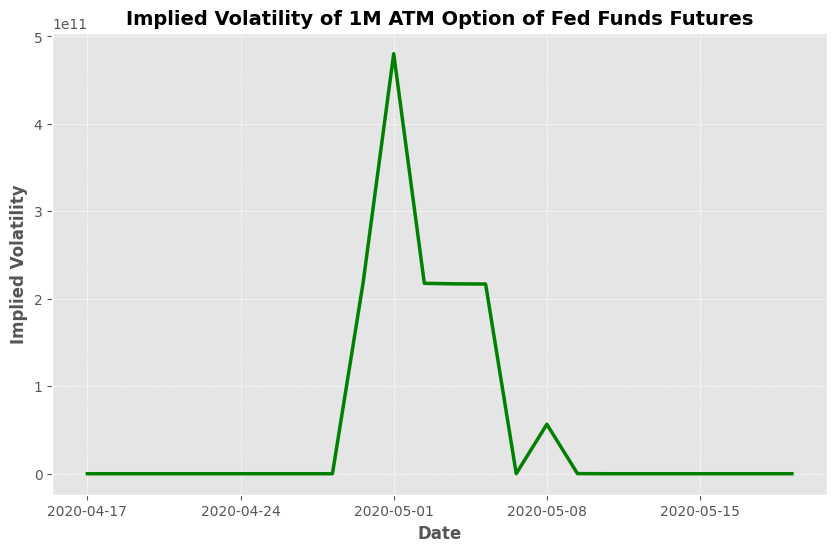

In [ ]:
# Setting the figure size
plt.figure(figsize=(10,6))

# Filter the dataframe for the desired date range and plot the specified column
filtered_df = final_df[(final_df.index > '2020-04-16') & (final_df.index < '2020-05-21')]
filtered_df['ATM_Fed Funds (CBT) 1M Vols_x_lag1d'].plot(color='green', linewidth=2.5)

# Setting the title and labels
plt.title('Implied Volatility of 1M ATM Option of Fed Funds Futures', fontweight='bold', fontsize=14)
plt.xlabel('Date', fontweight='bold', fontsize=12)
plt.ylabel('Implied Volatility', fontweight='bold', fontsize=12)

# Displaying the grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# If you want to annotate a peak or specific point, you need to specify the peak_date and peak_value
# peak_date and peak_value are placeholders, replace them with actual values
# plt.annotate('Peak', (peak_date, peak_value), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

In [ ]:
final_df[(final_df.index > '2020-04-16') & (final_df.index < '2020-05-21')][('ATM_Fed Funds (CBT) 1M Vols_x_lag1d')].plot()
plt.title('Implied Volatility of 1M ATM Option of Fed Funds Futures', fontweight='bold', fontsize=14)
plt.xlabel('Date', fontweight='bold', fontsize=12)
plt.ylabel('Implied Volatility', fontweight='bold', fontsize=12)
plt.figure(figsize=(10,6))
plt.plot(final_df['Date'], final_df['ATM_Fed Funds (CBT) 1M Vols_x_lag1d'] color='deepskyblue', linewidth=2.5)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.annotate('Peak', (peak_date, peak_value), textcoords="offset points", xytext=(0,10), ha='center')

SyntaxError: ignored

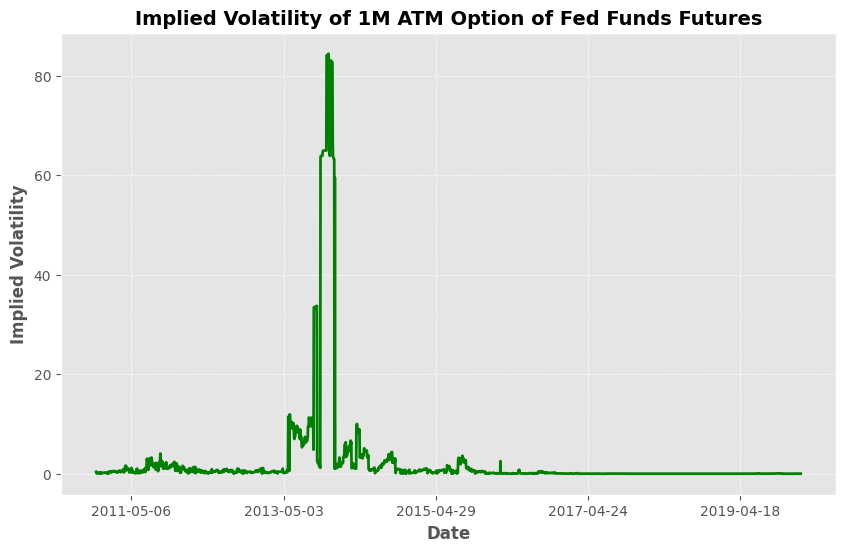

In [ ]:
# final_df[(final_df.index <'2020-02-03') ]['ATM_Fed Funds (CBT) 1M Vols_x_lag1d'].plot()


# Setting the figure size
plt.figure(figsize=(10,6))

# Filter the dataframe for the desired date range and plot the specified column
filtered_df = final_df[final_df.index < '2020-02-03']
filtered_df['ATM_Fed Funds (CBT) 1M Vols_x_lag1d'].plot(color='green', linewidth=2)

# Setting the title and labels
plt.title('Implied Volatility of 1M ATM Option of Fed Funds Futures', fontweight='bold', fontsize=14)
plt.xlabel('Date', fontweight='bold', fontsize=12)
plt.ylabel('Implied Volatility', fontweight='bold', fontsize=12)

# Displaying the grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# If you want to annotate a peak or specific point, you need to specify the peak_date and peak_value
# peak_date and peak_value are placeholders, replace them with actual values
# plt.annotate('Peak', (peak_date, peak_value), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

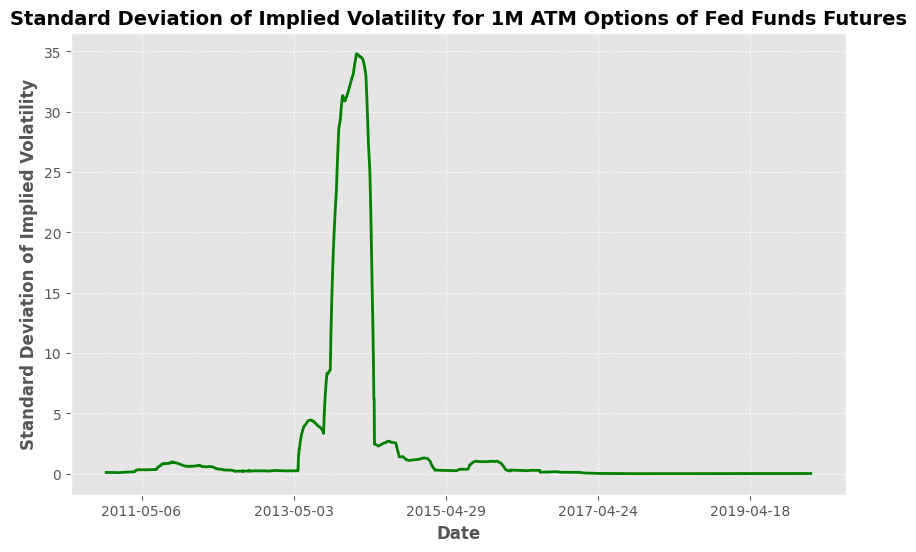

In [ ]:
#final_df[(final_df.index <'2020-02-03')]['ATM_Fed Funds (CBT) 1M Vols_x_lag1d_100_period_std_dev_volatility'].plot()

# final_df[(final_df.index <'2020-02-03') ]['ATM_Fed Funds (CBT) 1M Vols_x_lag1d'].plot()


# Setting the figure size
plt.figure(figsize=(10,6))

# Filter the dataframe for the desired date range and plot the specified column
filtered_df = final_df[final_df.index < '2020-02-03']
filtered_df['ATM_Fed Funds (CBT) 1M Vols_x_lag1d_100_period_std_dev_volatility'].plot(color='green', linewidth=2)

# Setting the title and labels
plt.title('Standard Deviation of Implied Volatility for 1M ATM Options of Fed Funds Futures', fontweight='bold', fontsize=14)
plt.xlabel('Date', fontweight='bold', fontsize=12)
plt.ylabel('Standard Deviation of Implied Volatility', fontweight='bold', fontsize=12)

# Displaying the grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# If you want to annotate a peak or specific point, you need to specify the peak_date and peak_value
# peak_date and peak_value are placeholders, replace them with actual values
# plt.annotate('Peak', (peak_date, peak_value), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

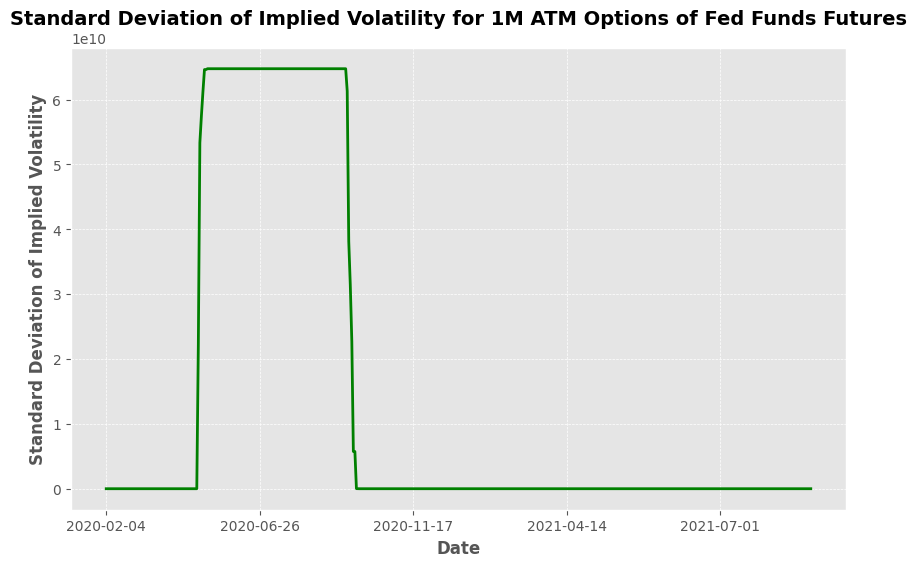

In [ ]:
#final_df[(final_df.index >'2020-02-03')]['ATM_Fed Funds (CBT) 1M Vols_x_lag1d_100_period_std_dev_volatility'].plot()

#final_df[(final_df.index <'2020-02-03')]['ATM_Fed Funds (CBT) 1M Vols_x_lag1d_100_period_std_dev_volatility'].plot()

# final_df[(final_df.index <'2020-02-03') ]['ATM_Fed Funds (CBT) 1M Vols_x_lag1d'].plot()


# Setting the figure size
plt.figure(figsize=(10,6))

# Filter the dataframe for the desired date range and plot the specified column
filtered_df = final_df[final_df.index > '2020-02-03']
filtered_df['ATM_Fed Funds (CBT) 1M Vols_x_lag1d_100_period_std_dev_volatility'].plot(color='green', linewidth=2)

# Setting the title and labels
plt.title('Standard Deviation of Implied Volatility for 1M ATM Options of Fed Funds Futures', fontweight='bold', fontsize=14)
plt.xlabel('Date', fontweight='bold', fontsize=12)
plt.ylabel('Standard Deviation of Implied Volatility', fontweight='bold', fontsize=12)

# Displaying the grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# If you want to annotate a peak or specific point, you need to specify the peak_date and peak_value
# peak_date and peak_value are placeholders, replace them with actual values
# plt.annotate('Peak', (peak_date, peak_value), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225.]),
 [Text(-25.0, 0, '2020-10-08'),
  Text(0.0, 0, '2020-02-04'),
  Text(25.0, 0, '2020-03-11'),
  Text(50.0, 0, '2020-04-16'),
  Text(75.0, 0, '2020-05-21'),
  Text(100.0, 0, '2020-06-26'),
  Text(125.0, 0, '2020-08-03'),
  Text(150.0, 0, '2020-09-08'),
  Text(175.0, 0, '2020-10-13'),
  Text(200.0, 0, ''),
  Text(225.0, 0, '')])

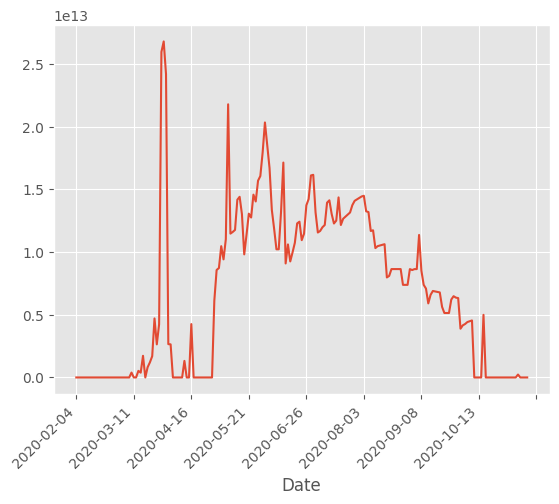

In [ ]:
final_df[(final_df.index > '2020-02-03') & (final_df.index < '2020-11-12')]['ATM_Fed Funds (CBT) 6M Vols_lag1d'].plot()

plt.xticks(rotation=45, ha='right')

<Axes: xlabel='Date'>

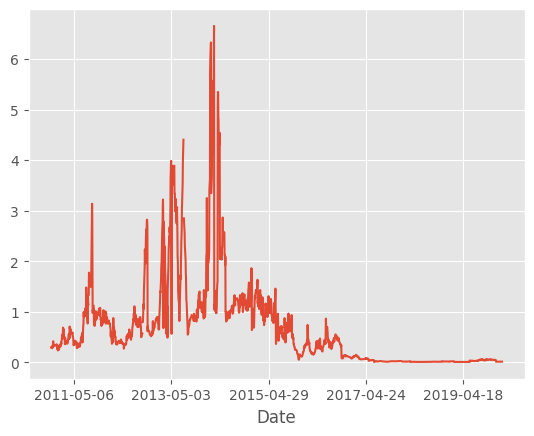

In [ ]:
final_df[(final_df.index <'2020-02-03') ]['ATM_Fed Funds (CBT) 6M Vols_lag1d'].plot()

<Axes: xlabel='Date'>

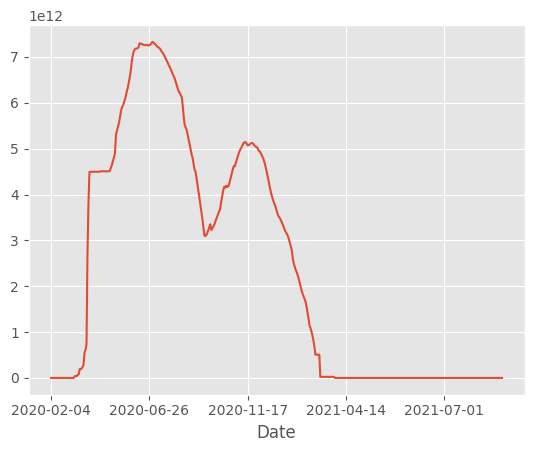

In [ ]:
final_df[(final_df.index >'2020-02-03')]['ATM_Fed Funds (CBT) 6M Vols_lag1d_100_period_std_dev_volatility'].plot()

<Axes: xlabel='Date'>

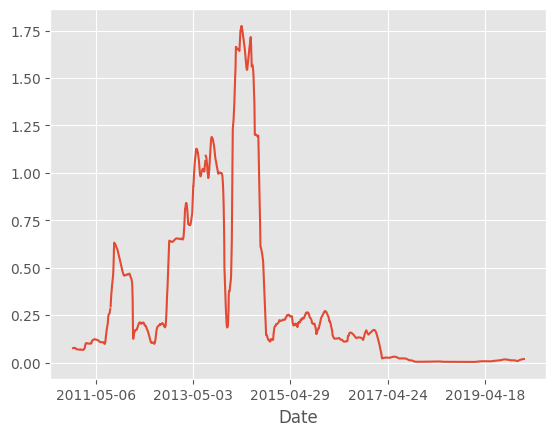

In [ ]:
final_df[(final_df.index <'2020-02-03')]['ATM_Fed Funds (CBT) 6M Vols_lag1d_100_period_std_dev_volatility'].plot()

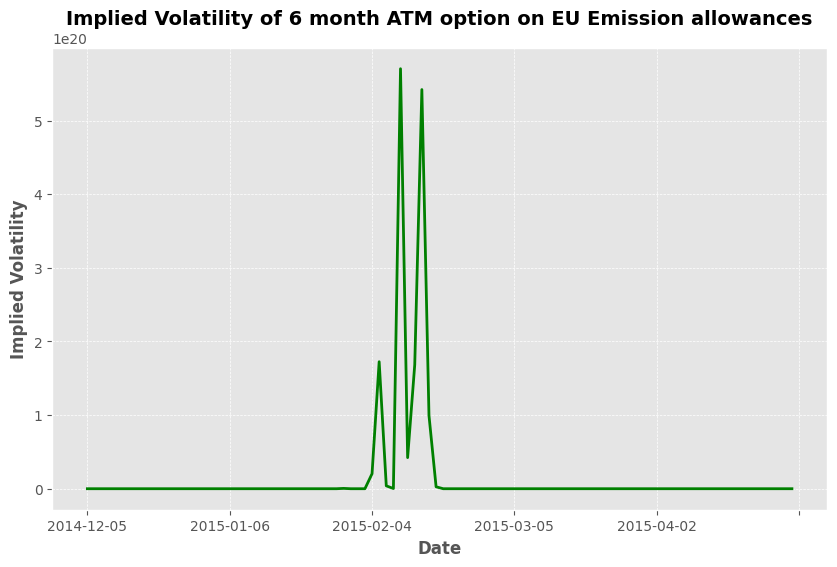

In [ ]:
#final_df[(final_df.index > '2014-12-04') & (final_df.index <'2015-05-01')]['ATM_EU Emissions (ICE) 6M Vols_lag1d'].plot()
#plt.xticks(rotation=45, ha='right')


#final_df[(final_df.index >'2020-02-03')]['ATM_Fed Funds (CBT) 1M Vols_x_lag1d_100_period_std_dev_volatility'].plot()

#final_df[(final_df.index <'2020-02-03')]['ATM_Fed Funds (CBT) 1M Vols_x_lag1d_100_period_std_dev_volatility'].plot()

# final_df[(final_df.index <'2020-02-03') ]['ATM_Fed Funds (CBT) 1M Vols_x_lag1d'].plot()


# Setting the figure size
plt.figure(figsize=(10,6))

# Filter the dataframe for the desired date range and plot the specified column
filtered_df = final_df[(final_df.index > '2014-12-04') & (final_df.index <'2015-05-01')]
filtered_df['ATM_EU Emissions (ICE) 6M Vols_lag1d'].plot(color='green', linewidth=2)

# Setting the title and labels
plt.title('Implied Volatility of 6 month ATM option on EU Emission allowances', fontweight='bold', fontsize=14)
plt.xlabel('Date', fontweight='bold', fontsize=12)
plt.ylabel('Implied Volatility', fontweight='bold', fontsize=12)

# Displaying the grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# If you want to annotate a peak or specific point, you need to specify the peak_date and peak_value
# peak_date and peak_value are placeholders, replace them with actual values
# plt.annotate('Peak', (peak_date, peak_value), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

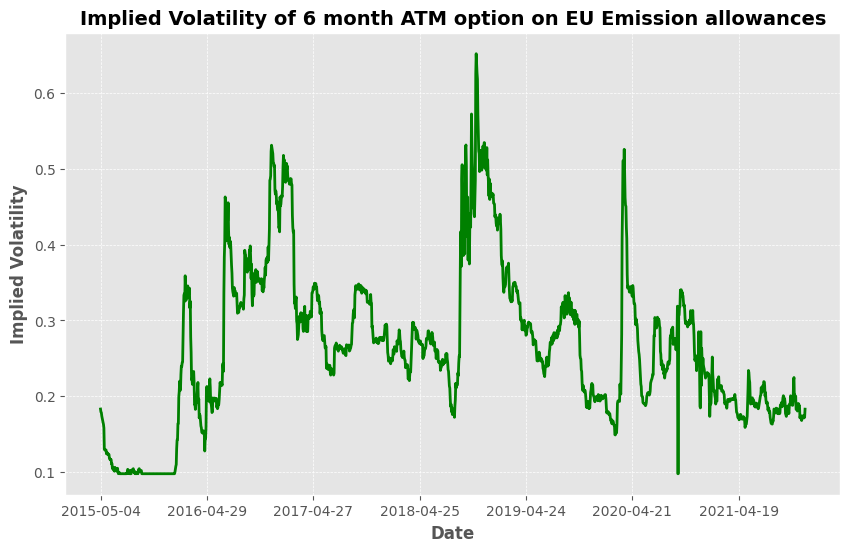

In [ ]:
# final_df[(final_df.index > '2015-05-01')]['ATM_EU Emissions (ICE) 6M Vols_lag1d'].plot()
# plt.xticks(rotation=45, ha='right')


#final_df[(final_df.index > '2014-12-04') & (final_df.index <'2015-05-01')]['ATM_EU Emissions (ICE) 6M Vols_lag1d'].plot()
#plt.xticks(rotation=45, ha='right')


#final_df[(final_df.index >'2020-02-03')]['ATM_Fed Funds (CBT) 1M Vols_x_lag1d_100_period_std_dev_volatility'].plot()

#final_df[(final_df.index <'2020-02-03')]['ATM_Fed Funds (CBT) 1M Vols_x_lag1d_100_period_std_dev_volatility'].plot()

# final_df[(final_df.index <'2020-02-03') ]['ATM_Fed Funds (CBT) 1M Vols_x_lag1d'].plot()


# Setting the figure size
plt.figure(figsize=(10,6))

# Filter the dataframe for the desired date range and plot the specified column
filtered_df = final_df[final_df.index > '2015-05-01']
filtered_df['ATM_EU Emissions (ICE) 6M Vols_lag1d'].plot(color='green', linewidth=2)

# Setting the title and labels
plt.title('Implied Volatility of 6 month ATM option on EU Emission allowances', fontweight='bold', fontsize=14)
plt.xlabel('Date', fontweight='bold', fontsize=12)
plt.ylabel('Implied Volatility', fontweight='bold', fontsize=12)

# Displaying the grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# If you want to annotate a peak or specific point, you need to specify the peak_date and peak_value
# peak_date and peak_value are placeholders, replace them with actual values
# plt.annotate('Peak', (peak_date, peak_value), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.]),
 [Text(-250.0, 0, '2020-12-02'),
  Text(0.0, 0, '2015-05-04'),
  Text(250.0, 0, '2016-04-29'),
  Text(500.0, 0, '2017-04-27'),
  Text(750.0, 0, '2018-04-25'),
  Text(1000.0, 0, '2019-04-24'),
  Text(1250.0, 0, '2020-04-21'),
  Text(1500.0, 0, '2021-04-19'),
  Text(1750.0, 0, '')])

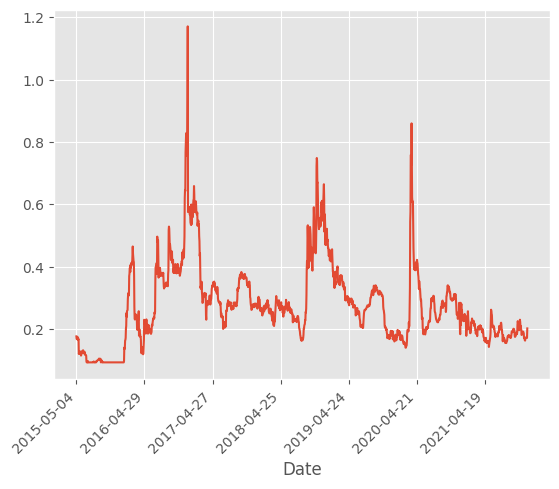

In [ ]:
final_df[(final_df.index > '2015-05-01')]['ATM_EU Emissions (ICE) 3M Vols_lag1d'].plot()
plt.xticks(rotation=45, ha='right')


(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(-20.0, 0, '2015-04-02'),
  Text(0.0, 0, '2014-12-05'),
  Text(20.0, 0, '2015-01-06'),
  Text(40.0, 0, '2015-02-04'),
  Text(60.0, 0, '2015-03-05'),
  Text(80.0, 0, '2015-04-02'),
  Text(100.0, 0, ''),
  Text(120.0, 0, '')])

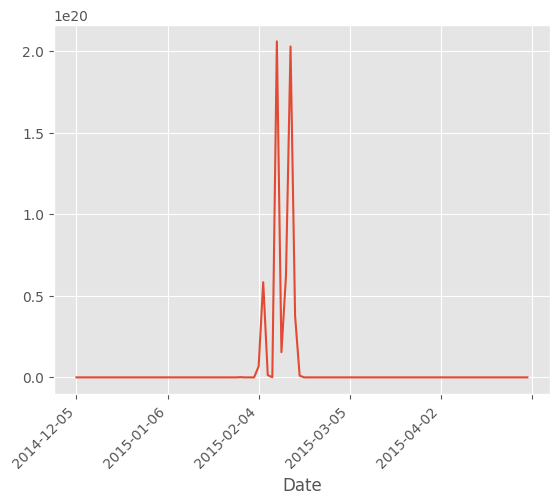

In [ ]:
final_df[(final_df.index > '2014-12-04') & (final_df.index <'2015-05-01')]['ATM_EU Emissions (ICE) 3M Vols_lag1d'].plot()
plt.xticks(rotation=45, ha='right')


now let's drop these above thereshold variables from final_df
---



In [ ]:
final_df.drop(columns = columns_above_threshold, inplace = True)

In [ ]:
# Check if any columns in columns_above_threshold still exist in final_df
remaining_columns = set(columns_above_threshold).intersection(set(final_df.columns))

# If the set is empty, it means all columns have been removed successfully
if not remaining_columns:
    print("All columns in columns_above_threshold have been removed from final_df.")
else:
    print(f"The following columns from columns_above_threshold are still present in final_df: {remaining_columns}")


All columns in columns_above_threshold have been removed from final_df.


now rank them based on highest mean, std, skewness, kurtosis, cv

In [ ]:
stats_post_winsorize = final_df.describe().T
stats_post_winsorize.insert(loc = 3, column = 'skewness', value = final_df.skew())
stats_post_winsorize.insert(loc = 4, column = 'kurtosis', value = final_df.kurtosis())
stats_post_winsorize.insert(loc = 5, column = 'median', value = final_df.median())
stats_post_winsorize.insert(loc = 6, column = 'cv', value = final_df.std()/ final_df.mean()) #coefficient of variation
stats_post_winsorize

count          mean  \
Macro_CPIAUCSL                                      4160.0    231.991816   
Macro_GDP                                           4160.0  16951.764053   
Macro_INDPRO                                        4160.0    103.732877   
Macro_MICH                                          4160.0      3.074471   
Macro_PCEPI                                         4160.0    113.024554   
...                                                    ...           ...   
ATM_Russell 2000 (CME) 6M Vols_lag1d_100_period...   129.0      0.014794   
ATM_Russell 2000 (CME) 3M Vols_lag1d_100_period...   129.0      0.016842   
ATM_Russell 2000 (CME) 2M Vols_lag1d_100_period...   129.0      0.018733   
ATM_Russell 2000 (CME) 1W Vols_lag1d_100_period...   129.0      0.022498   
rv_22d_lead(22+1)d                                  4160.0      0.003968   

                                                            std  skewness  \
Macro_CPIAUCSL                                        19.388171  0.053719   
Macro_GDP                                           2922.447097  0.350675   
Macro_INDPRO                                           5.557758 -0.400319   
Macro_MICH                                             0.607477  1.348748   
Macro_PCEPI                                            3.874927  0.745048   
...                                                         ...       ...   
ATM_Russell 2000 (CME) 6M Vols_lag1d_100_period...     0.000266  2.890238   
ATM_Russell 2000 (CME) 3M Vols_lag1d_100_period...     0.000297  2.776121   
ATM_Russell 2000 (CME) 2M Vols_lag1d_100_period...     0.000297  2.682890   
ATM_Russell 2000 (CME) 1W Vols_lag1d_100_period...     0.000376  2.248413   
rv_22d_lead(22+1)d                                     0.006843  5.817151   

                                                     kurtosis        median  \
Macro_CPIAUCSL                                      -0.898034    233.526000   
Macro_GDP                                           -1.155825  16661.000000   
Macro_INDPRO                                        -0.967715    104.652600   
Macro_MICH                                           1.598334      3.000000   
Macro_PCEPI                                         -0.230991    112.169000   
...                                                       ...           ...   
ATM_Russell 2000 (CME) 6M Vols_lag1d_100_period...   8.019662      0.014690   
ATM_Russell 2000 (CME) 3M Vols_lag1d_100_period...   7.410602      0.016725   
ATM_Russell 2000 (CME) 2M Vols_lag1d_100_period...   6.938568      0.018613   
ATM_Russell 2000 (CME) 1W Vols_lag1d_100_period...   3.933783      0.022336   
rv_22d_lead(22+1)d                                  40.318098      0.002083   

                                                          cv           min  \
Macro_CPIAUCSL                                      0.083573    198.300000   
Macro_GDP                                           0.172398  12696.400000   
Macro_INDPRO                                        0.053578     93.023800   
Macro_MICH                                          0.197587      2.200000   
Macro_PCEPI                                         0.034284    107.499000   
...                                                      ...           ...   
ATM_Russell 2000 (CME) 6M Vols_lag1d_100_period...  0.017947      0.014690   
ATM_Russell 2000 (CME) 3M Vols_lag1d_100_period...  0.017613      0.016725   
ATM_Russell 2000 (CME) 2M Vols_lag1d_100_period...  0.015844      0.018613   
ATM_Russell 2000 (CME) 1W Vols_lag1d_100_period...  0.016706      0.022336   
rv_22d_lead(22+1)d                                  1.724709      0.000204   

                                                             25%  \
Macro_CPIAUCSL                                        216.710000   
Macro_GDP                                           14412.800000   
Macro_INDPRO                                           99.054900   
Macro_MICH                                              2

In [ ]:
##rank the top 5 variables with the highest mean
stats_post_winsorize.sort_values(by='mean', ascending=False).head(5)

count          mean          std  skewness  \
Macro_GDP                     4160.0  16951.764053  2922.447097  0.350675   
IV_MOVE_US_Index_CLOSE_lag1d  4160.0   7890.131354  8077.690643  2.824779   
IV_2Y_Swaps_1M_CLOSE_lag1d    4160.0   3278.572094  2709.357087  0.784154   
IV_2Y_Swaps_3M_CLOSE_lag1d    4160.0   3213.980037  2805.118463  1.468974   
IV_2Y_Swaps_6M_CLOSE_lag1d    4160.0   3029.938440  2482.290619  1.291028   

                              kurtosis        median        cv           min  \
Macro_GDP                    -1.155825  16661.000000  0.172398  12696.400000   
IV_MOVE_US_Index_CLOSE_lag1d  8.330530   5099.545326  1.023771   2102.836935   
IV_2Y_Swaps_1M_CLOSE_lag1d    0.045125   3012.363250  0.826383    148.840000   
IV_2Y_Swaps_3M_CLOSE_lag1d    3.112642   3056.431250  0.872787    165.122500   
IV_2Y_Swaps_6M_CLOSE_lag1d    2.546951   3021.152450  0.819254    183.602500   

                                       25%           50%         75%  \
Macro_GDP                     14412.800000  16661.000000  19408.7590   
IV_MOVE_US_Index_CLOSE_lag1d   3516.490000   5099.545326   8154.0900   
IV_2Y_Swaps_1M_CLOSE_lag1d      573.961825   3012.363250   4904.9013   
IV_2Y_Swaps_3M_CLOSE_lag1d      622.752100   3056.431250   4552.8757   
IV_2Y_Swaps_6M_CLOSE_lag1d      662.547900   3021.152450   4235.4064   

                                     max  
Macro_GDP                     22722.5810  
IV_MOVE_US_Index_CLOSE_lag1d  42724.8900  
IV_2Y_Swaps_1M_CLOSE_lag1d    10506.2500  
IV_2Y_Swaps_3M_CLOSE_lag1d    13400.3776  
IV_2Y_Swaps_6M_CLOSE_lag1d    11783.1025

In [ ]:
#rank the top 5 variables with the highest sd
stats_post_winsorize.sort_values(by='std', ascending=False).head(5)


count          mean  \
IV_MOVE_US_Index_CLOSE_lag1d                        4160.0   7890.131354   
IV_MOVE_US_Index_CLOSE_lag1d_100_period_std_dev...  4160.0   2236.492847   
IV_30Y_Swaps_1M_CLOSE_lag1d_100_period_std_dev_...  4160.0    894.025065   
Macro_GDP                                           4160.0  16951.764053   
IV_2Y_Swaps_3M_CLOSE_lag1d                          4160.0   3213.980037   

                                                            std  skewness  \
IV_MOVE_US_Index_CLOSE_lag1d                        8077.690643  2.824779   
IV_MOVE_US_Index_CLOSE_lag1d_100_period_std_dev...  3100.897712  3.053581   
IV_30Y_Swaps_1M_CLOSE_lag1d_100_period_std_dev_...  2922.694842  5.241530   
Macro_GDP                                           2922.447097  0.350675   
IV_2Y_Swaps_3M_CLOSE_lag1d                          2805.118463  1.468974   

                                                     kurtosis        median  \
IV_MOVE_US_Index_CLOSE_lag1d                         8.330530   5099.545326   
IV_MOVE_US_Index_CLOSE_lag1d_100_period_std_dev...   9.474922   1105.452210   
IV_30Y_Swaps_1M_CLOSE_lag1d_100_period_std_dev_...  26.856119    187.353022   
Macro_GDP                                           -1.155825  16661.000000   
IV_2Y_Swaps_3M_CLOSE_lag1d                           3.112642   3056.431250   

                                                          cv           min  \
IV_MOVE_US_Index_CLOSE_lag1d                        1.023771   2102.836935   
IV_MOVE_US_Index_CLOSE_lag1d_100_period_std_dev...  1.386500    320.121393   
IV_30Y_Swaps_1M_CLOSE_lag1d_100_period_std_dev_...  3.269142     20.758406   
Macro_GDP                                           0.172398  12696.400000   
IV_2Y_Swaps_3M_CLOSE_lag1d                          0.872787    165.122500   

                                                             25%  \
IV_MOVE_US_Index_CLOSE_lag1d                         3516.490000   
IV_MOVE_US_Index_CLOSE_lag1d_100_period_std_dev...    690.285615   
IV_30Y_Swaps_1M_CLOSE_lag1d_100_period_std_dev_...     70.144647   
Macro_GDP                                           14412.800000   
IV_2Y_Swaps_3M_CLOSE_lag1d                            622.752100   

                                                             50%  \
IV_MOVE_US_Index_CLOSE_lag1d                         5099.545326   
IV_MOVE_US_Index_CLOSE_lag1d_100_period_std_dev...   1105.452210   
IV_30Y_Swaps_1M_CLOSE_lag1d_100_period_std_dev_...    187.353022   
Macro_GDP                                           16661.000000   
IV_2Y_Swaps_3M_CLOSE_lag1d                           3056.431250   

                                                             75%           max  
IV_MOVE_US_Index_CLOSE_lag1d                         8154.090000  42724.890000  
IV_MOVE_US_Index_CLOSE_lag1d_100_period_std_dev...   2092.974154  15762.534955  
IV_30Y_Swaps_1M_CLOSE_lag1d_100_period_std_dev_...    454.520176  17727.298942  
Macro_GDP                                           19408.759000  22722.581000  
IV_2Y_Swaps_3M_CLOSE_lag1d                           4552.875700  13400.377600

In [ ]:
#rank the top 5 variables with the highest skewness
stats_post_winsorize.sort_values(by='skewness', ascending=False).head(5)

count      mean       std   skewness  \
ATM_AUD (CME) 1W Vols_lag1d            2771.0  0.015066  0.107622  52.008532   
ATM_Soybean Meal (CBT) 1W Vols_lag1d   2771.0  0.067368  0.239009  49.488821   
ATM_WTI Crude (NYM) 1W Vols_lag1d      2157.0  0.225329  1.404972  31.867281   
ATM_WTI Crude Oil (NYM) 1M Vols_lag1d  2157.0  0.179338  0.827515  30.446218   
ATM_WTI Crude (ICE) 1W Vols_lag1d      2314.0  0.215012  1.239153  30.219120   

                                          kurtosis    median        cv  \
ATM_AUD (CME) 1W Vols_lag1d            2726.547863  0.010308  7.143401   
ATM_Soybean Meal (CBT) 1W Vols_lag1d   2544.946579  0.054859  3.547825   
ATM_WTI Crude (NYM) 1W Vols_lag1d      1216.956107  0.096314  6.235191   
ATM_WTI Crude Oil (NYM) 1M Vols_lag1d  1139.669455  0.096648  4.614266   
ATM_WTI Crude (ICE) 1W Vols_lag1d      1126.207663  0.093539  5.763178   

                                            min       25%       50%       75%  \
ATM_AUD (CME) 1W Vols_lag1d            0.004018  0.007216  0.010308  0.016077   
ATM_Soybean Meal (CBT) 1W Vols_lag1d   0.017055  0.037252  0.054859  0.077549   
ATM_WTI Crude (NYM) 1W Vols_lag1d      0.027487  0.057140  0.096314  0.163378   
ATM_WTI Crude Oil (NYM) 1M Vols_lag1d  0.027135  0.058772  0.096648  0.154106   
ATM_WTI Crude (ICE) 1W Vols_lag1d      0.027301  0.056073  0.093539  0.160108   

                                             max  
ATM_AUD (CME) 1W Vols_lag1d             5.655445  
ATM_Soybean Meal (CBT) 1W Vols_lag1d   12.379082  
ATM_WTI Crude (NYM) 1W Vols_lag1d      56.525256  
ATM_WTI Crude Oil (NYM) 1M Vols_lag1d  32.801393  
ATM_WTI Crude (ICE) 1W Vols_lag1d      49.633082

In [ ]:
# see the distributions of the most skewed variables

# most_skewed_var = final_df[['ATM_AUD (CME) 1W Vols_lag1d', 'ATM_Soybean Meal (CBT) 1W Vols_lag1d', 'ATM_WTI Crude (NYM) 1W Vols_lag1d', 'ATM_WTI Crude Oil (NYM) 1M Vols_lag1d', 'ATM_WTI Crude (ICE) 1W Vols_lag1d']]
# most_skewed_var


# for col in most_skewed_var.columns:
#     sns.distplot(most_skewed_var[col])
#     plt.xlim(-1, 1)
#     plt.title('Distribution of ' + col)
#     plt.show()

In [ ]:
#rank the top 5 variables with the highest kurtosis
stats_post_winsorize.sort_values(by='kurtosis', ascending=False).head(5)

count      mean       std   skewness  \
ATM_AUD (CME) 1W Vols_lag1d            2771.0  0.015066  0.107622  52.008532   
ATM_Soybean Meal (CBT) 1W Vols_lag1d   2771.0  0.067368  0.239009  49.488821   
ATM_WTI Crude (NYM) 1W Vols_lag1d      2157.0  0.225329  1.404972  31.867281   
ATM_WTI Crude Oil (NYM) 1M Vols_lag1d  2157.0  0.179338  0.827515  30.446218   
ATM_WTI Crude (ICE) 1W Vols_lag1d      2314.0  0.215012  1.239153  30.219120   

                                          kurtosis    median        cv  \
ATM_AUD (CME) 1W Vols_lag1d            2726.547863  0.010308  7.143401   
ATM_Soybean Meal (CBT) 1W Vols_lag1d   2544.946579  0.054859  3.547825   
ATM_WTI Crude (NYM) 1W Vols_lag1d      1216.956107  0.096314  6.235191   
ATM_WTI Crude Oil (NYM) 1M Vols_lag1d  1139.669455  0.096648  4.614266   
ATM_WTI Crude (ICE) 1W Vols_lag1d      1126.207663  0.093539  5.763178   

                                            min       25%       50%       75%  \
ATM_AUD (CME) 1W Vols_lag1d            0.004018  0.007216  0.010308  0.016077   
ATM_Soybean Meal (CBT) 1W Vols_lag1d   0.017055  0.037252  0.054859  0.077549   
ATM_WTI Crude (NYM) 1W Vols_lag1d      0.027487  0.057140  0.096314  0.163378   
ATM_WTI Crude Oil (NYM) 1M Vols_lag1d  0.027135  0.058772  0.096648  0.154106   
ATM_WTI Crude (ICE) 1W Vols_lag1d      0.027301  0.056073  0.093539  0.160108   

                                             max  
ATM_AUD (CME) 1W Vols_lag1d             5.655445  
ATM_Soybean Meal (CBT) 1W Vols_lag1d   12.379082  
ATM_WTI Crude (NYM) 1W Vols_lag1d      56.525256  
ATM_WTI Crude Oil (NYM) 1M Vols_lag1d  32.801393  
ATM_WTI Crude (ICE) 1W Vols_lag1d      49.633082

In [ ]:
#rank the top 5 variables with the highest cv
stats_post_winsorize.sort_values(by='cv', ascending=False).head(5)

count          mean       std  \
Futures_NG_CLOSE_lag1d_1_period_ret         4160.0  1.182095e-04  0.028412   
Futures_AUDUSD_CLOSE_lag1d_1_period_ret     4160.0  5.801422e-05  0.006787   
Futures_Fed Funds_CLOSE_lag1d_1_period_ret  4160.0  4.008043e-07  0.000043   
Futures_CHFUSD_CLOSE_lag1d_1_period_ret     4160.0  6.242132e-05  0.005415   
Futures_CL_CLOSE_lag1d_1_period_ret         4160.0  3.008296e-04  0.020724   

                                            skewness  kurtosis    median  \
Futures_NG_CLOSE_lag1d_1_period_ret         0.178429  0.010794 -0.000375   
Futures_AUDUSD_CLOSE_lag1d_1_period_ret    -0.123231  0.120237  0.000251   
Futures_Fed Funds_CLOSE_lag1d_1_period_ret -0.029496  5.916947  0.000000   
Futures_CHFUSD_CLOSE_lag1d_1_period_ret     0.059964 -0.055952 -0.000042   
Futures_CL_CLOSE_lag1d_1_period_ret        -0.085281  0.159840  0.000905   

                                                    cv       min       25%  \
Futures_NG_CLOSE_lag1d_1_period_ret         240.353156 -0.061309 -0.018435   
Futures_AUDUSD_CLOSE_lag1d_1_period_ret     116.986615 -0.016199 -0.003898   
Futures_Fed Funds_CLOSE_lag1d_1_period_ret  107.665139 -0.000150  0.000000   
Futures_CHFUSD_CLOSE_lag1d_1_period_ret      86.749143 -0.011976 -0.003245   
Futures_CL_CLOSE_lag1d_1_period_ret          68.891011 -0.049282 -0.011983   

                                                 50%       75%       max  
Futures_NG_CLOSE_lag1d_1_period_ret        -0.000375  0.016987  0.069284  
Futures_AUDUSD_CLOSE_lag1d_1_period_ret     0.000251  0.004200  0.015388  
Futures_Fed Funds_CLOSE_lag1d_1_period_ret  0.000000  0.000000  0.000151  
Futures_CHFUSD_CLOSE_lag1d_1_period_ret    -0.000042  0.003417  0.012420  
Futures_CL_CLOSE_lag1d_1_period_ret         0.000905  0.012443  0.048509

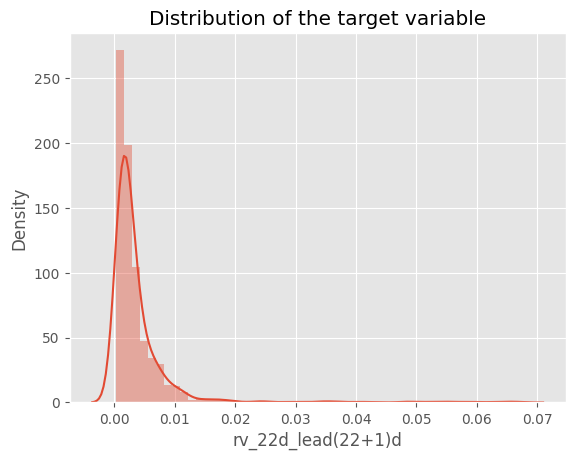

In [ ]:
#plot the distribution of the target variable
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(final_df['rv_22d_lead(22+1)d'])
plt.title('Distribution of the target variable')
plt.show()


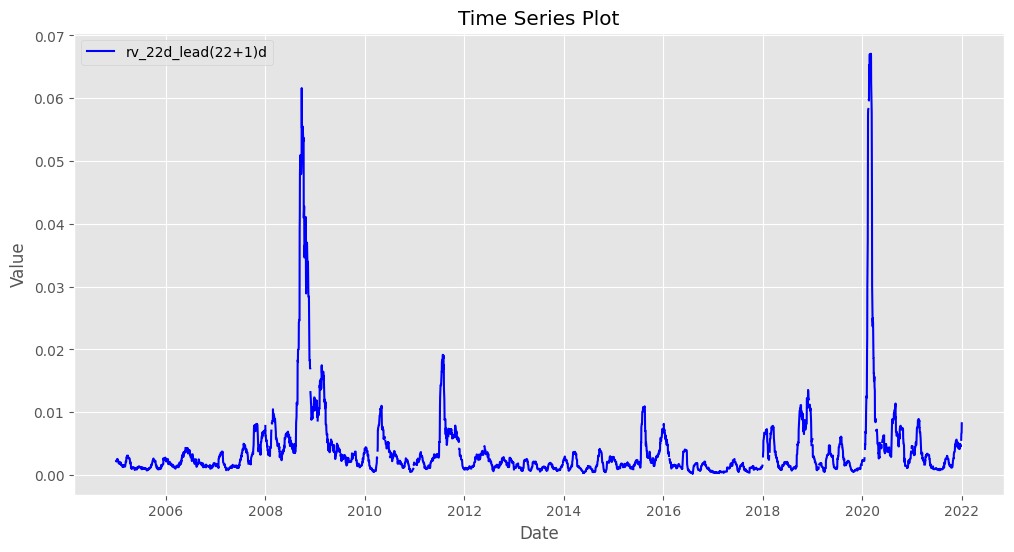

In [ ]:
QQQ_target = pd.read_csv("/content/drive/MyDrive/DSO_585_Fall_2023/Input_Data/Regression_Variables_Minus_Macroecon/QQQ_86755_regression_variables_minus_macroecon.csv",parse_dates=[0], index_col=0)
QQQ_target.index= pd.to_datetime(QQQ_target.index)

plt.figure(figsize=(12, 6))
plt.plot(QQQ_target.index, QQQ_target['rv_22d_lead(22+1)d'], label='rv_22d_lead(22+1)d', color='blue')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Plot')
plt.legend()
plt.grid(True)

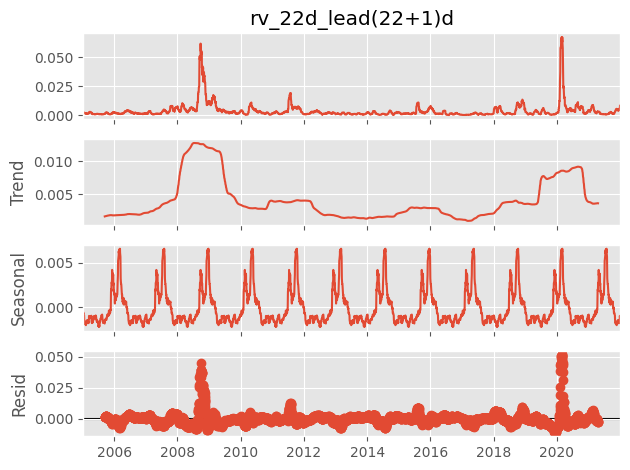

<Figure size 1500x600 with 0 Axes>

In [ ]:
# Decompose target variable TS
from statsmodels.tsa.seasonal import STL
import statsmodels.api as sm
QQQ_target['rv_22d_lead(22+1)d'].fillna(method='ffill', inplace=True) # Forward filling

result = sm.tsa.seasonal_decompose(QQQ_target['rv_22d_lead(22+1)d'], model='addictive', period=365)  # Use 'multiplicative' for multiplicative decomposition
fig = result.plot()
plt.figure(figsize=(15, 6))

plt.show()

#Break

In [ ]:
#Codes to create QQQ.csv

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
Path ='/content/drive/MyDrive/QQQ_86755'
os.chdir(Path)
filelist = os.listdir()
filelist.sort(key=lambda date: datetime.strptime(date, "%Y-%m-%d"))
Path2 = []
for x in filelist:
  Path2.append(Path+ '/' +x+ '/')
# Delte the first elements in the list as we will read it manually
del Path2[0]
Path2

['/content/drive/MyDrive/QQQ_86755/2008-12-24/',
 '/content/drive/MyDrive/QQQ_86755/2008-12-26/',
 '/content/drive/MyDrive/QQQ_86755/2008-12-29/',
 '/content/drive/MyDrive/QQQ_86755/2008-12-30/',
 '/content/drive/MyDrive/QQQ_86755/2008-12-31/',
 '/content/drive/MyDrive/QQQ_86755/2009-01-02/',
 '/content/drive/MyDrive/QQQ_86755/2009-01-05/',
 '/content/drive/MyDrive/QQQ_86755/2009-01-06/',
 '/content/drive/MyDrive/QQQ_86755/2009-01-07/',
 '/content/drive/MyDrive/QQQ_86755/2009-01-08/',
 '/content/drive/MyDrive/QQQ_86755/2009-01-09/',
 '/content/drive/MyDrive/QQQ_86755/2009-01-12/',
 '/content/drive/MyDrive/QQQ_86755/2009-01-13/',
 '/content/drive/MyDrive/QQQ_86755/2009-01-14/',
 '/content/drive/MyDrive/QQQ_86755/2009-01-15/',
 '/content/drive/MyDrive/QQQ_86755/2009-01-16/',
 '/content/drive/MyDrive/QQQ_86755/2009-01-20/',
 '/content/drive/MyDrive/QQQ_86755/2009-01-21/',
 '/content/drive/MyDrive/QQQ_86755/2009-01-22/',
 '/content/drive/MyDrive/QQQ_86755/2009-01-23/',
 '/content/drive/MyD

In [ ]:
# Create QQQ df and manually read the first train set on 2008-12-23
os.chdir('/content/drive/MyDrive/QQQ_86755/2008-12-23/')
QQQ = pd.read_feather('X_train_features.feather')

In [ ]:
for x in Path2:
    os.chdir(x)
    temp = pd.read_feather('X_train_features.feather')
    QQQ = QQQ.append(temp.tail(1))

流式输出内容被截断，只能显示最后 5000 行内容。
<ipython-input-30-cbbaa3127a05>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  QQQ = QQQ.append(temp.tail(1))
<ipython-input-30-cbbaa3127a05>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  QQQ = QQQ.append(temp.tail(1))
<ipython-input-30-cbbaa3127a05>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  QQQ = QQQ.append(temp.tail(1))
<ipython-input-30-cbbaa3127a05>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  QQQ = QQQ.append(temp.tail(1))
<ipython-input-30-cbbaa3127a05>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

In [ ]:
QQQ = QQQ.reset_index(drop=True)
QQQ.to_csv('QQQ.csv')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
files = os.listdir('/content/drive/MyDrive/DSO_585_Fall_2023/Input_Data/Features_Per_Ticker_Per_Day/QQQ_86755')

In [ ]:
files.sort()
files1 = files[:50]

In [ ]:
path = '/content/drive/My Drive/DSO_585_Fall_2023/Input_Data/Features_Per_Ticker_Per_Day/QQQ_86755/'

In [ ]:
X_train = pd.read_feather('/content/drive/My Drive/DSO_585_Fall_2023/Input_Data/Features_Per_Ticker_Per_Day/QQQ_86755/2008-12-23/X_train_features.feather')
X_test = pd.read_feather('/content/drive/My Drive/DSO_585_Fall_2023/Input_Data/Features_Per_Ticker_Per_Day/QQQ_86755/2008-12-23/X_test_features.feather')

In [ ]:
X_train.head()

index  Macro_CPIAUCSL  Macro_GDP  Macro_INDPRO  Macro_MICH  \
0 2005-05-24           193.5    12297.5       107.101         3.2   
1 2005-05-25           193.5    12297.5       107.101         3.2   
2 2005-05-26           193.5    12297.5       107.101         3.2   
3 2005-05-27           193.5    12297.5       107.101         3.2   
4 2005-05-31           193.5    12297.5       107.101         3.2   

   Macro_PCEPI  Macro_UMCSENT  Macro_UNRATE  \
0      110.852           86.9           5.1   
1      110.852           86.9           5.1   
2      110.852           86.9           5.1   
3      110.852           86.9           5.1   
4      110.852           86.9           5.1   

   Equities_LQD_CLOSE_lag1d_1_period_ret  \
0                               0.004184   
1                               0.002174   
2                              -0.000090   
3                               0.000633   
4                              -0.000090   

   Equities_SPY_CLOSE_lag1d_1_period_ret  ...  avg_pairwise_corr_IV  \
0                               0.005541  ...              0.396452   
1                              -0.002338  ...              0.381348   
2                              -0.000753  ...              0.360396   
3                               0.005360  ...              0.341388   
4                               0.001666  ...              0.319284   

   ret_1d_lag1d  abs_ret_lag1d  ret_squared_1d_lag1d  rv_22d_lag1d  \
0      0.005045       0.005045          2.545203e-05      0.001321   
1      0.003170       0.003170          1.004890e-05      0.001110   
2     -0.004214       0.004214          1.775780e-05      0.001062   
3      0.010050       0.010050          1.010025e-04      0.001078   
4      0.000524       0.000524          2.745760e-07      0.001077   

   rv_MA_5d_lag1d  rv_MA_10d_lag1d  rv_MA_22d_lag1d  rv_MA_40d_lag1d  \
0        0.000066         0.000058         0.000060         0.000099   
1        0.000061         0.000054         0.000050         0.000098   
2        0.000028         0.000053         0.000048         0.000090   
3        0.000034         0.000062         0.000049         0.000092   
4        0.000031         0.000051         0.000049         0.000089   

   rv_MA_60d_lag1d  
0         0.000086  
1         0.000084  
2         0.000082  
3         0.000084  
4         0.000083  

[5 rows x 184 columns]

In [ ]:
target = pd.read_csv('/content/drive/My Drive/DSO_585_Fall_2023/Input_Data/Raw_Data/Target_Variables/QQQ_86755_Target_Variable_Merged.csv', parse_dates=[0])
target.head()

date  Equities_QQQ_CLOSE    ret_1d   abs_ret  ret_squared_1d  rv_22d  \
0 2000-01-06             80.7500 -0.063089  0.063089        0.003980     NaN   
1 2000-01-07             88.5000  0.095975  0.095975        0.009211     NaN   
2 2000-01-10             92.2500  0.042373  0.042373        0.001795     NaN   
3 2000-01-11             88.2500 -0.043360  0.043360        0.001880     NaN   
4 2000-01-12             86.5625 -0.019122  0.019122        0.000366     NaN   

   rv_22d_lead(22+1)d  rv_MA_5d  rv_MA_10d  rv_MA_22d  rv_MA_40d  rv_MA_60d  
0            0.022541       NaN        NaN        NaN        NaN        NaN  
1            0.021782       NaN        NaN        NaN        NaN        NaN  
2            0.020875       NaN        NaN        NaN        NaN        NaN  
3            0.020522       NaN        NaN        NaN        NaN        NaN  
4            0.017670  0.003447        NaN        NaN        NaN        NaN

In [ ]:
X_train = pd.merge(X_train, target[['date', 'rv_22d_lead(22+1)d']], left_on = 'index', right_on = 'date')
X_train.drop('date', axis = 1, inplace=True)
X_train

index  Macro_CPIAUCSL  Macro_GDP  Macro_INDPRO  Macro_MICH  \
0   2005-05-24          193.50    12297.5      107.1010         3.2   
1   2005-05-25          193.50    12297.5      107.1010         3.2   
2   2005-05-26          193.50    12297.5      107.1010         3.2   
3   2005-05-27          193.50    12297.5      107.1010         3.2   
4   2005-05-31          193.50    12297.5      107.1010         3.2   
..         ...             ...        ...           ...         ...   
876 2008-11-13          213.06    14420.5      106.1173         2.9   
877 2008-11-14          213.06    14420.5      106.1173         2.9   
878 2008-11-17          213.06    14420.5      106.1173         2.9   
879 2008-11-18          213.06    14420.5      106.1173         2.9   
880 2008-11-19          213.06    14420.5      106.1173         2.9   

     Macro_PCEPI  Macro_UMCSENT  Macro_UNRATE  \
0        110.852           86.9           5.1   
1        110.852           86.9           5.1   
2        110.852           86.9           5.1   
3        110.852           86.9           5.1   
4        110.852           86.9           5.1   
..           ...            ...           ...   
876      122.479           55.3           6.7   
877      122.479           55.3           6.7   
878      122.479           55.3           6.7   
879      122.479           55.3           6.7   
880      122.479           55.3           6.7   

     Equities_LQD_CLOSE_lag1d_1_period_ret  \
0                                 0.004184   
1                                 0.002174   
2                                -0.000090   
3                                 0.000633   
4                                -0.000090   
..                                     ...   
876                              -0.000221   
877                              -0.006848   
878                              -0.000222   
879                               0.007230   
880                               0.001215   

     Equities_SPY_CLOSE_lag1d_1_period_ret  ...  ret_1d_lag1d  abs_ret_lag1d  \
0                                 0.005541  ...      0.005045       0.005045   
1                                -0.002338  ...      0.003170       0.003170   
2                                -0.000753  ...     -0.004214       0.004214   
3                                 0.005360  ...      0.010050       0.010050   
4                                 0.001666  ...      0.000524       0.000524   
..                                     ...  ...           ...            ...   
876                              -0.044001  ...     -0.046179       0.046179   
877                               0.062340  ...      0.060954       0.060954   
878                              -0.049907  ...     -0.048588       0.048588   
879                              -0.013276  ...     -0.021049       0.021049   
880                               0.018837  ...     -0.001057       0.001057   

     ret_squared_1d_lag1d  rv_22d_lag1d  rv_MA_5d_lag1d  rv_MA_10d_lag1d  \
0            2.545203e-05      0.001321        0.000066         0.000058   
1            1.004890e-05      0.001110        0.000061         0.000054   
2            1.775780e-05      0.001062        0.000028         0.000053   
3            1.010025e-04      0.001078        0.000034         0.000062   
4            2.745760e-07      0.001077        0.000031         0.000051   
..                    ...           ...             ...              ...   
876          2.132500e-03      0.040949        0.001042         0.000985   
877          3.715390e-03      0.042792        0.001386         0.001246   
878          2.360794e-03      0.037133        0.001773         0.001481   
879          4.430604e-04      0.034633        0.001825         0.001525   
880          1.117249e-06      0.034632        0.001731         0.001445   

     rv_MA_22d_lag1d  rv_MA_40d_lag1d  rv_MA_60d_lag1d  rv_22d_lead(22+1)d  
0           0.000060         0.000099         0.000086         

In [ ]:
t1 = X_train.iloc[:, 0:30]
t1.set_index('index', inplace = True)
t1

Macro_CPIAUCSL  Macro_GDP  Macro_INDPRO  Macro_MICH  Macro_PCEPI  \
index                                                                          
2005-05-24          193.50    12297.5      107.1010         3.2      110.852   
2005-05-25          193.50    12297.5      107.1010         3.2      110.852   
2005-05-26          193.50    12297.5      107.1010         3.2      110.852   
2005-05-27          193.50    12297.5      107.1010         3.2      110.852   
2005-05-31          193.50    12297.5      107.1010         3.2      110.852   
...                    ...        ...           ...         ...          ...   
2008-11-13          213.06    14420.5      106.1173         2.9      122.479   
2008-11-14          213.06    14420.5      106.1173         2.9      122.479   
2008-11-17          213.06    14420.5      106.1173         2.9      122.479   
2008-11-18          213.06    14420.5      106.1173         2.9      122.479   
2008-11-19          213.06    14420.5      106.1173         2.9      122.479   

            Macro_UMCSENT  Macro_UNRATE  \
index                                     
2005-05-24           86.9           5.1   
2005-05-25           86.9           5.1   
2005-05-26           86.9           5.1   
2005-05-27           86.9           5.1   
2005-05-31           86.9           5.1   
...                   ...           ...   
2008-11-13           55.3           6.7   
2008-11-14           55.3           6.7   
2008-11-17           55.3           6.7   
2008-11-18           55.3           6.7   
2008-11-19           55.3           6.7   

            Equities_LQD_CLOSE_lag1d_1_period_ret  \
index                                               
2005-05-24                               0.004184   
2005-05-25                               0.002174   
2005-05-26                              -0.000090   
2005-05-27                               0.000633   
2005-05-31                              -0.000090   
...                                           ...   
2008-11-13                              -0.000221   
2008-11-14                              -0.006848   
2008-11-17                              -0.000222   
2008-11-18                               0.007230   
2008-11-19                               0.001215   

            Equities_SPY_CLOSE_lag1d_1_period_ret  \
index                                               
2005-05-24                               0.005541   
2005-05-25                              -0.002338   
2005-05-26                              -0.000753   
2005-05-27                               0.005360   
2005-05-31                               0.001666   
...                                           ...   
2008-11-13                              -0.044001   
2008-11-14                               0.062340   
2008-11-17                              -0.049907   
2008-11-18                              -0.013276   
2008-11-19                               0.018837   

            Equities_XLY_CLOSE_lag1d_1_period_ret  ...  \
index                                              ...   
2005-05-24                               0.006389  ...   
2005-05-25                              -0.001814  ...   
2005-05-26                              -0.003028  ...   
2005-05-27                               0.005164  ...   
2005-05-31                               0.000000  ...   
...                                           ...  ...   
2008-11-13                              -0.060773  ...   
2008-11-14                               0.078075  ...   
2008-11-17                              -0.048611  ...   
2008-11-18                              -0.028676  ...   
2008-11-19                              -0.004831  ...   

            Equities_SPY_CLOSE_lag1d_1_period_ret_100_period_std_dev_volatility  \
index                                                                             
2005-05-24                                           0.007305                     
2005-05-25                 

In [ ]:
t1.mean()

Macro_CPIAUCSL                                                           206.024798
Macro_GDP                                                              13540.231442
Macro_INDPRO                                                             109.869670
Macro_MICH                                                                 3.564699
Macro_PCEPI                                                              116.937993
Macro_UMCSENT                                                             80.767877
Macro_UNRATE                                                               4.935301
Equities_LQD_CLOSE_lag1d_1_period_ret                                     -0.000192
Equities_SPY_CLOSE_lag1d_1_period_ret                                     -0.000257
Equities_XLY_CLOSE_lag1d_1_period_ret                                     -0.000535
Equities_XLP_CLOSE_lag1d_1_period_ret                                      0.000032
Equities_XLE_CLOSE_lag1d_1_period_ret                                      0

In [ ]:
df = pd.DataFrame(index = t1.columns)

for file in files1:
  X_train = pd.read_feather(path + file + '/X_train_features.feather')
  X_test = pd.read_feather(path + file + '/X_test_features.feather')
  t1 = X_train.iloc[:, 0:30]
  t1.set_index('index', inplace = True)
  df[file] = t1.mean()
  # t1

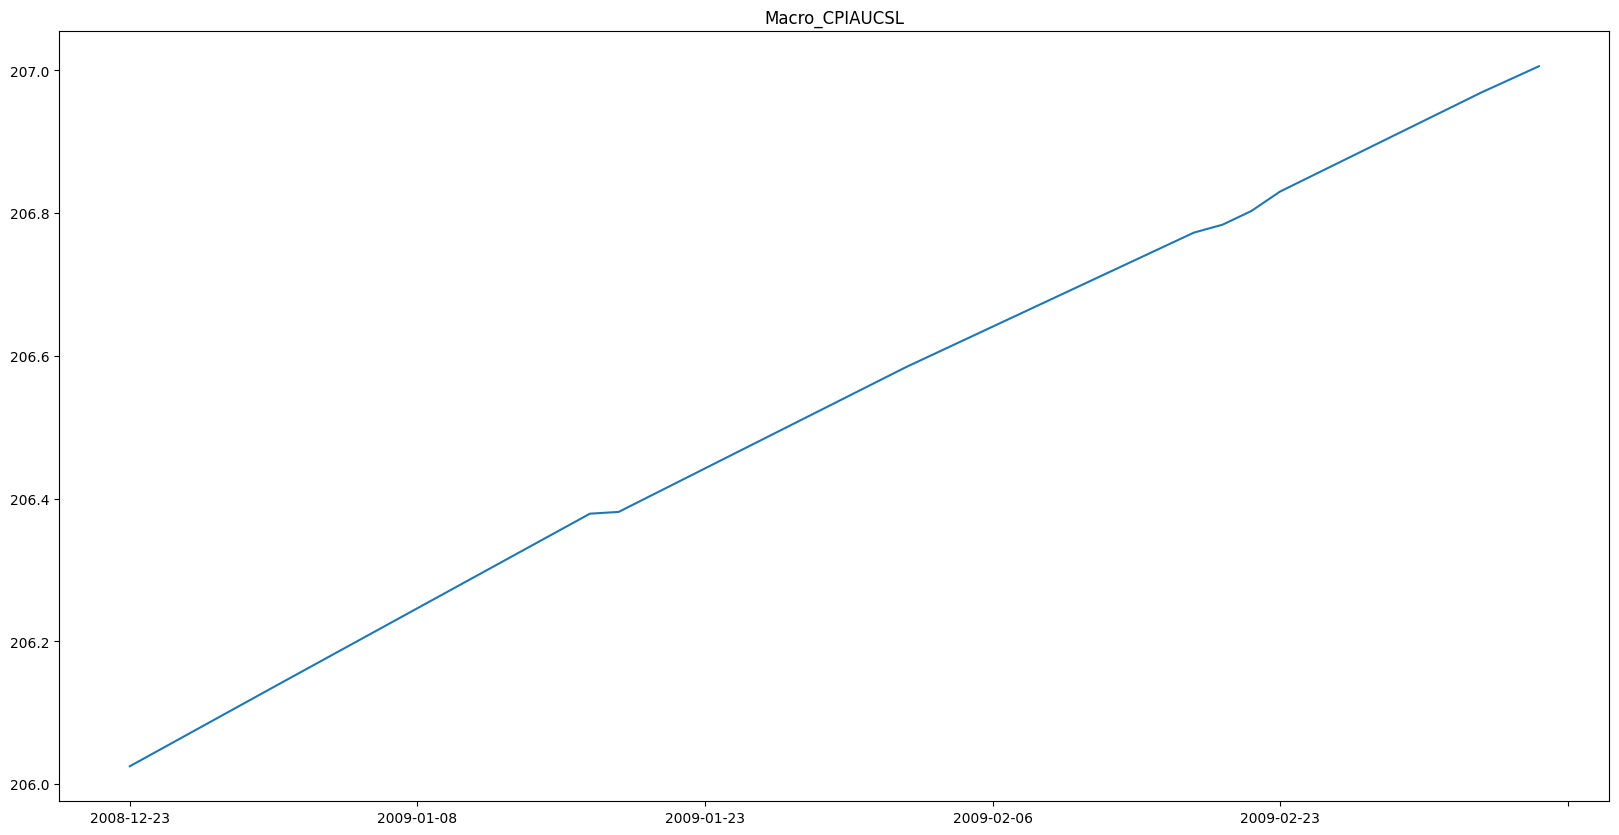

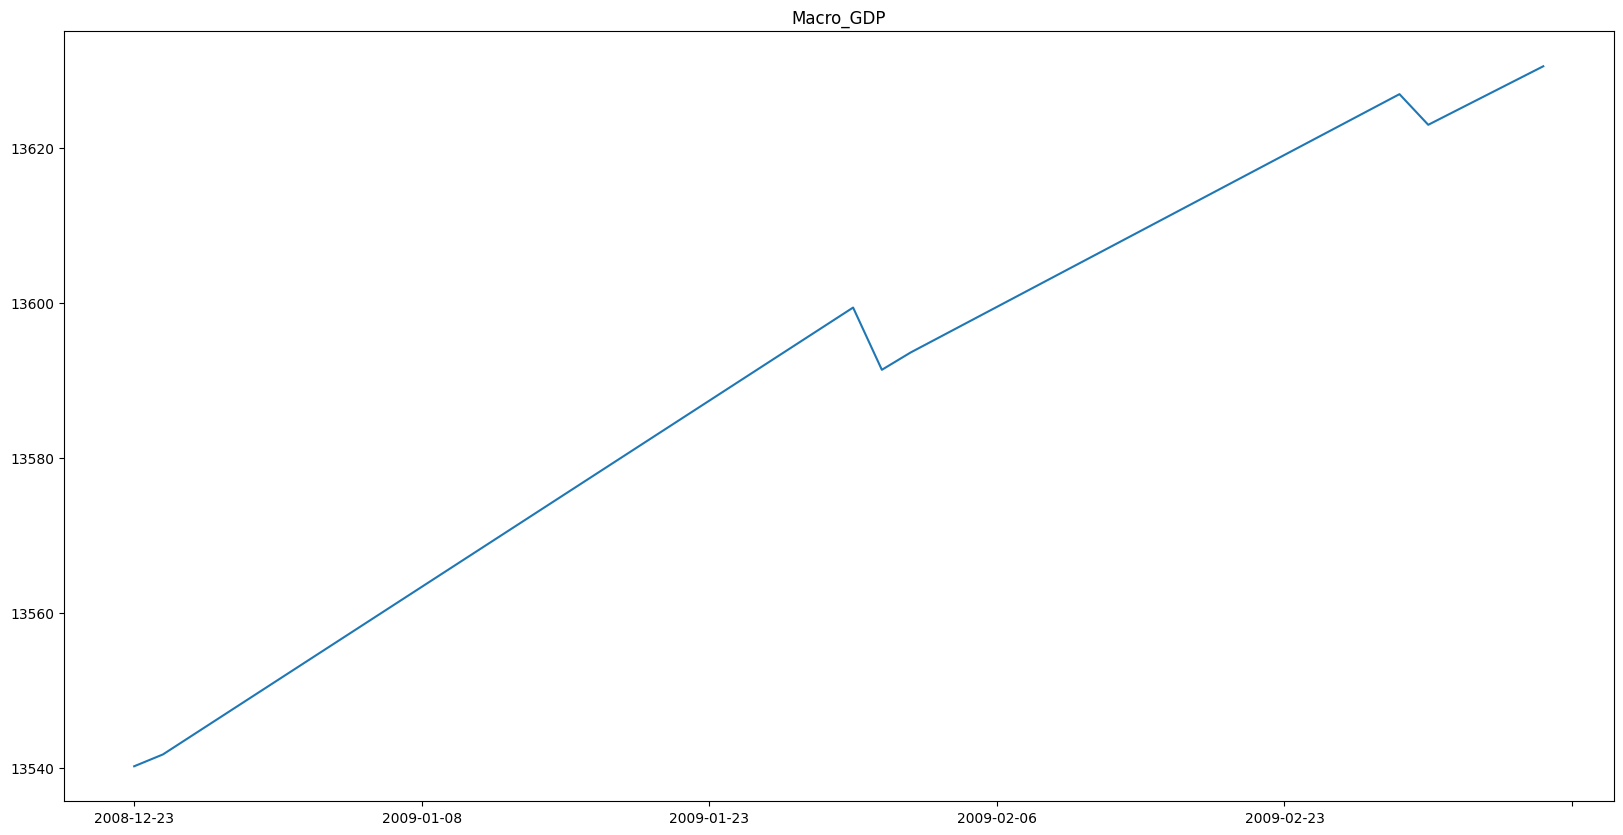

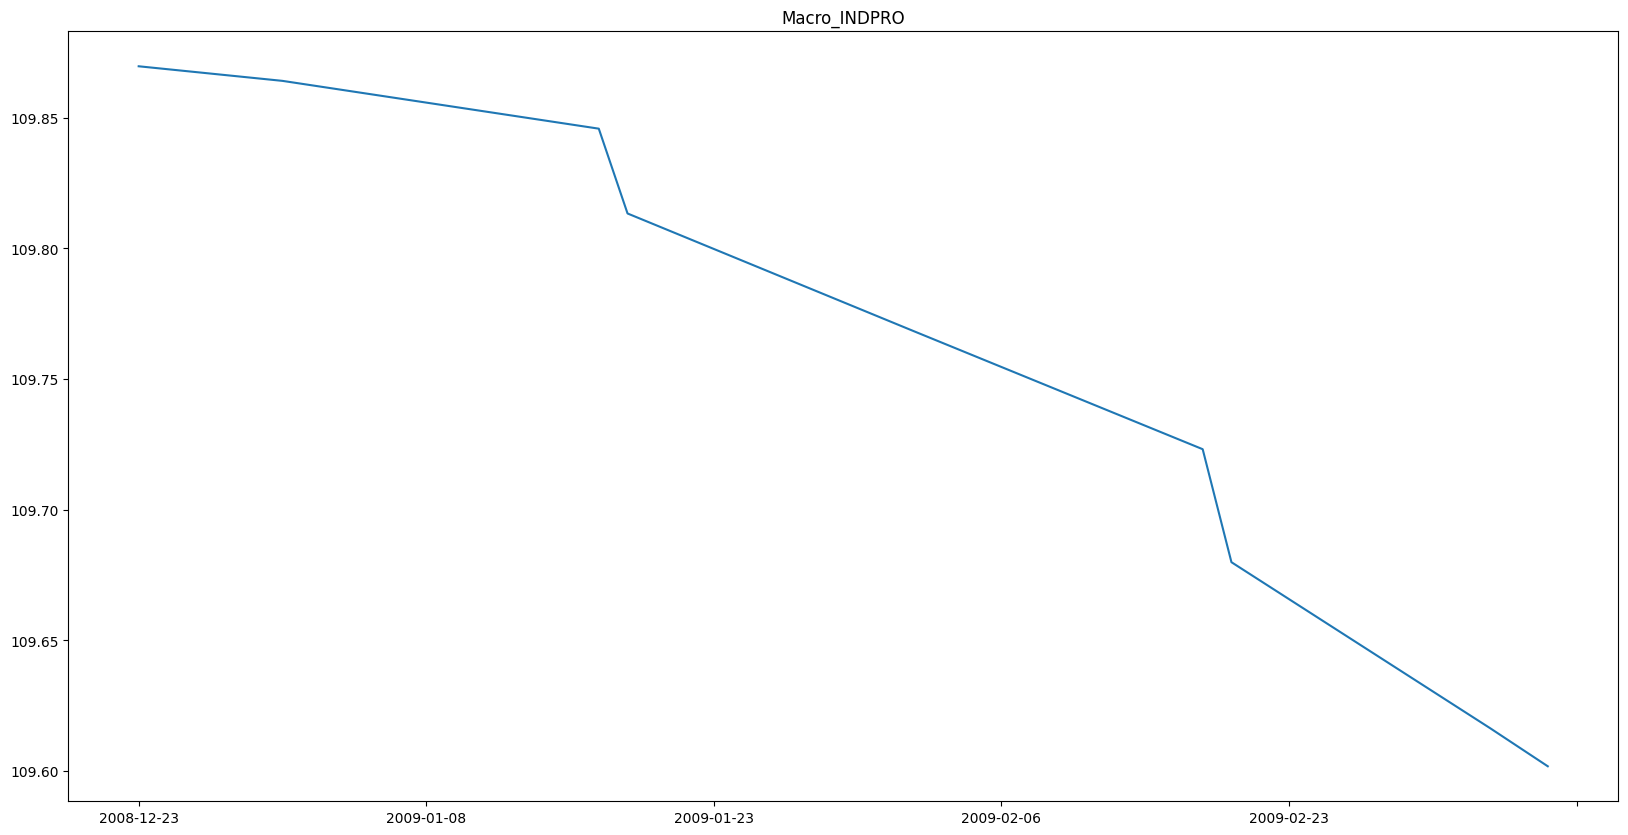

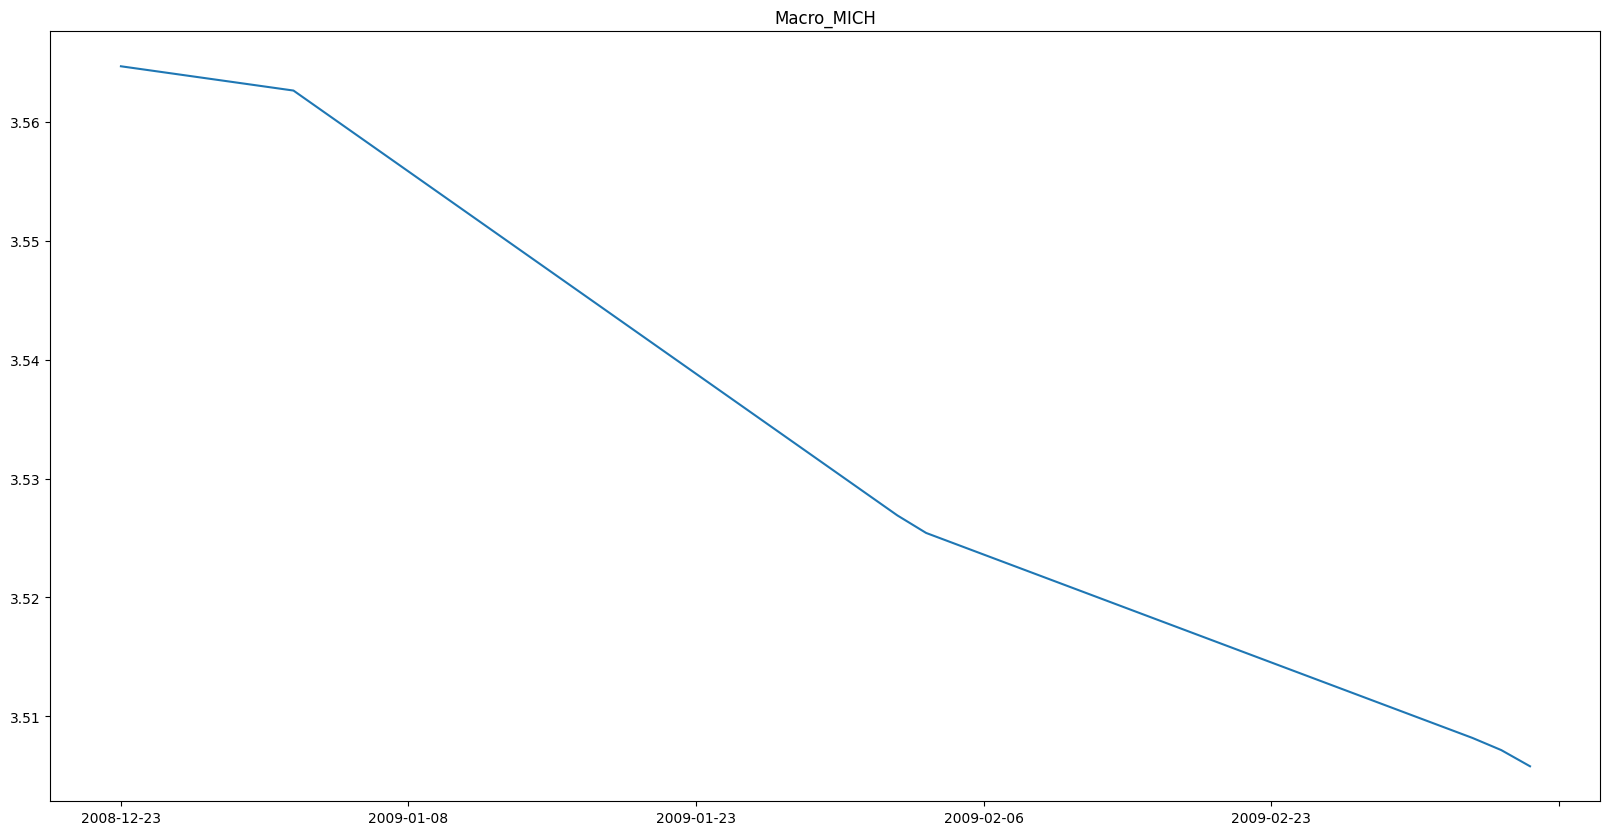

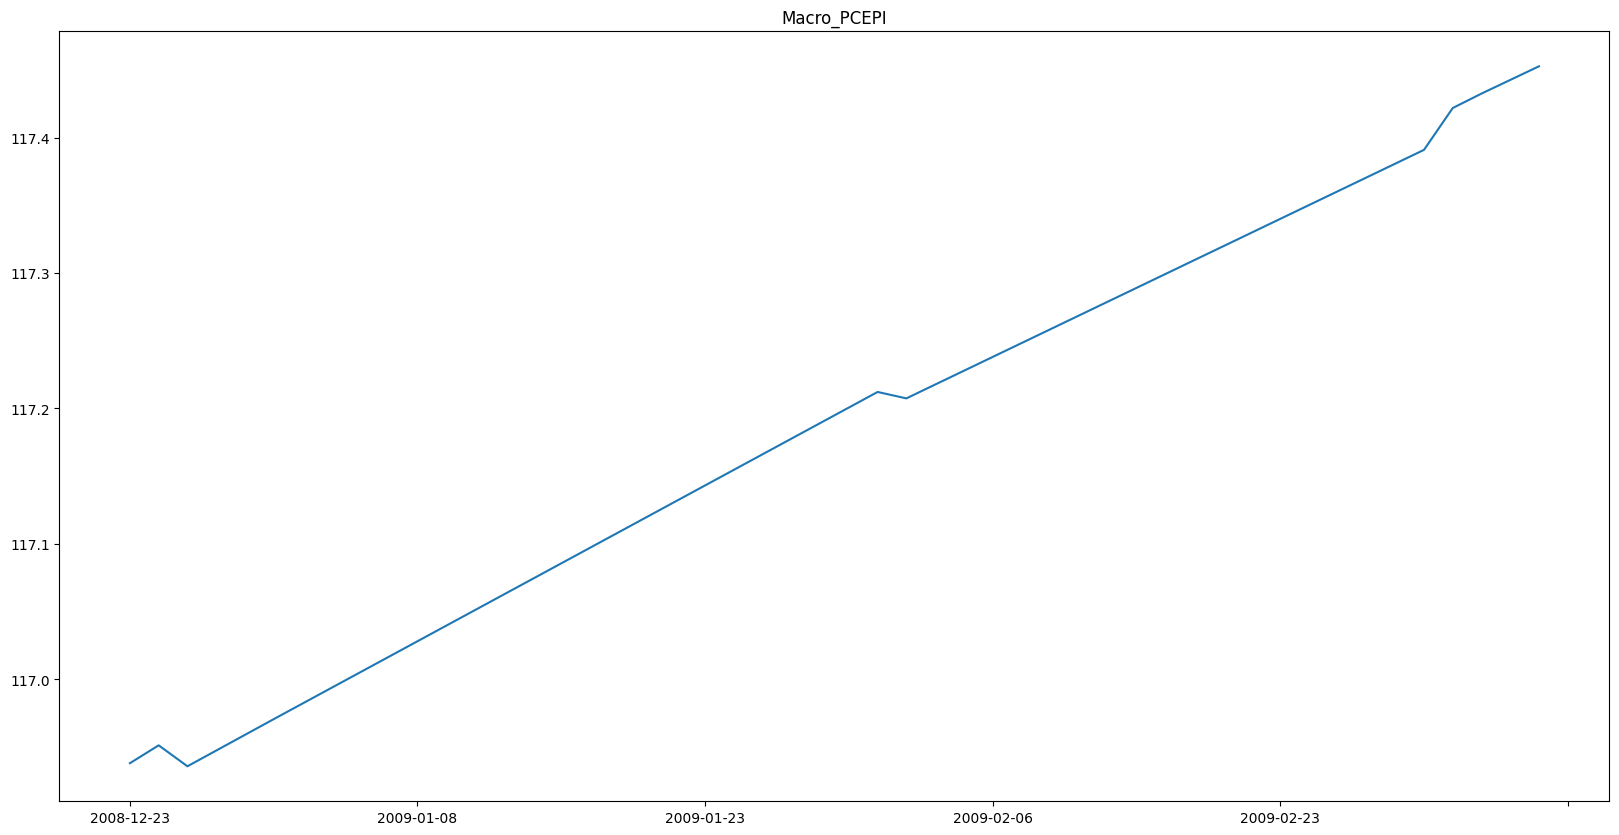

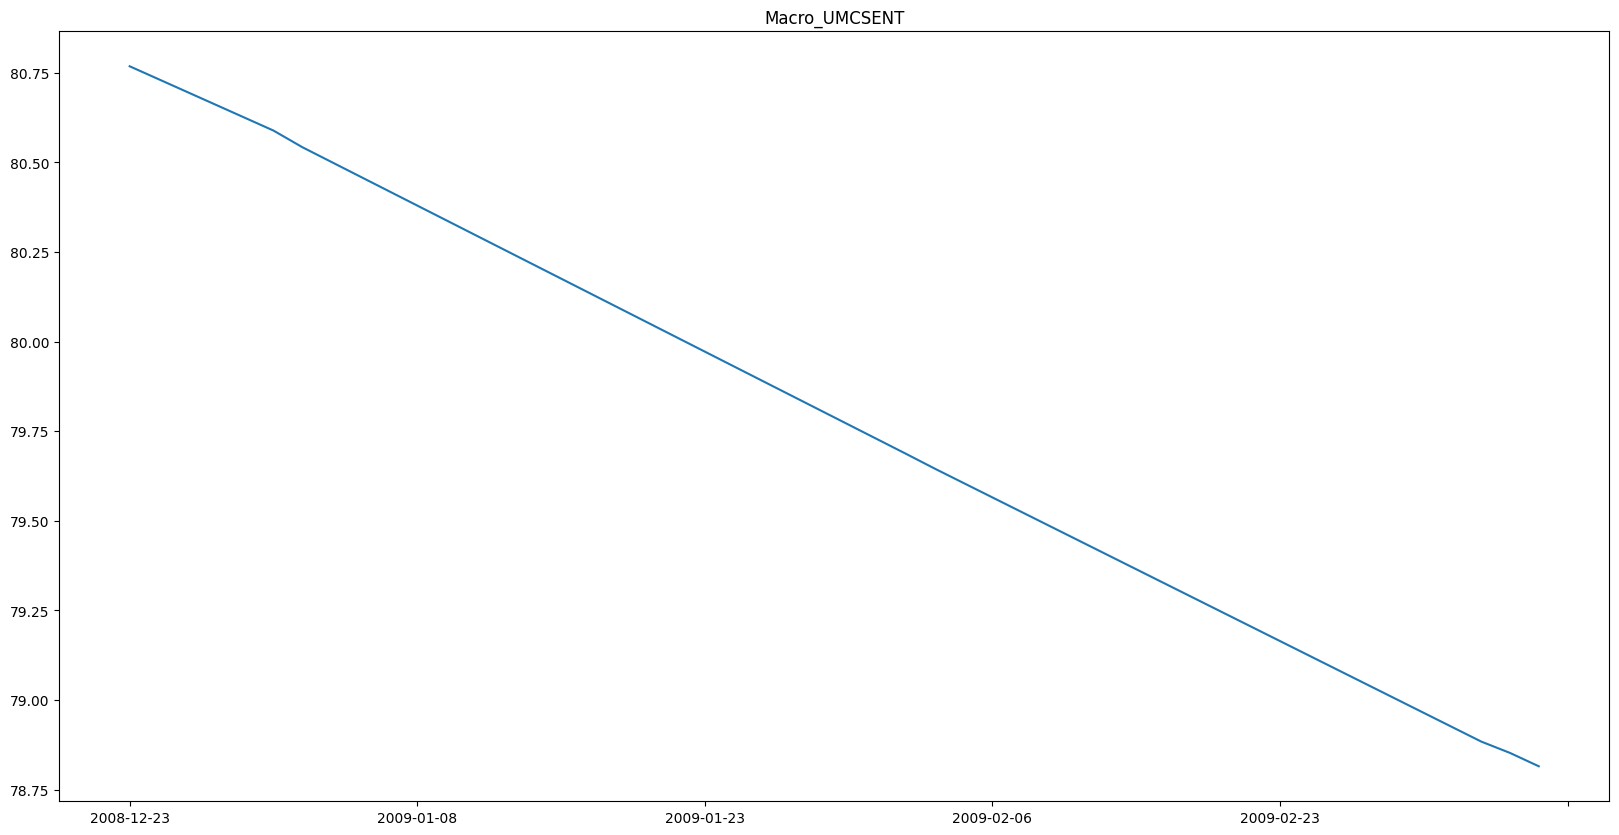

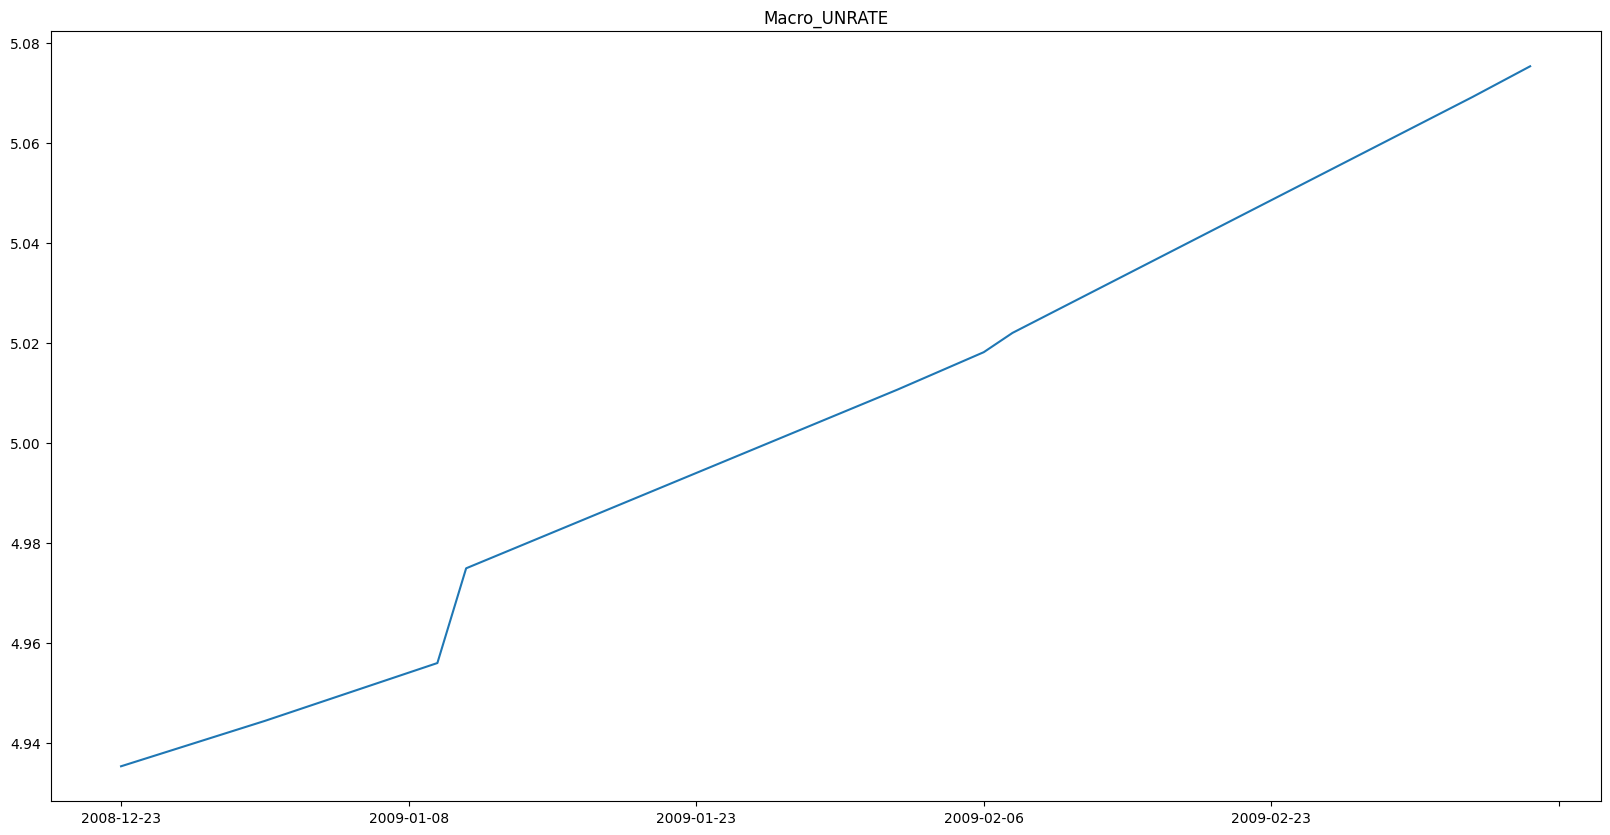

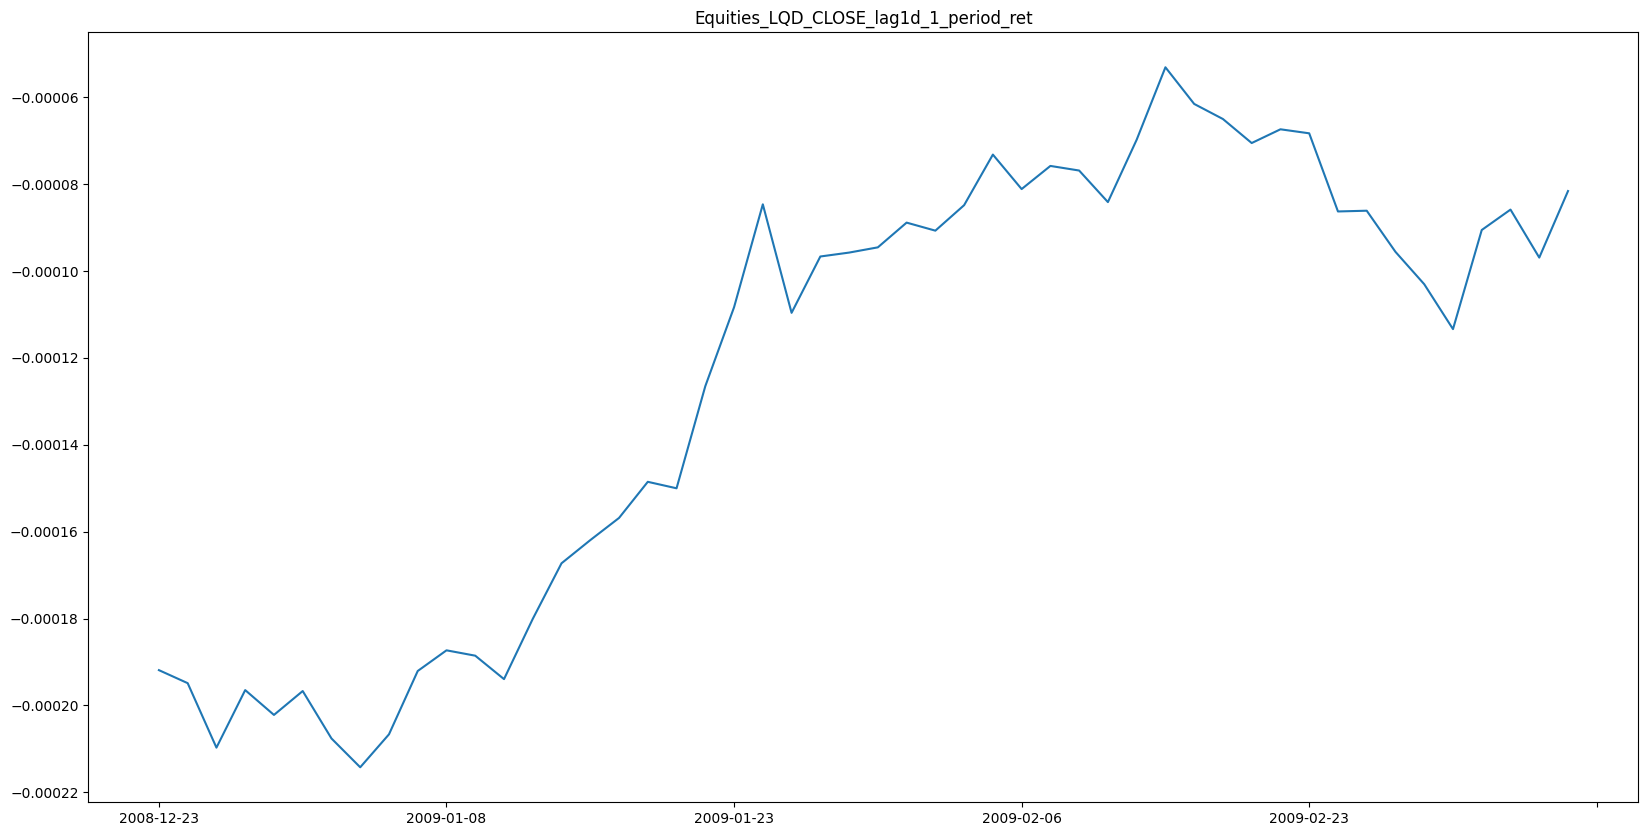

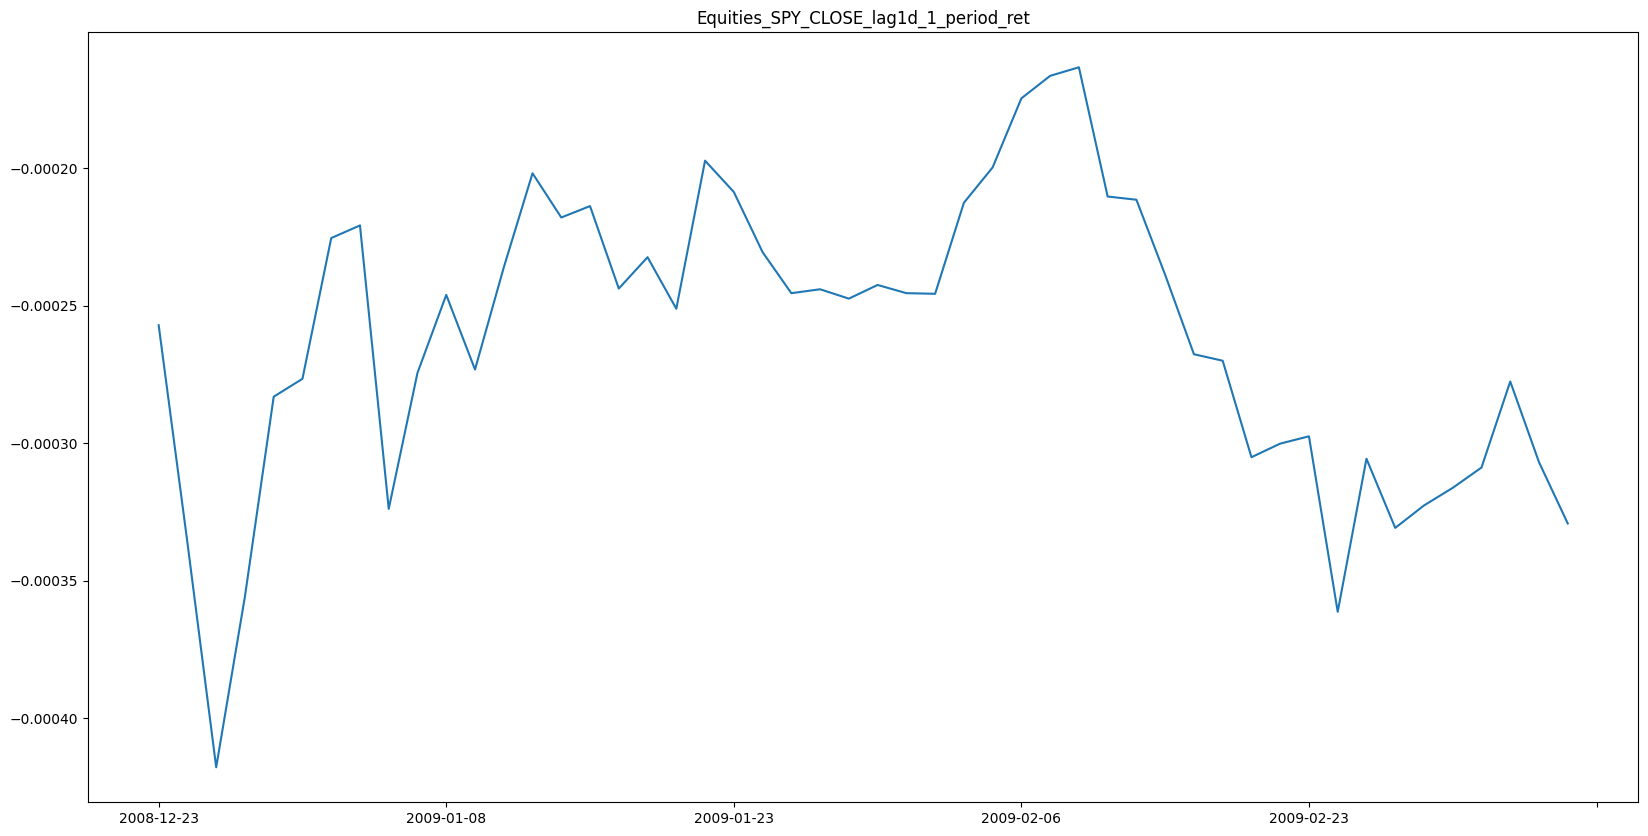

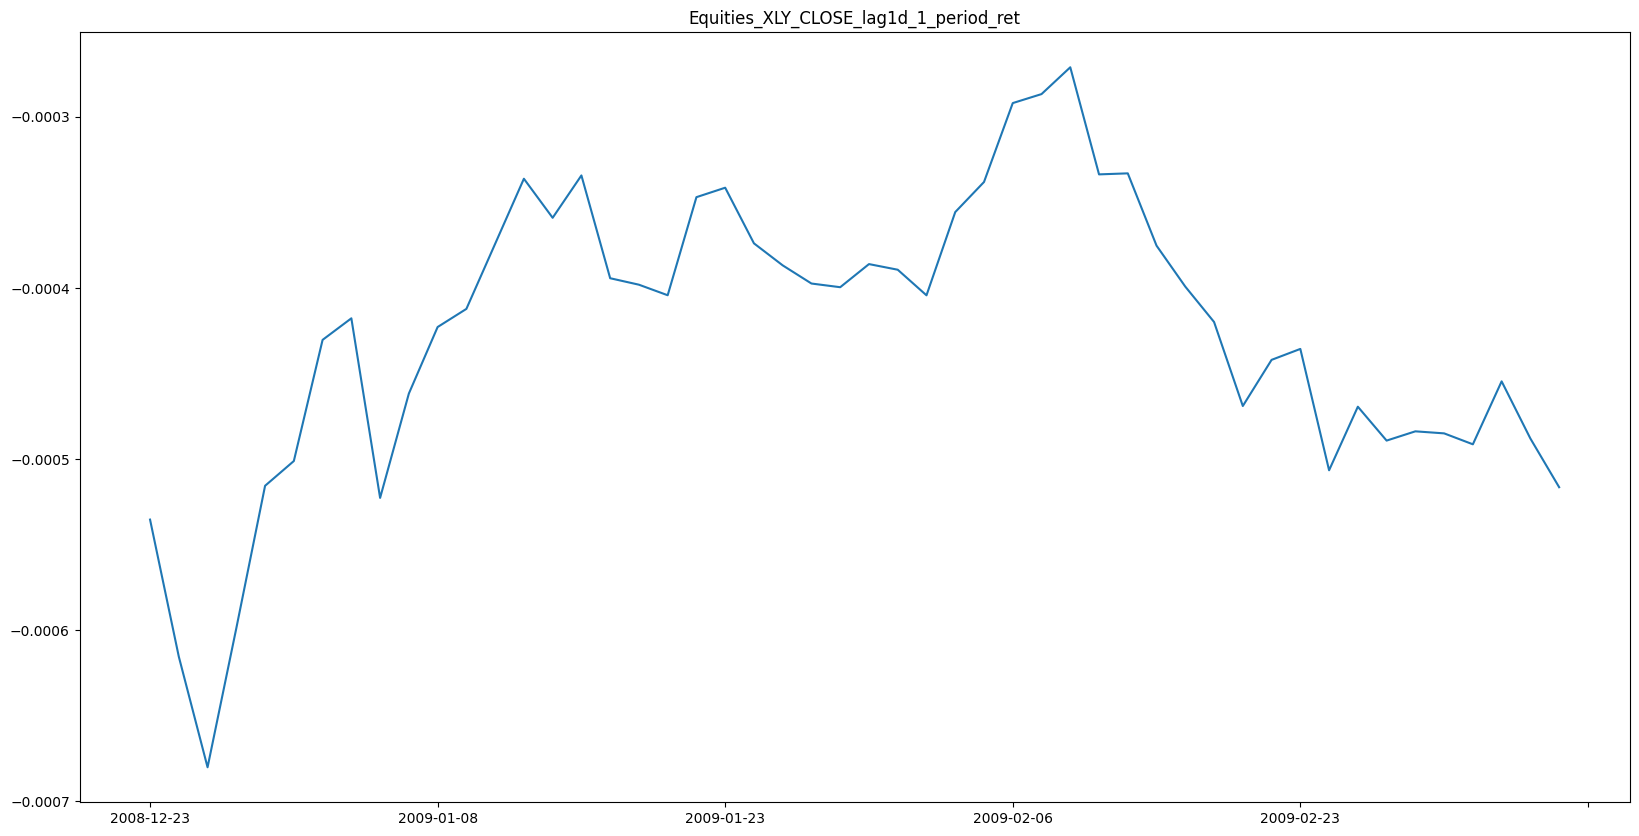

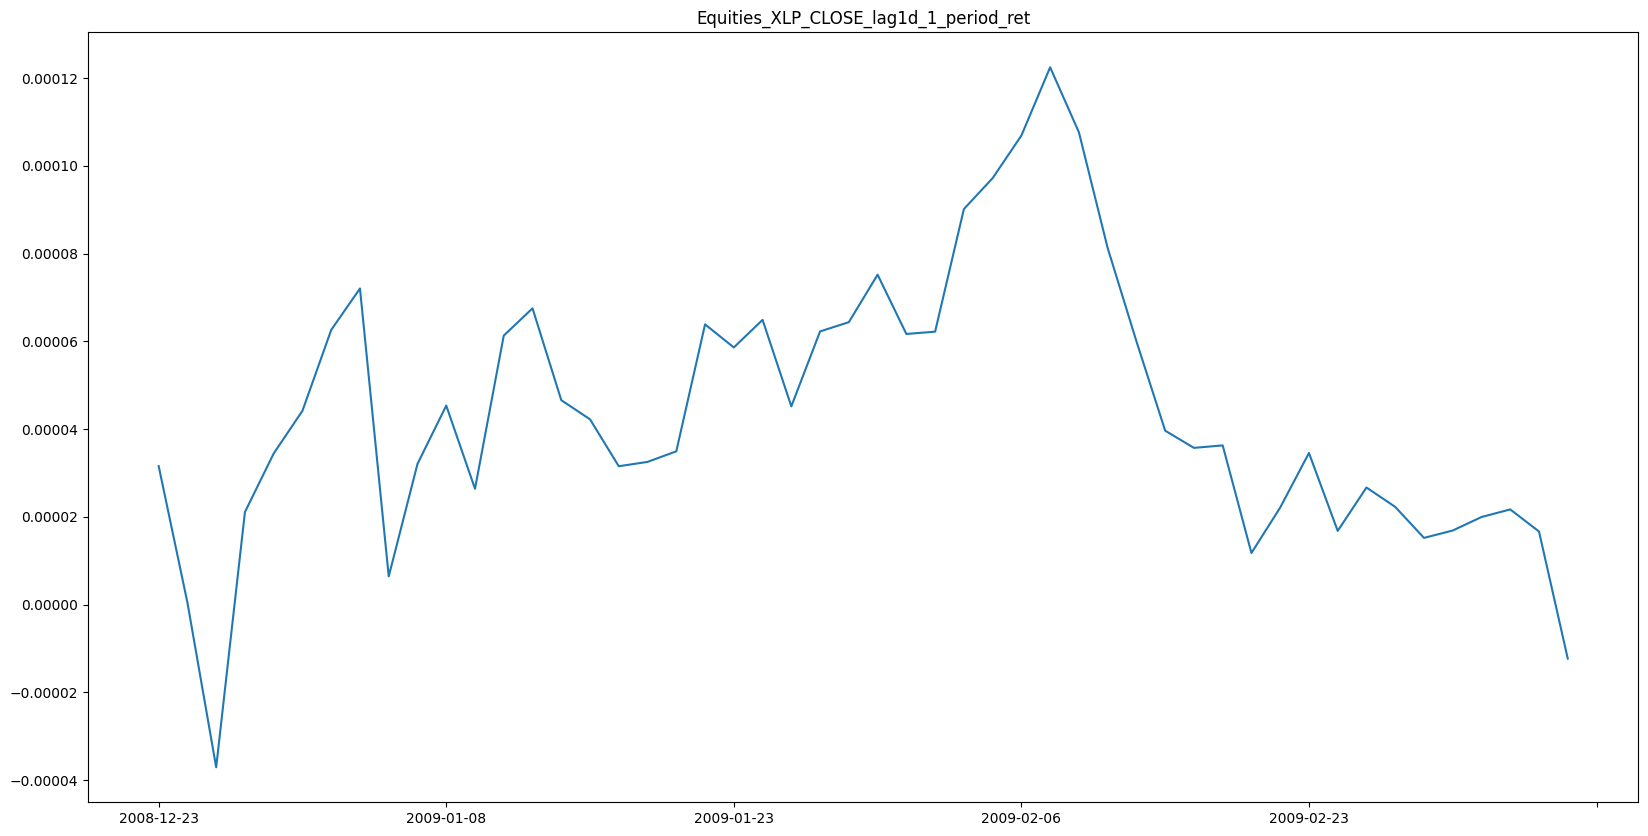

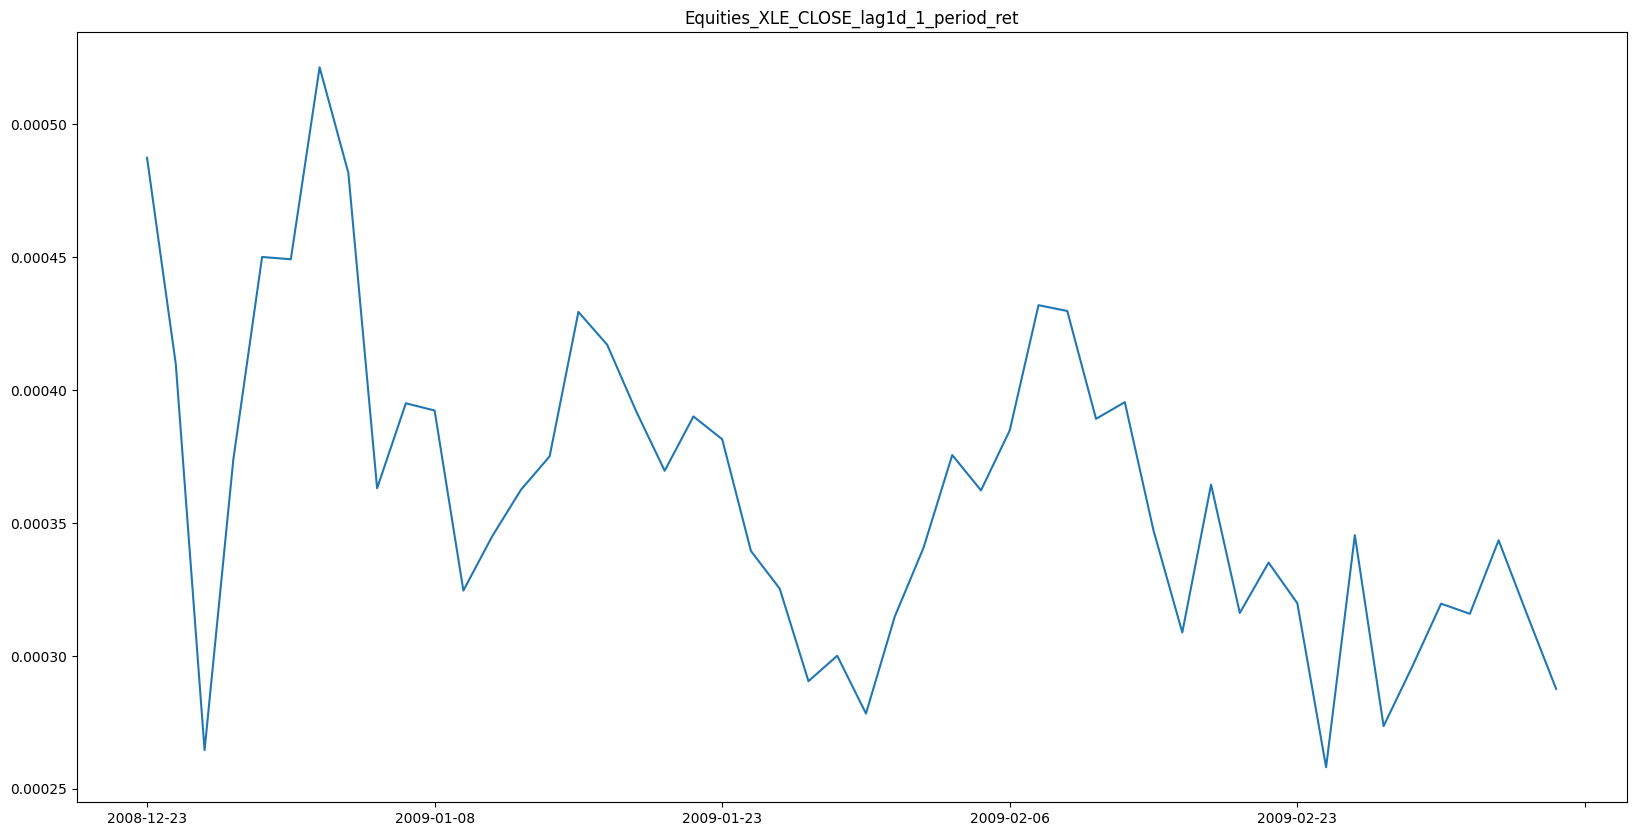

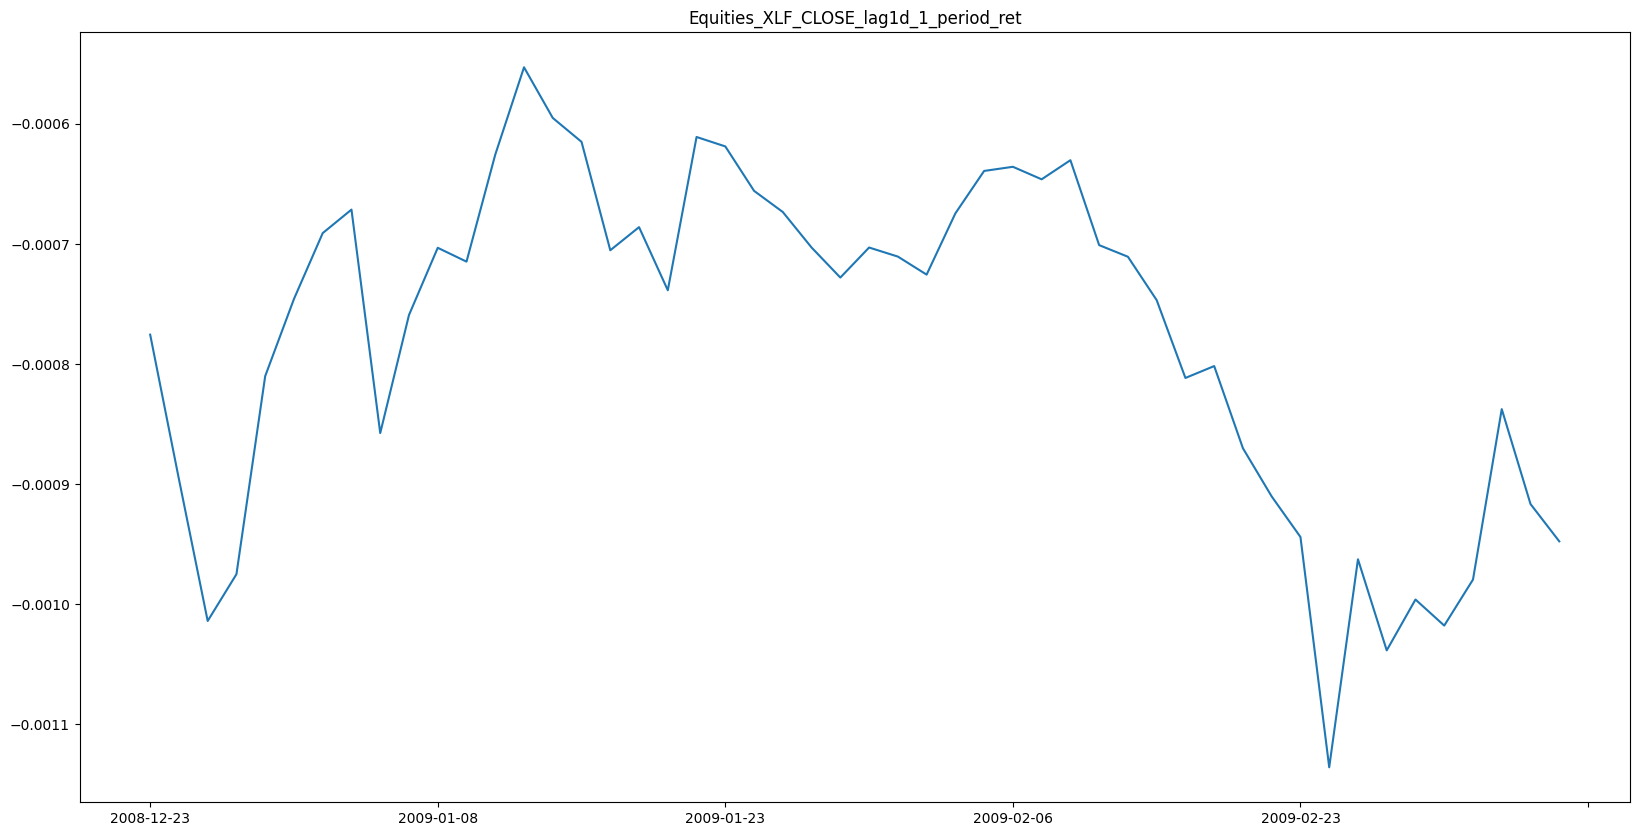

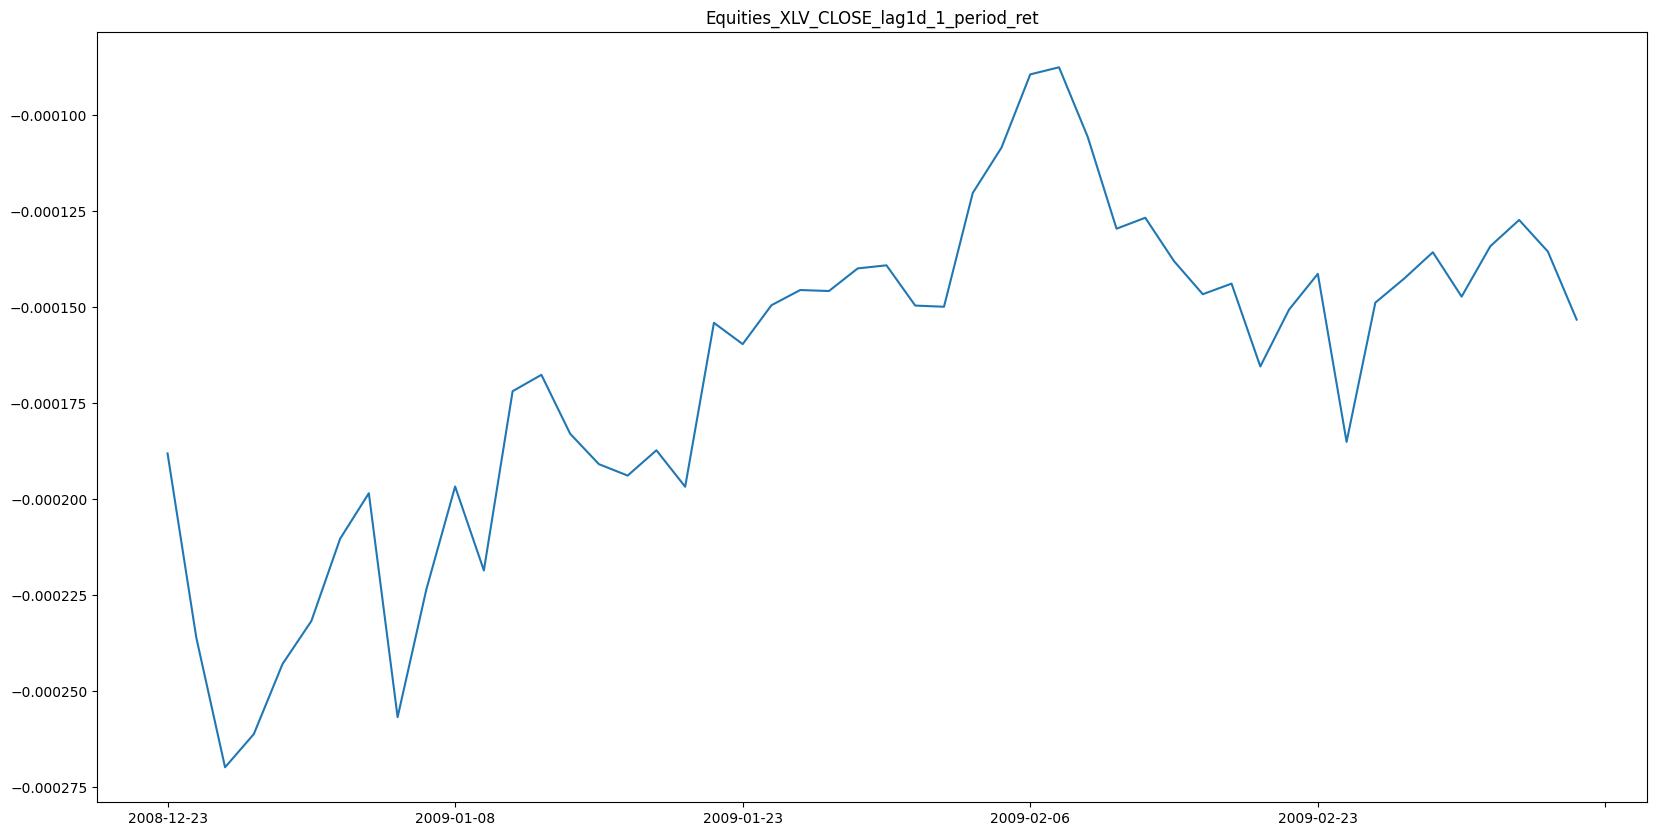

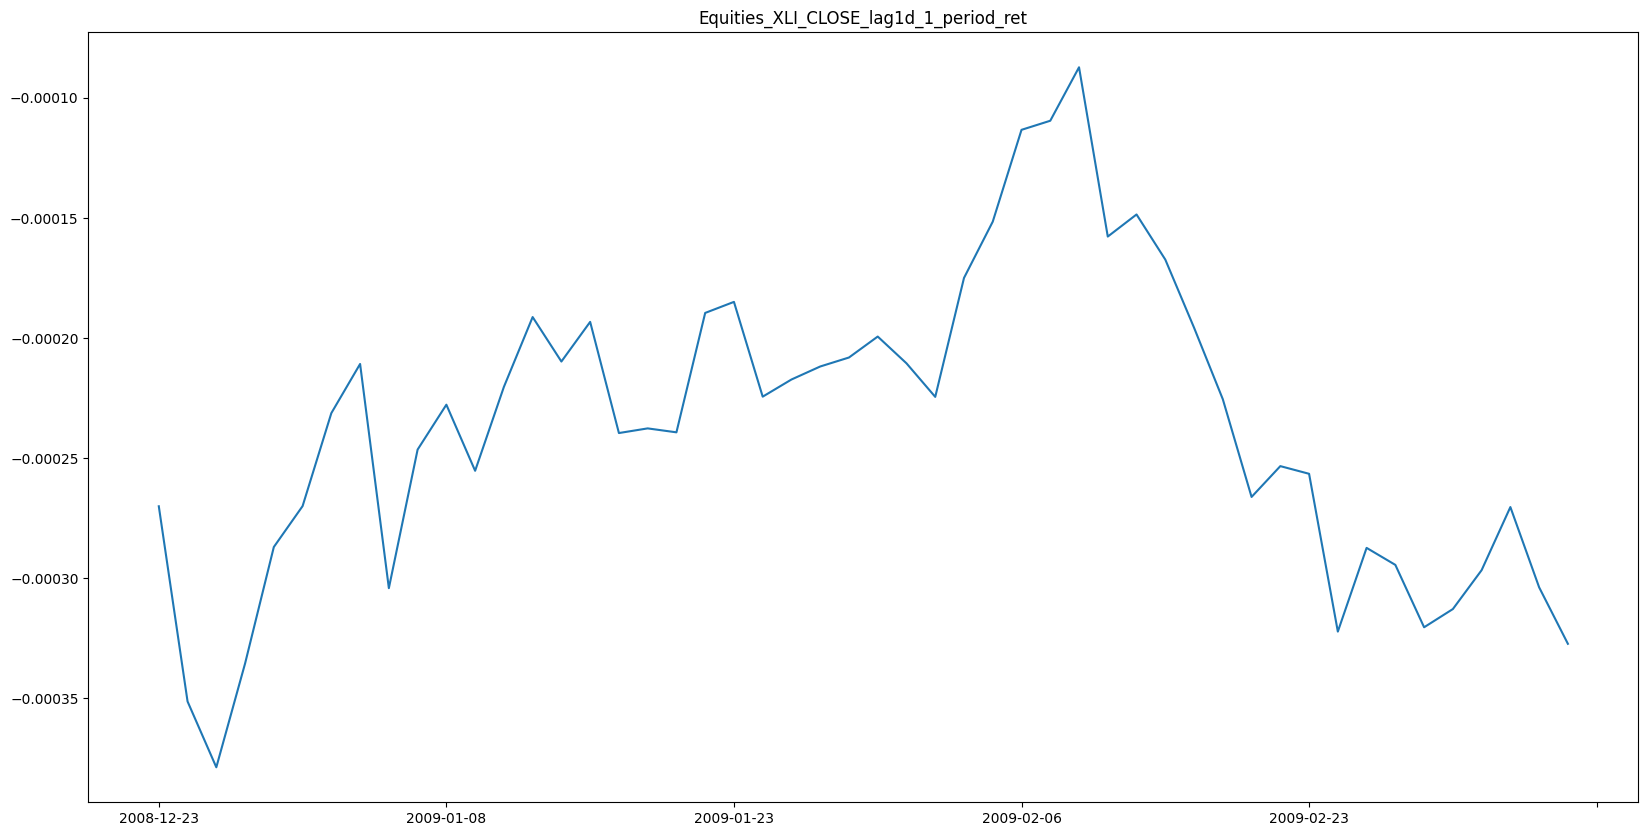

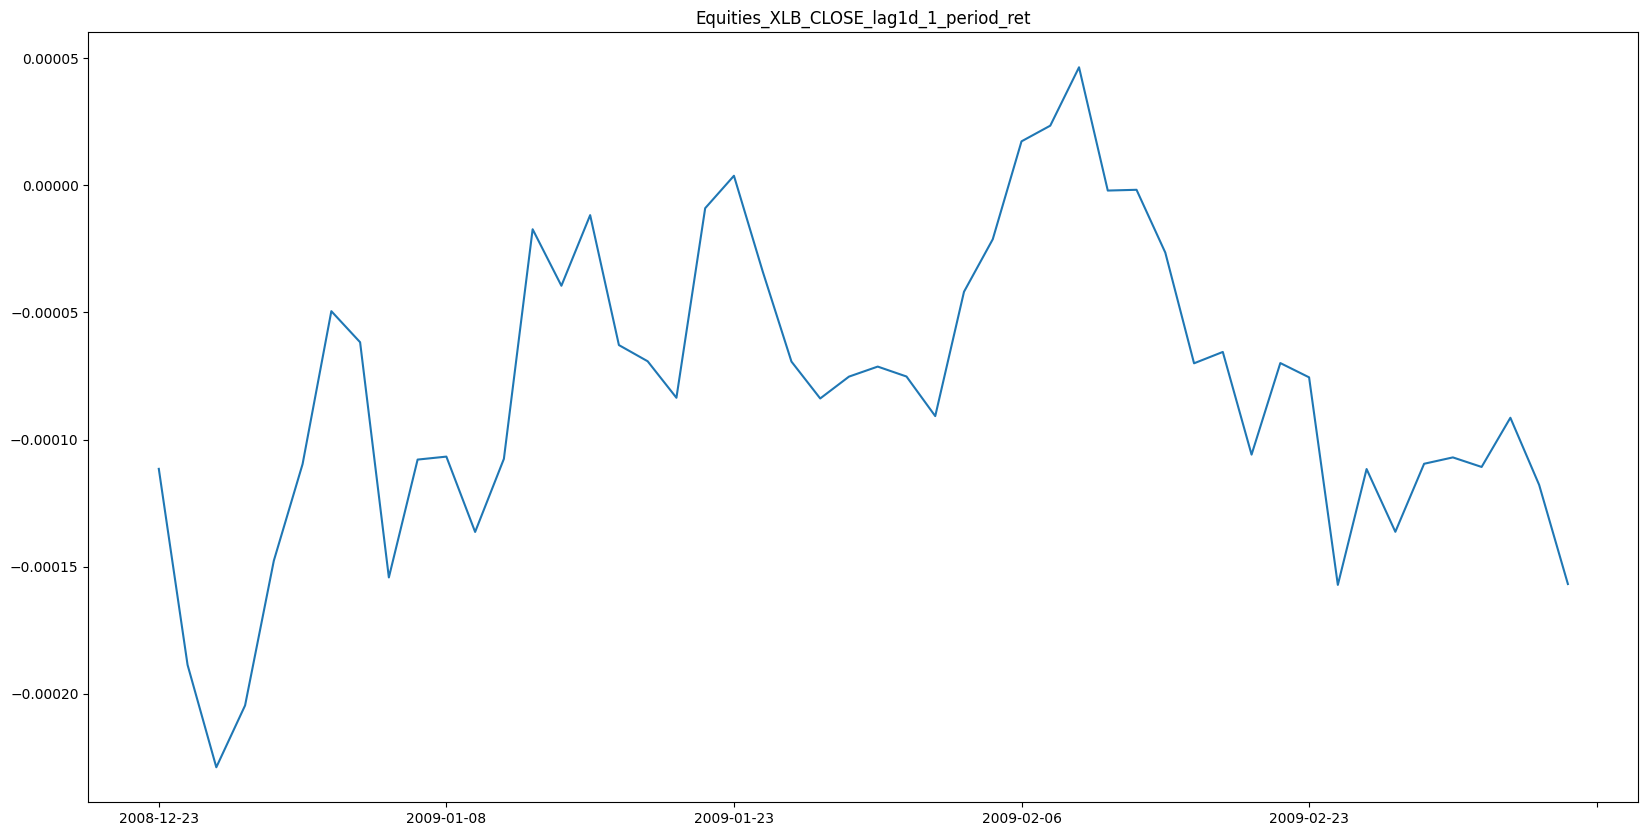

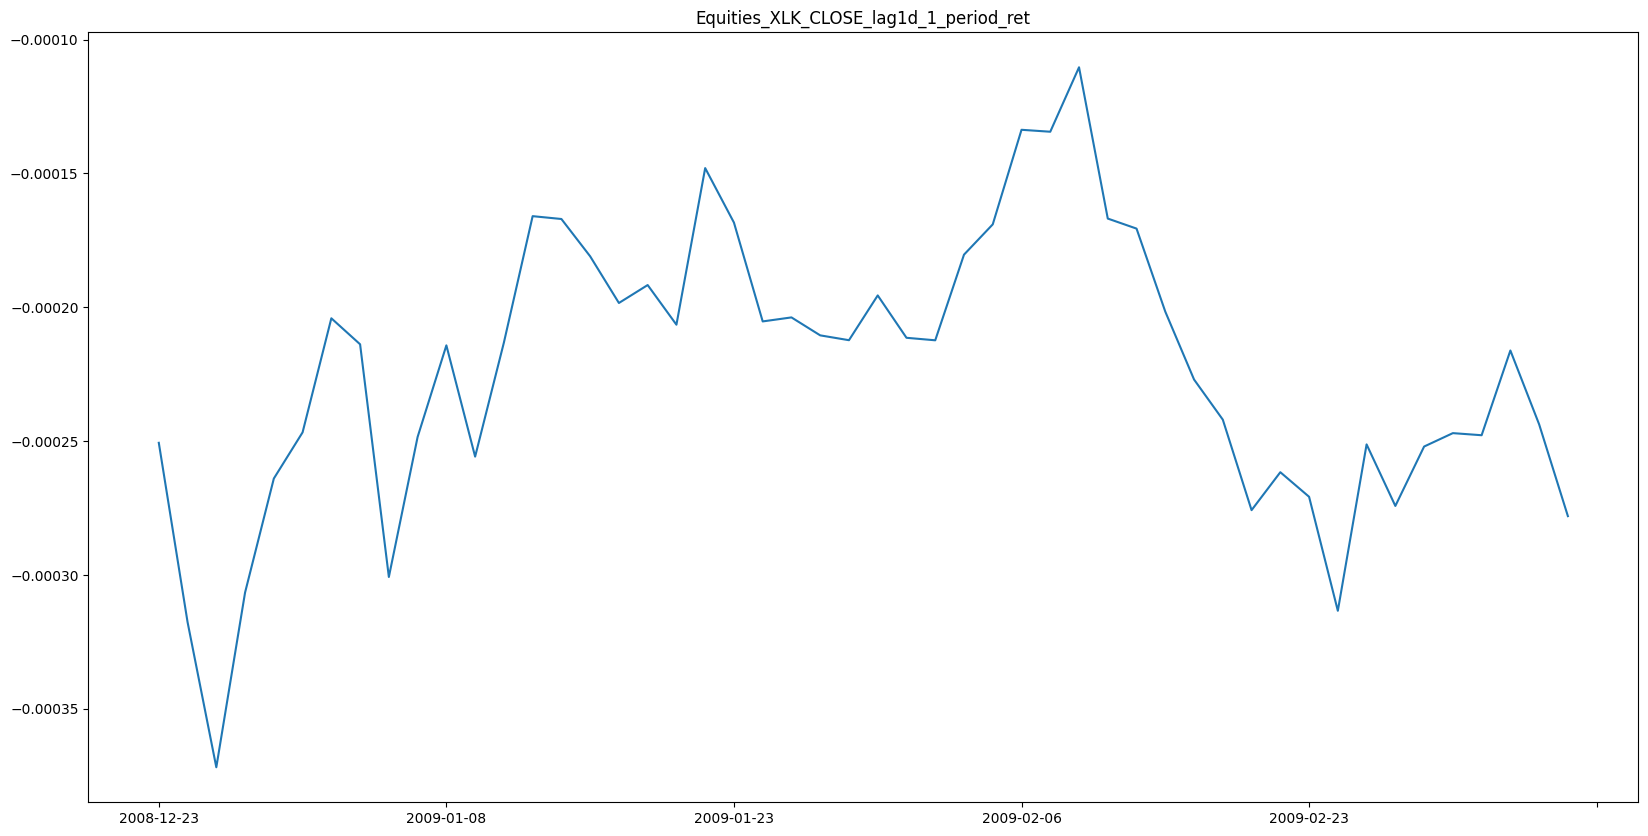

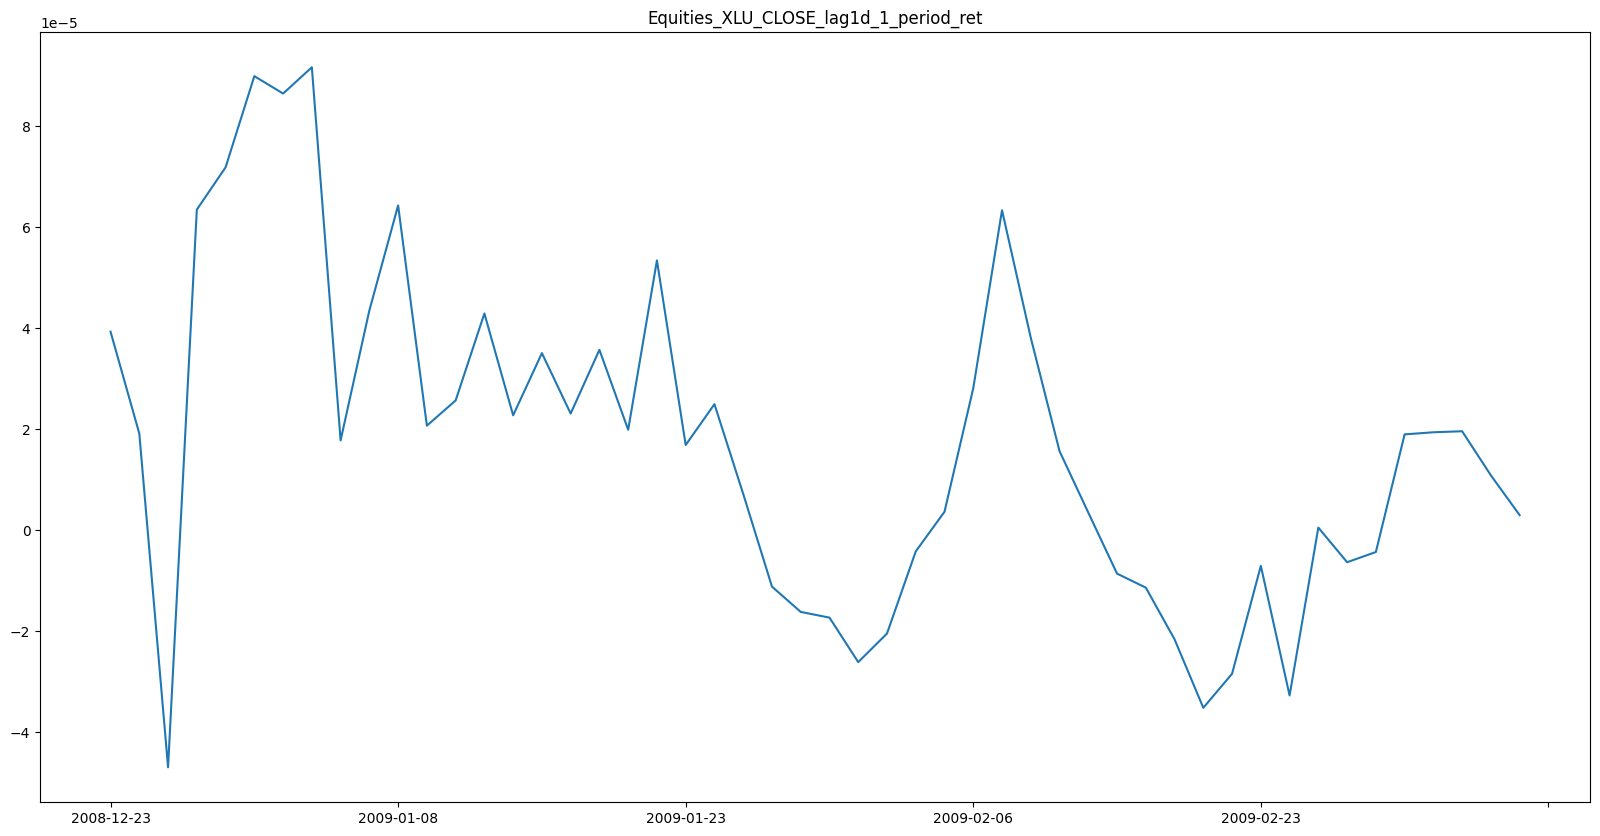

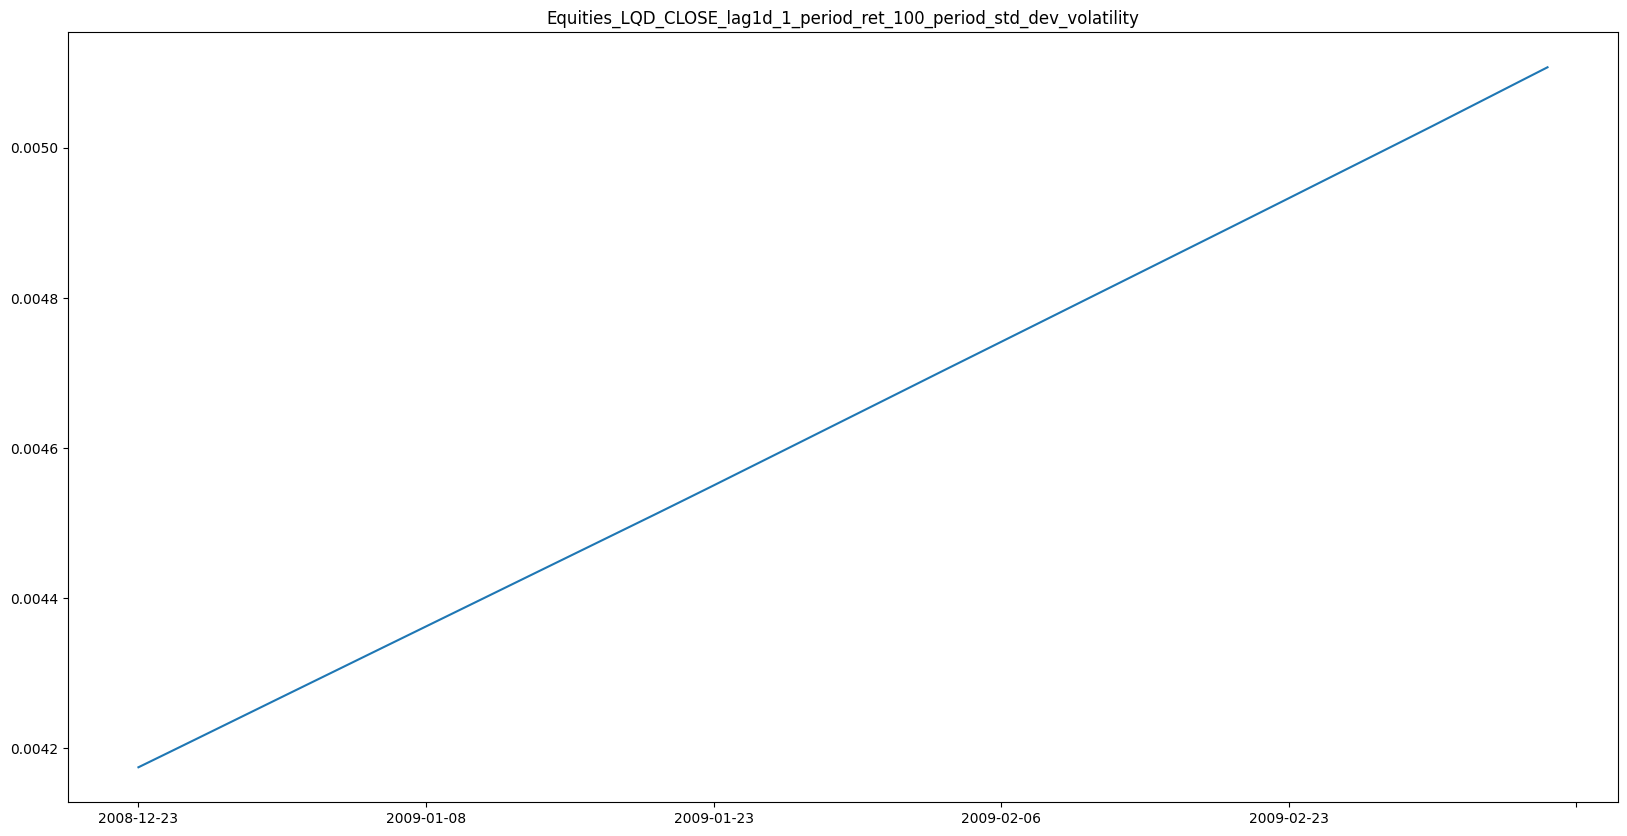

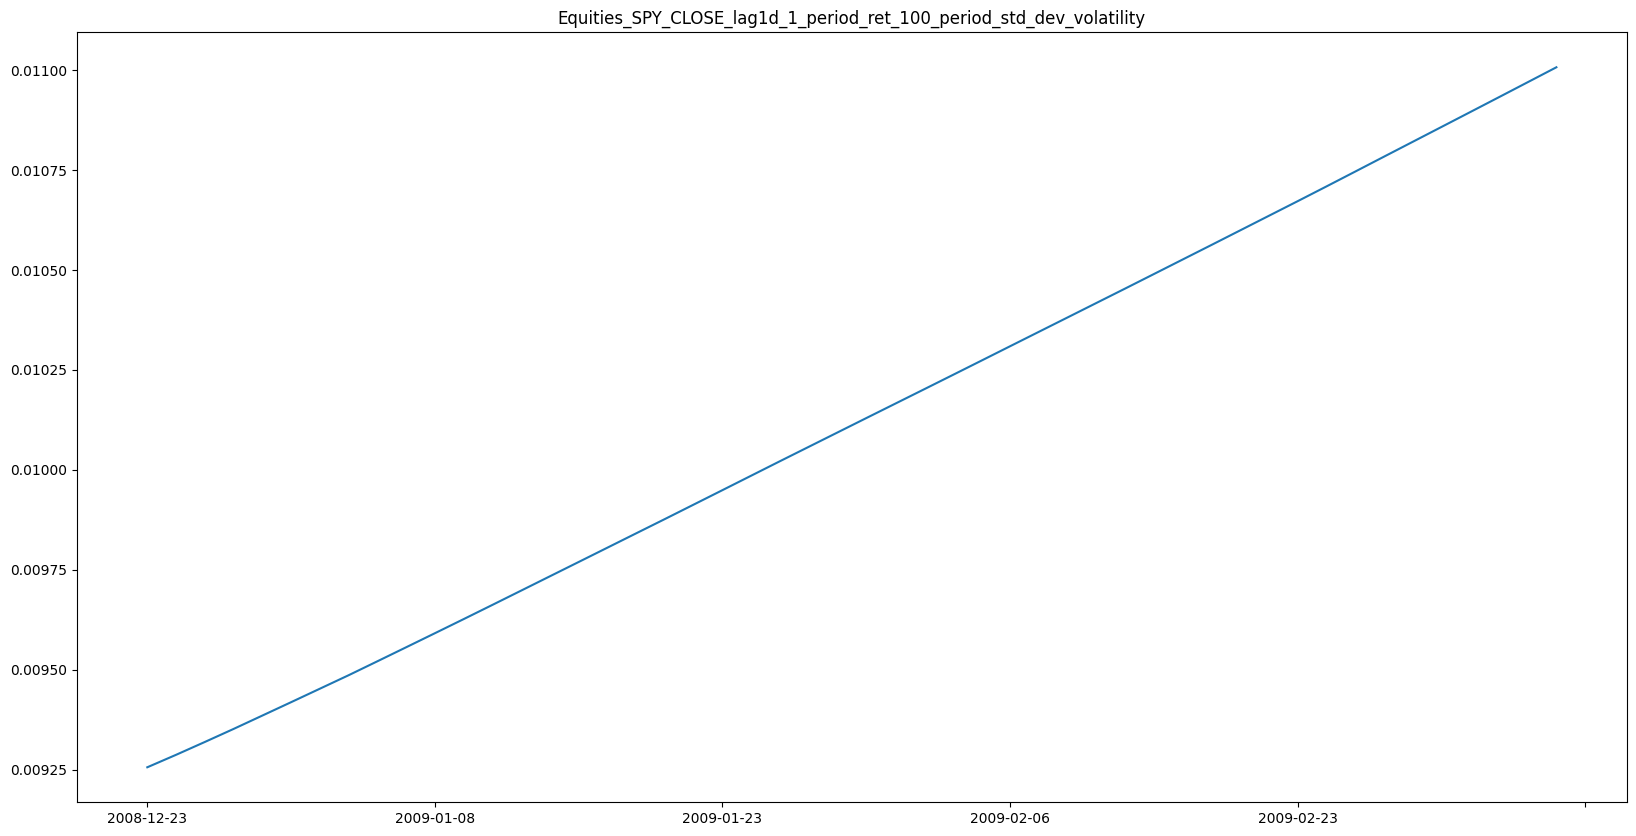

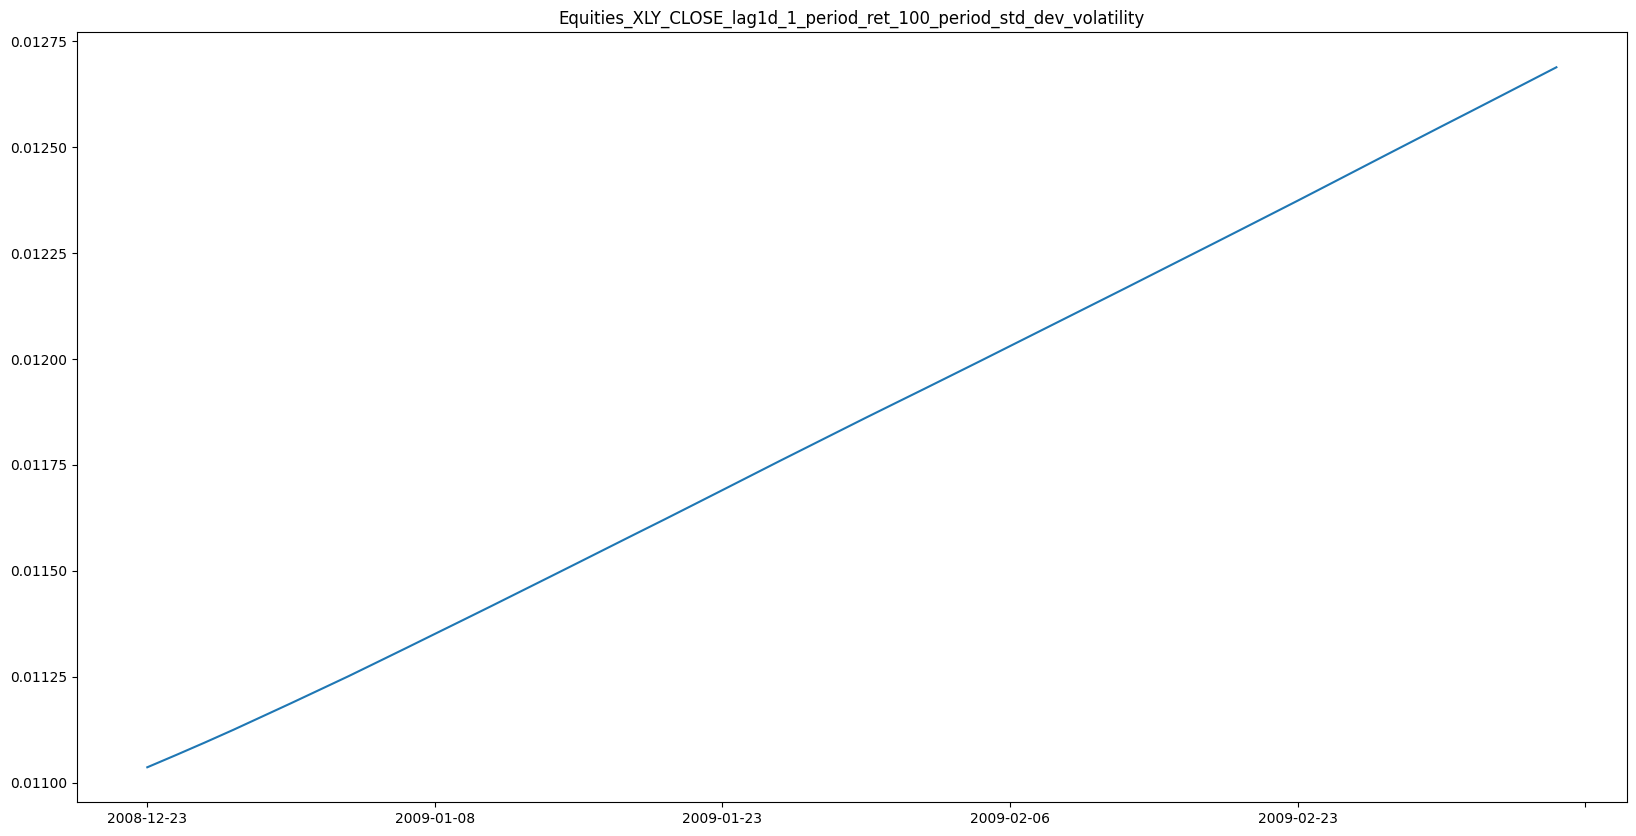

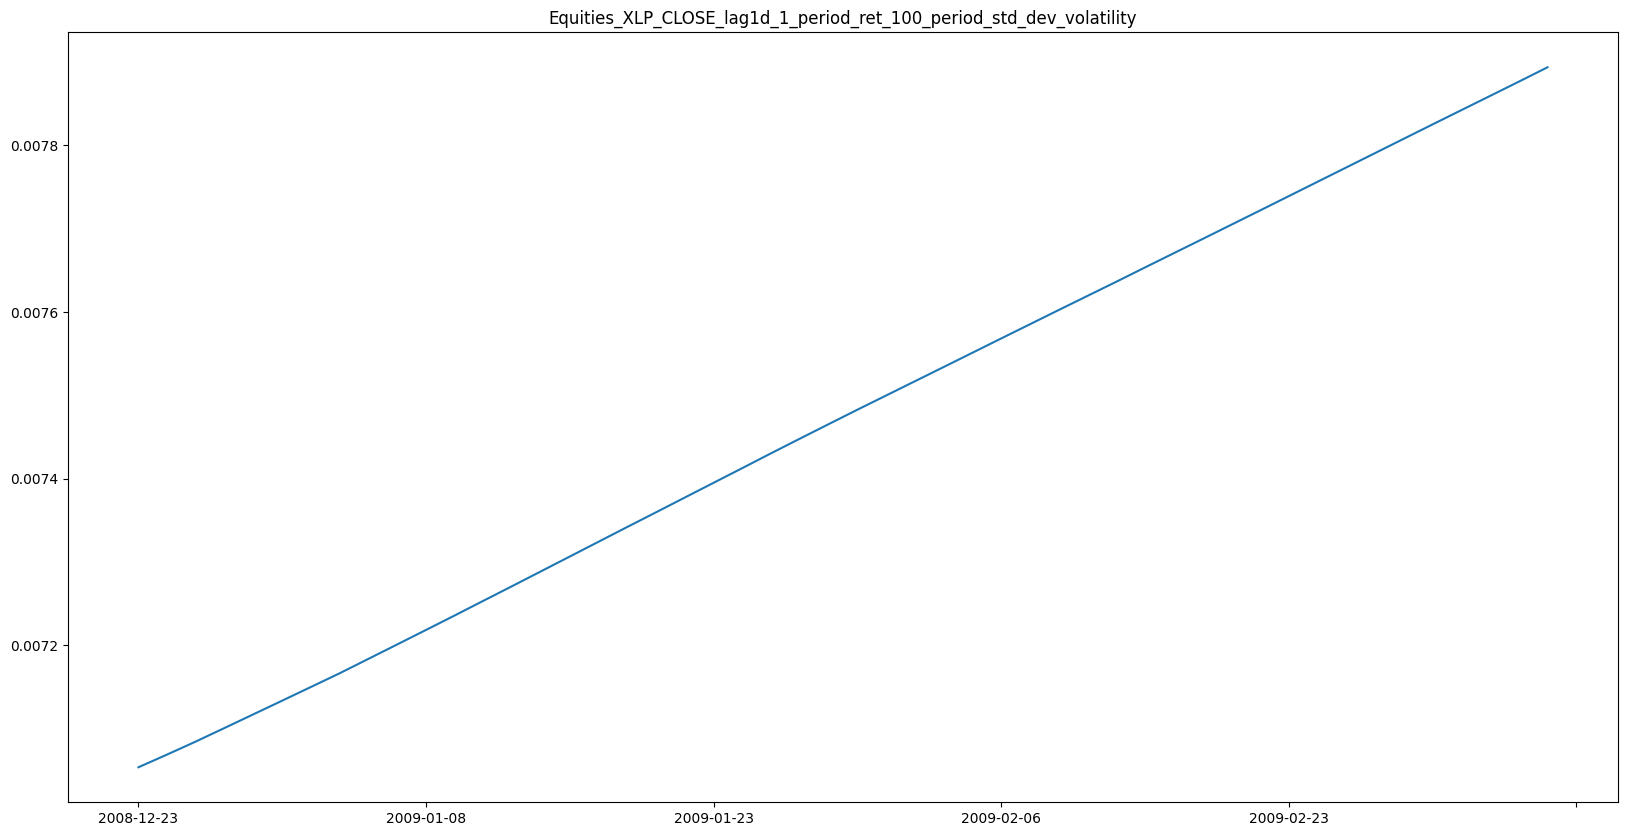

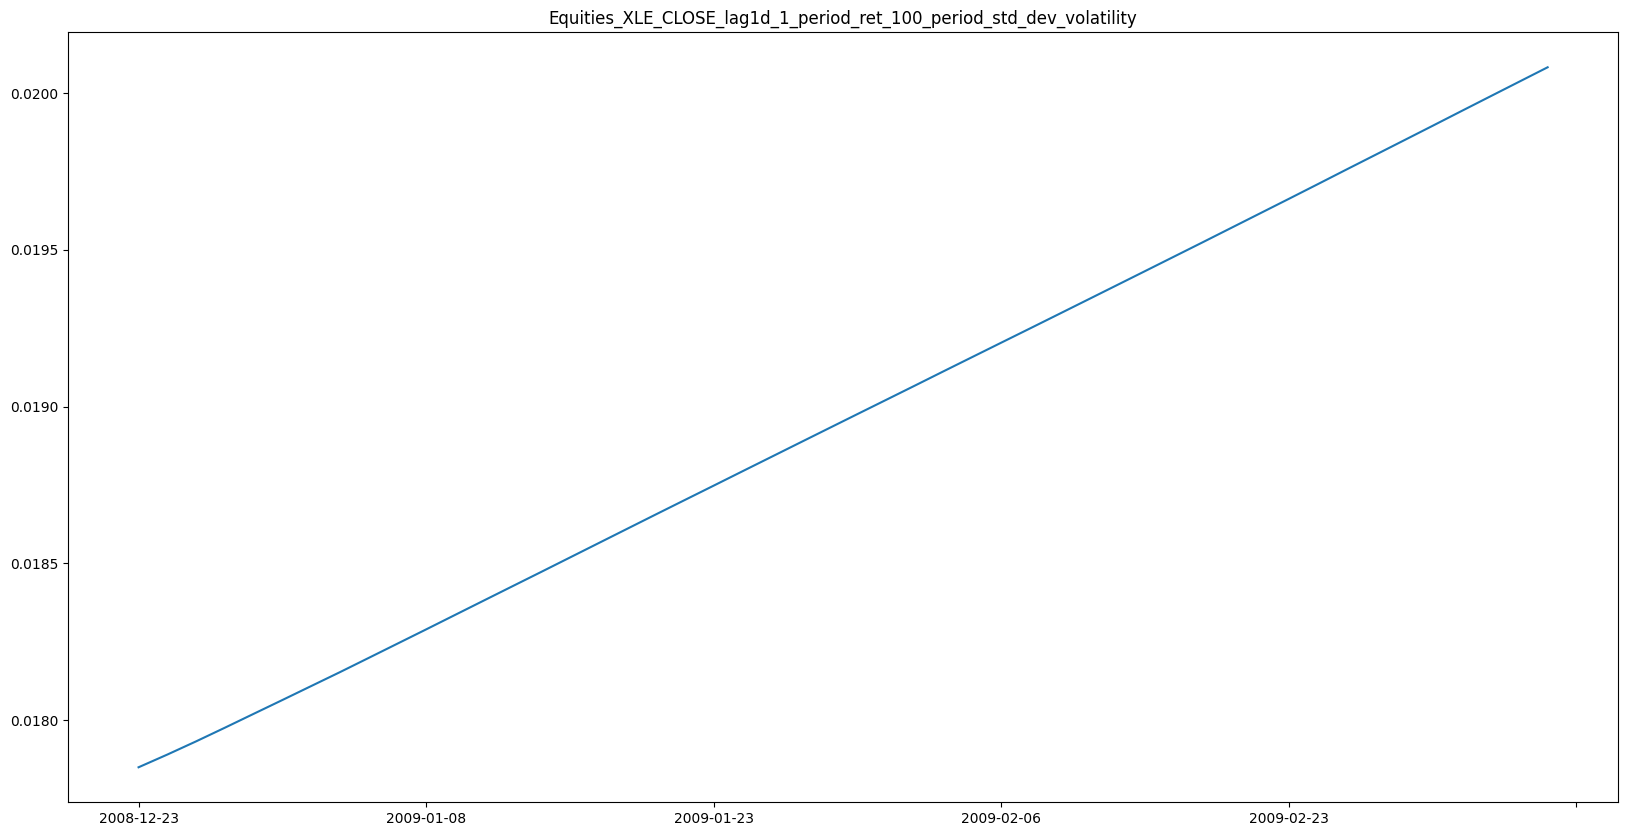

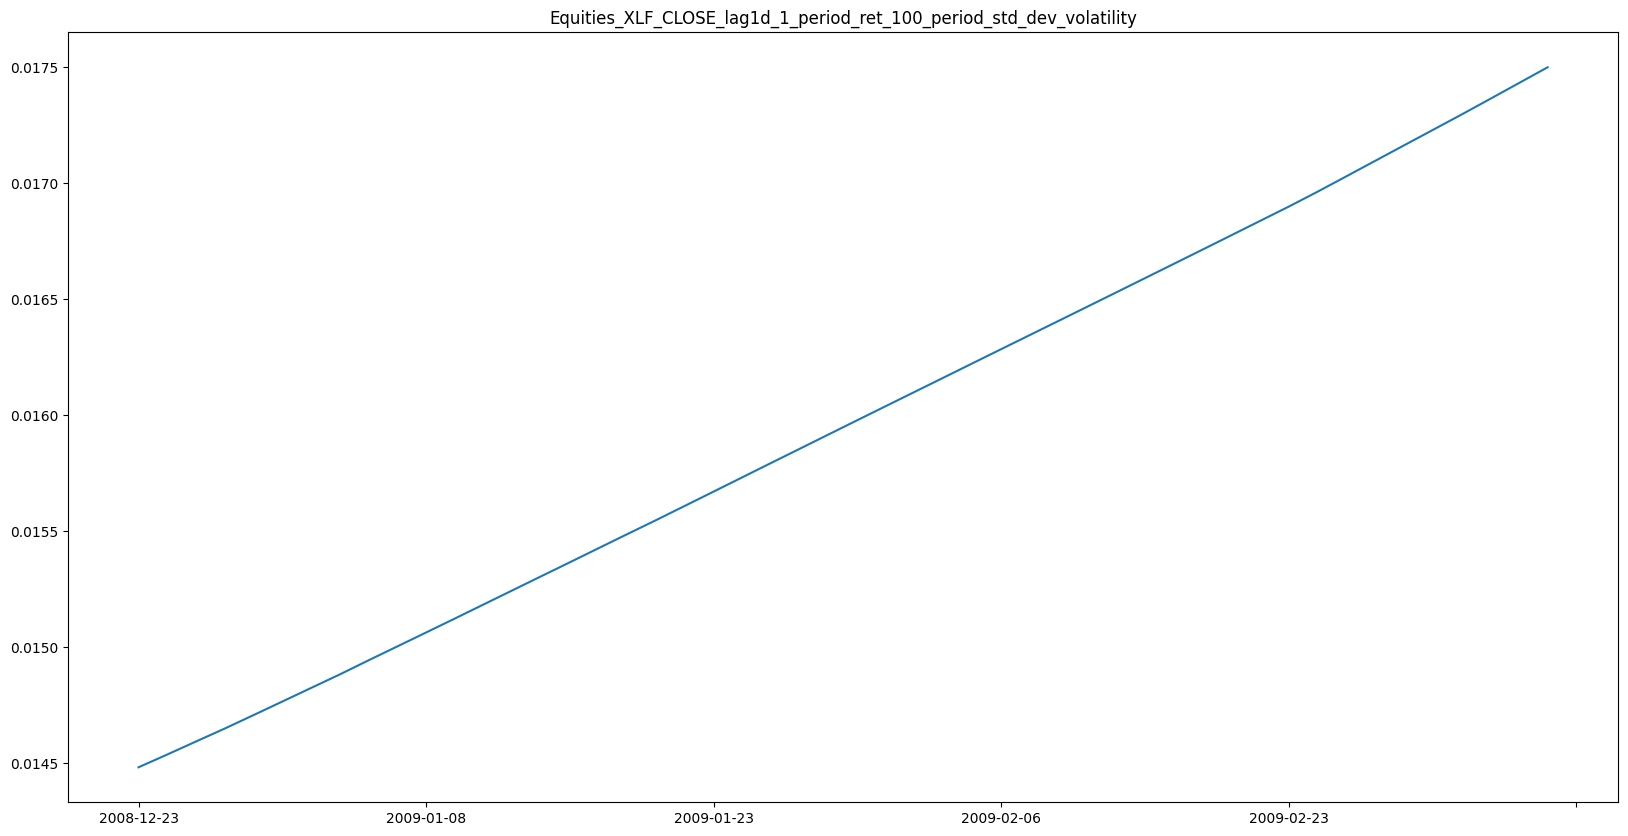

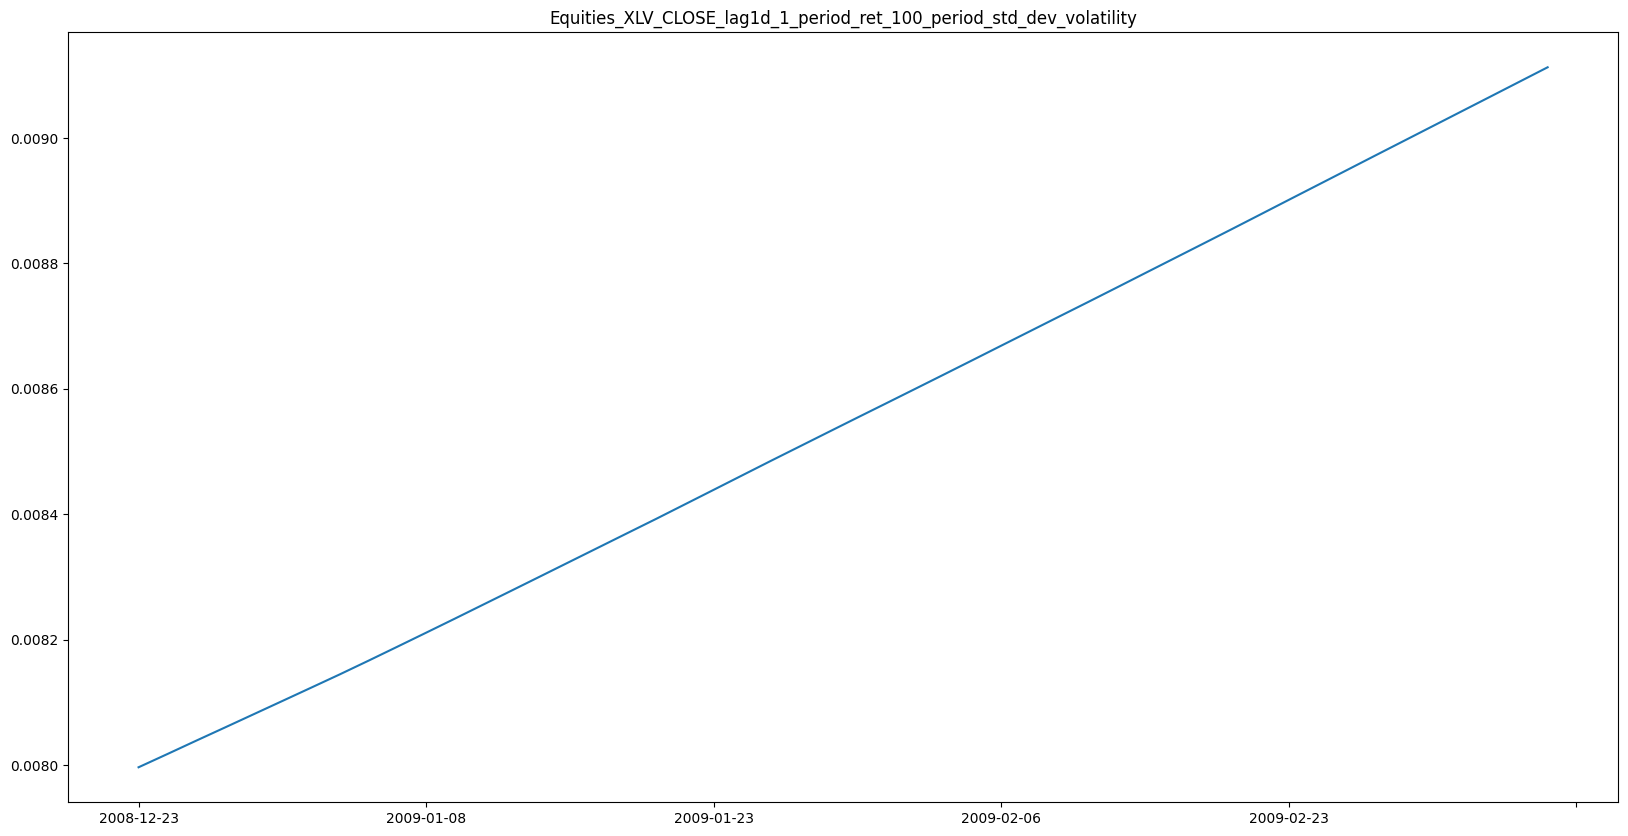

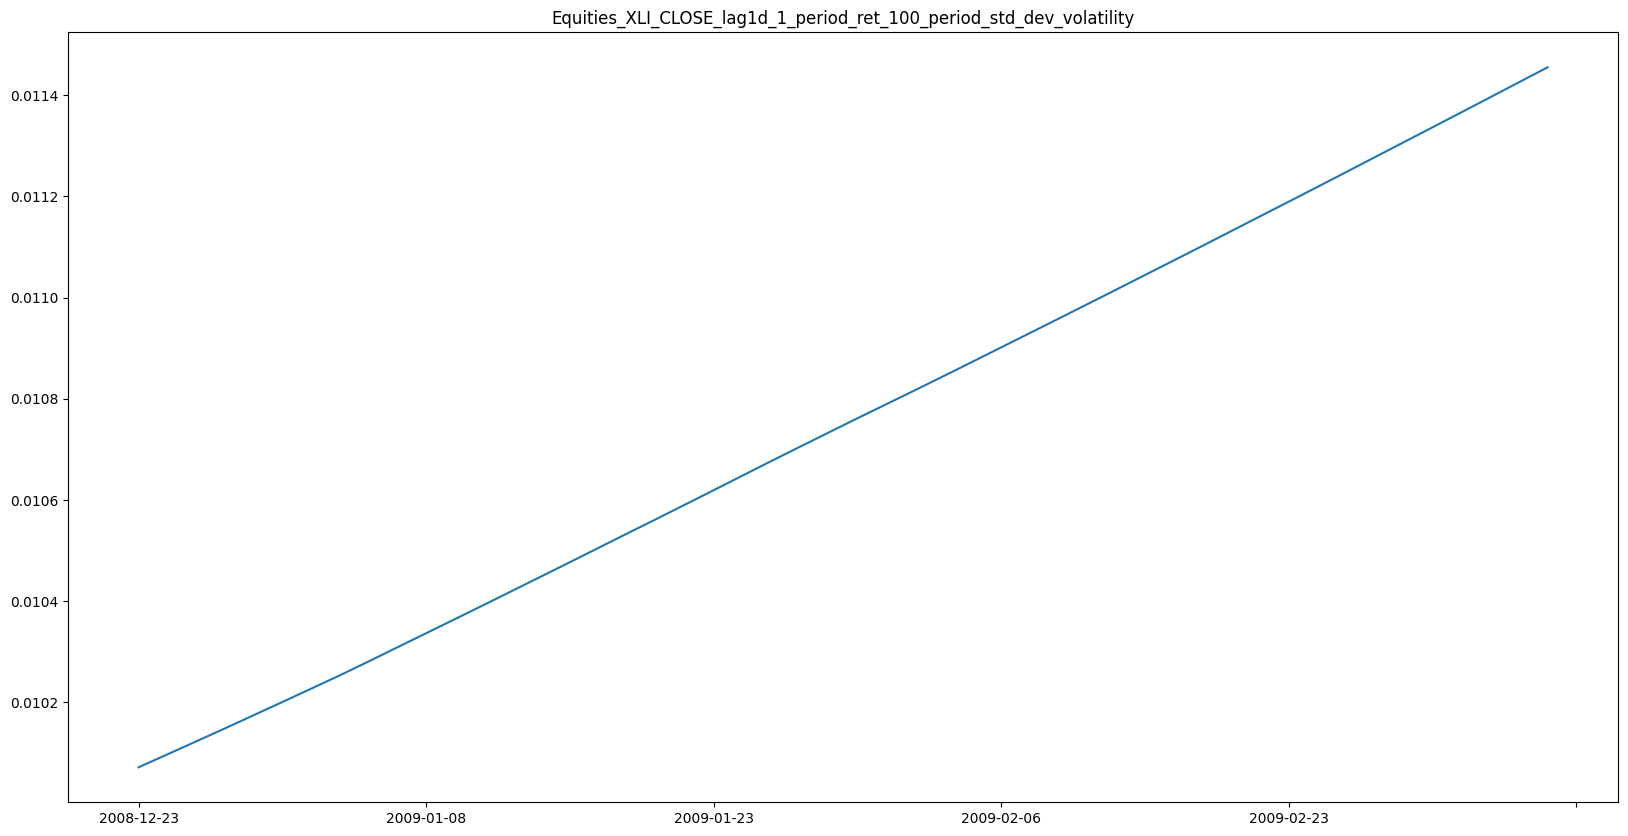

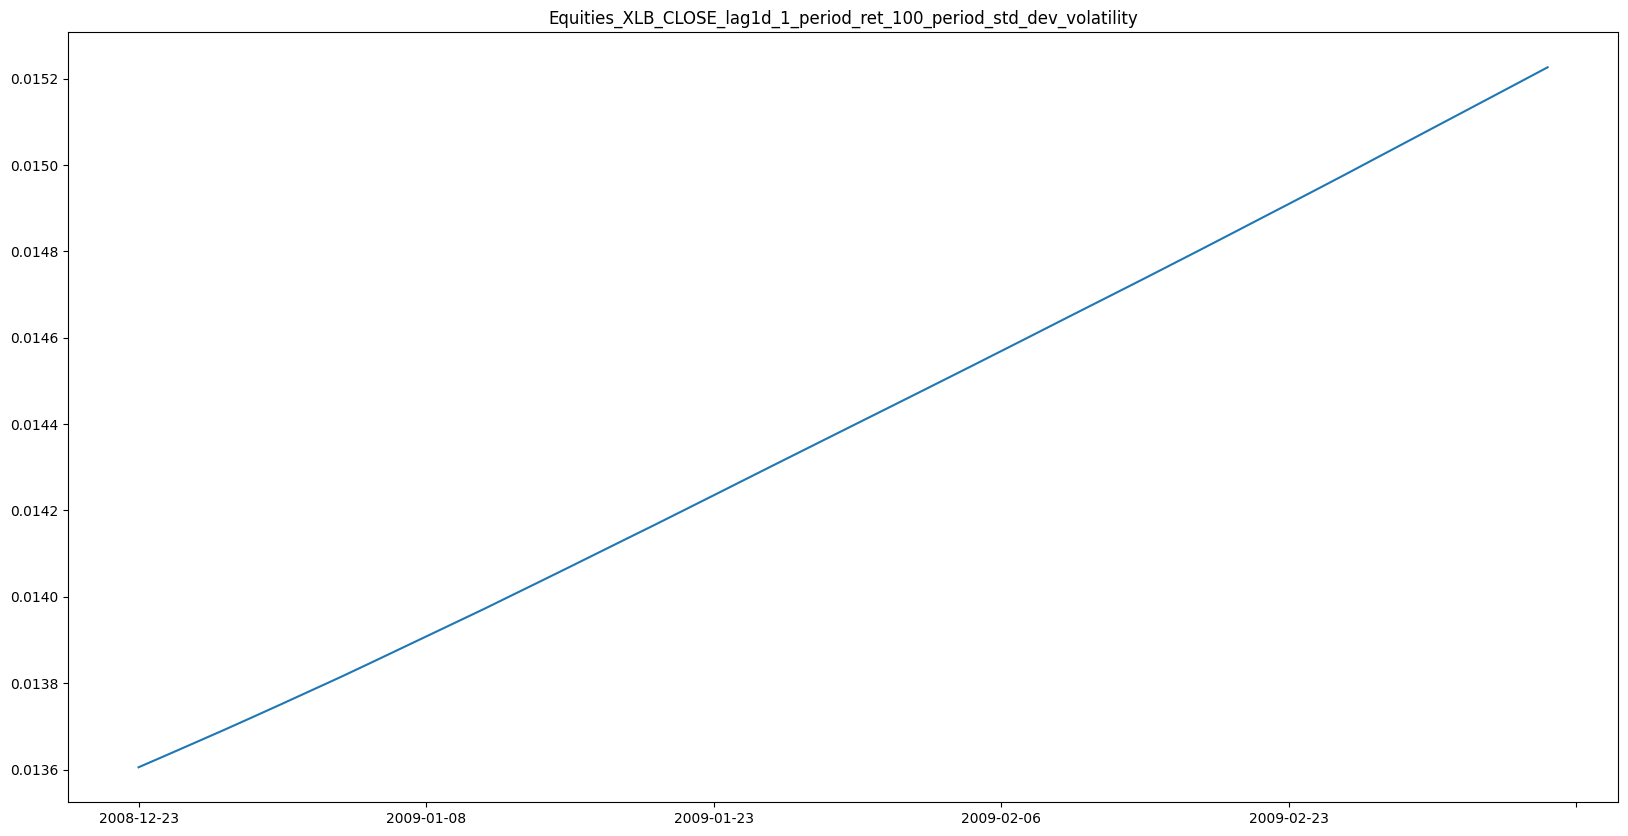

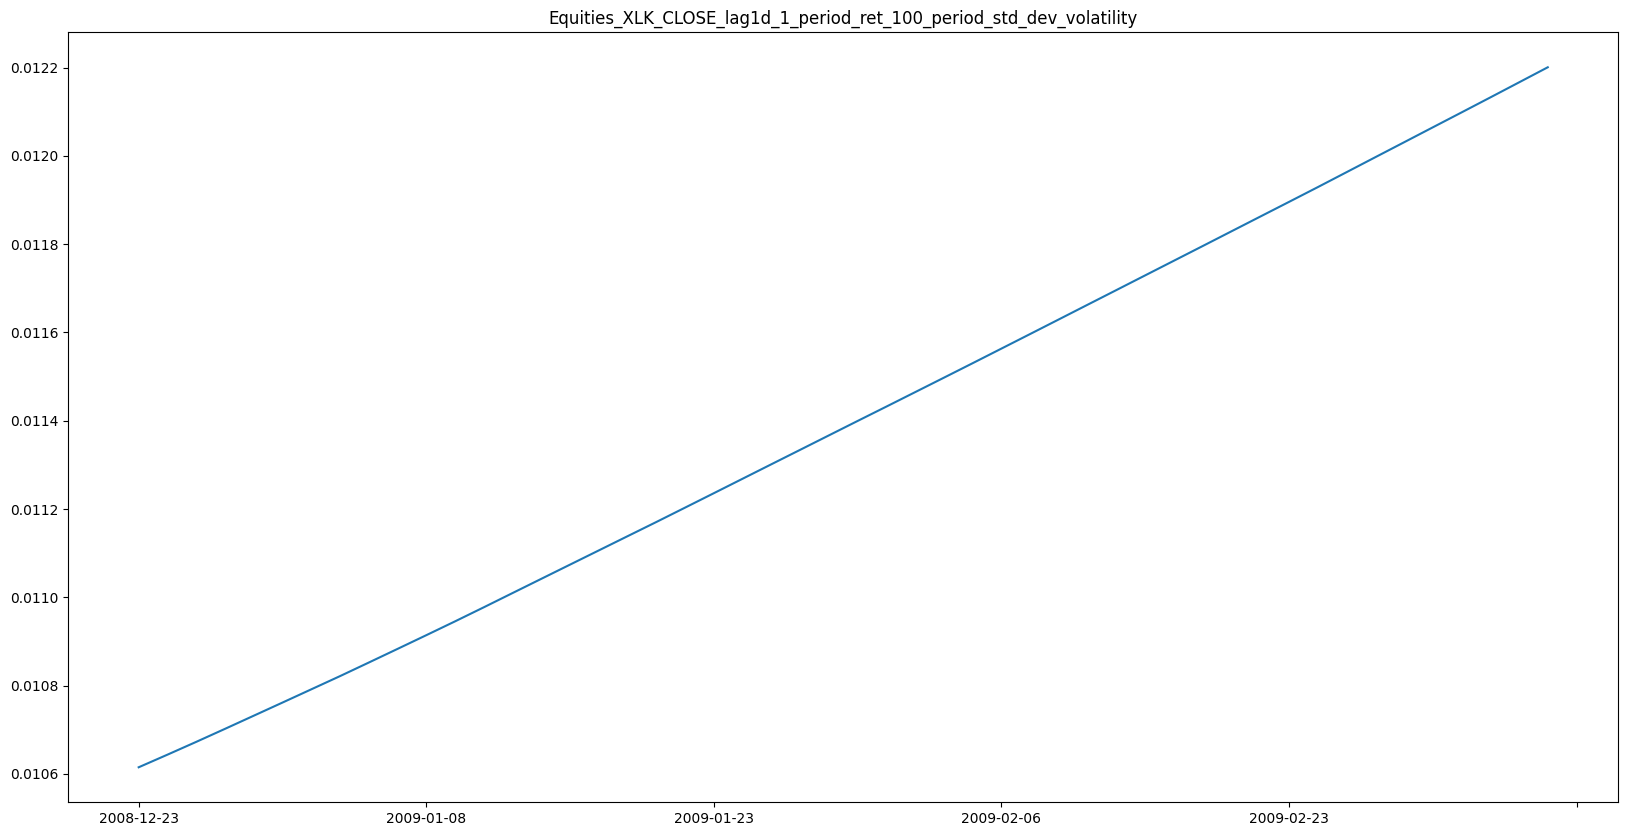

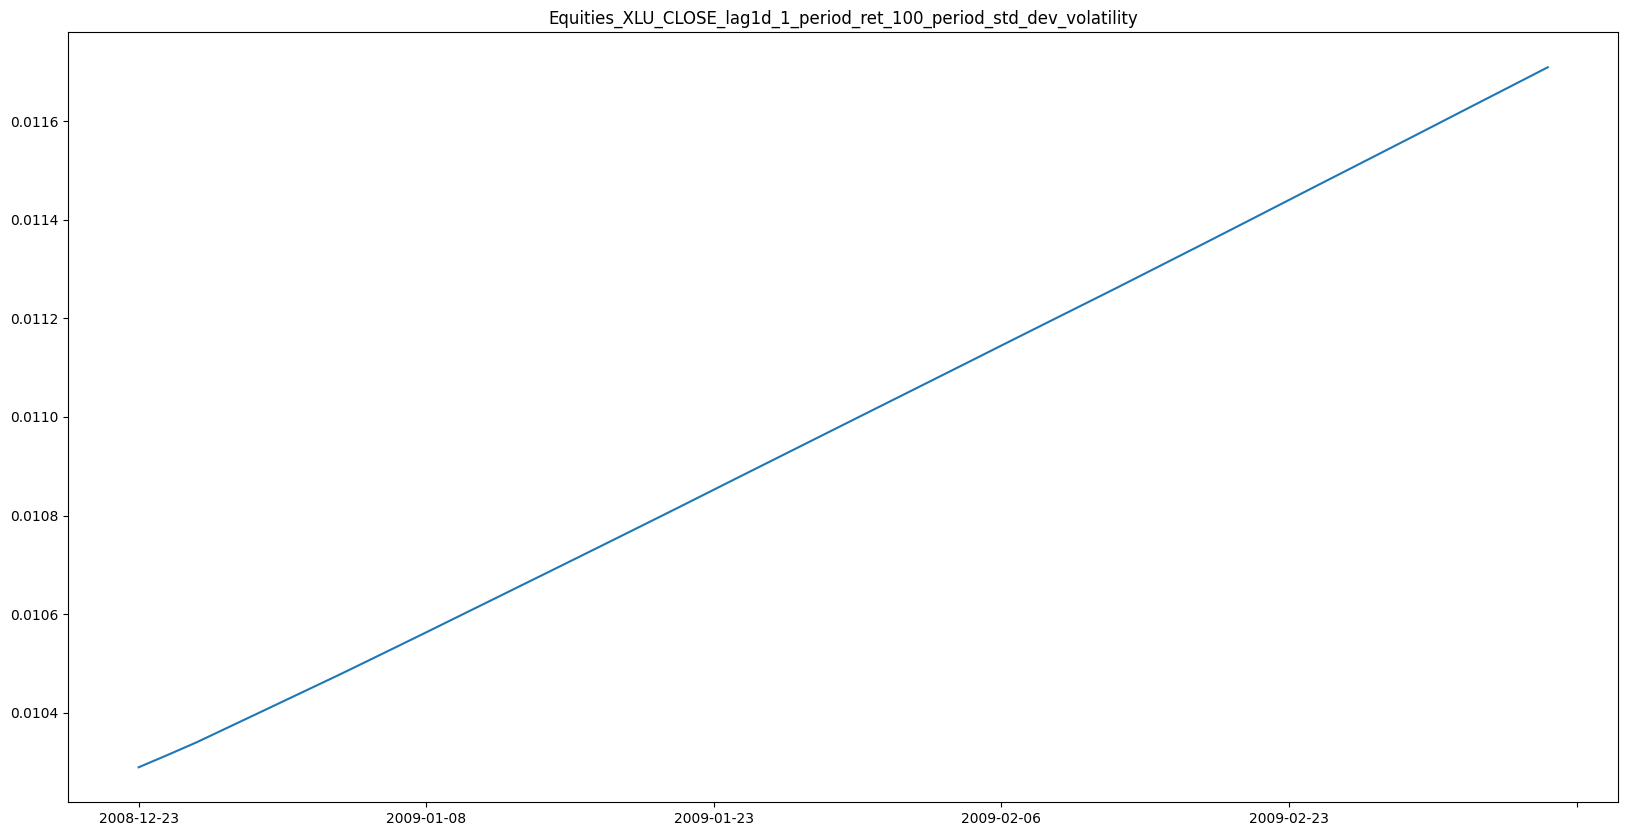

In [ ]:
for i in range(0, 29):
  df.iloc[i, :].plot(kind = 'line', figsize = (20,10))
  plt.title(df.index[i])
  plt.show()

In [ ]:
t1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 881 entries, 2005-08-03 to 2009-02-02
Data columns (total 29 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Macro_CPIAUCSL                                                       881 non-null    float64
 1   Macro_GDP                                                            881 non-null    float64
 2   Macro_INDPRO                                                         881 non-null    float64
 3   Macro_MICH                                                           881 non-null    float64
 4   Macro_PCEPI                                                          881 non-null    float64
 5   Macro_UMCSENT                                                        881 non-null    float64
 6   Macro_UNRATE                                                         881 non-null    fl

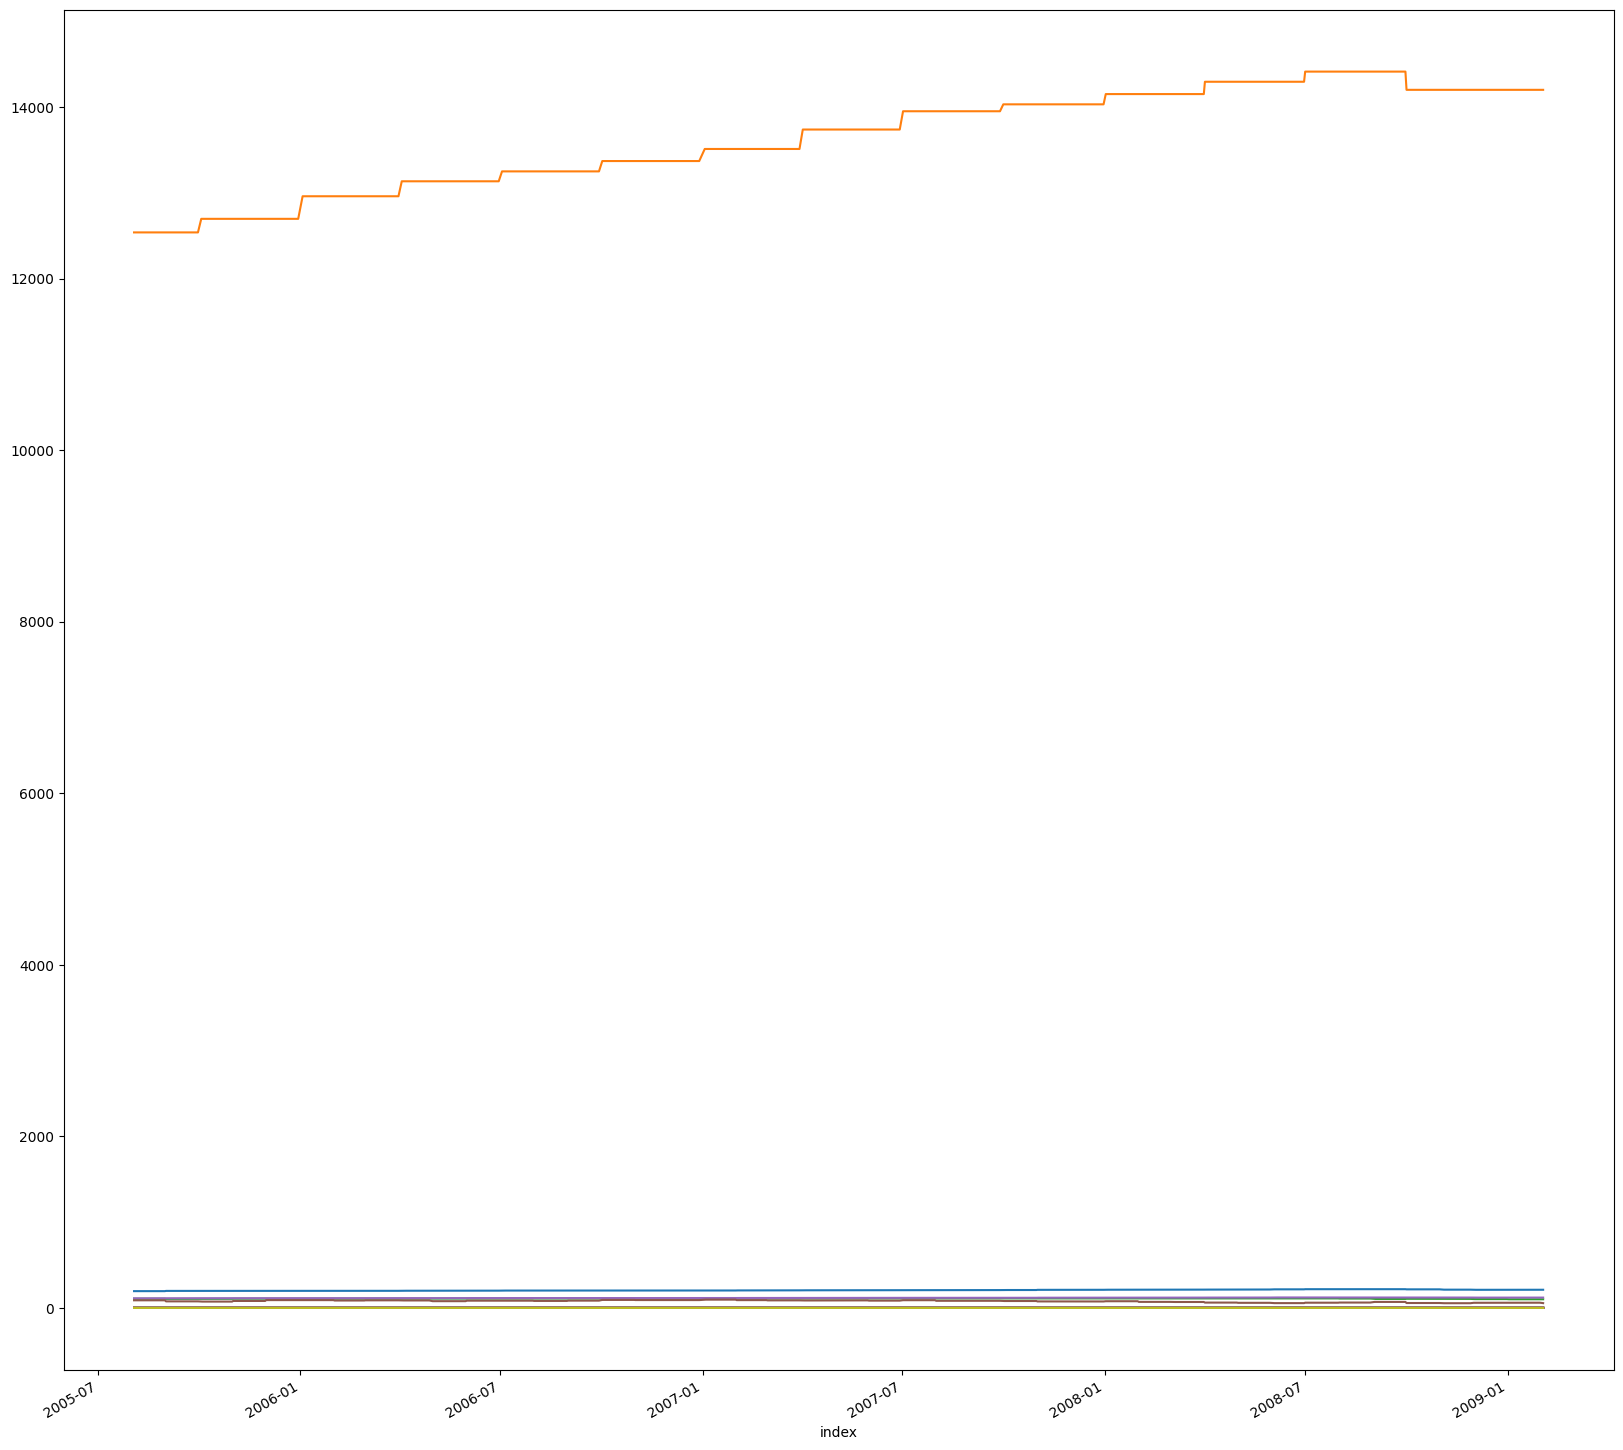

In [ ]:
i = 0
for i in range(0, 29):
  t1.iloc[:, i].plot(kind = 'line', figsize = (20, 20))

In [ ]:
t1.isna().sum()

Macro_CPIAUCSL                                                         0
Macro_GDP                                                              0
Macro_INDPRO                                                           0
Macro_MICH                                                             0
Macro_PCEPI                                                            0
Macro_UMCSENT                                                          0
Macro_UNRATE                                                           0
Equities_LQD_CLOSE_lag1d_1_period_ret                                  0
Equities_SPY_CLOSE_lag1d_1_period_ret                                  0
Equities_XLY_CLOSE_lag1d_1_period_ret                                  0
Equities_XLP_CLOSE_lag1d_1_period_ret                                  0
Equities_XLE_CLOSE_lag1d_1_period_ret                                  0
Equities_XLF_CLOSE_lag1d_1_period_ret                                  0
Equities_XLV_CLOSE_lag1d_1_period_ret              

In [ ]:
t1.mean()

Macro_CPIAUCSL                                                           207.005785
Macro_GDP                                                              13630.494552
Macro_INDPRO                                                             109.601874
Macro_MICH                                                                 3.505789
Macro_PCEPI                                                              117.452686
Macro_UMCSENT                                                             78.815096
Macro_UNRATE                                                               5.075369
Equities_LQD_CLOSE_lag1d_1_period_ret                                     -0.000082
Equities_SPY_CLOSE_lag1d_1_period_ret                                     -0.000329
Equities_XLY_CLOSE_lag1d_1_period_ret                                     -0.000516
Equities_XLP_CLOSE_lag1d_1_period_ret                                     -0.000012
Equities_XLE_CLOSE_lag1d_1_period_ret                                      0

In [ ]:
t1.describe()

Macro_CPIAUCSL     Macro_GDP  Macro_INDPRO  Macro_MICH  Macro_PCEPI  \
count      881.000000    881.000000    881.000000  881.000000   881.000000   
mean       207.005785  13630.494552    109.601874    3.505789   117.452686   
std          6.488180    575.784567      2.493016    0.758932     3.292287   
min        196.000000  12538.200000    101.337000    1.700000   111.965000   
25%        201.700000  13134.100000    108.764600    3.000000   114.796000   
50%        206.682000  13737.500000    110.142800    3.300000   117.289000   
75%        212.495000  14150.800000    111.355100    3.900000   120.585000   
max        218.675000  14412.800000    112.570400    5.200000   123.106000   

       Macro_UMCSENT  Macro_UNRATE  Equities_LQD_CLOSE_lag1d_1_period_ret  \
count     881.000000    881.000000                             881.000000   
mean       78.815096      5.075369                              -0.000082   
std        11.893795      0.778252                               0.007614   
min        55.300000      4.400000                              -0.091111   
25%        70.300000      4.600000                              -0.002458   
50%        82.000000      4.800000                               0.000000   
75%        88.400000      5.000000                               0.002311   
max        96.900000      7.600000                               0.097677   

       Equities_SPY_CLOSE_lag1d_1_period_ret  \
count                             881.000000   
mean                               -0.000329   
std                                 0.015874   
min                                -0.098448   
25%                                -0.005393   
50%                                 0.000420   
75%                                 0.005417   
max                                 0.145198   

       Equities_XLY_CLOSE_lag1d_1_period_ret  ...  \
count                             881.000000  ...   
mean                               -0.000516  ...   
std                                 0.017219  ...   
min                                -0.116249  ...   
25%                                -0.007228  ...   
50%                                -0.000284  ...   
75%                                 0.006843  ...   
max                                 0.097752  ...   

       Equities_SPY_CLOSE_lag1d_1_period_ret_100_period_std_dev_volatility  \
count                                         881.000000                     
mean                                            0.011007                     
std                                             0.008246                     
min                                             0.004454                     
25%                                             0.006525                     
50%                                             0.007701                     
75%                                             0.012552                     
max                                             0.039713                     

       Equities_XLY_CLOSE_lag1d_1_period_ret_100_period_std_dev_volatility  \
count                                         881.000000                     
mean                                            0.012689                     
std                                             0.008055                     
min                                             0.005625                     
25%                                             0.007643                     
50%                                             0.008962                     
75%                                             0.016037                     
max                                             0.039241                     

       Equities_XLP_CLOSE_lag1d_1_period_ret_100_period_std_dev_volatility  \
count                                         881.000000                     
mean                                            0.007894                     
std                                             0.004083   

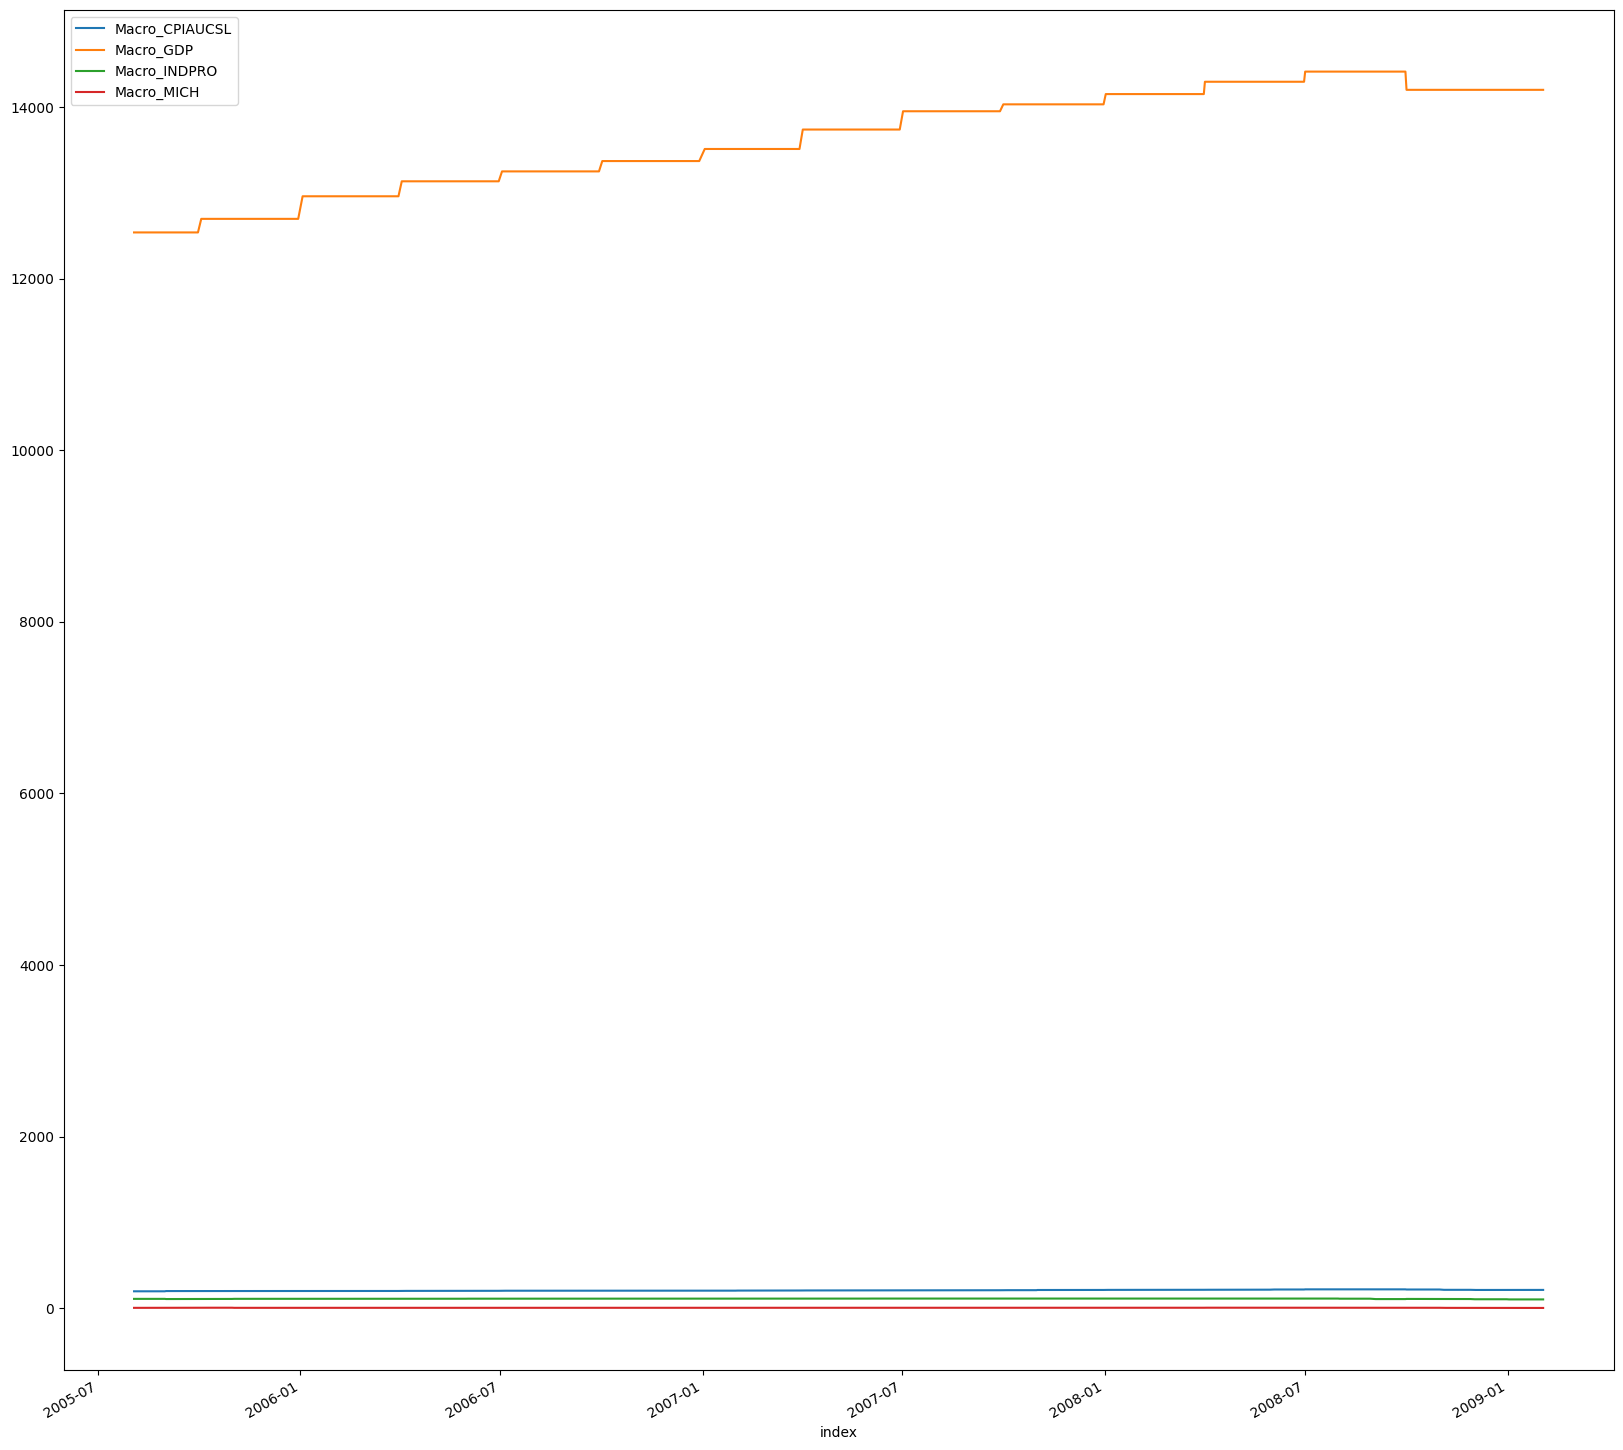

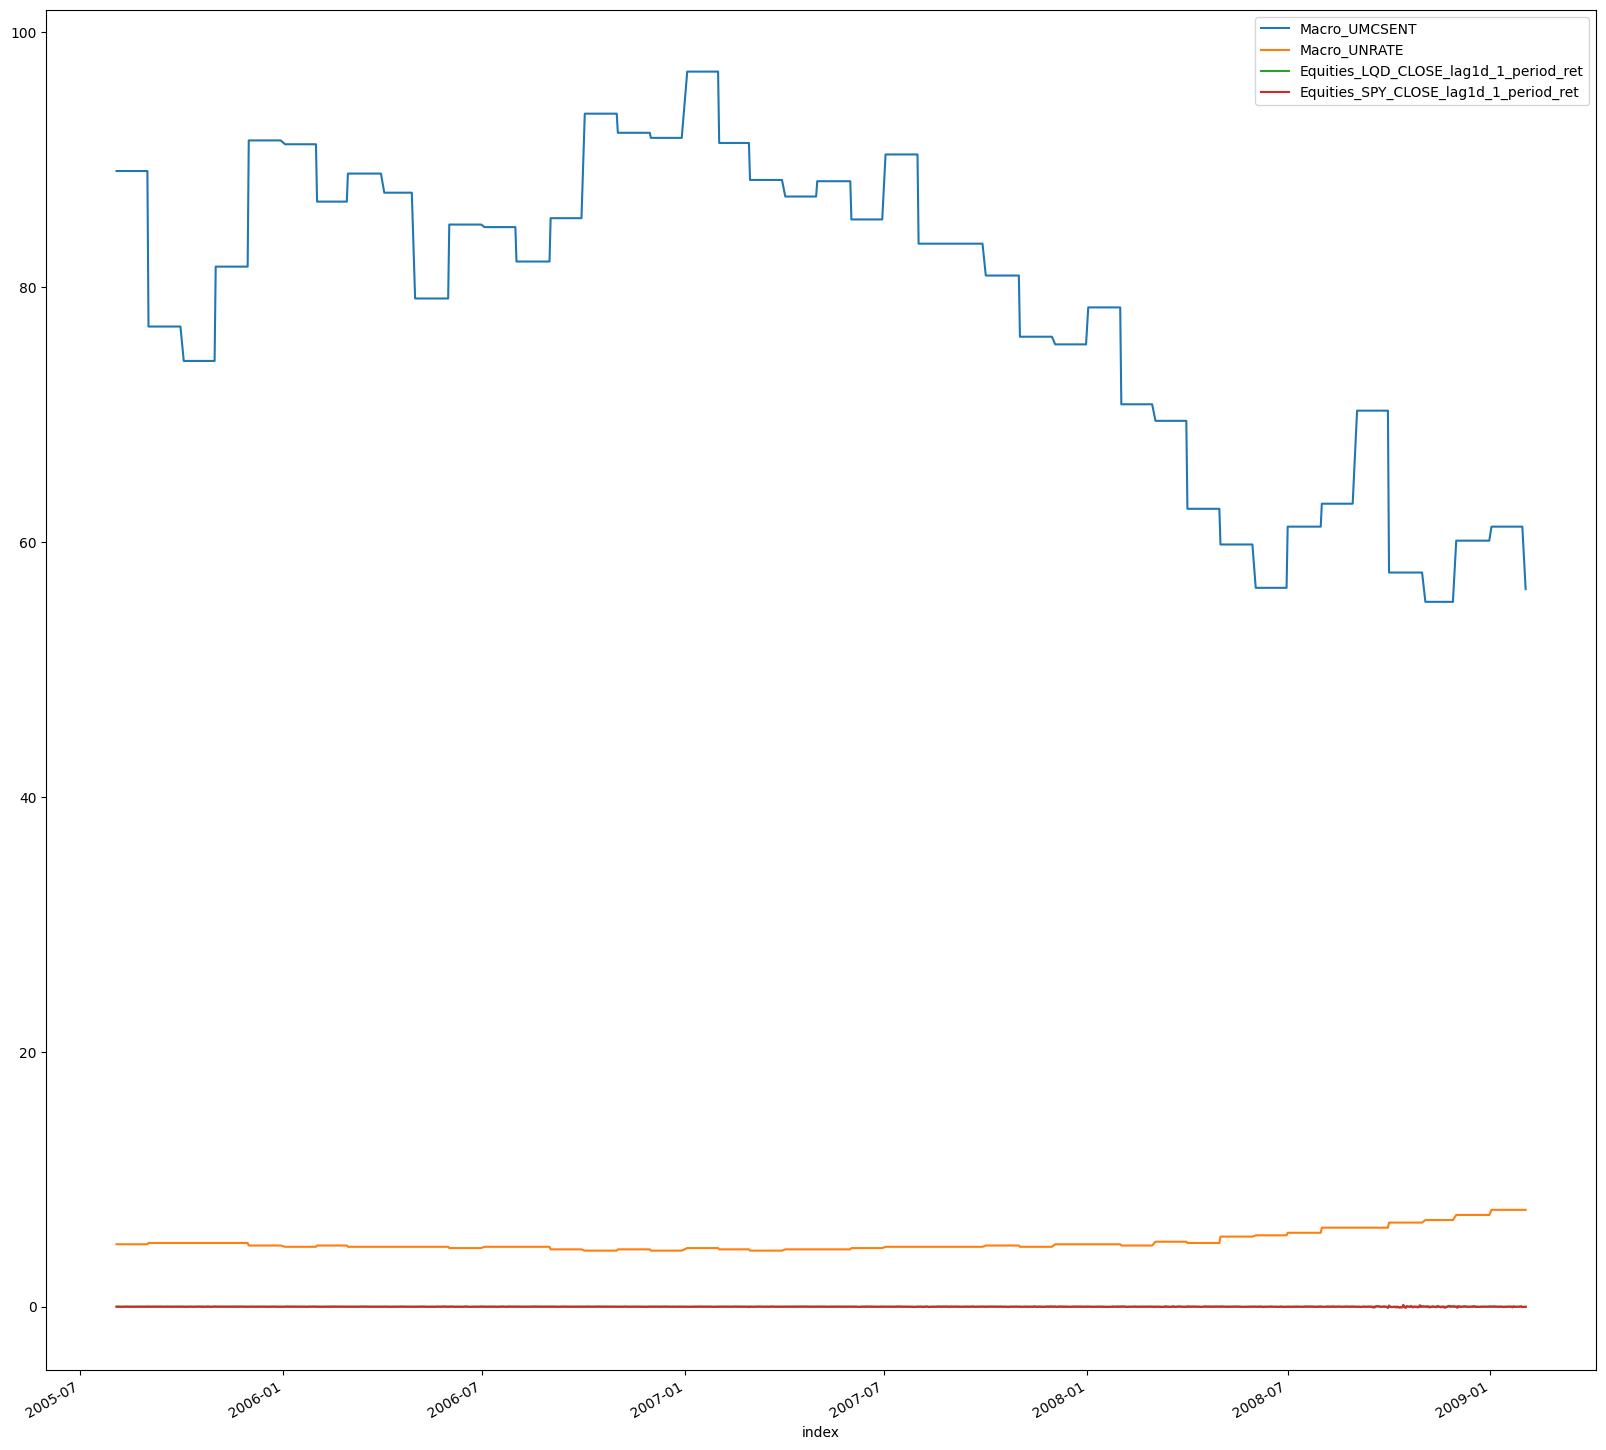

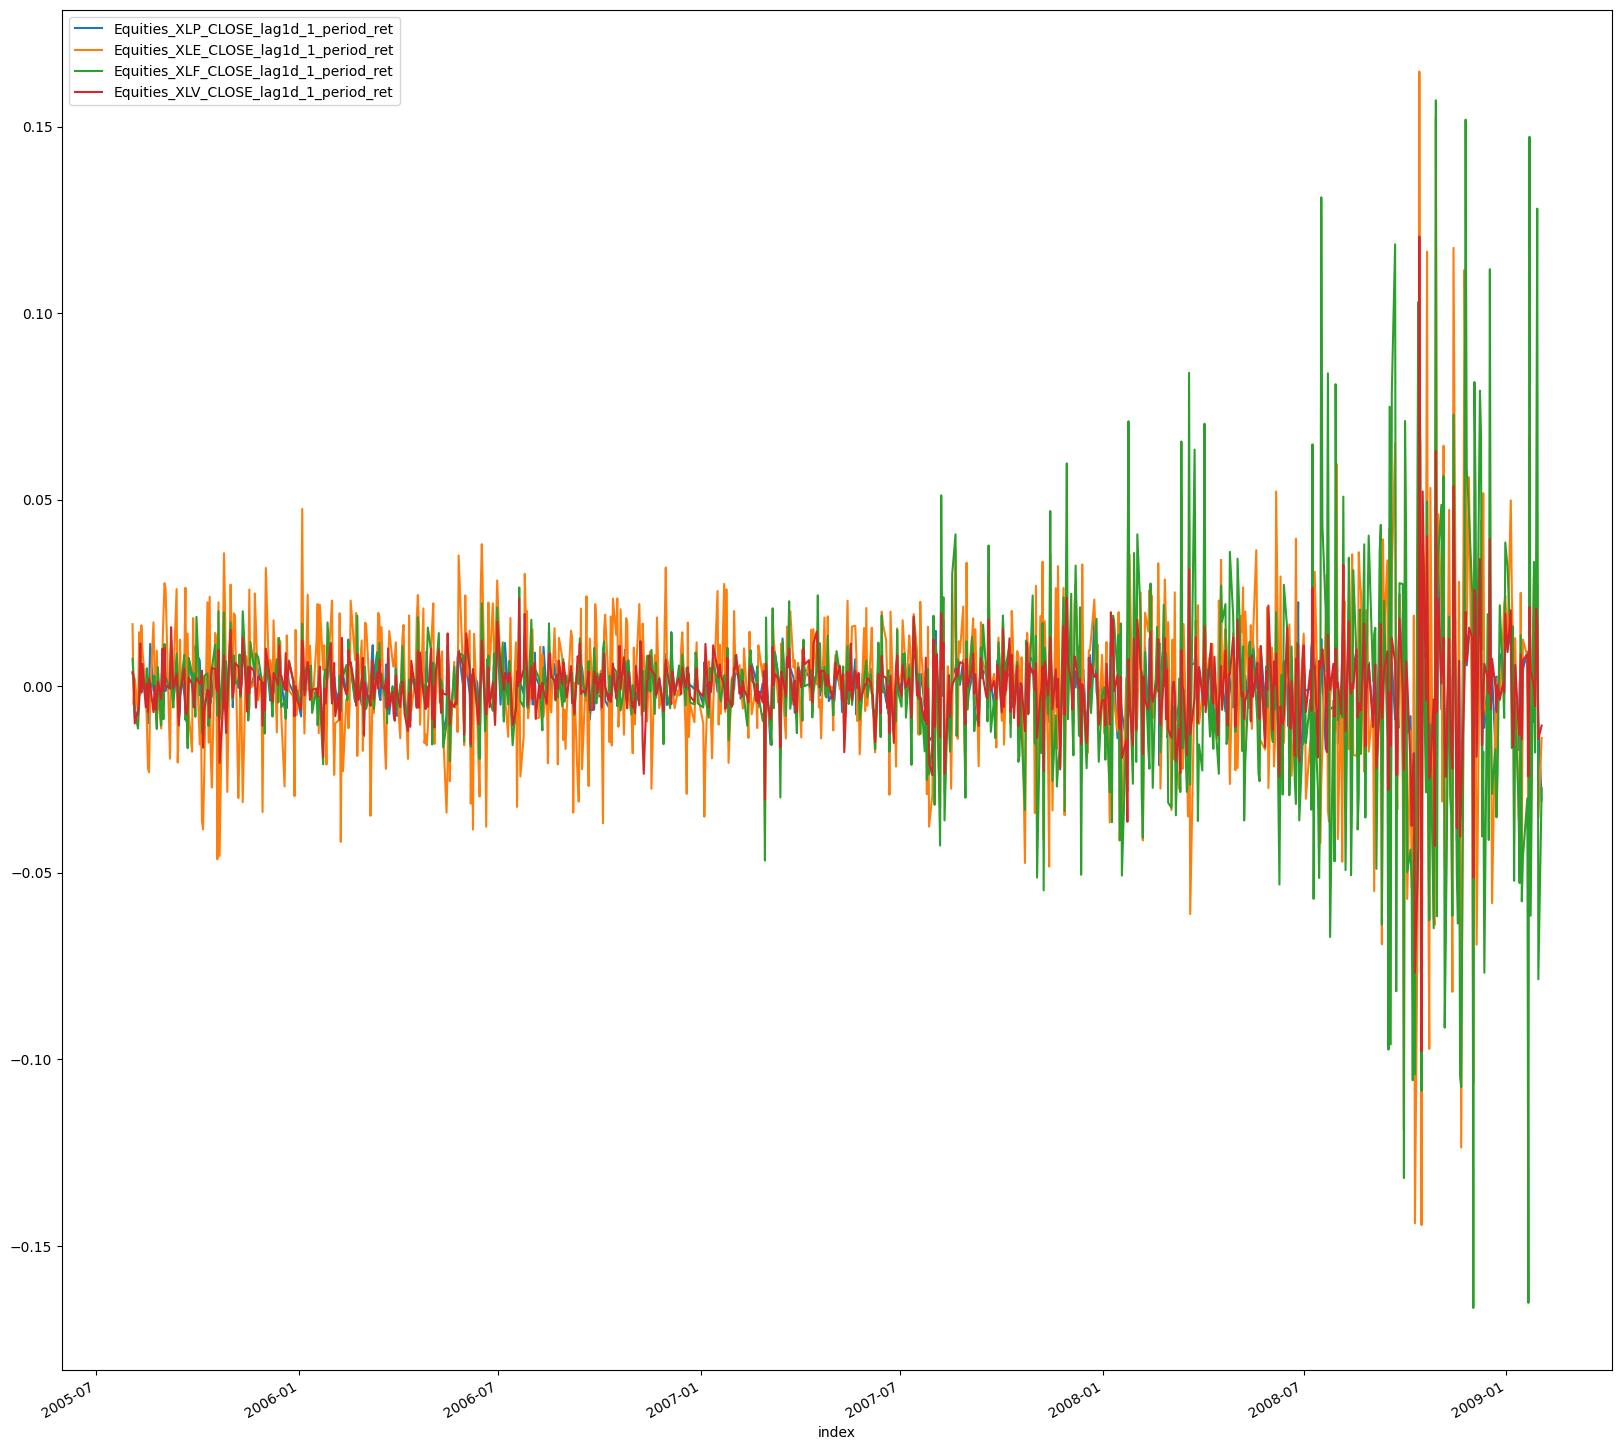

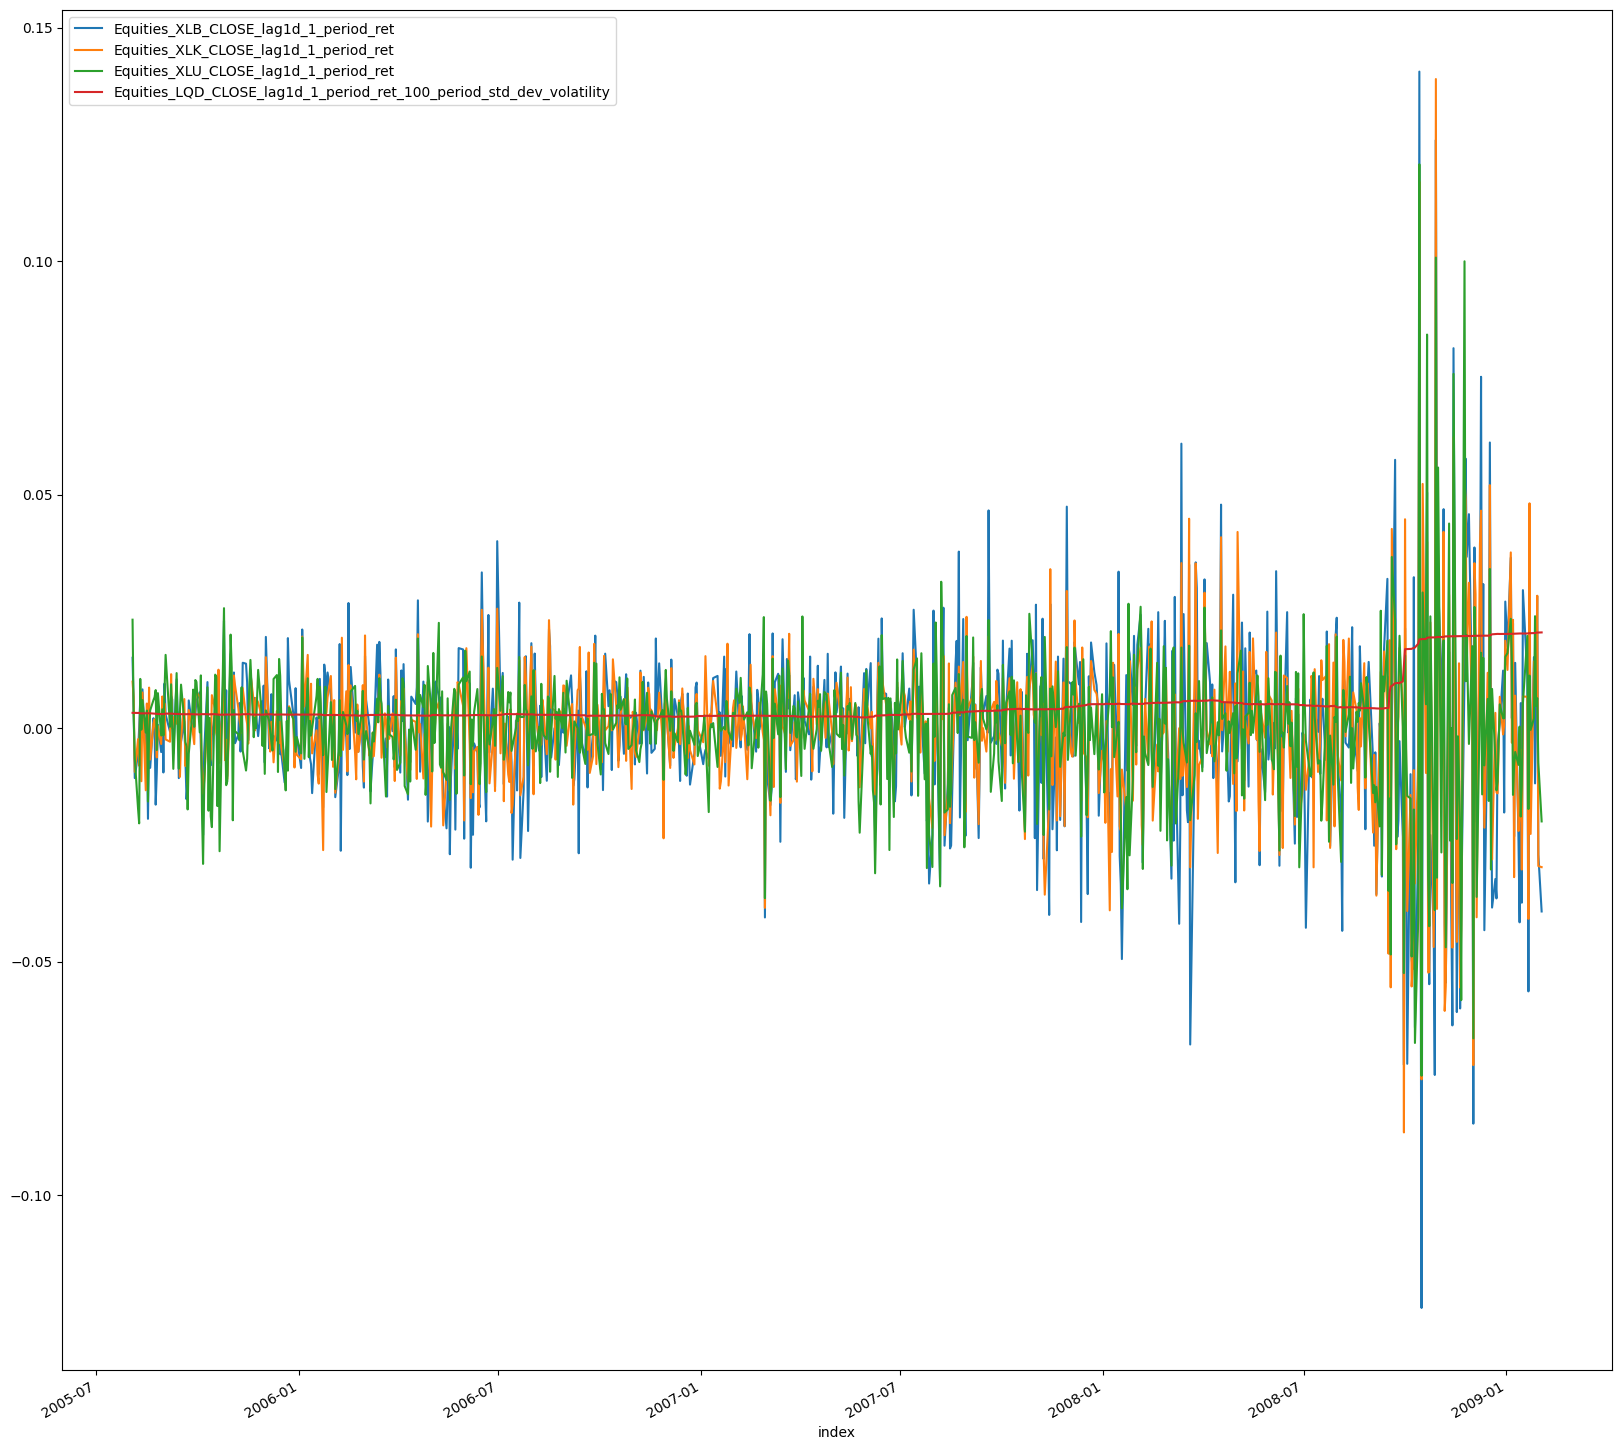

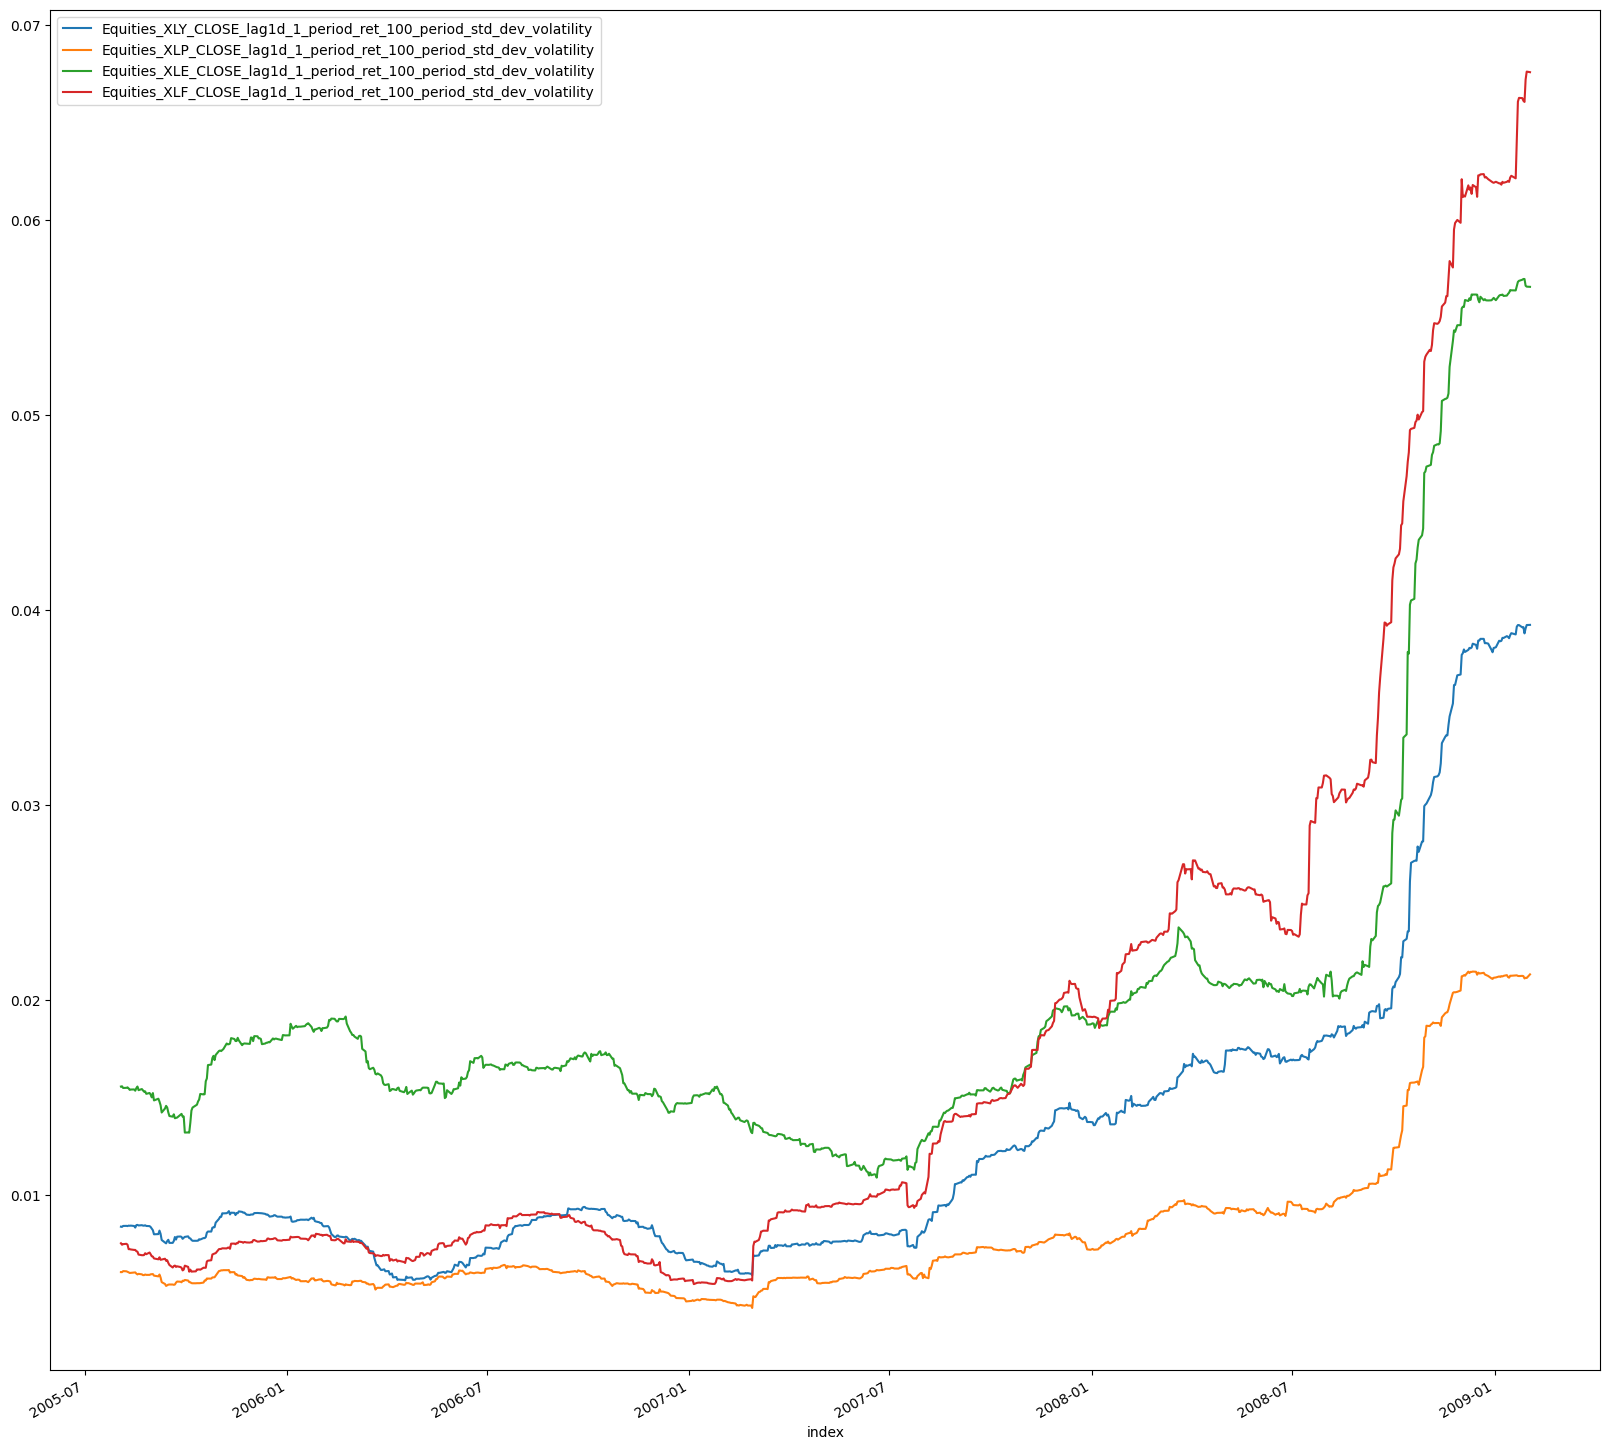

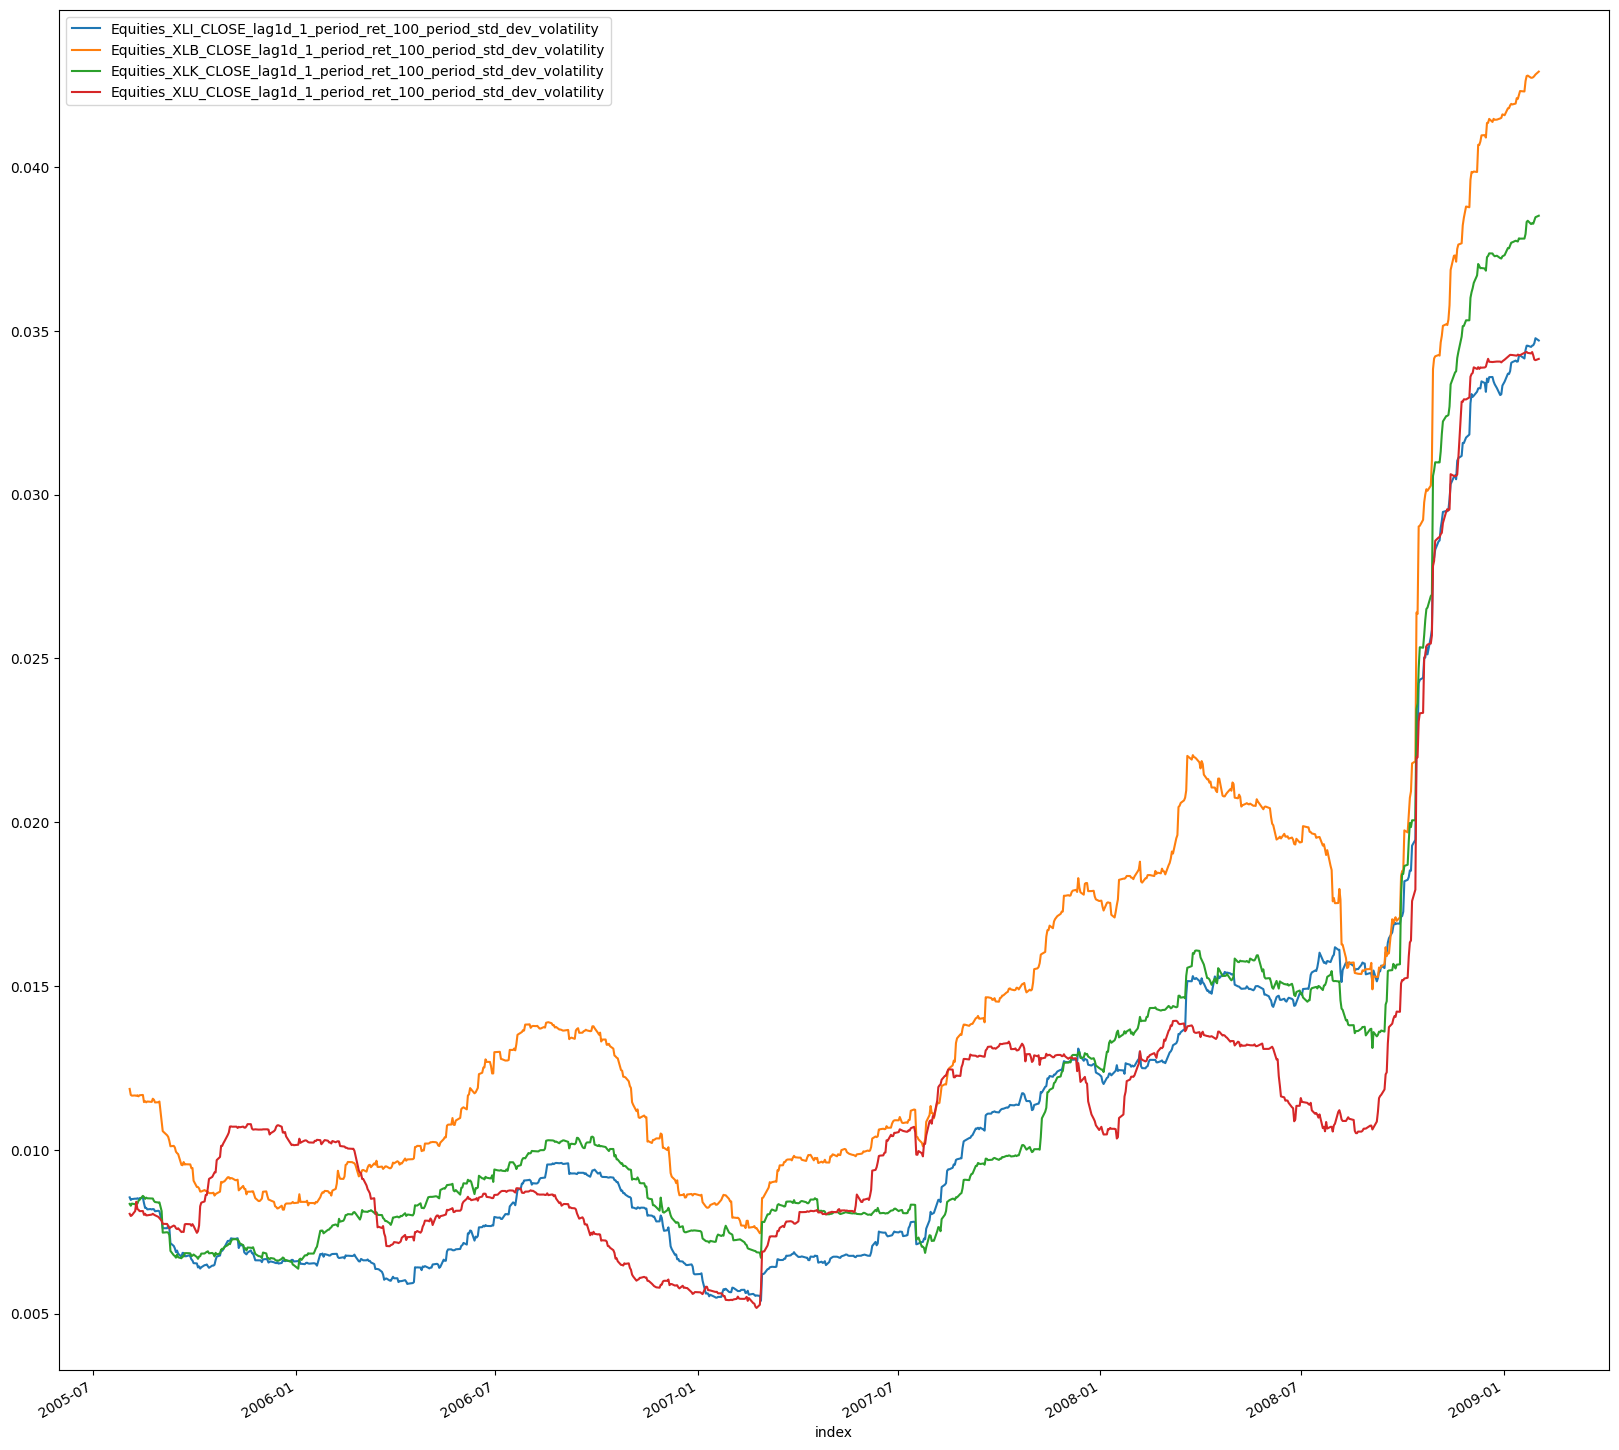

In [ ]:
for i in range(0, 30, 5):
  t1.iloc[:, i:i+4].plot(kind = 'line', figsize = (20, 20))

In [ ]:
t1 = t1.reindex(t1.mean().sort_values().index, axis = 1)

In [ ]:
t1

Equities_XLF_CLOSE_lag1d_1_period_ret  \
index                                               
2005-08-03                               0.007349   
2005-08-04                               0.001327   
2005-08-05                              -0.006955   
2005-08-08                              -0.011341   
2005-08-09                              -0.004051   
...                                           ...   
2009-01-27                              -0.017795   
2009-01-28                               0.035104   
2009-01-29                               0.128015   
2009-01-30                              -0.078560   
2009-02-02                              -0.027378   

            Equities_XLY_CLOSE_lag1d_1_period_ret  \
index                                               
2005-08-03                               0.004906   
2005-08-04                              -0.004308   
2005-08-05                              -0.008653   
2005-08-08                              -0.007565   
2005-08-09                              -0.002345   
...                                           ...   
2009-01-27                               0.007114   
2009-01-28                              -0.003027   
2009-01-29                               0.042510   
2009-01-30                              -0.040291   
2009-02-02                              -0.024785   

            Equities_SPY_CLOSE_lag1d_1_period_ret  \
index                                               
2005-08-03                               0.005985   
2005-08-04                               0.002653   
2005-08-05                              -0.008018   
2005-08-08                              -0.006790   
2005-08-09                              -0.001872   
...                                           ...   
2009-01-27                               0.006858   
2009-01-28                               0.010158   
2009-01-29                               0.033834   
2009-01-30                              -0.032498   
2009-02-02                              -0.020343   

            Equities_XLI_CLOSE_lag1d_1_period_ret  \
index                                               
2005-08-03                              -0.001312   
2005-08-04                              -0.001971   
2005-08-05                              -0.006583   
2005-08-08                              -0.005302   
2005-08-09                              -0.002332   
...                                           ...   
2009-01-27                               0.011634   
2009-01-28                               0.018208   
2009-01-29                               0.028706   
2009-01-30                              -0.036597   
2009-02-02                              -0.021368   

            Equities_XLK_CLOSE_lag1d_1_period_ret  \
index                                               
2005-08-03                               0.009972   
2005-08-04                               0.006582   
2005-08-05                              -0.009341   
2005-08-08                              -0.002357   
2005-08-09                              -0.008034   
...                                           ...   
2009-01-27                               0.012089   
2009-01-28                               0.005972   
2009-01-29                               0.028364   
2009-01-30                              -0.029506   
2009-02-02                              -0.029742   

            Equities_XLB_CLOSE_lag1d_1_period_ret  \
index                                               
2005-08-03                               0.015088   
2005-08-04                               0.004148   
2005-08-05                              -0.010671   
2005-08-08                              -0.005219   
2005-08-09                               0.000000   
...                                           ...   
2009-01-27                              -0.011813   
2009-01-28                               0.007356   
2009-01-29                      

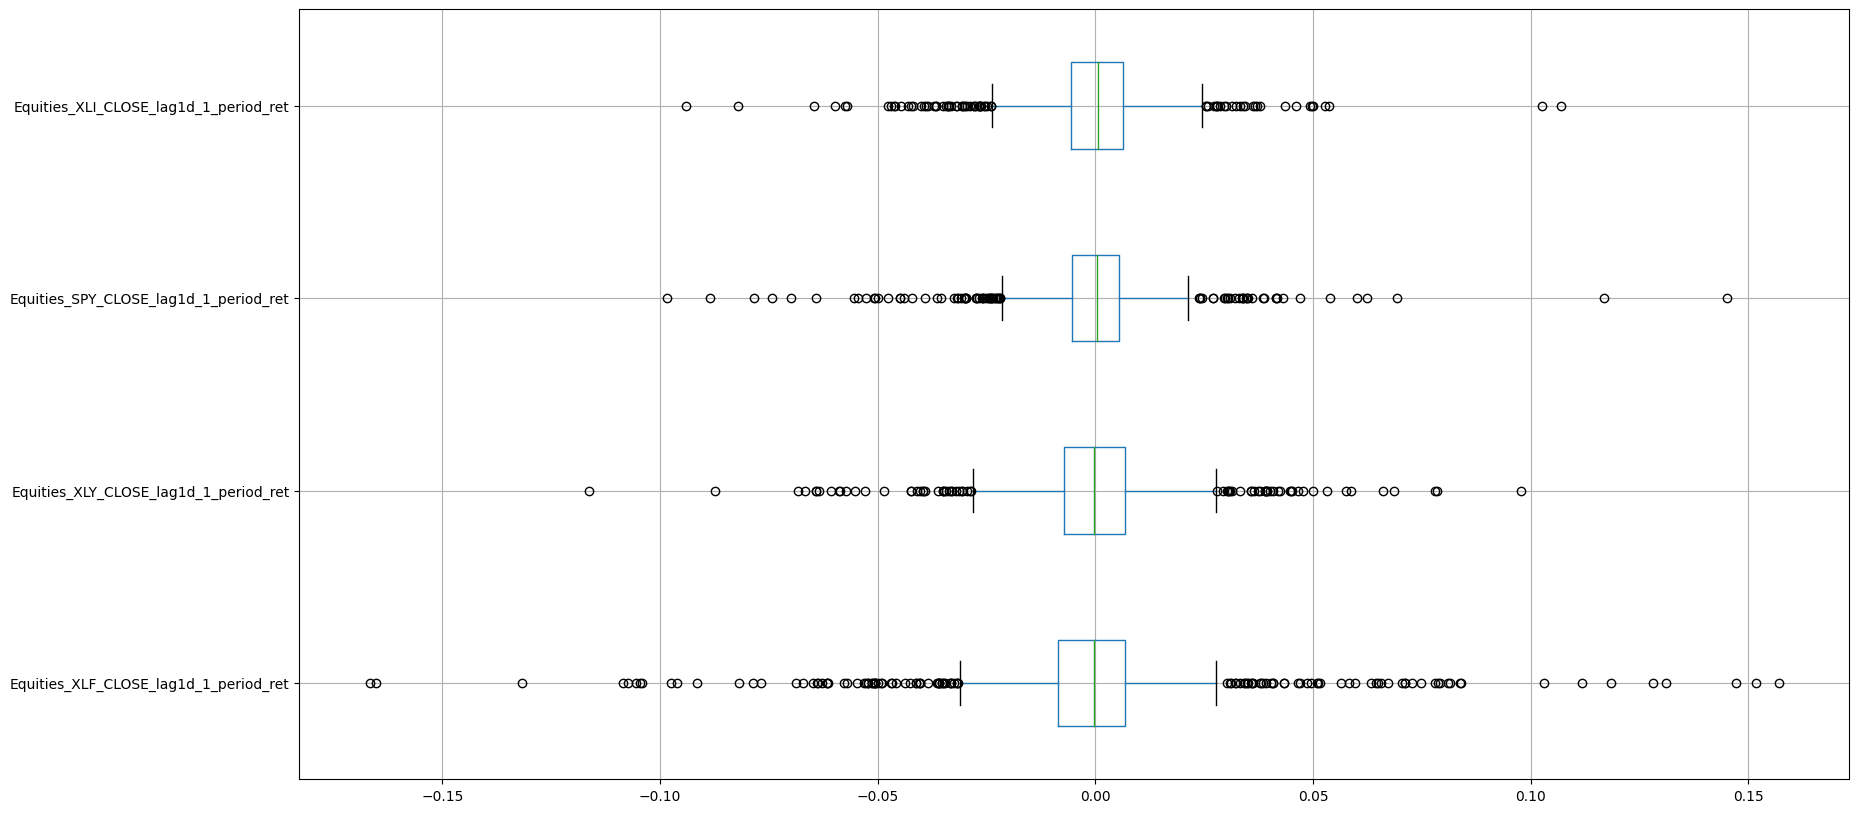

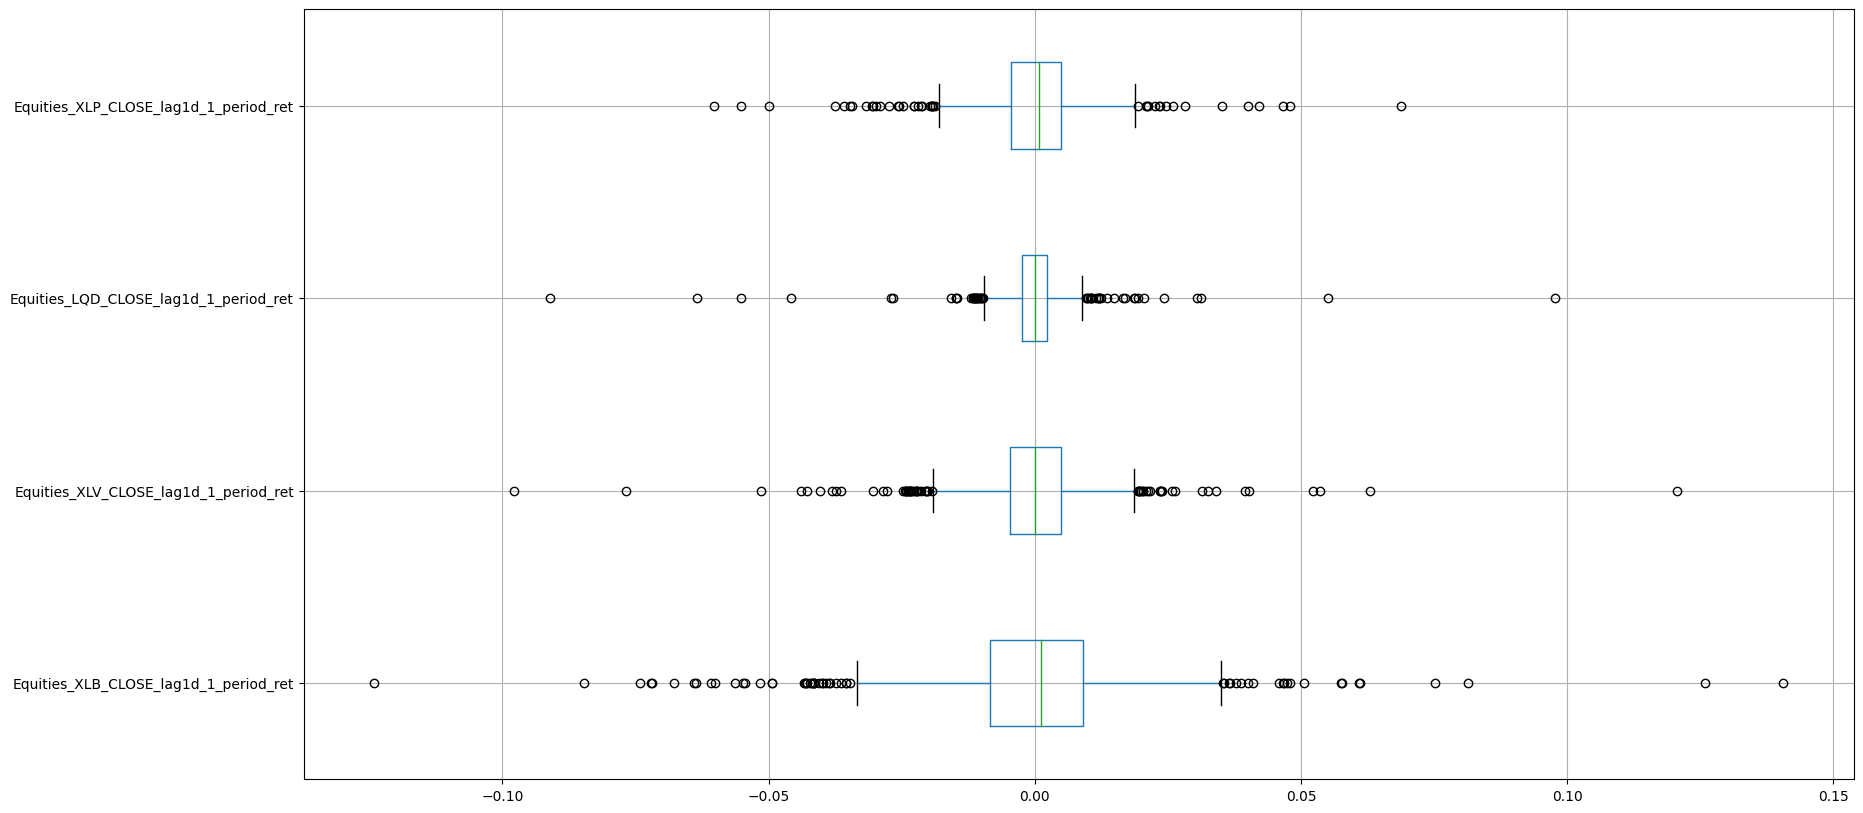

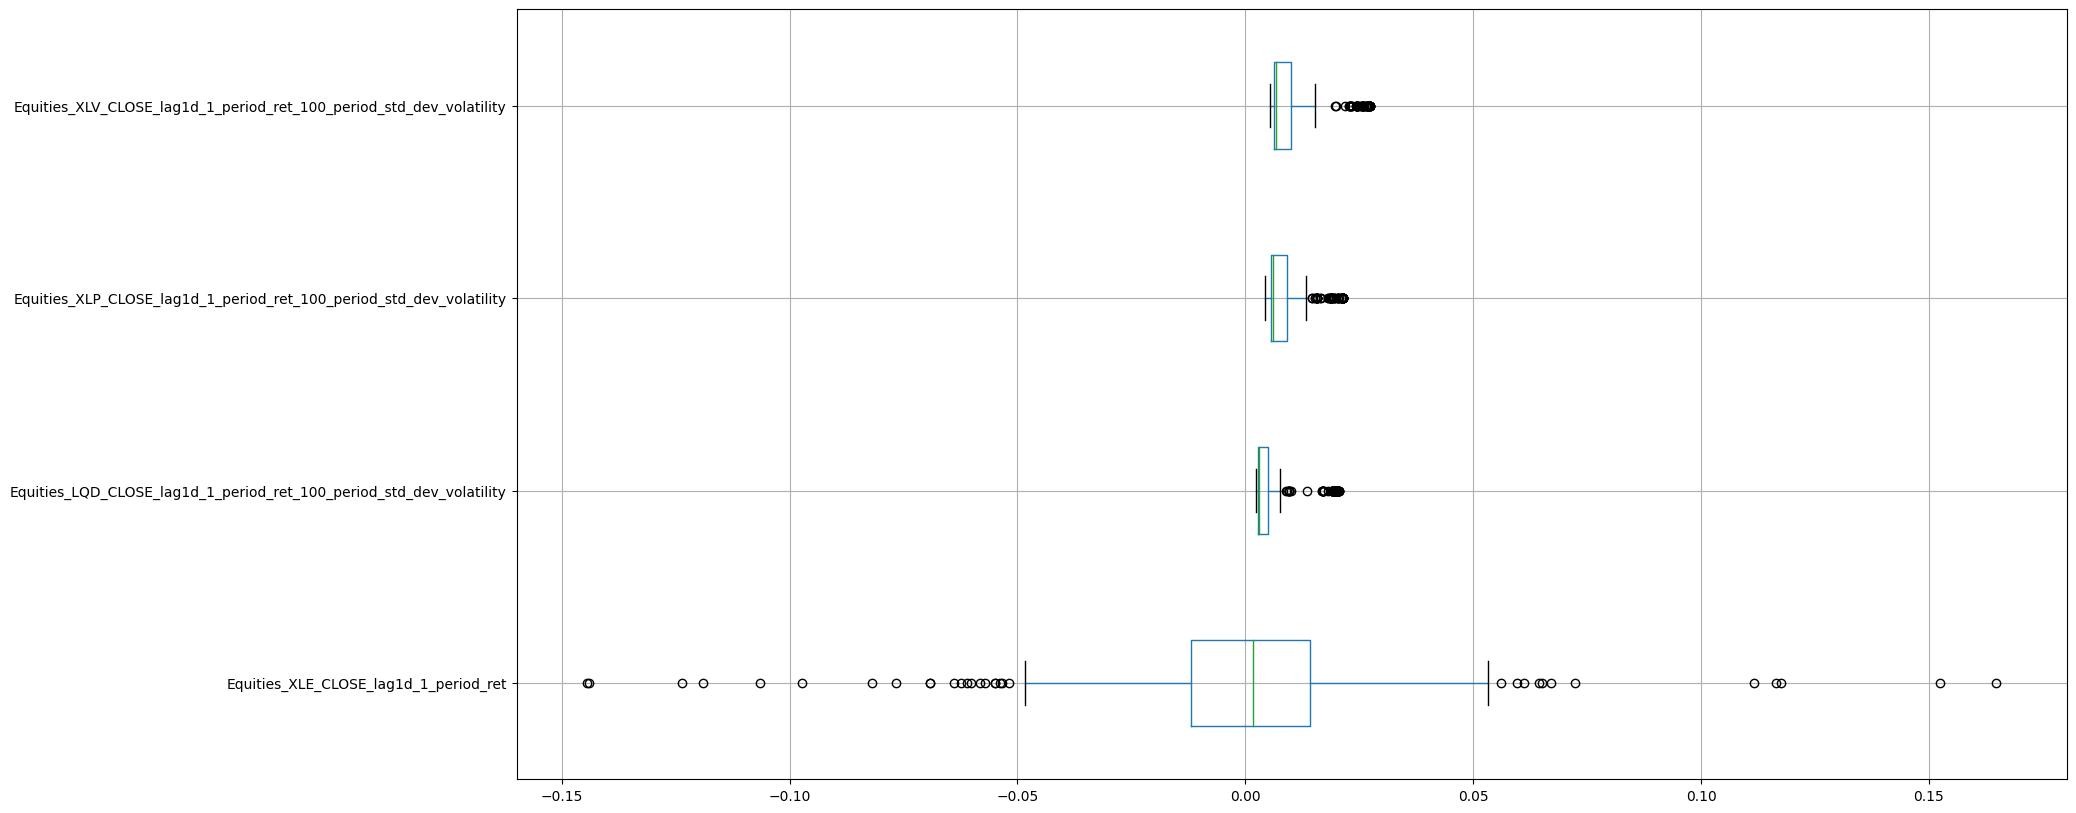

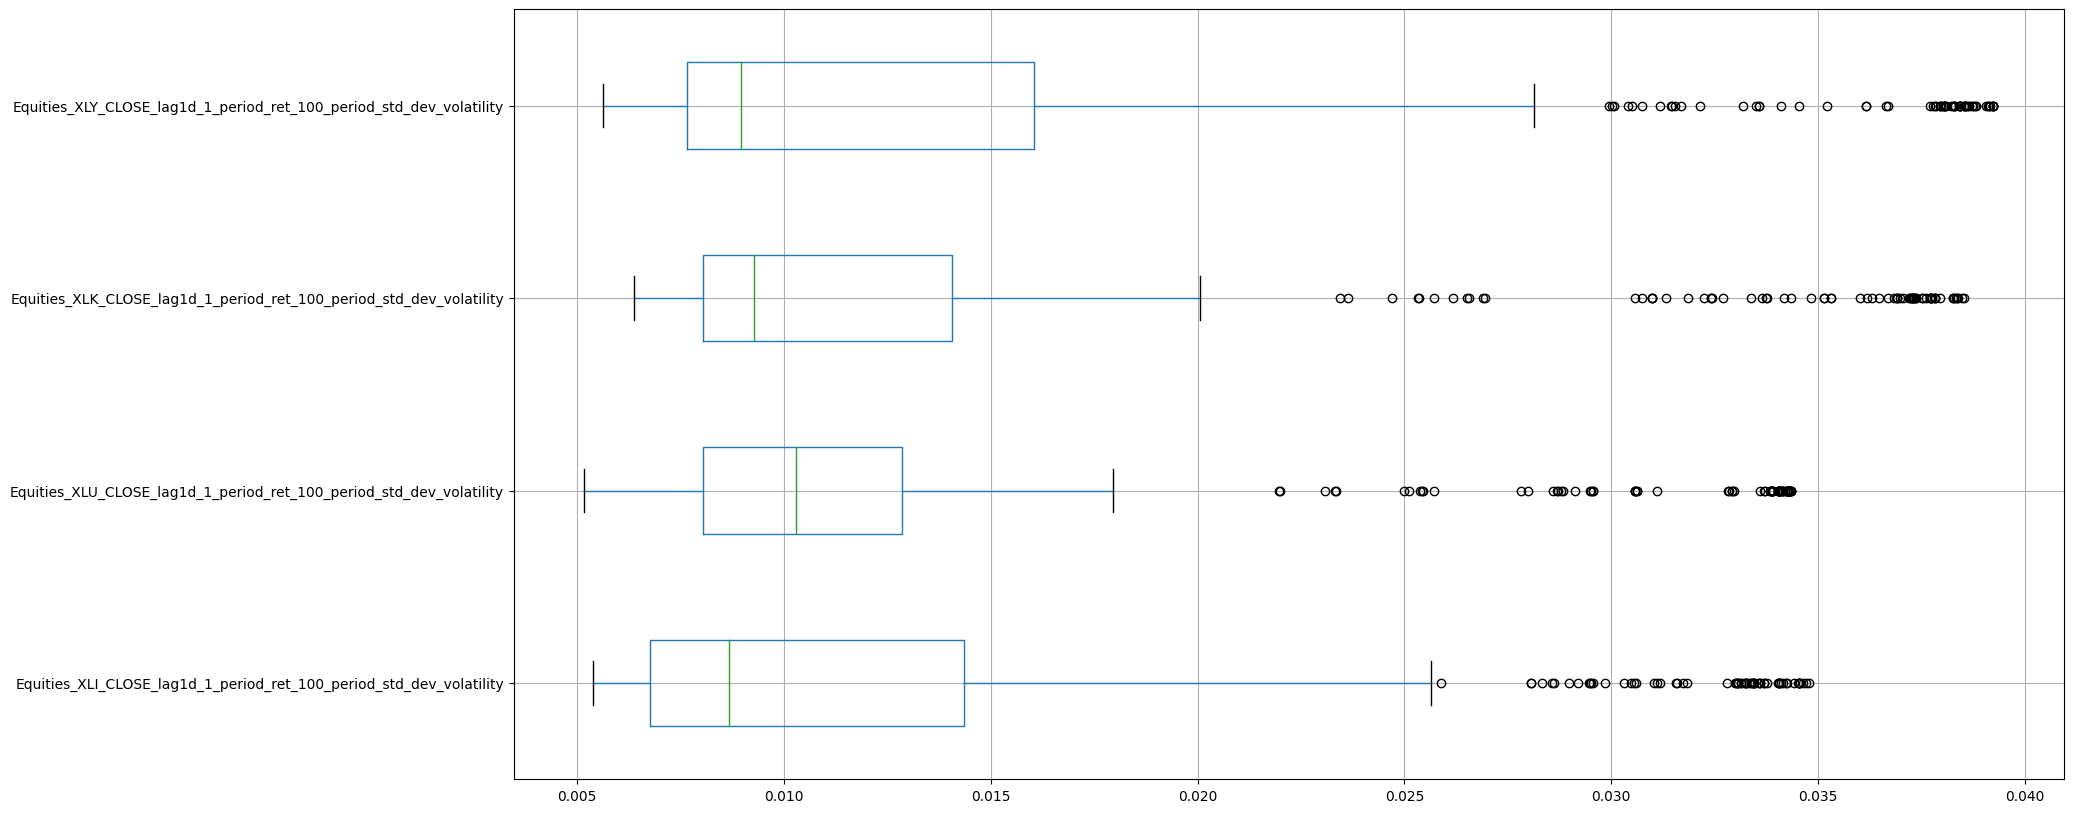

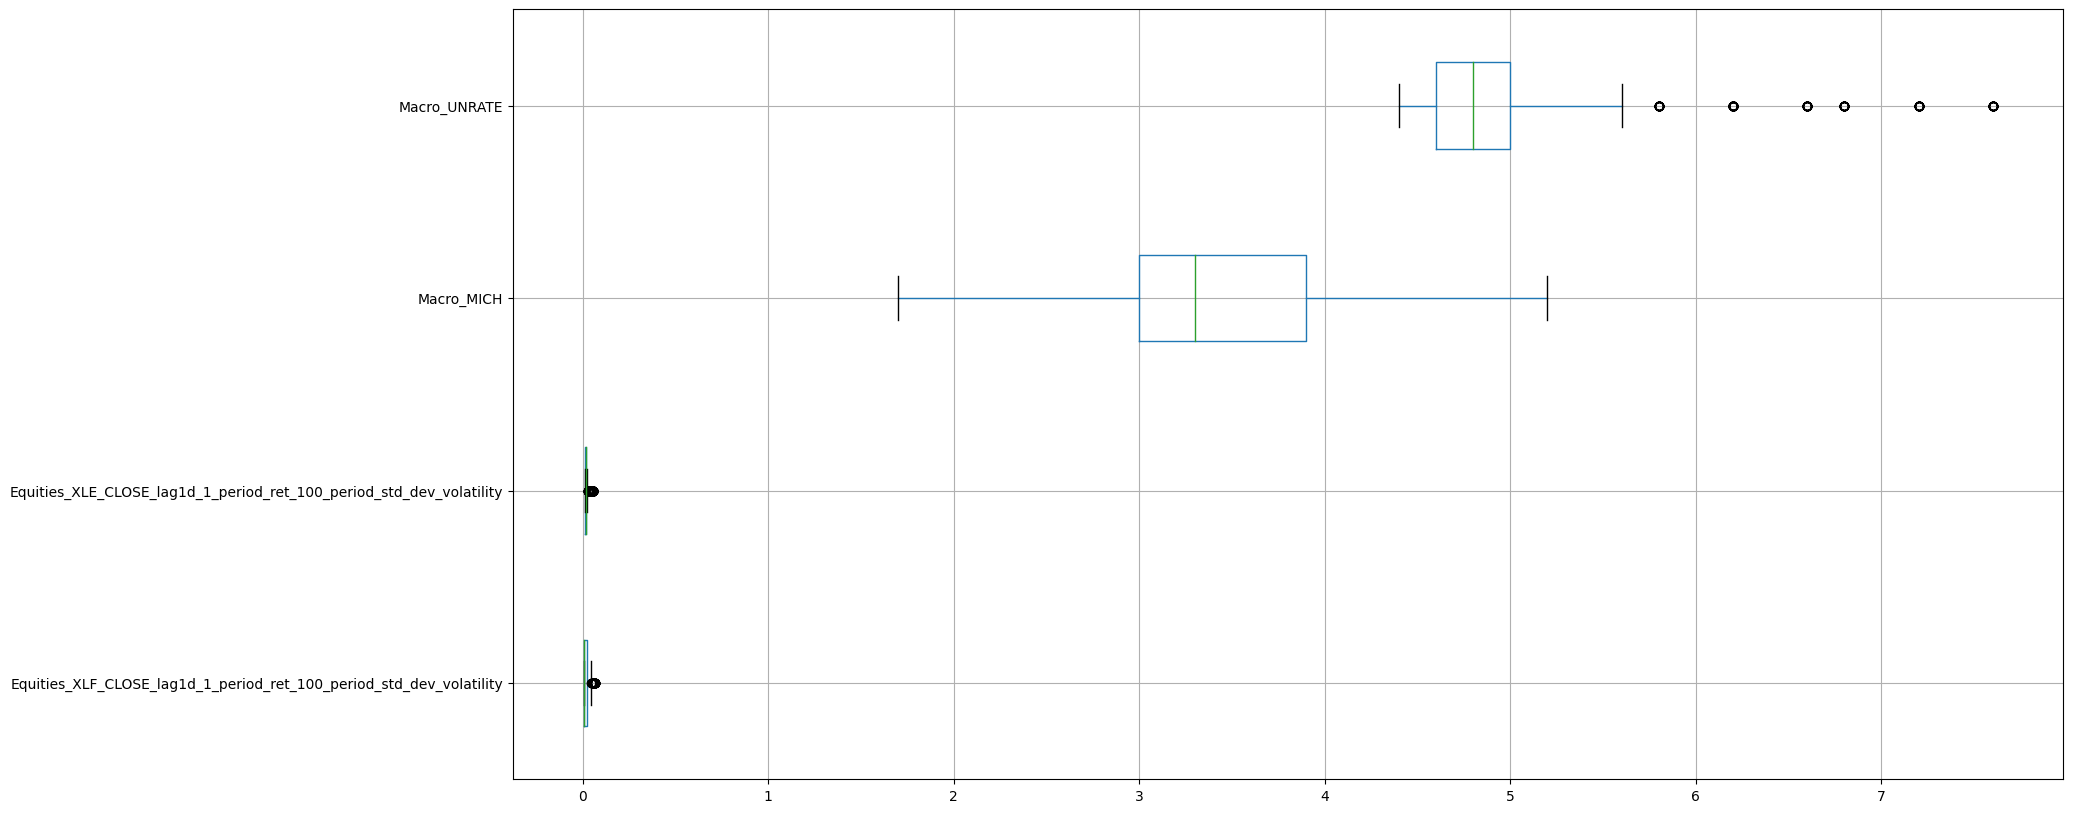

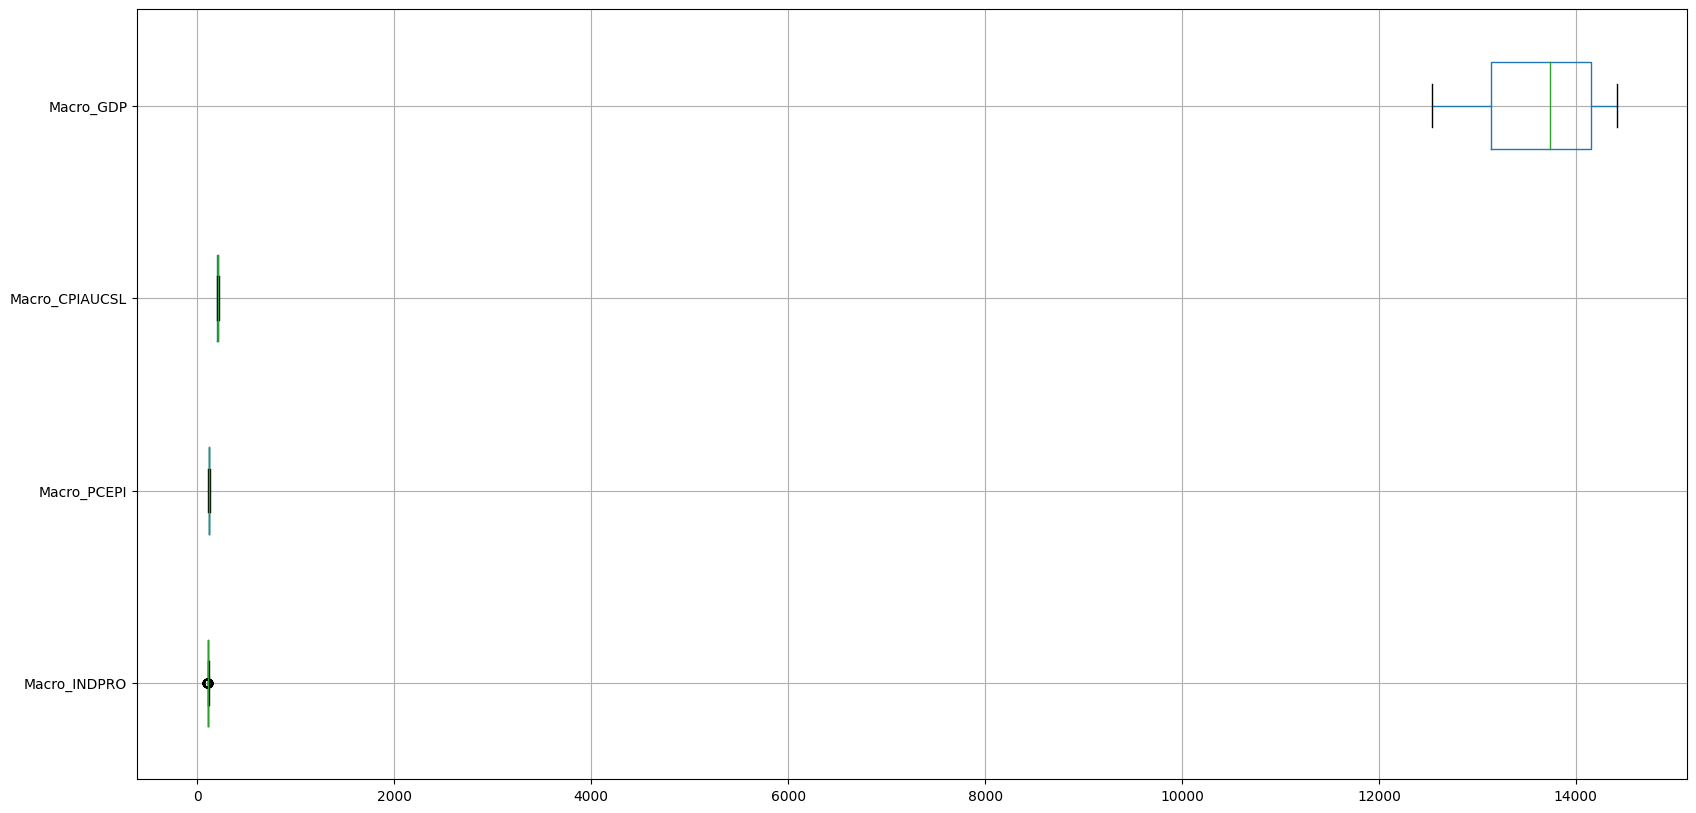

In [ ]:
from IPython import display
from time import sleep
for i in range(0, 30, 5):
  t1.iloc[:, i:i+4].boxplot(figsize=(20,10), vert=False)
  plt.show()


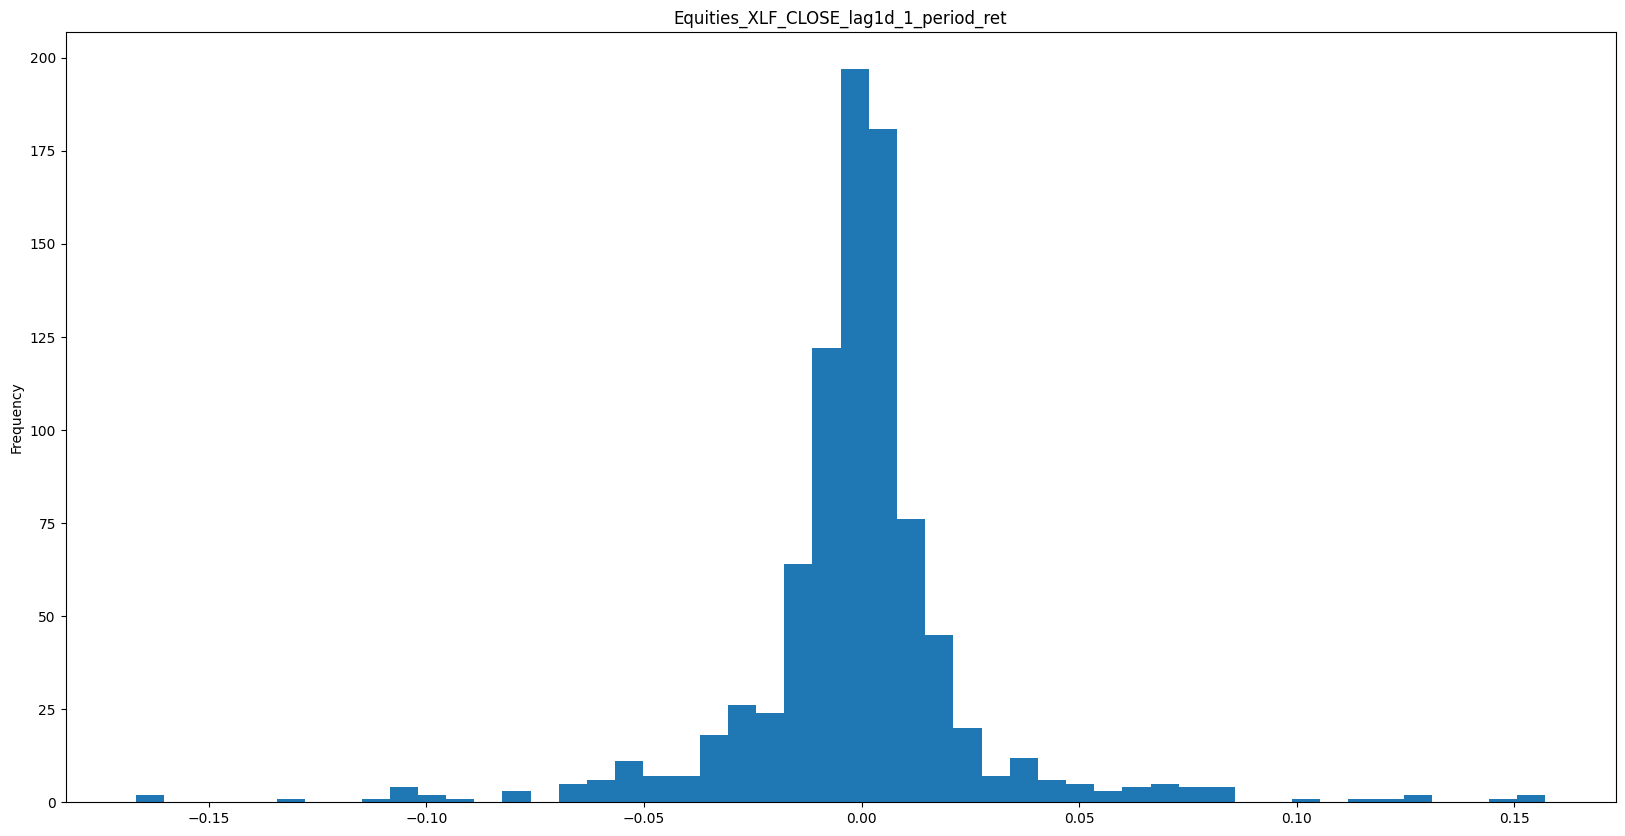

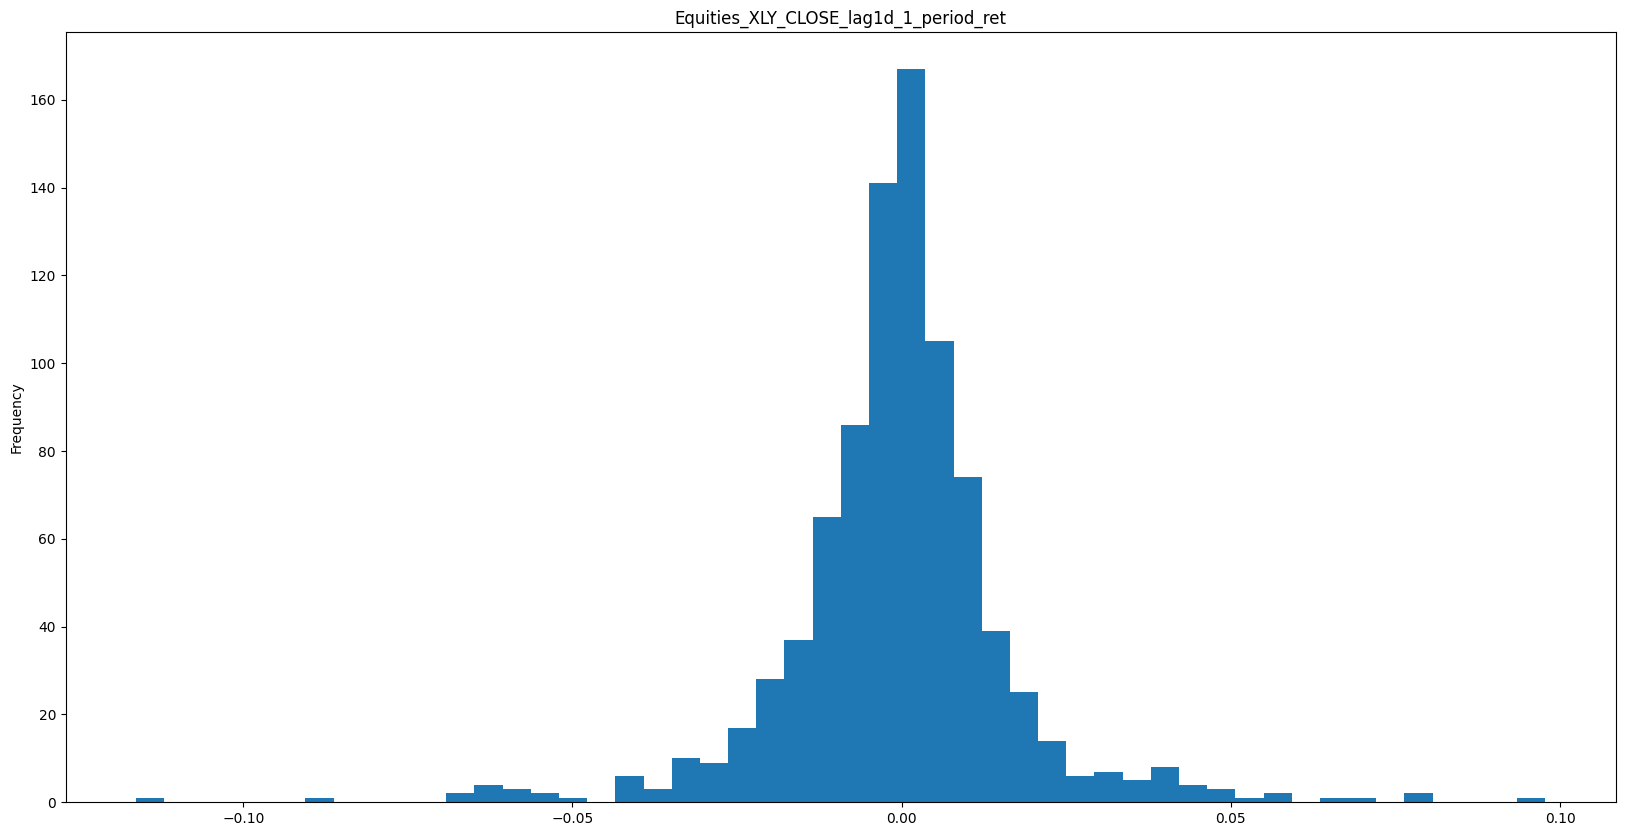

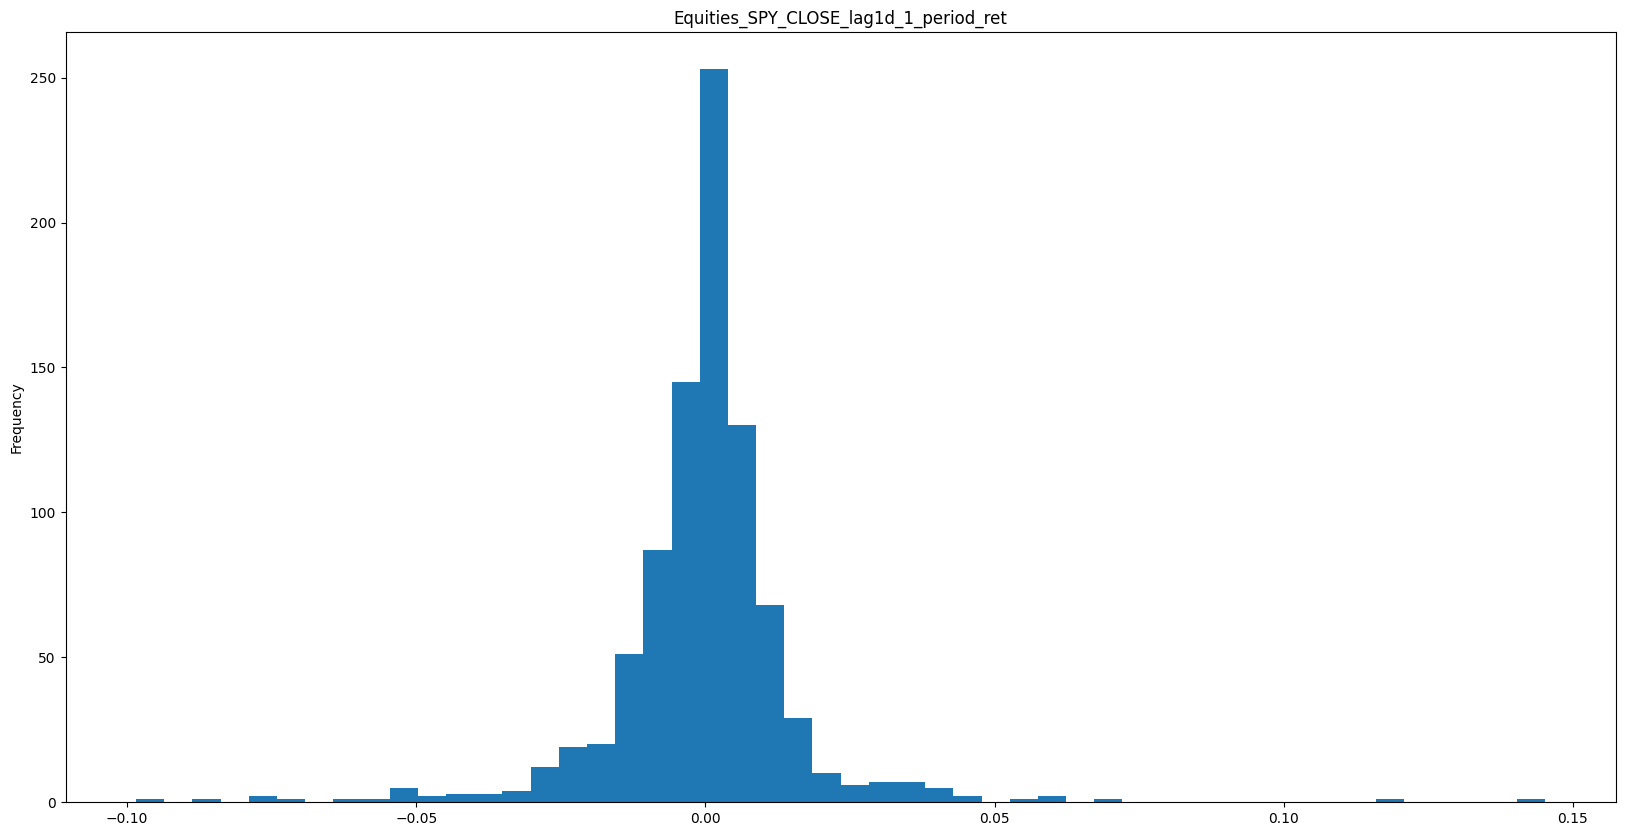

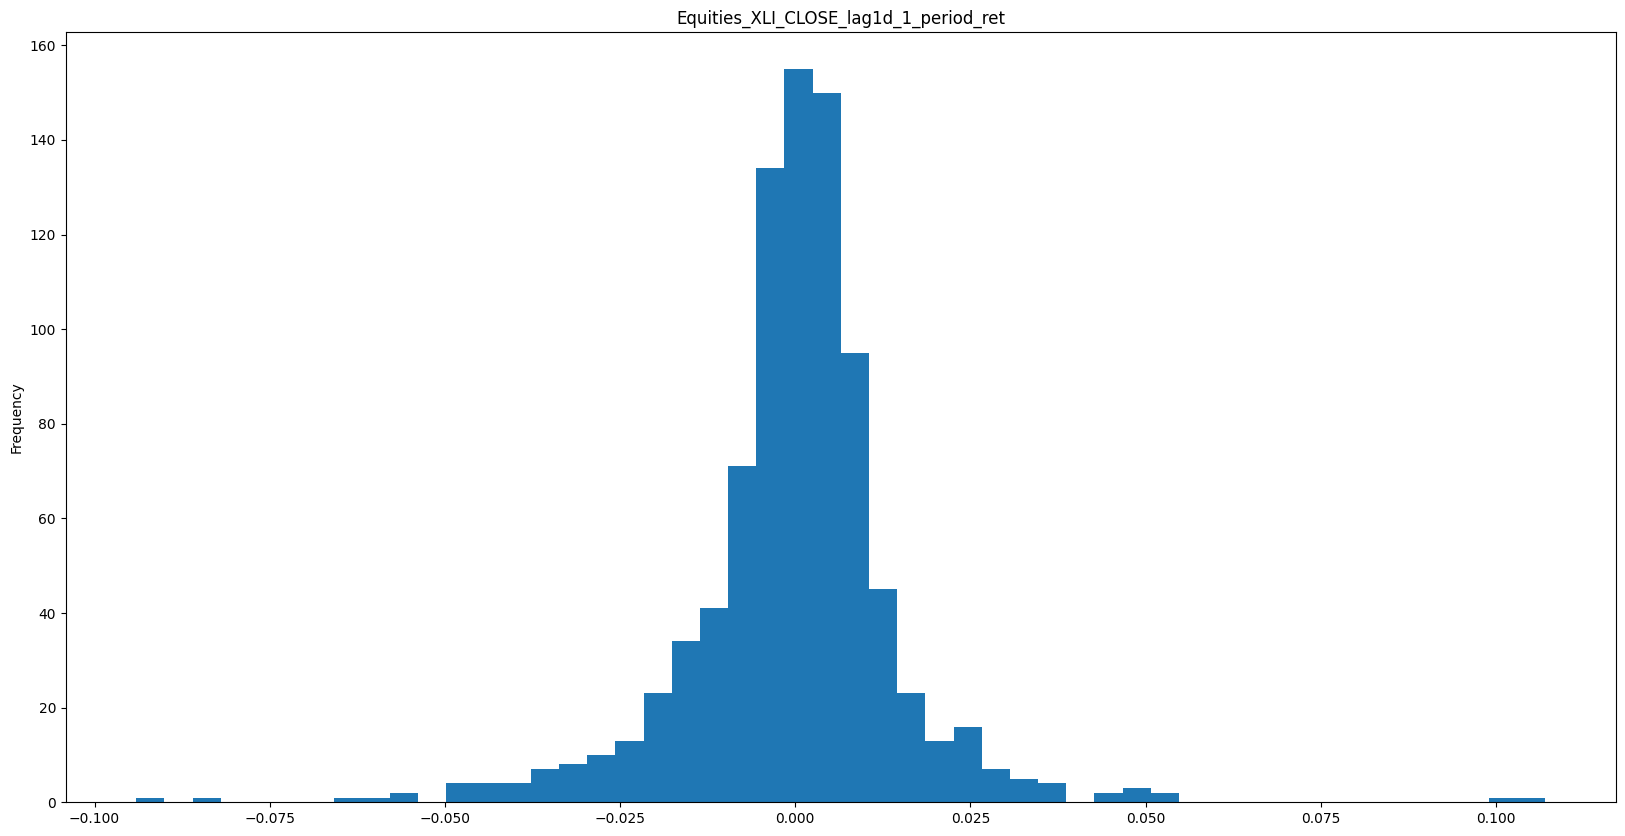

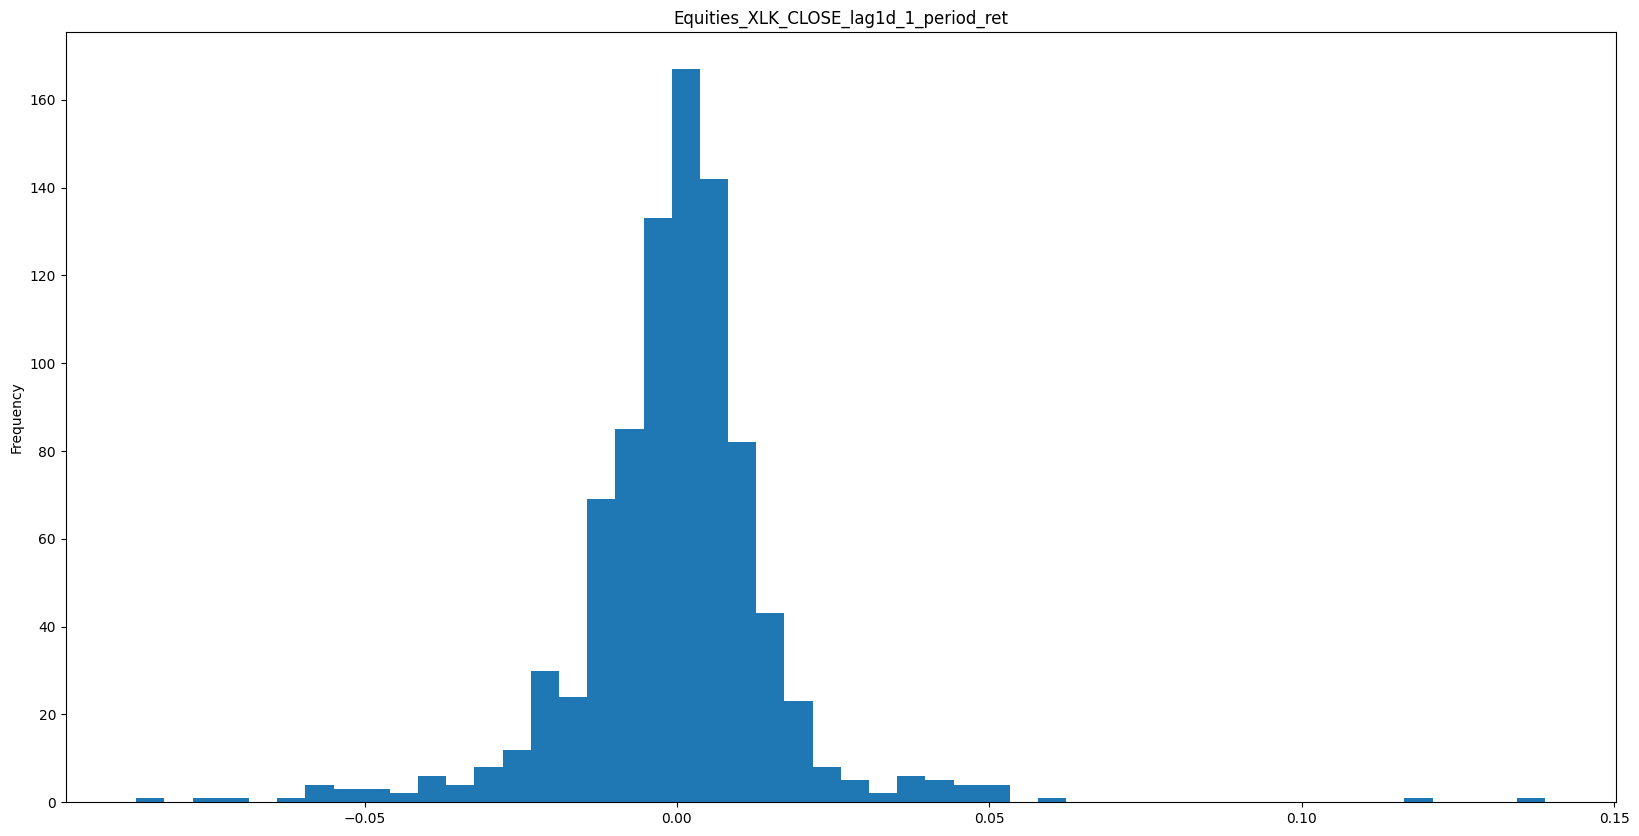

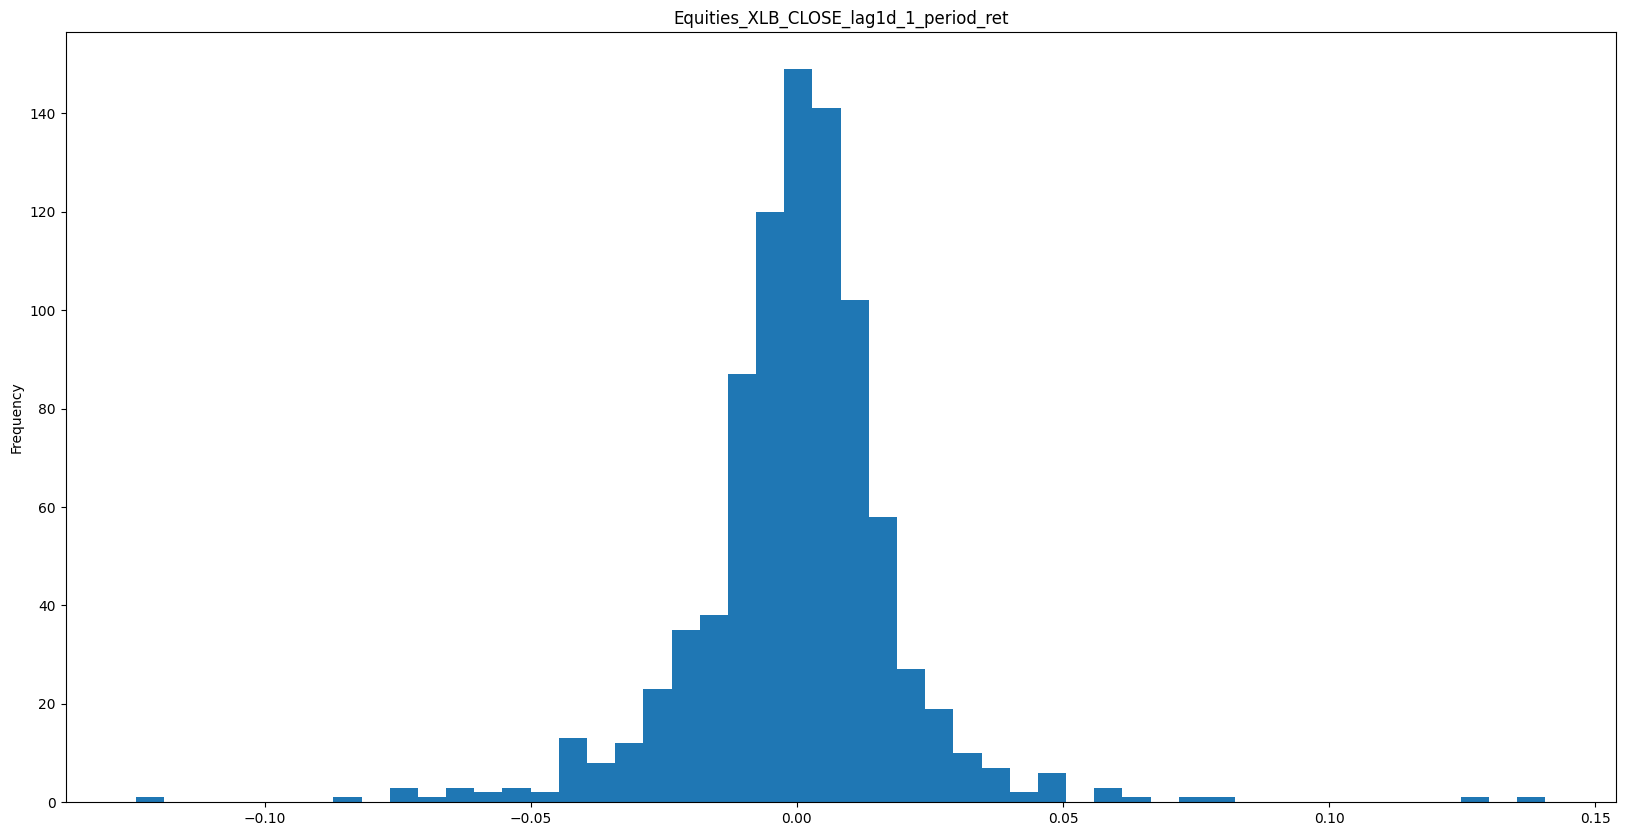

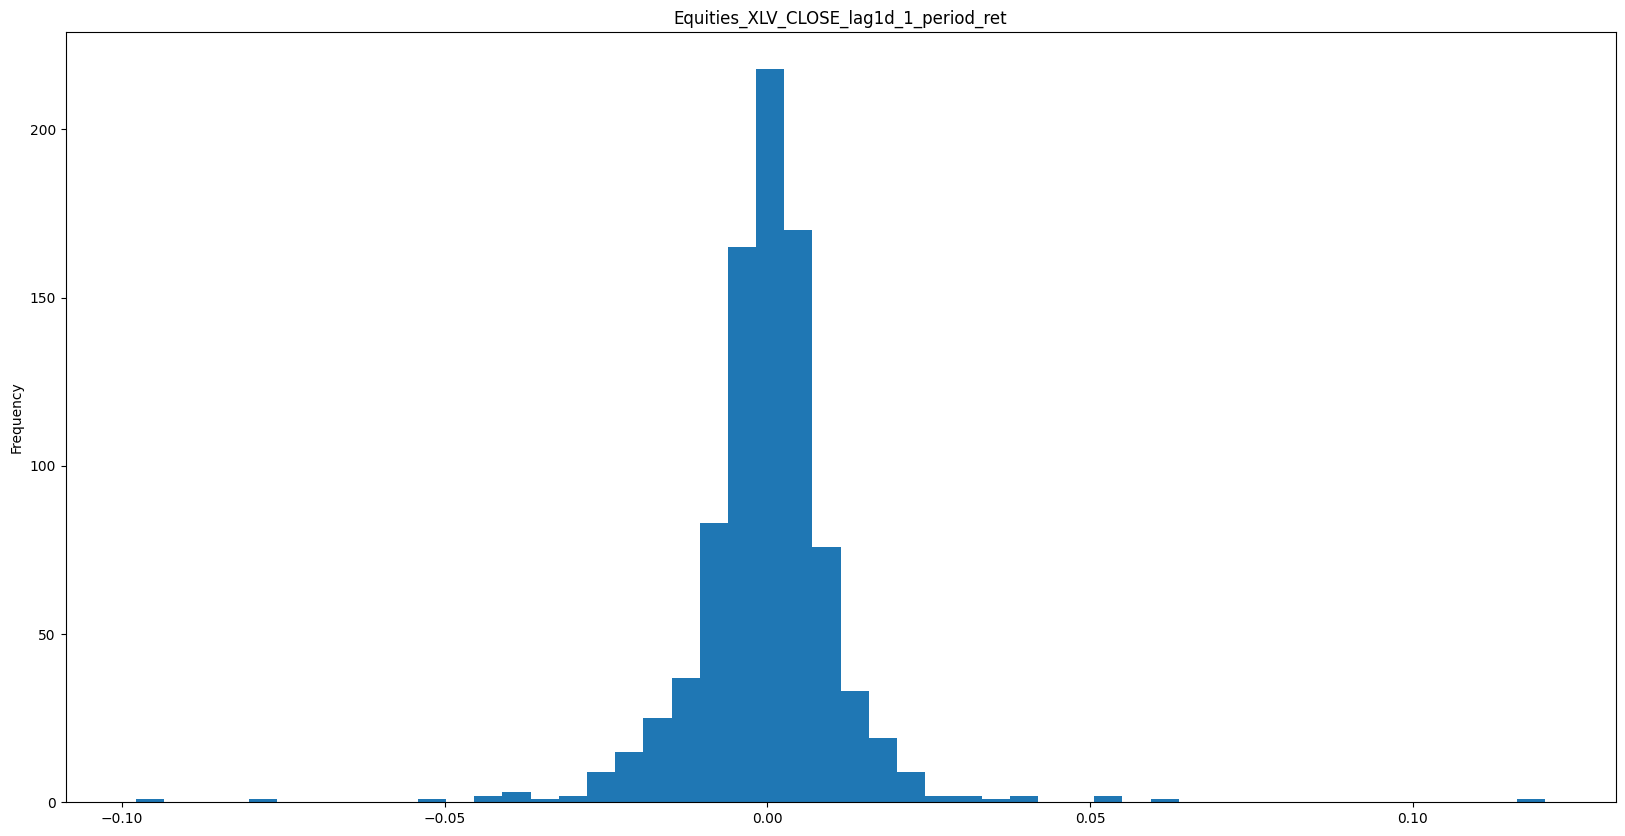

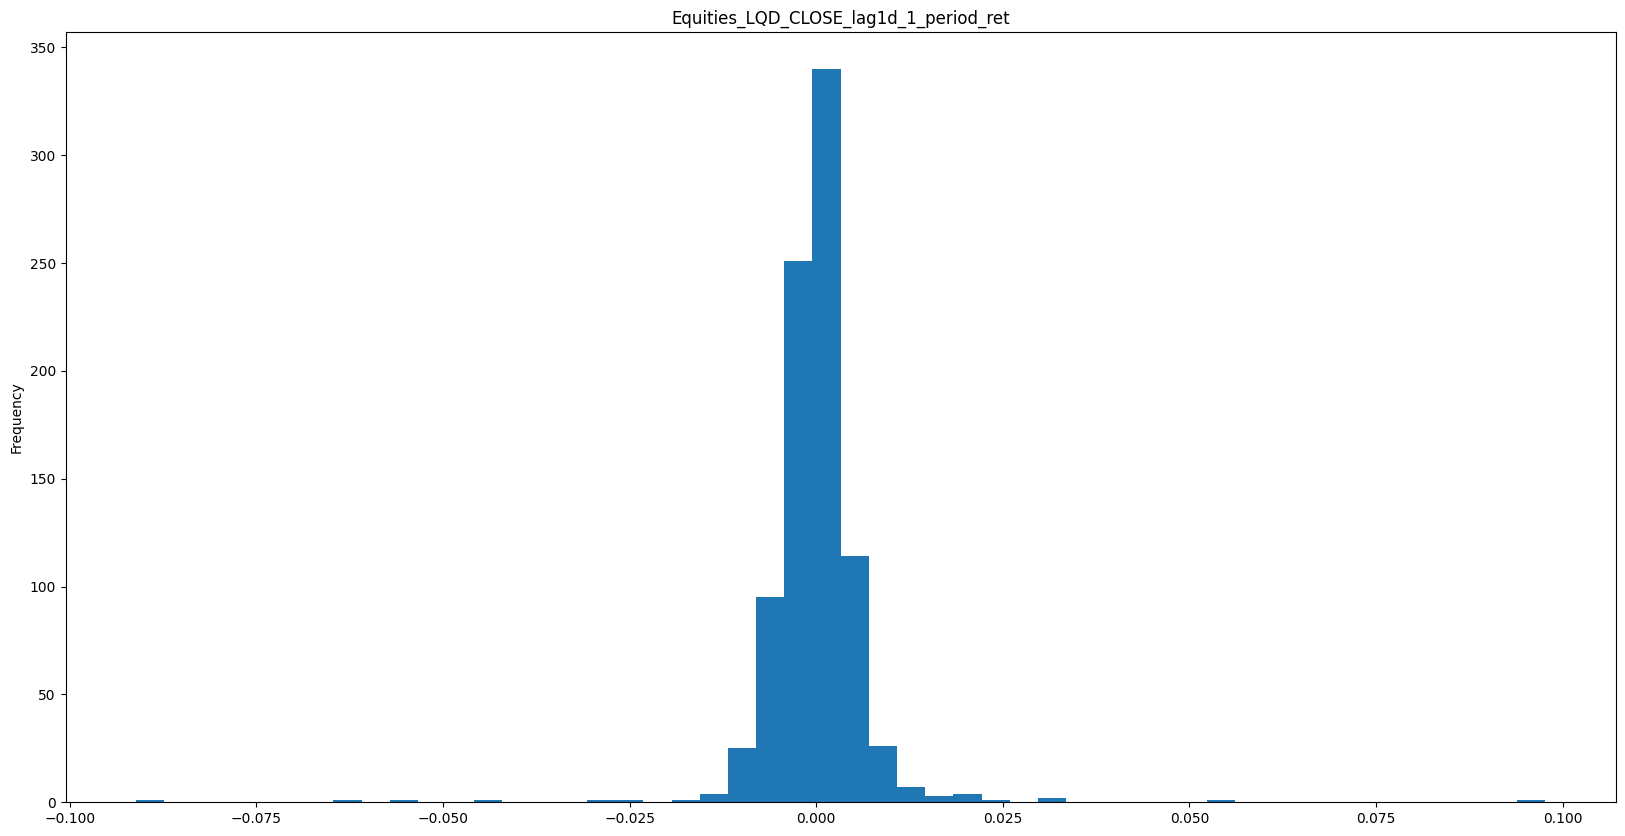

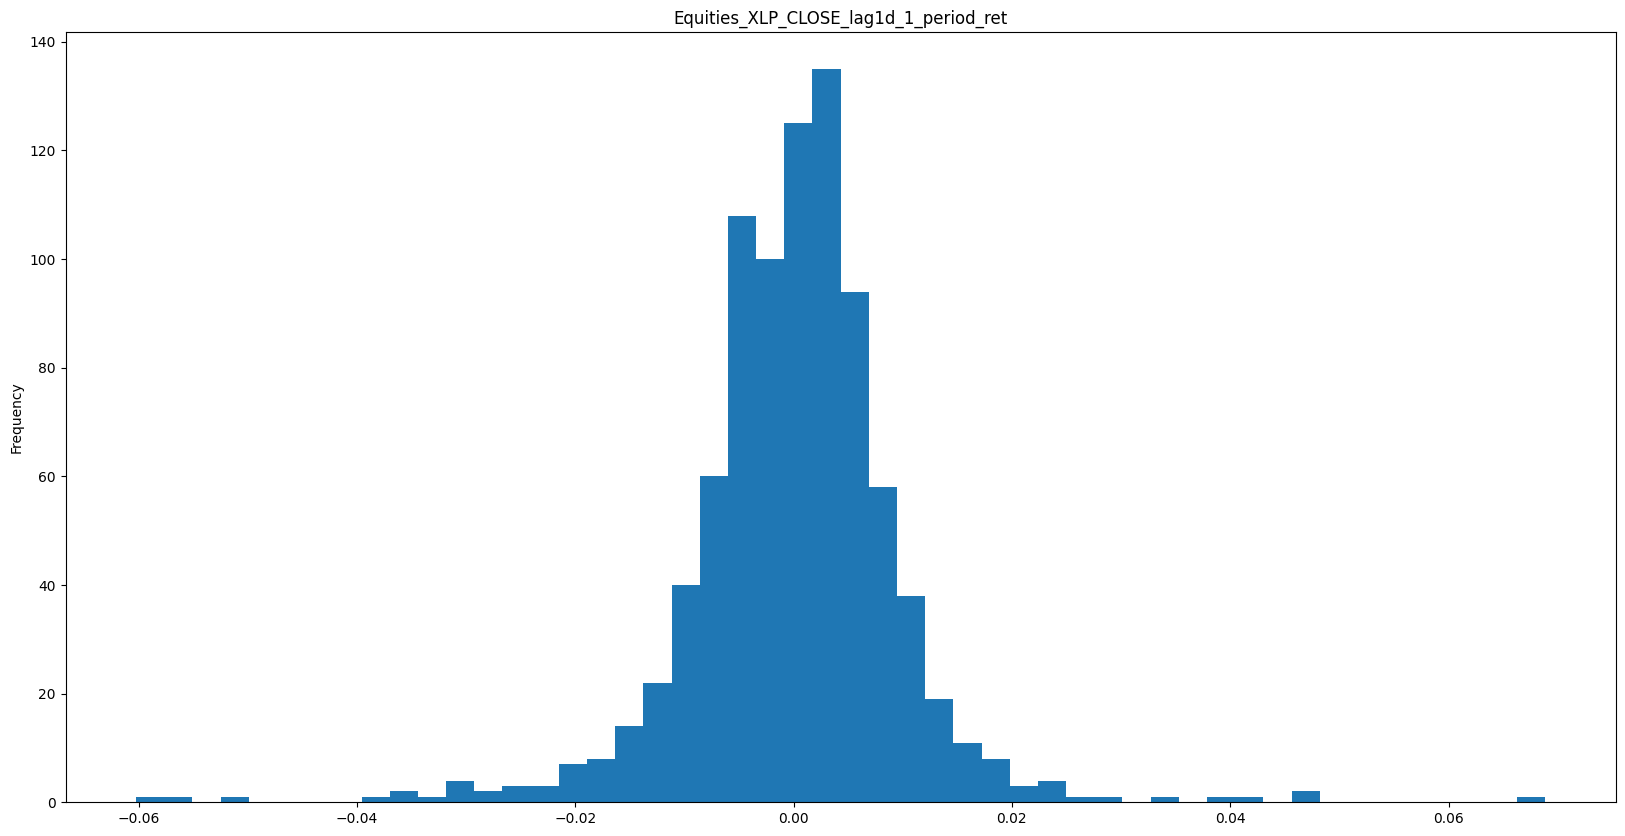

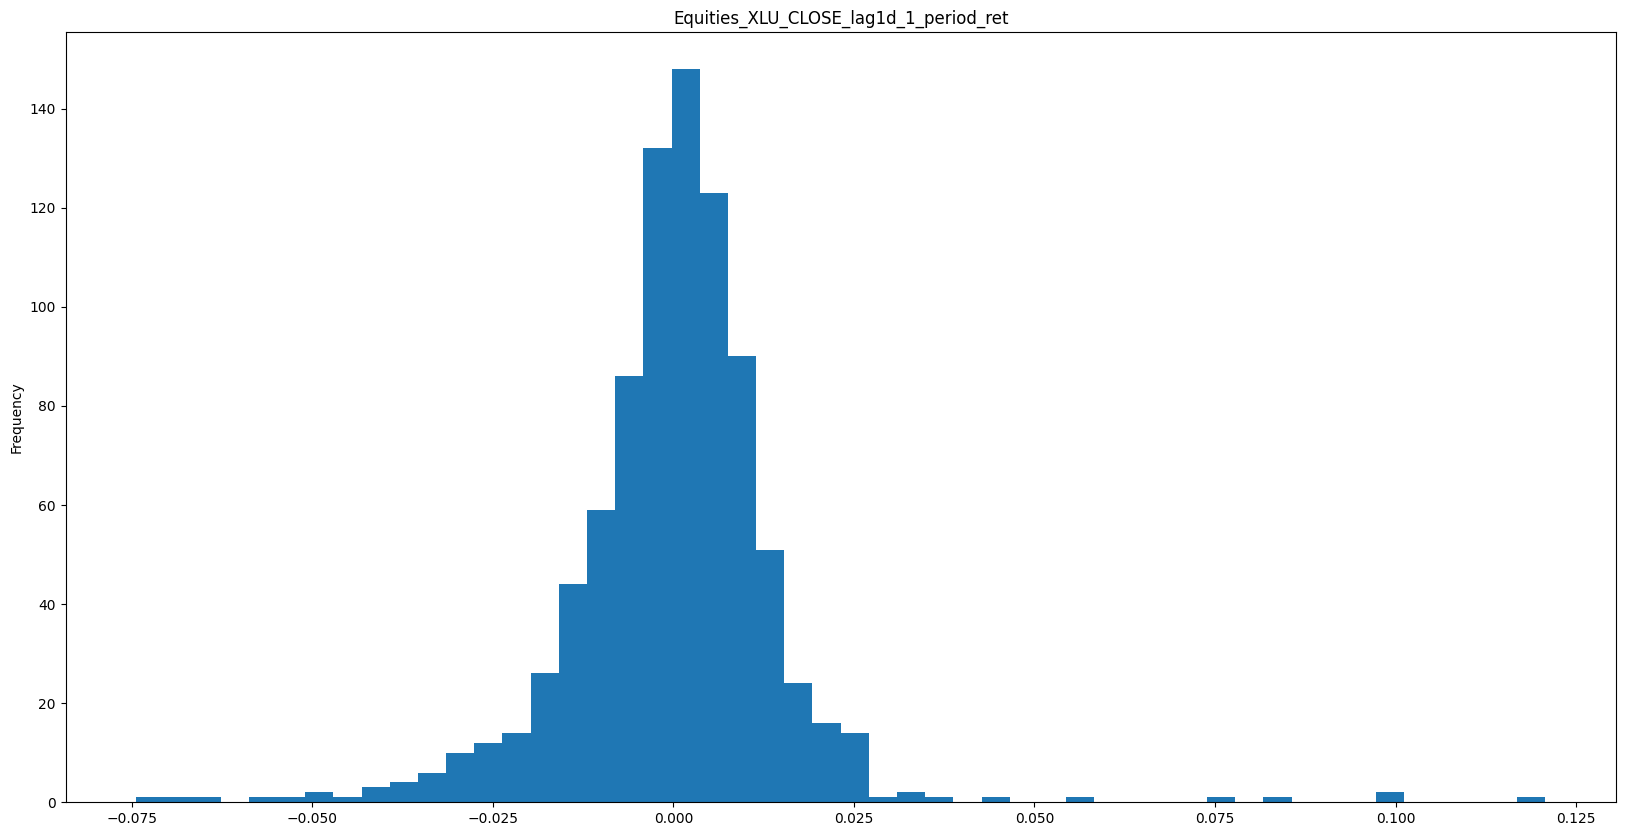

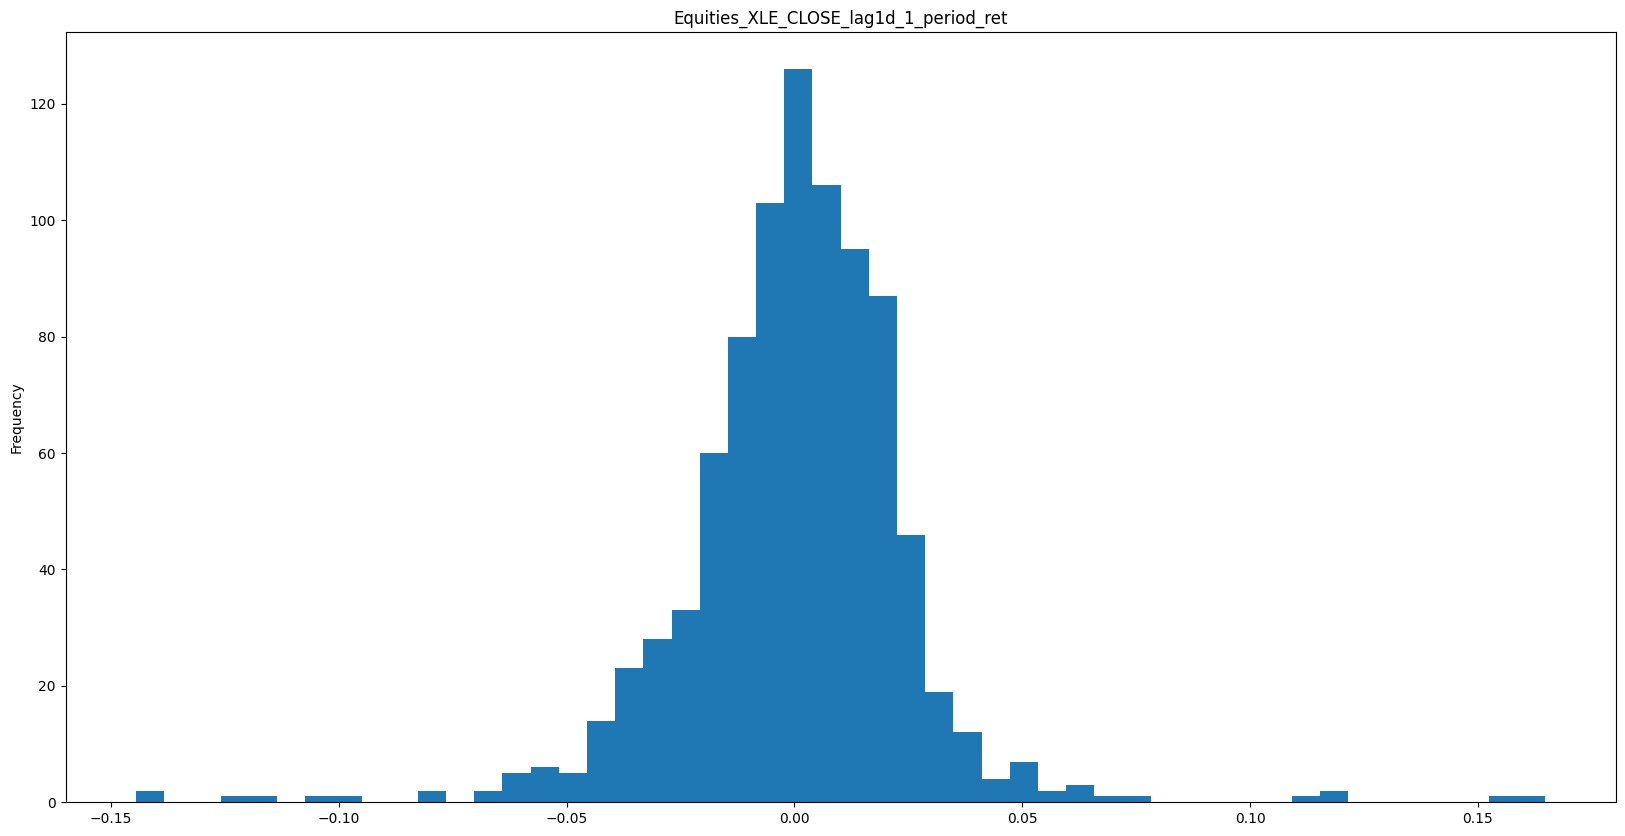

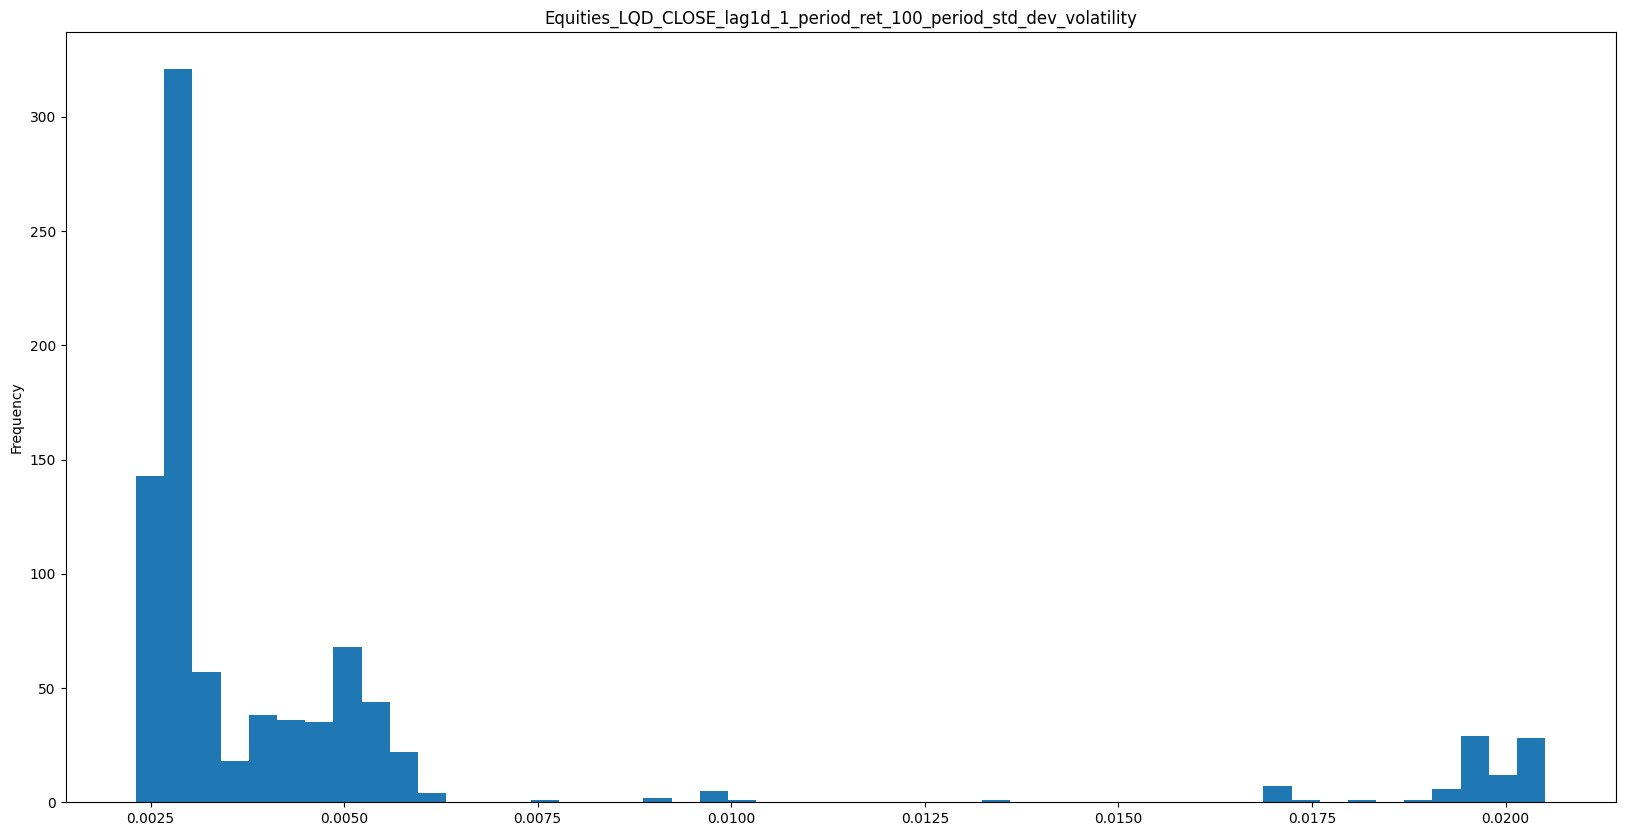

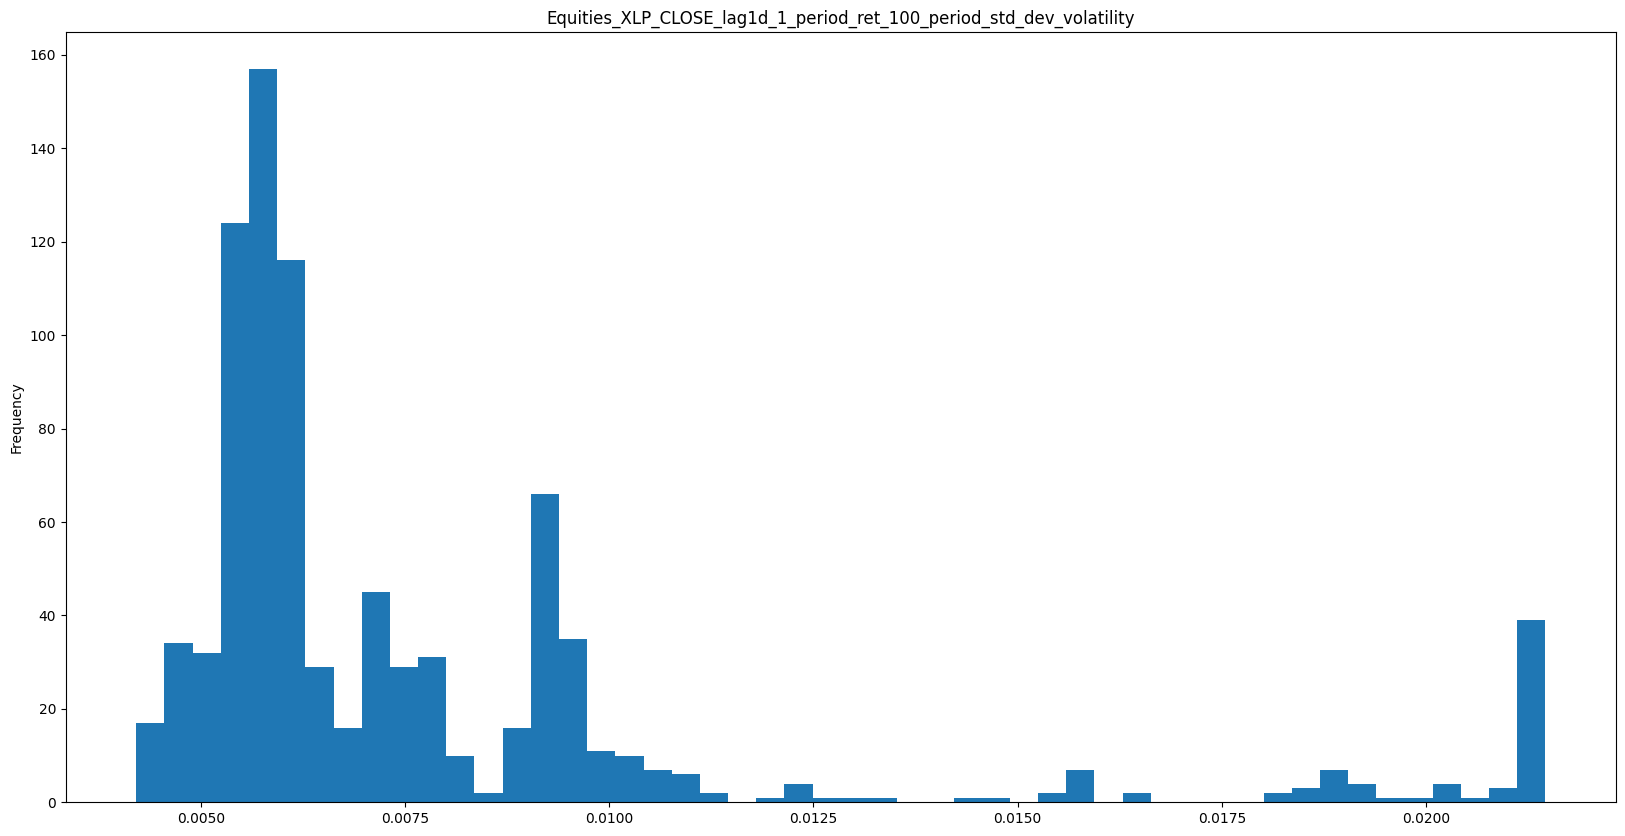

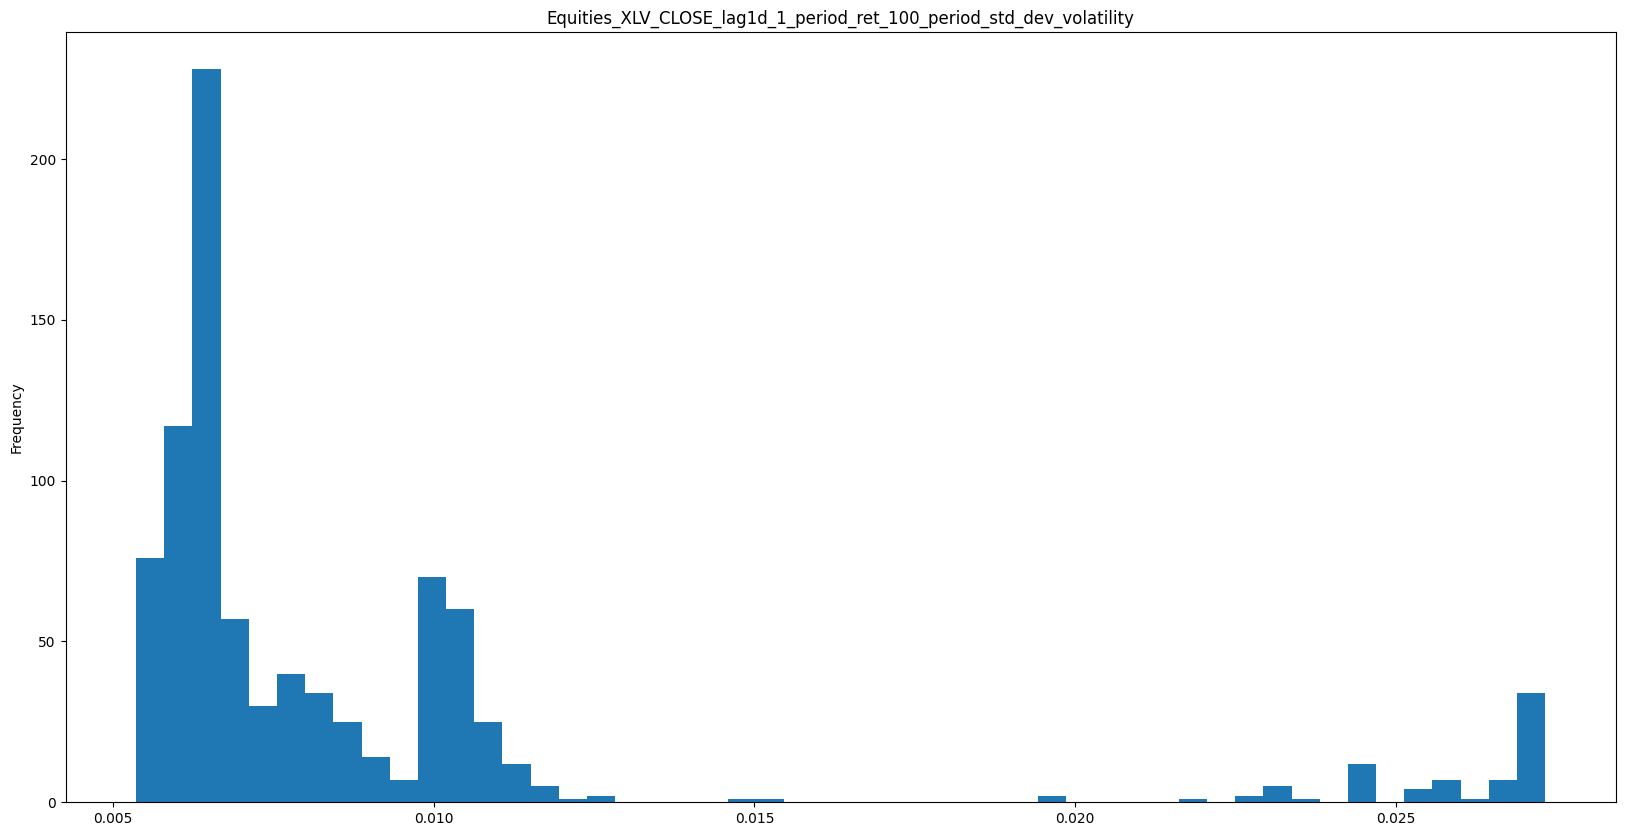

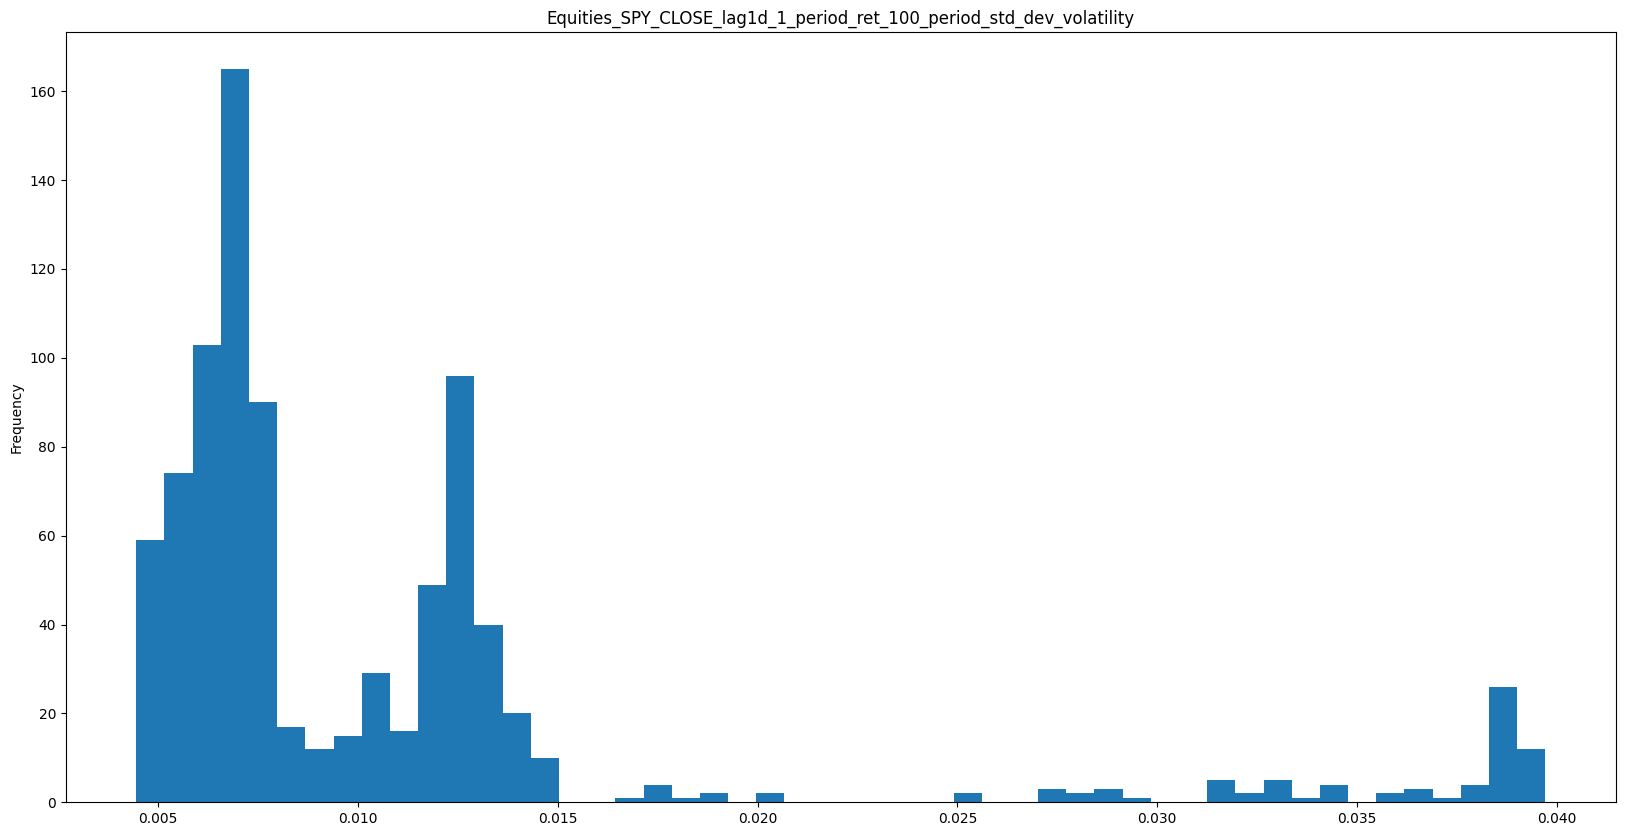

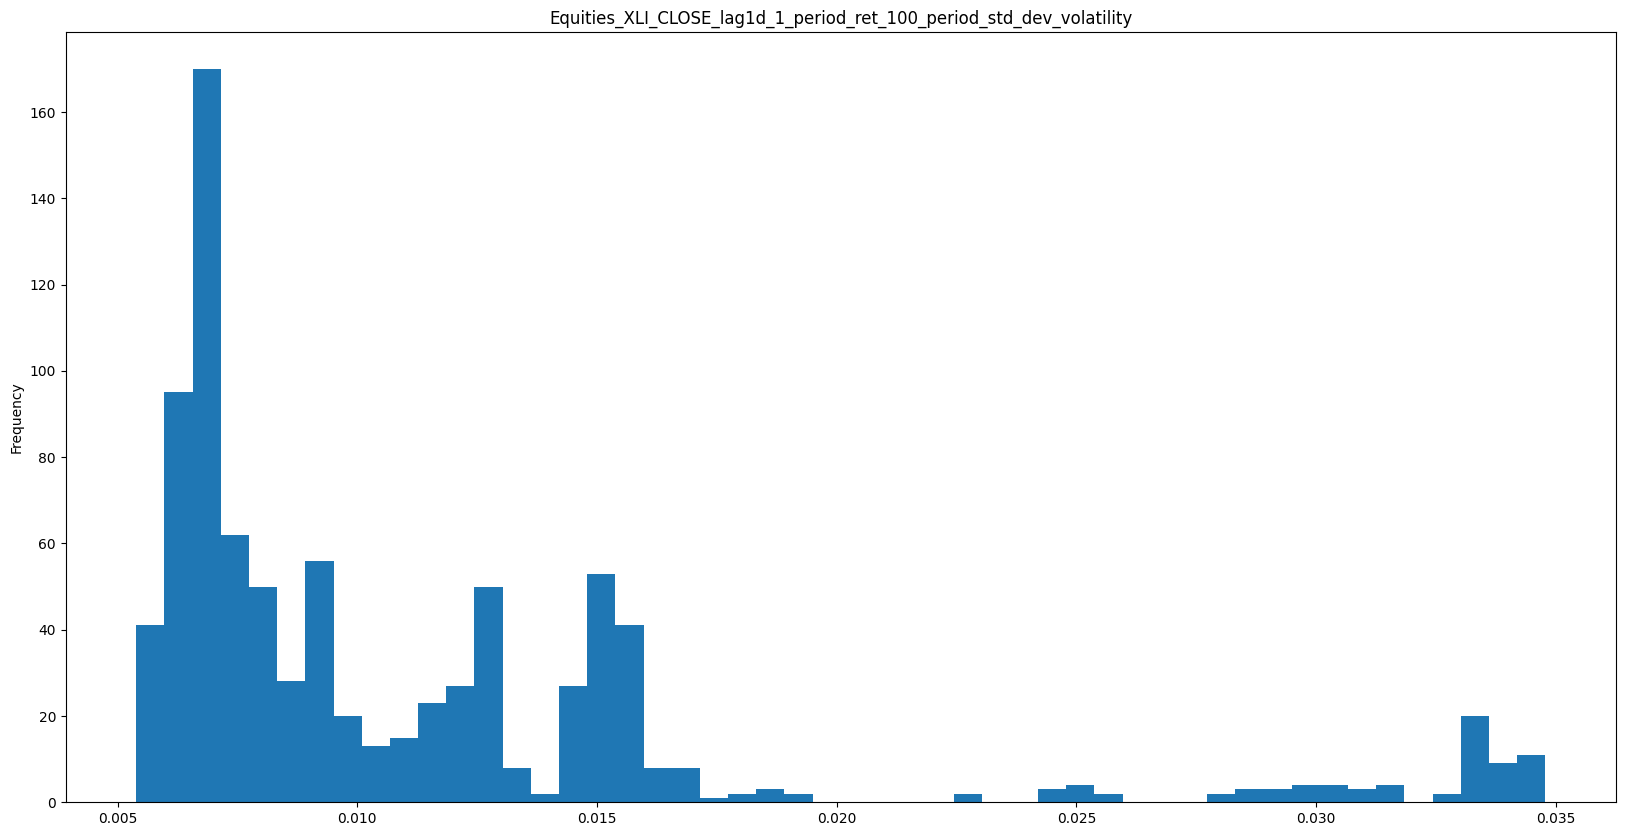

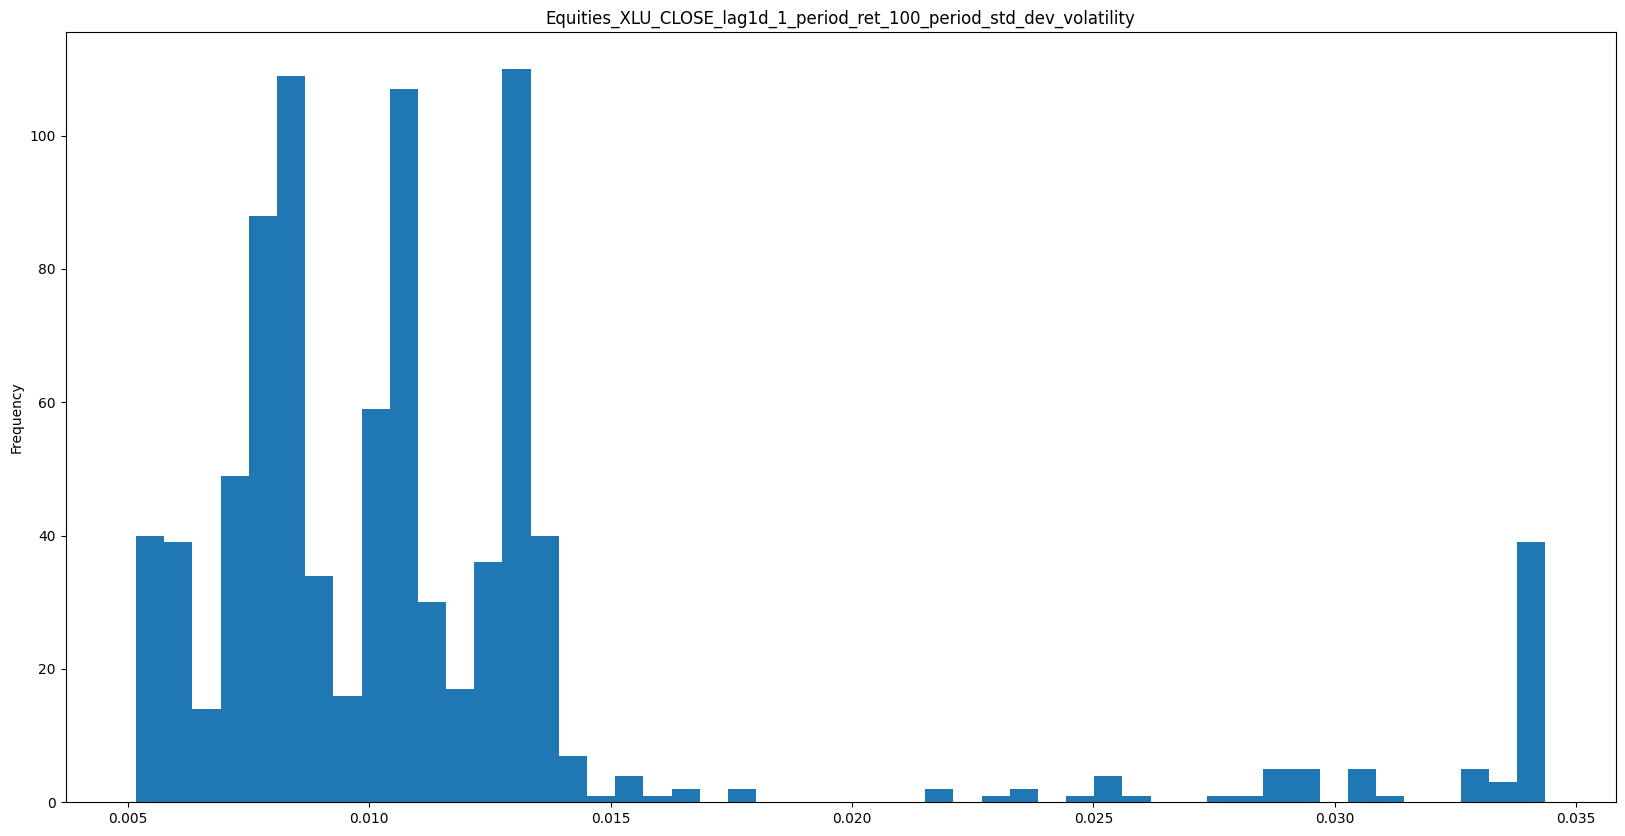

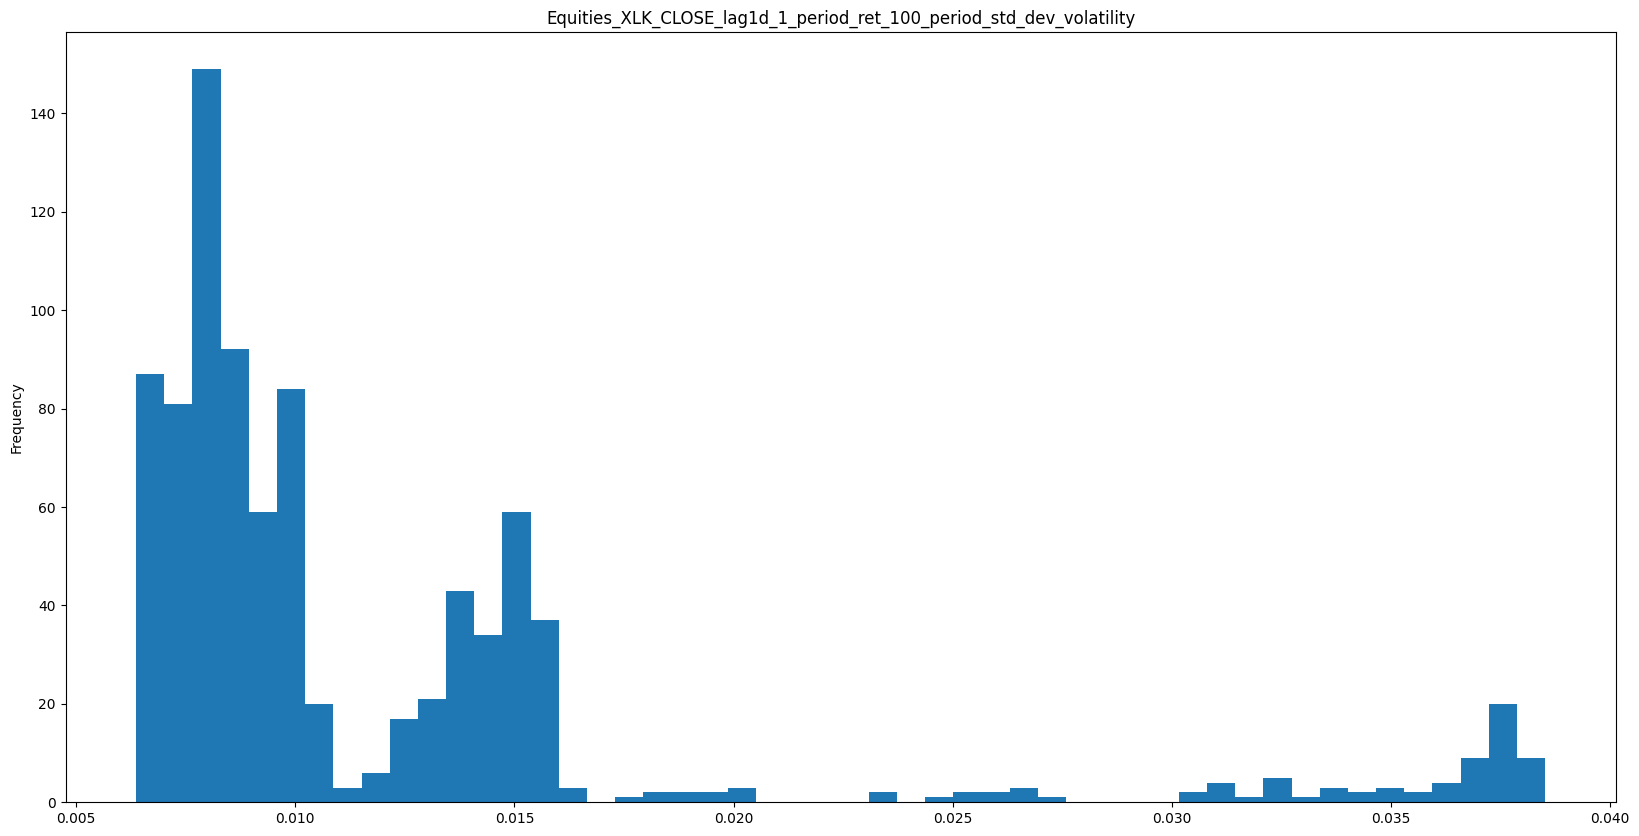

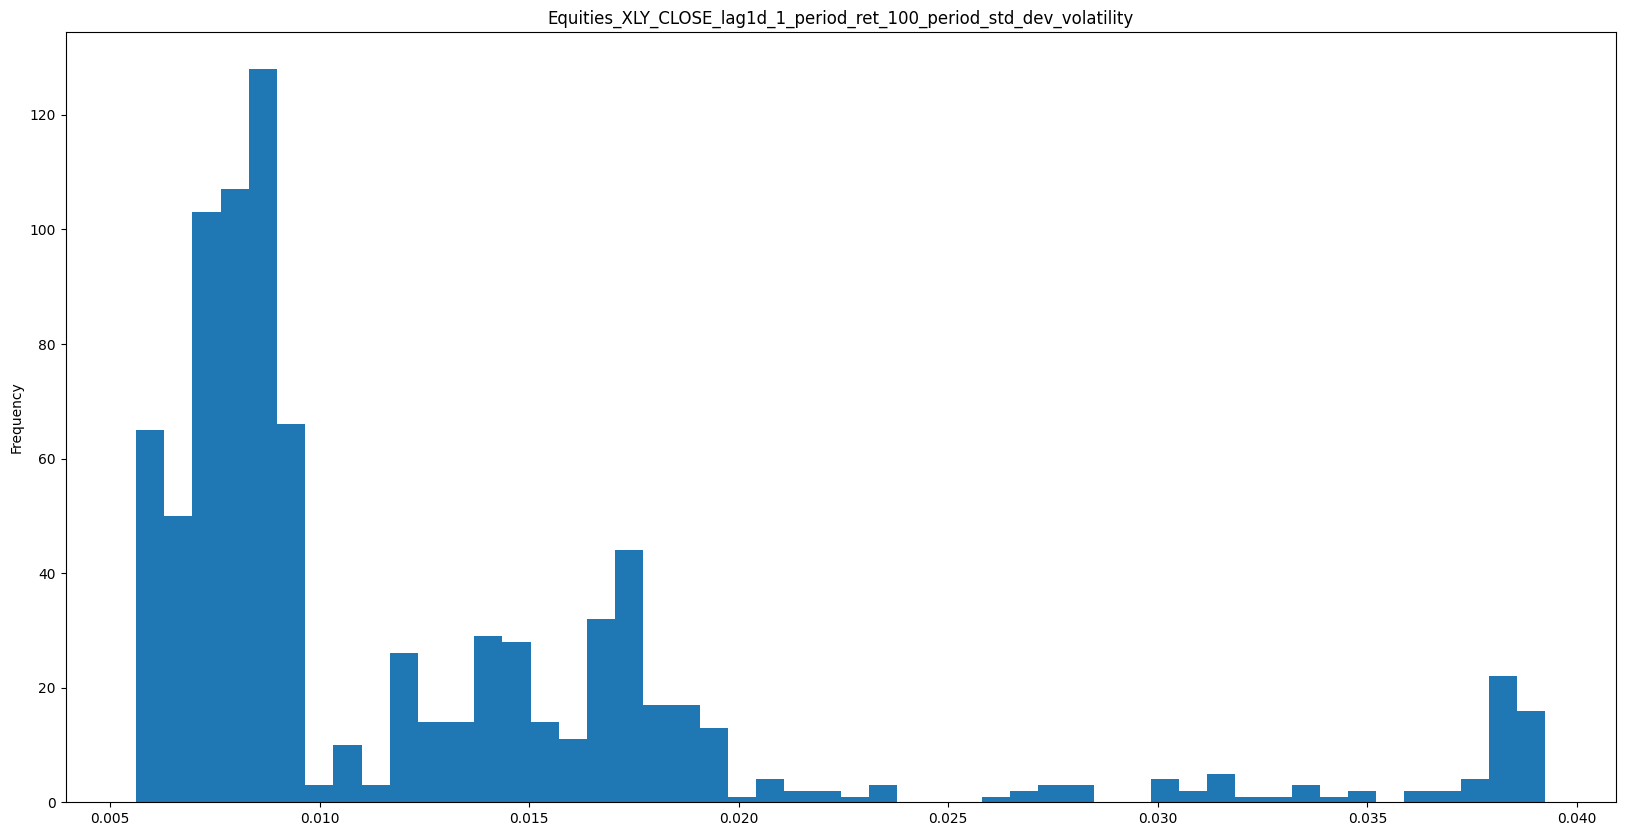

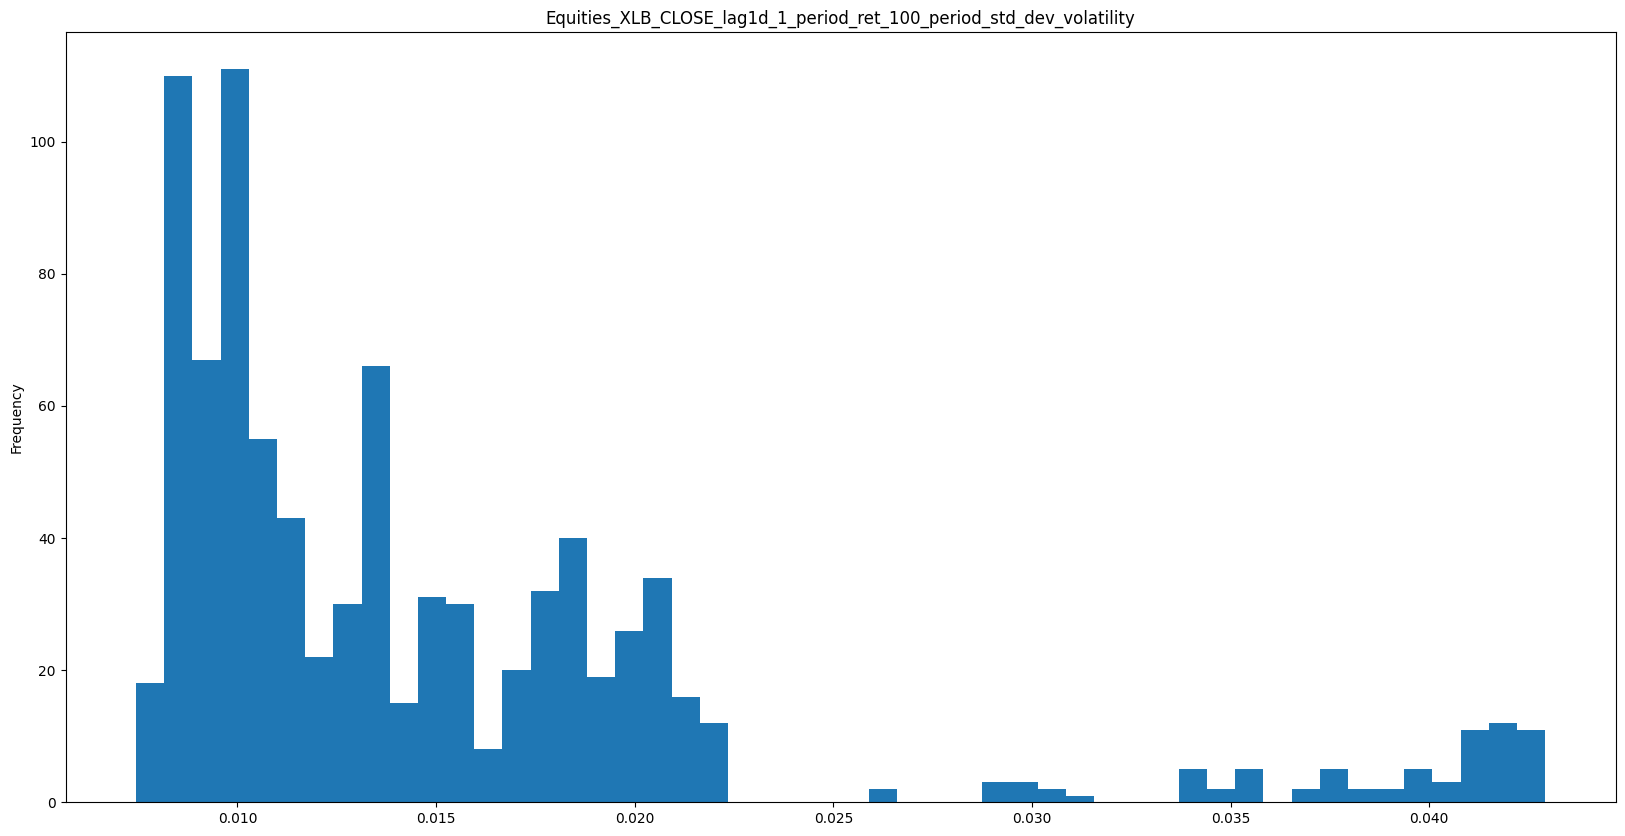

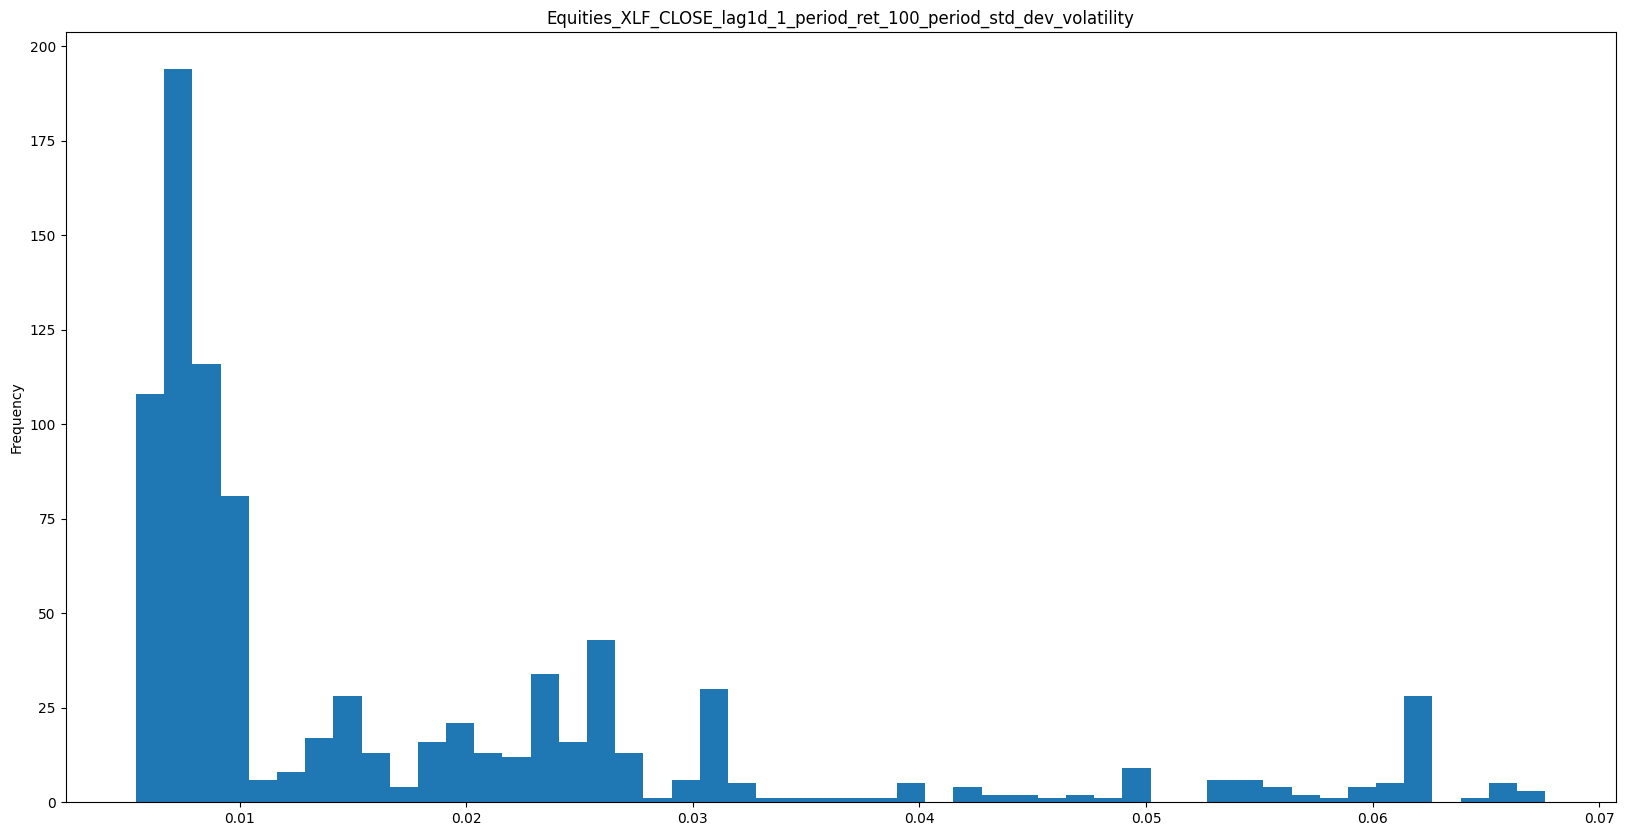

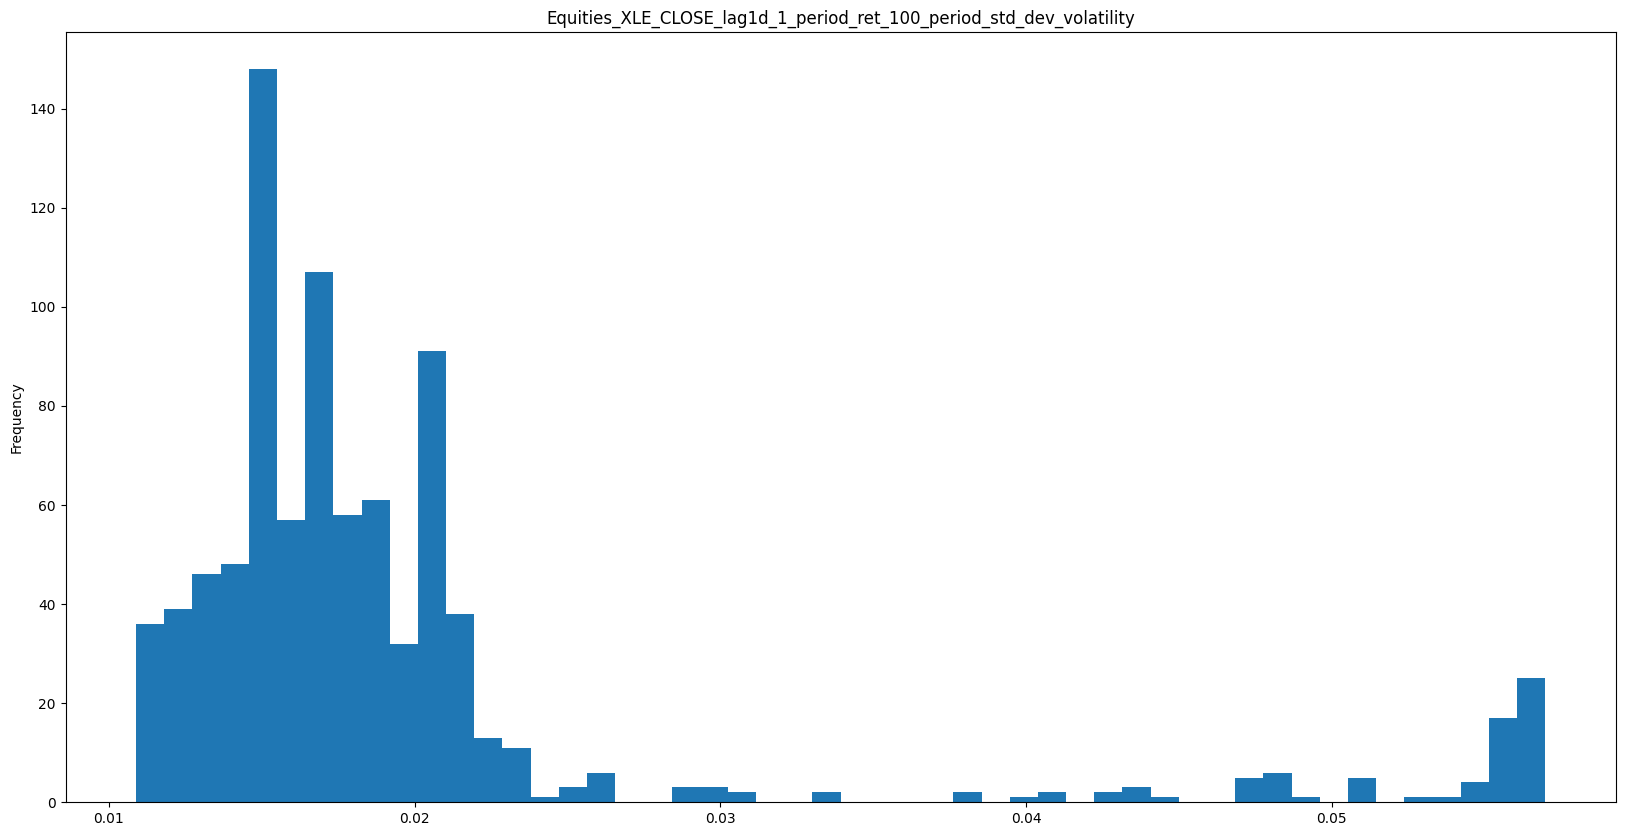

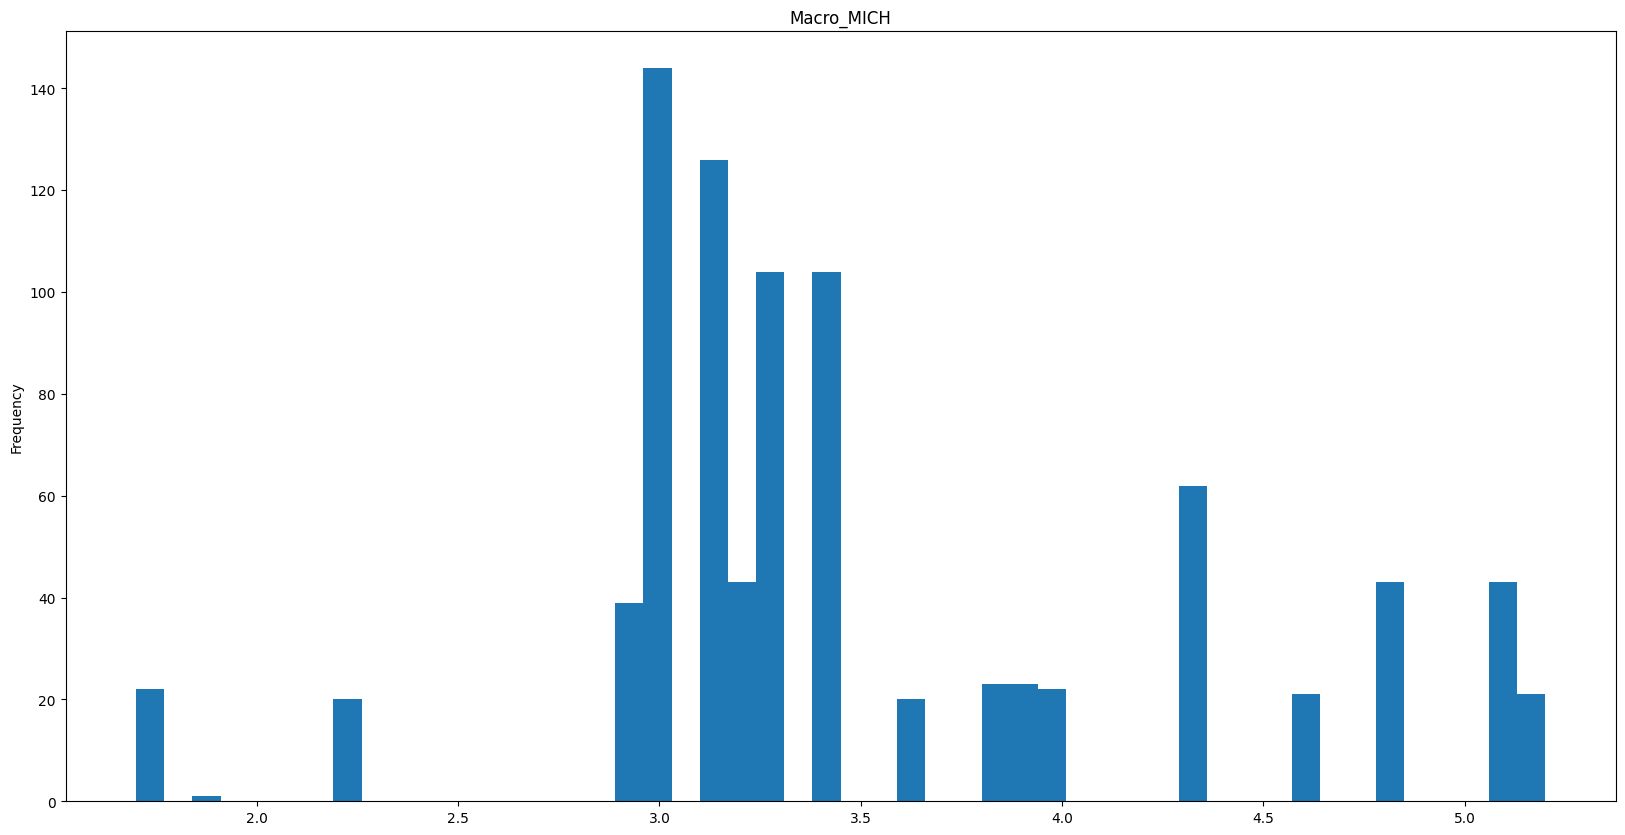

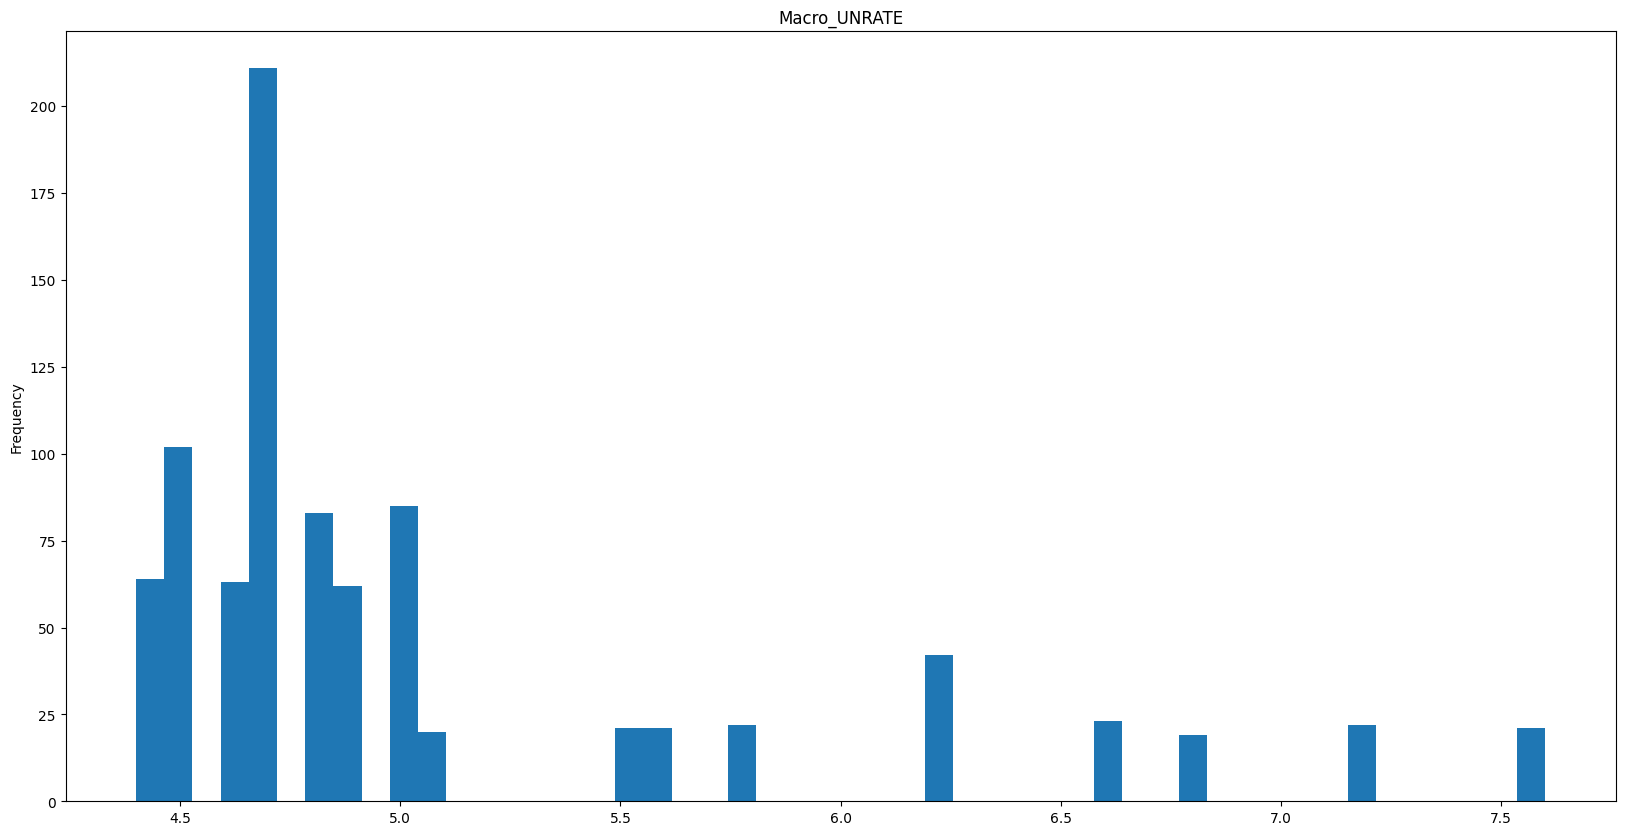

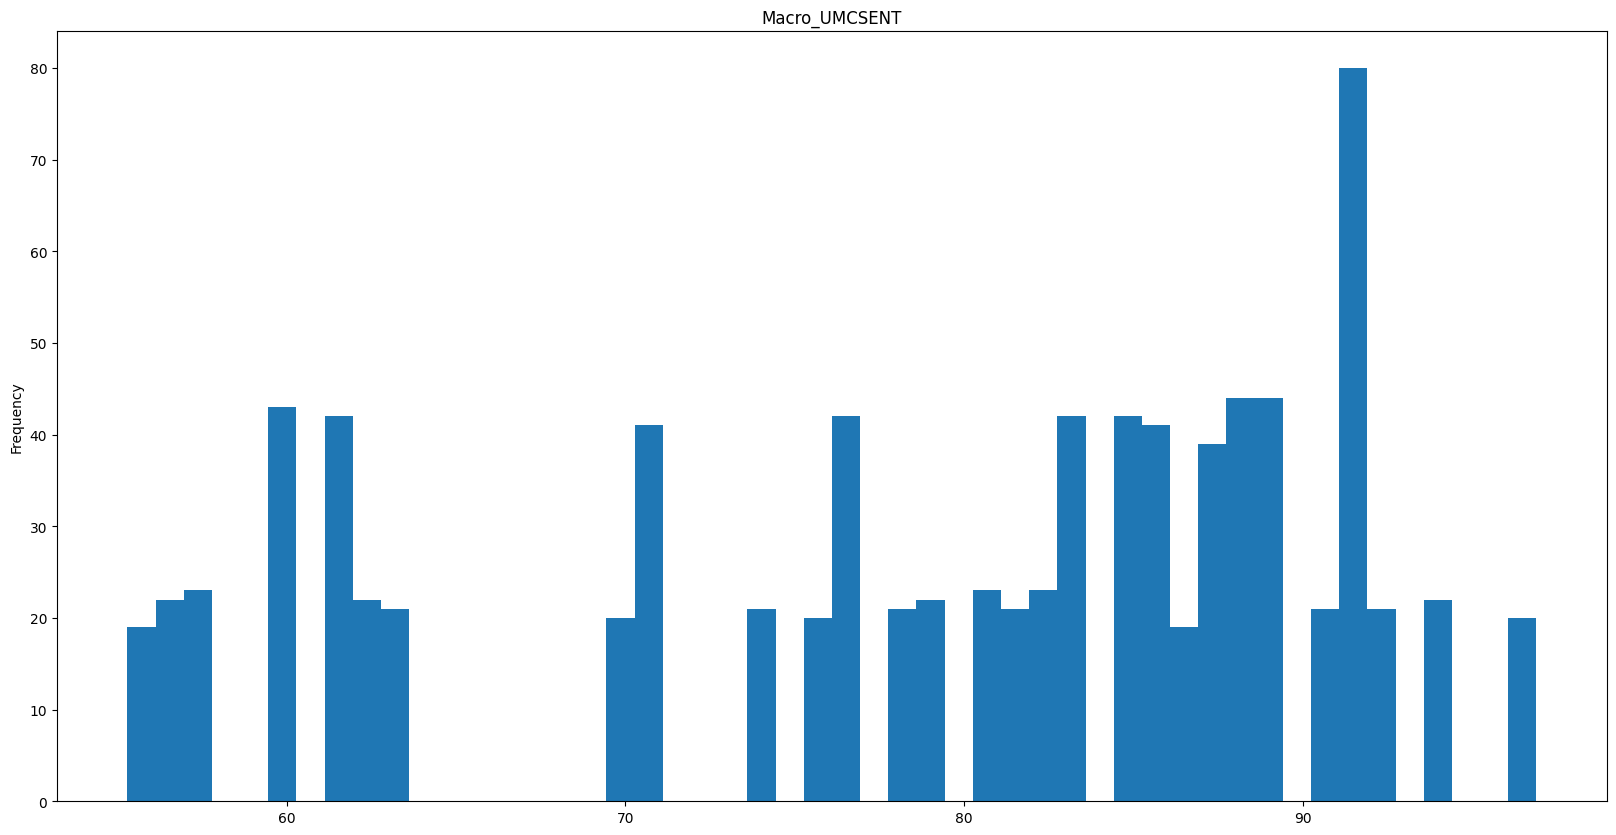

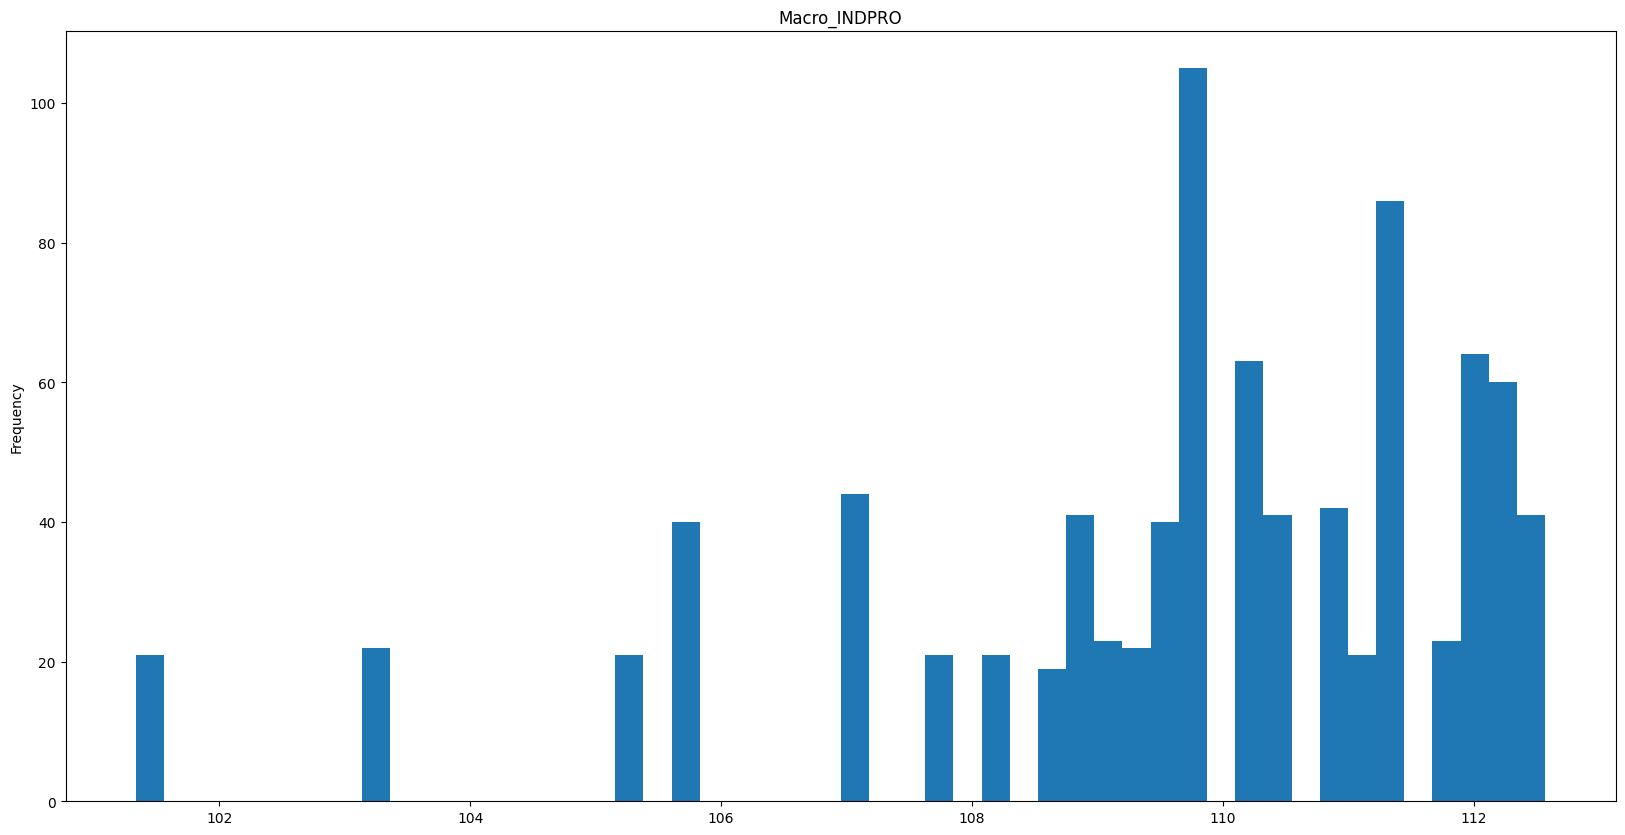

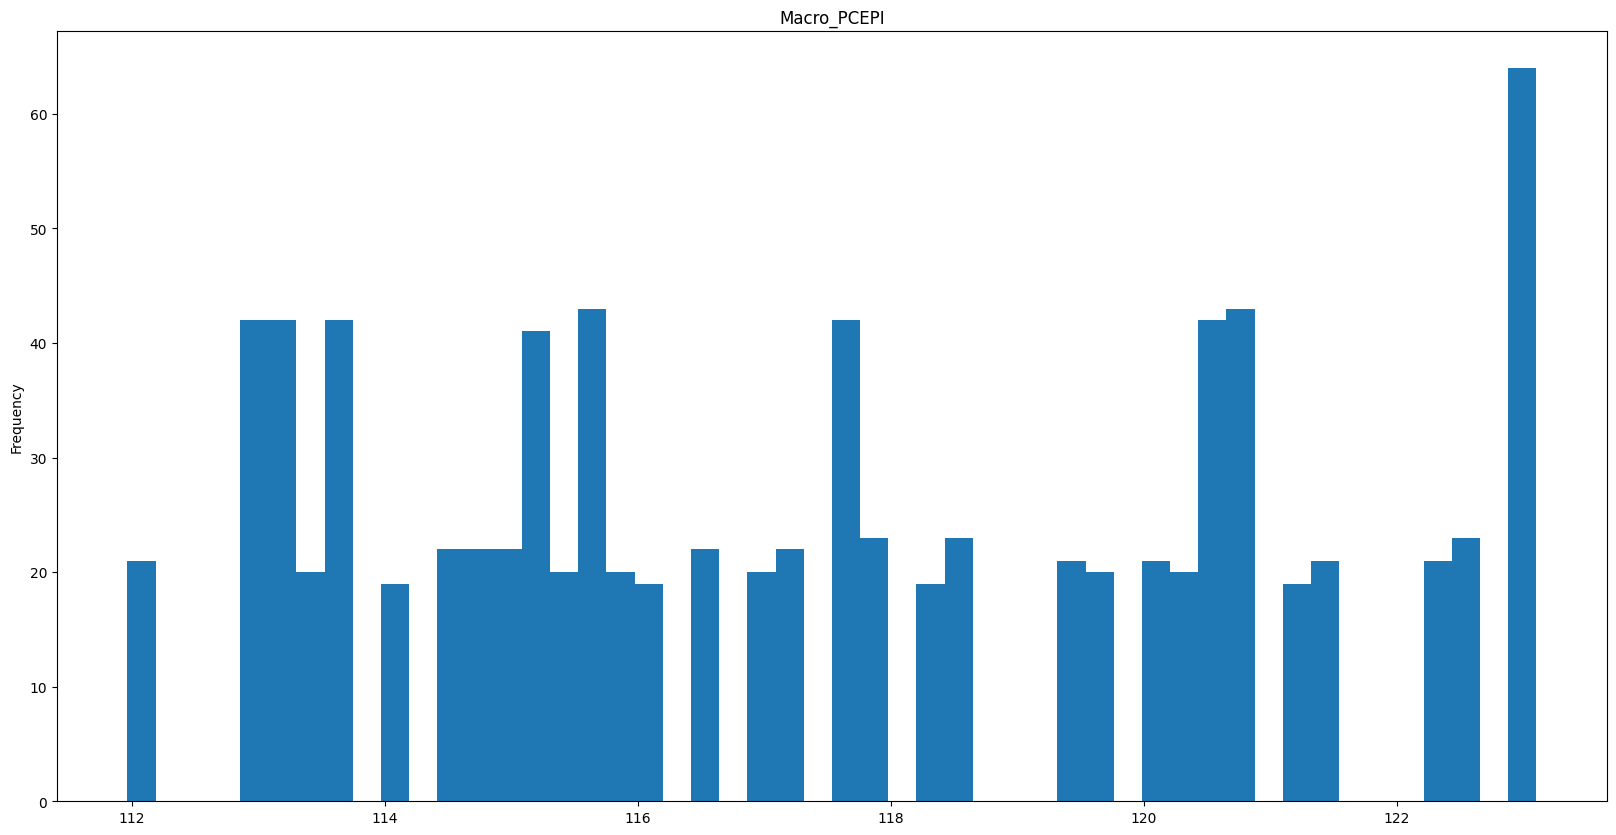

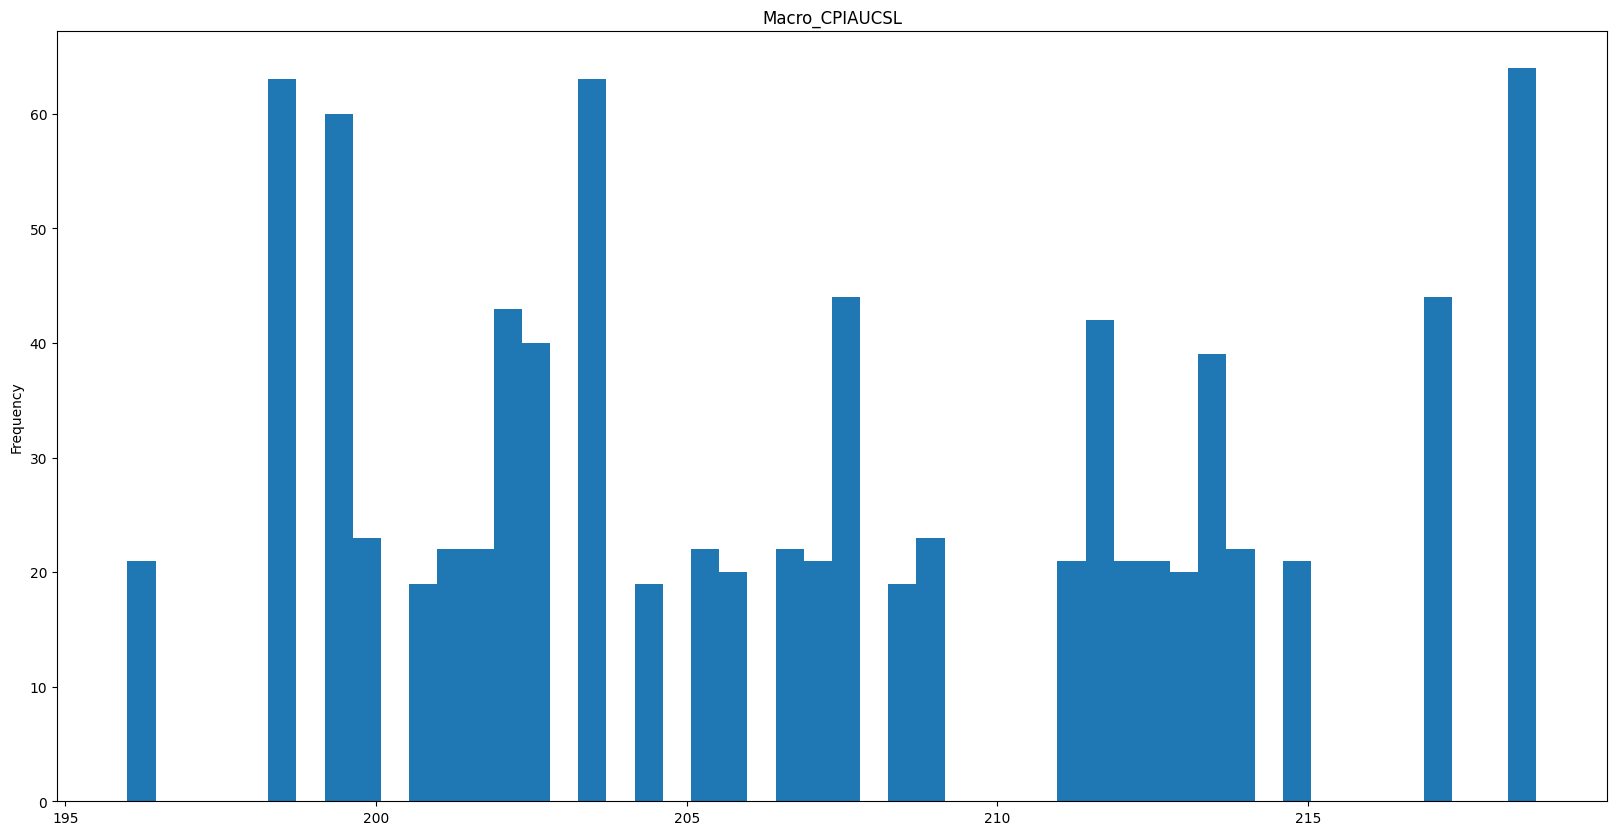

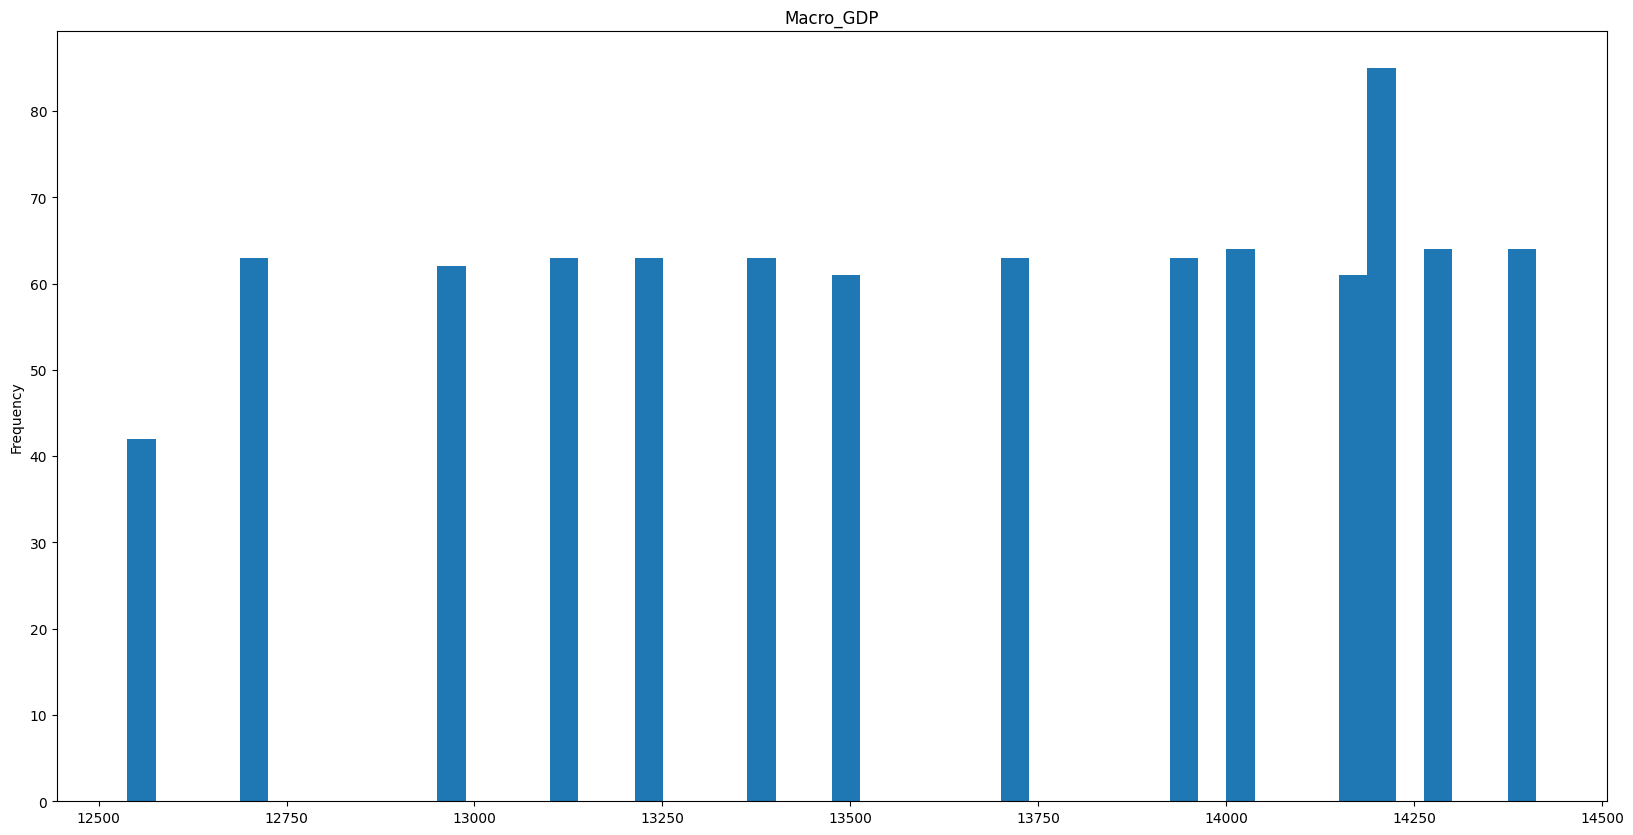

In [ ]:
for i in range(0, 29, 1):
  t1.iloc[:, i].plot(kind = 'hist', bins = 50, figsize=(20,10))
  plt.title(t1.columns[i])
  plt.show()

In [ ]:
for i in range(0, 29, 1):
  # t1.iloc[:, i].plot(kind = 'hist', bins = 50, figsize=(20,10))
  print(t1.iloc[:, i].skew())
  # plt.title(t1.columns[i])
  # plt.show()



0.1304927592036435
-0.2227469162526268
0.4905851378172459
-0.021554116336801692
0.6011035759391162
0.10052961247679768
0.3454702889620794
-0.2697445994874507
-0.15844996932417119
0.9066170438988455
-0.11674691687850833
2.488607004012528
2.268805078715472
2.4997506688540234
2.4187824108635065
2.014846567798609
2.3888766906222827
2.3502877280426984
1.9629256796224752
1.9836518938353964
1.7568213551099732
2.5801874808079823
0.5643635215248264
1.7915792617775788
-0.5938593561307737
-1.3675187207182748
0.19645362685709805
0.2618329535028365
-0.34159303920935324


In [ ]:
t1.iloc[:, 0:29].skew()

Equities_XLF_CLOSE_lag1d_1_period_ret                                  0.130493
Equities_XLY_CLOSE_lag1d_1_period_ret                                 -0.222747
Equities_SPY_CLOSE_lag1d_1_period_ret                                  0.490585
Equities_XLI_CLOSE_lag1d_1_period_ret                                 -0.021554
Equities_XLK_CLOSE_lag1d_1_period_ret                                  0.601104
Equities_XLB_CLOSE_lag1d_1_period_ret                                  0.100530
Equities_XLV_CLOSE_lag1d_1_period_ret                                  0.345470
Equities_LQD_CLOSE_lag1d_1_period_ret                                 -0.269745
Equities_XLP_CLOSE_lag1d_1_period_ret                                 -0.158450
Equities_XLU_CLOSE_lag1d_1_period_ret                                  0.906617
Equities_XLE_CLOSE_lag1d_1_period_ret                                 -0.116747
Equities_LQD_CLOSE_lag1d_1_period_ret_100_period_std_dev_volatility    2.488607
Equities_XLP_CLOSE_lag1d_1_period_ret_10

In [ ]:
t1.iloc[:, 0:29].kurtosis()

Equities_XLF_CLOSE_lag1d_1_period_ret                                   9.498914
Equities_XLY_CLOSE_lag1d_1_period_ret                                   7.052012
Equities_SPY_CLOSE_lag1d_1_period_ret                                  16.716803
Equities_XLI_CLOSE_lag1d_1_period_ret                                   8.893932
Equities_XLK_CLOSE_lag1d_1_period_ret                                  11.982474
Equities_XLB_CLOSE_lag1d_1_period_ret                                   8.787418
Equities_XLV_CLOSE_lag1d_1_period_ret                                  22.384493
Equities_LQD_CLOSE_lag1d_1_period_ret                                  66.421096
Equities_XLP_CLOSE_lag1d_1_period_ret                                   8.308621
Equities_XLU_CLOSE_lag1d_1_period_ret                                  12.781353
Equities_XLE_CLOSE_lag1d_1_period_ret                                   8.476724
Equities_LQD_CLOSE_lag1d_1_period_ret_100_period_std_dev_volatility     4.671591
Equities_XLP_CLOSE_lag1d_1_p

In [ ]:
X_train.corr()[['rv_22d_lead(22+1)d']].sort_values(by = 'rv_22d_lead(22+1)d', ascending = False).iloc[0:20]

<ipython-input-57-ba40753ed19f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_train.corr()[['rv_22d_lead(22+1)d']].sort_values(by = 'rv_22d_lead(22+1)d', ascending = False).iloc[0:20]


rv_22d_lead(22+1)d
rv_22d_lead(22+1)d                                            1.000000
Equities_LQD_CLOSE_lag1d_1_period_ret_100_perio...            0.804202
Equities_XLF_CLOSE_lag1d_1_period_ret_100_perio...            0.775316
BofA_EM_Corp_OAS_lag1d                                        0.775305
CP_FF_Spread_lag1d                                            0.764921
IV_USDCHF_1M_CLOSE_lag1d                                      0.764331
Equities_XLP_CLOSE_lag1d_1_period_ret_100_perio...            0.759179
BofA_EM_HY_Corp_OAS_lag1d                                     0.758818
Macro_UNRATE                                                  0.756009
IV_MOVE_US_Index_CLOSE_lag1d                                  0.752672
US_Swap_Spread_2Y_lag1d                                       0.749366
3m_CLOSE_TED_Spread_lag1d                                     0.747109
IV_AUDUSD_1M_CLOSE_lag1d                                      0.738758
IV_EURUSD_1M_CLOSE_lag1d                                      0.736426
Futures_CL_CLOSE_lag1d_1_period_ret_100_period_...            0.732632
IV_USDCHF_2M_CLOSE_lag1d                                      0.732070
IV_AUDUSD_2M_CLOSE_lag1d                                      0.731826
IV_EURUSD_2M_CLOSE_lag1d                                      0.729676
IV_VIX_Index_CLOSE_lag1d                                      0.723794
rv_MA_10d_lag1d                                               0.723203

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['rv_22d_lead(22+1)d'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['rv_22d_lead(22+1)d'], **{})
chart

In [ ]:
import os

In [ ]:
X = X_train.iloc[:, 1:183]
y = X_train.iloc[:, 184]

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X)

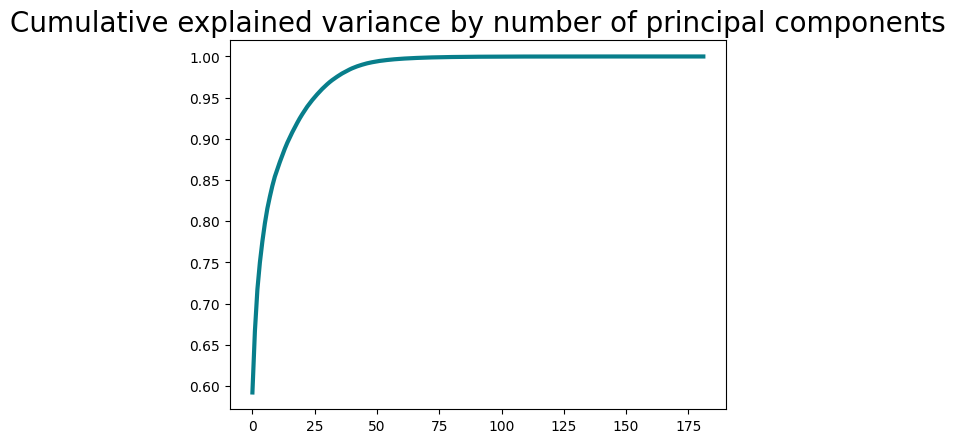

In [ ]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_train_scaled)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()

In [ ]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_),
    columns=[f'PC{i}' for i in range(1, len(X.columns) + 1)],
    index=X.columns
)
loadings.head()

PC1       PC2       PC3       PC4       PC5       PC6  \
Macro_CPIAUCSL  0.556727 -0.117138  0.716184 -0.076595 -0.098782  0.098122   
Macro_GDP       0.537351 -0.089816  0.625496 -0.134709 -0.062162  0.254050   
Macro_INDPRO   -0.612635 -0.044622  0.502107 -0.182403  0.078360  0.353707   
Macro_MICH     -0.172699 -0.116531  0.739339  0.049632 -0.293196 -0.288000   
Macro_PCEPI     0.604776 -0.109834  0.674216 -0.078103 -0.087962  0.109943   

                     PC7       PC8       PC9      PC10  ...         PC173  \
Macro_CPIAUCSL -0.011667 -0.214319 -0.048701  0.221778  ...  0.000000e+00   
Macro_GDP      -0.127539 -0.288744 -0.052427  0.262769  ...  9.983603e-31   
Macro_INDPRO   -0.202088 -0.192461 -0.054922 -0.125118  ... -3.082292e-31   
Macro_MICH      0.297182  0.014003 -0.016613 -0.025440  ...  2.656636e-31   
Macro_PCEPI    -0.025821 -0.221141 -0.044546  0.234697  ... -5.410264e-31   

                       PC174         PC175         PC176         PC177  \
Macro_CPIAUCSL  0.000000e+00  0.000000e+00 -0.000000e+00 -0.000000e+00   
Macro_GDP       1.914022e-31 -4.129780e-31 -9.320130e-31 -5.017986e-31   
Macro_INDPRO    4.631577e-31  5.646407e-31 -4.711254e-31 -4.470131e-31   
Macro_MICH     -4.265403e-31 -1.580810e-31 -2.401606e-31  1.689846e-31   
Macro_PCEPI    -1.726472e-30 -4.161536e-31  4.712840e-31  4.921060e-30   

                       PC178         PC179         PC180         PC181  \
Macro_CPIAUCSL  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Macro_GDP      -1.882889e-30 -1.410249e-30 -7.930473e-31  5.636534e-31   
Macro_INDPRO    4.173463e-31  3.582575e-31 -1.486105e-31 -1.122129e-30   
Macro_MICH      2.248244e-31 -5.884862e-32 -7.665356e-31  4.010298e-31   
Macro_PCEPI     9.296986e-31  4.090435e-31  1.829074e-31  7.695753e-31   

                       PC182  
Macro_CPIAUCSL  0.000000e+00  
Macro_GDP       2.076342e-30  
Macro_INDPRO    8.846992e-31  
Macro_MICH      2.190511e-31  
Macro_PCEPI    -8.821279e-30  

[5 rows x 182 columns]

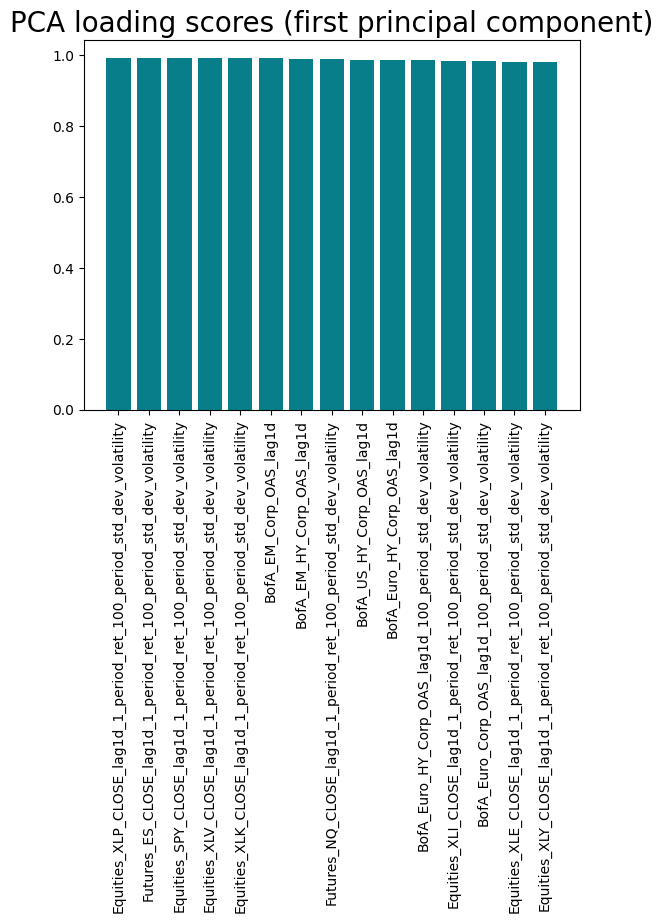

In [ ]:

loadings['abs'] = abs(loadings['PC1'])
pc1_loadings = loadings.sort_values(by='abs', ascending=False)[['PC1']].iloc[0:15]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()

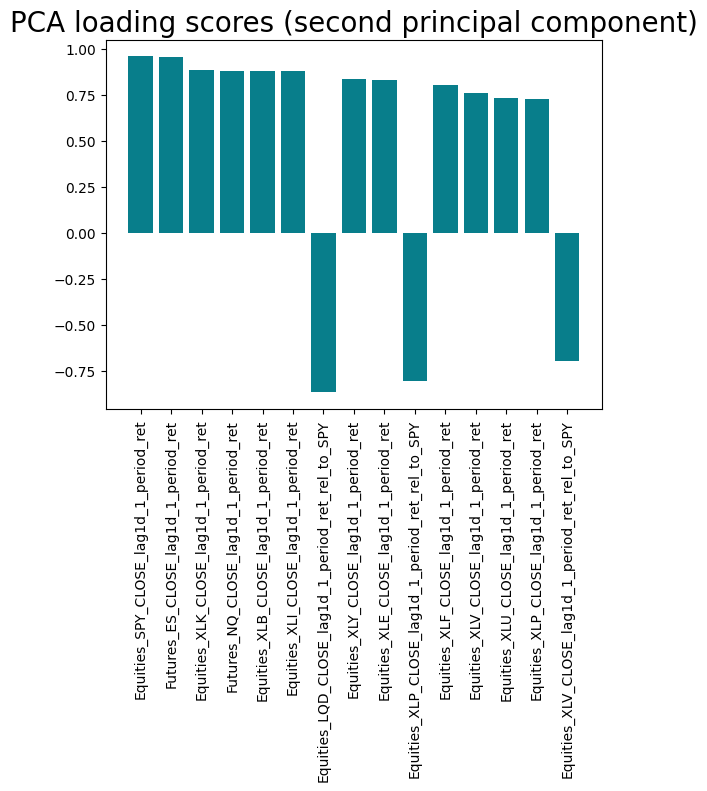

In [ ]:

loadings['abs2'] = abs(loadings['PC2'])
pc1_loadings = loadings.sort_values(by='abs2', ascending=False)[['PC2']].iloc[0:15]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC2']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC2'], color='#087E8B')
plt.title('PCA loading scores (second principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()

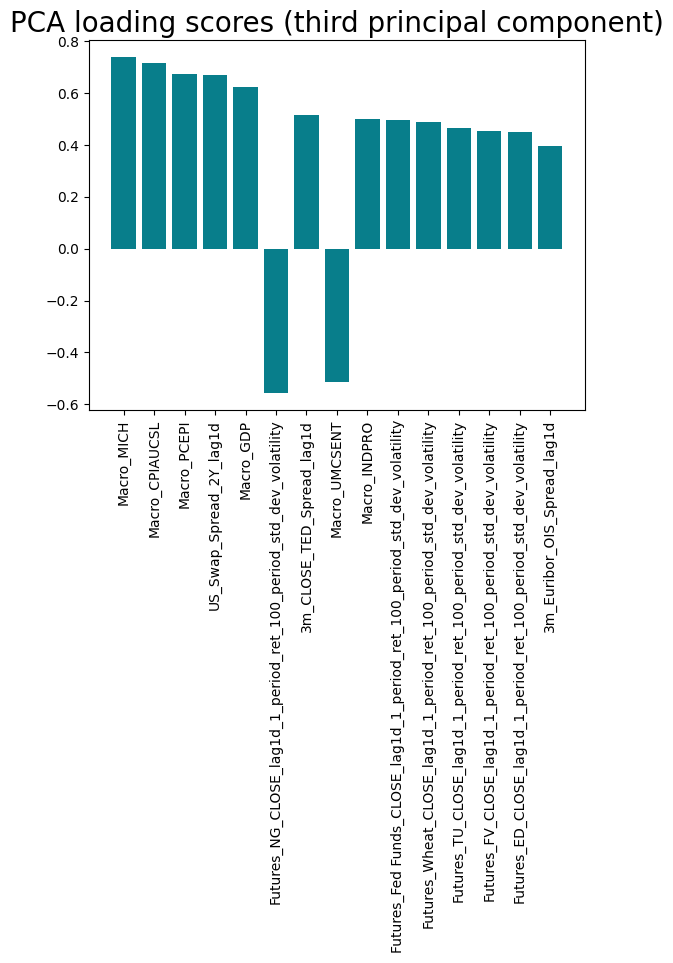

In [ ]:

loadings['abs3'] = abs(loadings['PC3'])
pc1_loadings = loadings.sort_values(by='abs3', ascending=False)[['PC3']].iloc[0:15]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC3']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC3'], color='#087E8B')
plt.title('PCA loading scores (third principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/DSO 598/QQQ.csv",index_col=1)
data.head()

Unnamed: 0  Macro_CPIAUCSL  Macro_GDP  Macro_INDPRO  Macro_MICH  \
index                                                                         
2005-05-24           0           193.5    12297.5       107.101         3.2   
2005-05-25           1           193.5    12297.5       107.101         3.2   
2005-05-26           2           193.5    12297.5       107.101         3.2   
2005-05-27           3           193.5    12297.5       107.101         3.2   
2005-05-31           4           193.5    12297.5       107.101         3.2   

            Macro_PCEPI  Macro_UMCSENT  Macro_UNRATE  \
index                                                  
2005-05-24      110.852           86.9           5.1   
2005-05-25      110.852           86.9           5.1   
2005-05-26      110.852           86.9           5.1   
2005-05-27      110.852           86.9           5.1   
2005-05-31      110.852           86.9           5.1   

            Equities_LQD_CLOSE_lag1d_1_period_ret  \
index                                               
2005-05-24                               0.004184   
2005-05-25                               0.002174   
2005-05-26                              -0.000090   
2005-05-27                               0.000633   
2005-05-31                              -0.000090   

            Equities_SPY_CLOSE_lag1d_1_period_ret  ...  \
index                                              ...   
2005-05-24                               0.005541  ...   
2005-05-25                              -0.002338  ...   
2005-05-26                              -0.000753  ...   
2005-05-27                               0.005360  ...   
2005-05-31                               0.001666  ...   

            ATM_Russell 2000 (CME) 1M Vols_lag1d  \
index                                              
2005-05-24                                   NaN   
2005-05-25                                   NaN   
2005-05-26                                   NaN   
2005-05-27                                   NaN   
2005-05-31                                   NaN   

            ATM_Russell 2000 (CME) 6M Vols_lag1d  \
index                                              
2005-05-24                                   NaN   
2005-05-25                                   NaN   
2005-05-26                                   NaN   
2005-05-27                                   NaN   
2005-05-31                                   NaN   

            ATM_Russell 2000 (CME) 3M Vols_lag1d  \
index                                              
2005-05-24                                   NaN   
2005-05-25                                   NaN   
2005-05-26                                   NaN   
2005-05-27                                   NaN   
2005-05-31                                   NaN   

            ATM_Russell 2000 (CME) 2M Vols_lag1d  \
index                                              
2005-05-24                                   NaN   
2005-05-25                                   NaN   
2005-05-26                                   NaN   
2005-05-27                                   NaN   
2005-05-31                                   NaN   

            ATM_Russell 2000 (CME) 1W Vols_lag1d  \
index                                              
2005-05-24                                   NaN   
2005-05-25                                   NaN   
2005-05-26                                   NaN   
2005-05-27                                   NaN   
2005-05-31                                   NaN   

            ATM_Russell 2000 (CME) 1M Vols_lag1d_100_period_std_dev_volatility  \
index                                                                            
2005-05-24                                                NaN                    
2005-05-25                                                NaN                    
2005-05-26                                                NaN                    
2005-05-27                                         

In [ ]:
target = pd.read_csv("/content/drive/MyDrive/DSO 598/QQQ_86755_Target_Variable_Merged.csv",index_col=0)
target.head()

Equities_QQQ_CLOSE    ret_1d   abs_ret  ret_squared_1d  rv_22d  \
date                                                                         
2000-01-06             80.7500 -0.063089  0.063089        0.003980     NaN   
2000-01-07             88.5000  0.095975  0.095975        0.009211     NaN   
2000-01-10             92.2500  0.042373  0.042373        0.001795     NaN   
2000-01-11             88.2500 -0.043360  0.043360        0.001880     NaN   
2000-01-12             86.5625 -0.019122  0.019122        0.000366     NaN   

            rv_22d_lead(22+1)d  rv_MA_5d  rv_MA_10d  rv_MA_22d  rv_MA_40d  \
date                                                                        
2000-01-06            0.022541       NaN        NaN        NaN        NaN   
2000-01-07            0.021782       NaN        NaN        NaN        NaN   
2000-01-10            0.020875       NaN        NaN        NaN        NaN   
2000-01-11            0.020522       NaN        NaN        NaN        NaN   
2000-01-12            0.017670  0.003447        NaN        NaN        NaN   

            rv_MA_60d  
date                   
2000-01-06        NaN  
2000-01-07        NaN  
2000-01-10        NaN  
2000-01-11        NaN  
2000-01-12        NaN

In [ ]:
data_target = data.merge(target[['rv_22d_lead(22+1)d']], left_index=True, right_index=True)
data_target.head()

Unnamed: 0  Macro_CPIAUCSL  Macro_GDP  Macro_INDPRO  Macro_MICH  \
2005-05-24           0           193.5    12297.5       107.101         3.2   
2005-05-25           1           193.5    12297.5       107.101         3.2   
2005-05-26           2           193.5    12297.5       107.101         3.2   
2005-05-27           3           193.5    12297.5       107.101         3.2   
2005-05-31           4           193.5    12297.5       107.101         3.2   

            Macro_PCEPI  Macro_UMCSENT  Macro_UNRATE  \
2005-05-24      110.852           86.9           5.1   
2005-05-25      110.852           86.9           5.1   
2005-05-26      110.852           86.9           5.1   
2005-05-27      110.852           86.9           5.1   
2005-05-31      110.852           86.9           5.1   

            Equities_LQD_CLOSE_lag1d_1_period_ret  \
2005-05-24                               0.004184   
2005-05-25                               0.002174   
2005-05-26                              -0.000090   
2005-05-27                               0.000633   
2005-05-31                              -0.000090   

            Equities_SPY_CLOSE_lag1d_1_period_ret  ...  \
2005-05-24                               0.005541  ...   
2005-05-25                              -0.002338  ...   
2005-05-26                              -0.000753  ...   
2005-05-27                               0.005360  ...   
2005-05-31                               0.001666  ...   

            ATM_Russell 2000 (CME) 6M Vols_lag1d  \
2005-05-24                                   NaN   
2005-05-25                                   NaN   
2005-05-26                                   NaN   
2005-05-27                                   NaN   
2005-05-31                                   NaN   

            ATM_Russell 2000 (CME) 3M Vols_lag1d  \
2005-05-24                                   NaN   
2005-05-25                                   NaN   
2005-05-26                                   NaN   
2005-05-27                                   NaN   
2005-05-31                                   NaN   

            ATM_Russell 2000 (CME) 2M Vols_lag1d  \
2005-05-24                                   NaN   
2005-05-25                                   NaN   
2005-05-26                                   NaN   
2005-05-27                                   NaN   
2005-05-31                                   NaN   

            ATM_Russell 2000 (CME) 1W Vols_lag1d  \
2005-05-24                                   NaN   
2005-05-25                                   NaN   
2005-05-26                                   NaN   
2005-05-27                                   NaN   
2005-05-31                                   NaN   

            ATM_Russell 2000 (CME) 1M Vols_lag1d_100_period_std_dev_volatility  \
2005-05-24                                                NaN                    
2005-05-25                                                NaN                    
2005-05-26                                                NaN                    
2005-05-27                                                NaN                    
2005-05-31                                                NaN                    

            ATM_Russell 2000 (CME) 6M Vols_lag1d_100_period_std_dev_volatility  \
2005-05-24                                                NaN                    
2005-05-25                                                NaN                    
2005-05-26                                                NaN                    
2005-05-27                                                NaN                    
2005-05-31                                                NaN                    

            ATM_Russell 2000 (CME) 3M Vols_lag1d_100_period_std_dev_volatility  \
2005-05-24                                                NaN                    
2005-05-25                                                NaN                    
2005-05-26                                      

In [ ]:
data_target = data_target.drop(data_target.columns[0], axis=1)
data_target.head()

Macro_CPIAUCSL  Macro_GDP  Macro_INDPRO  Macro_MICH  Macro_PCEPI  \
2005-05-24           193.5    12297.5       107.101         3.2      110.852   
2005-05-25           193.5    12297.5       107.101         3.2      110.852   
2005-05-26           193.5    12297.5       107.101         3.2      110.852   
2005-05-27           193.5    12297.5       107.101         3.2      110.852   
2005-05-31           193.5    12297.5       107.101         3.2      110.852   

            Macro_UMCSENT  Macro_UNRATE  \
2005-05-24           86.9           5.1   
2005-05-25           86.9           5.1   
2005-05-26           86.9           5.1   
2005-05-27           86.9           5.1   
2005-05-31           86.9           5.1   

            Equities_LQD_CLOSE_lag1d_1_period_ret  \
2005-05-24                               0.004184   
2005-05-25                               0.002174   
2005-05-26                              -0.000090   
2005-05-27                               0.000633   
2005-05-31                              -0.000090   

            Equities_SPY_CLOSE_lag1d_1_period_ret  \
2005-05-24                               0.005541   
2005-05-25                              -0.002338   
2005-05-26                              -0.000753   
2005-05-27                               0.005360   
2005-05-31                               0.001666   

            Equities_XLY_CLOSE_lag1d_1_period_ret  ...  \
2005-05-24                               0.006389  ...   
2005-05-25                              -0.001814  ...   
2005-05-26                              -0.003028  ...   
2005-05-27                               0.005164  ...   
2005-05-31                               0.000000  ...   

            ATM_Russell 2000 (CME) 6M Vols_lag1d  \
2005-05-24                                   NaN   
2005-05-25                                   NaN   
2005-05-26                                   NaN   
2005-05-27                                   NaN   
2005-05-31                                   NaN   

            ATM_Russell 2000 (CME) 3M Vols_lag1d  \
2005-05-24                                   NaN   
2005-05-25                                   NaN   
2005-05-26                                   NaN   
2005-05-27                                   NaN   
2005-05-31                                   NaN   

            ATM_Russell 2000 (CME) 2M Vols_lag1d  \
2005-05-24                                   NaN   
2005-05-25                                   NaN   
2005-05-26                                   NaN   
2005-05-27                                   NaN   
2005-05-31                                   NaN   

            ATM_Russell 2000 (CME) 1W Vols_lag1d  \
2005-05-24                                   NaN   
2005-05-25                                   NaN   
2005-05-26                                   NaN   
2005-05-27                                   NaN   
2005-05-31                                   NaN   

            ATM_Russell 2000 (CME) 1M Vols_lag1d_100_period_std_dev_volatility  \
2005-05-24                                                NaN                    
2005-05-25                                                NaN                    
2005-05-26                                                NaN                    
2005-05-27                                                NaN                    
2005-05-31                                                NaN                    

            ATM_Russell 2000 (CME) 6M Vols_lag1d_100_period_std_dev_volatility  \
2005-05-24                                                NaN                    
2005-05-25                                                NaN                    
2005-05-26                                                NaN                    
2005-05-27                                                NaN                    
2005-05-31                                                NaN                    

            ATM_Russell 2000 (CME) 3M Vols_lag1

In [ ]:
correlations = data_target.corr()['rv_22d_lead(22+1)d'].drop('rv_22d_lead(22+1)d')
positive_corr = correlations.sort_values(ascending=False).head(15).to_frame()
negative_corr = correlations.sort_values(ascending=True).head(15).to_frame()

###Top 15 variables that correlated with target variable

<Axes: >

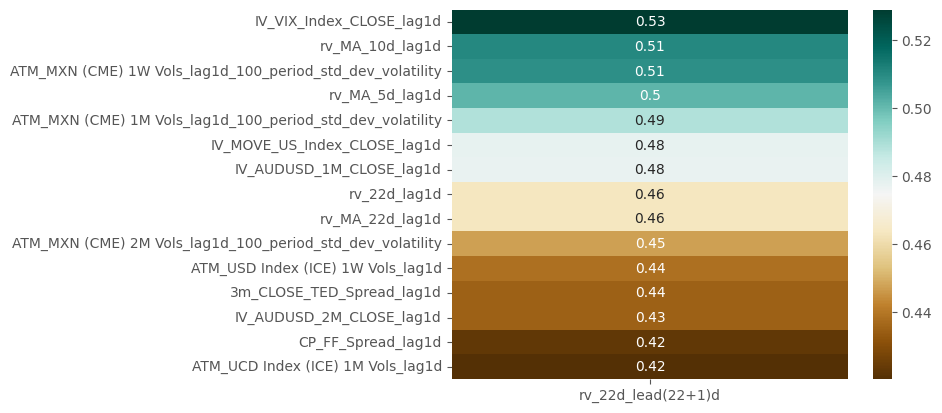

In [ ]:
sns.heatmap(positive_corr,annot=True,cmap='BrBG')

###Bottom 15 variables that correlated with target variable

<Axes: >

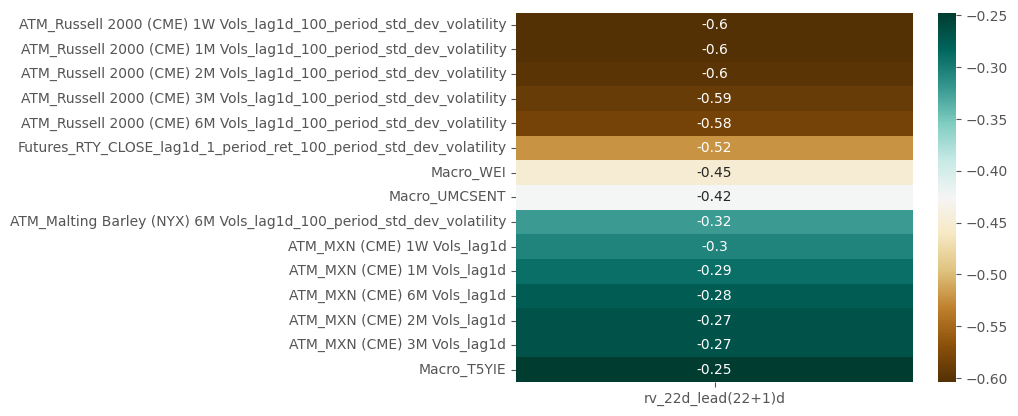

In [ ]:
sns.heatmap(negative_corr,annot=True,cmap='BrBG')

In [ ]:
summary_stats = data_target.describe().T

Top 15 Means

In [ ]:
summary_stats['mean'].sort_values(ascending=False).head(15)

ATM_EU Emissions (ICE) 6M Vols_lag1d_100_period_std_dev_volatility    3.553529e+18
ATM_EU Emissions (ICE) 3M Vols_lag1d_100_period_std_dev_volatility    1.301701e+18
ATM_EU Emissions (ICE) 6M Vols_lag1d                                  7.011651e+17
ATM_EU Emissions (ICE) 2M Vols_lag1d_100_period_std_dev_volatility    5.683971e+17
ATM_EU Emissions (ICE) 3M Vols_lag1d                                  2.557506e+17
ATM_EU Emissions (ICE) 2M Vols_lag1d                                  1.105049e+17
ATM_Fed Funds (CBT) 6M Vols_lag1d                                     4.807255e+11
ATM_Fed Funds (CBT) 6M Vols_lag1d_100_period_std_dev_volatility       3.998258e+11
ATM_Fed Funds (CBT) 3M Vols_lag1d_100_period_std_dev_volatility       7.270505e+10
ATM_Fed Funds (CBT) 3M Vols_lag1d                                     3.653682e+10
ATM_Fed Funds (CBT) 2M Vols_lag1d_100_period_std_dev_volatility       3.712409e+09
ATM_Fed Funds (CBT) 1M Vols_x_lag1d_100_period_std_dev_volatility     2.303181e+09
ATM_

Bottom 15 Means

In [ ]:
summary_stats['mean'].sort_values(ascending=True).head(15)

Equities_HYG_CLOSE_lag1d_1_period_ret_rel_to_SPY                       -5.318532e-04
Futures_CL_CLOSE_lag1d_1_period_ret                                    -4.500210e-04
Equities_XLRE_CLOSE_lag1d_1_period_ret_rel_to_SPY                      -3.739437e-04
Equities_LQD_CLOSE_lag1d_1_period_ret_rel_to_SPY                       -3.401422e-04
Equities_XLU_CLOSE_lag1d_1_period_ret_rel_to_SPY                       -1.345258e-04
Equities_XLE_CLOSE_lag1d_1_period_ret_rel_to_SPY                       -1.266589e-04
Equities_XLP_CLOSE_lag1d_1_period_ret_rel_to_SPY                       -8.975208e-05
Equities_XLF_CLOSE_lag1d_1_period_ret_rel_to_SPY                       -8.581453e-05
Futures_GBPUSD_CLOSE_lag1d_1_period_ret                                -5.741412e-05
Equities_HYG_CLOSE_lag1d_1_period_ret                                  -1.149656e-05
Equities_XLI_CLOSE_lag1d_1_period_ret_rel_to_SPY                       -1.072743e-05
Equities_XLB_CLOSE_lag1d_1_period_ret_rel_to_SPY                 

In [ ]:
summary_stats['range'] =  summary_stats['max'] - summary_stats['min']

Top 15 Spreads

In [ ]:
summary_stats['range'].sort_values(ascending=False).head(15)

ATM_EU Emissions (ICE) 6M Vols_lag1d                                  5.703230e+20
ATM_EU Emissions (ICE) 3M Vols_lag1d                                  2.059500e+20
ATM_EU Emissions (ICE) 2M Vols_lag1d                                  9.218320e+19
ATM_EU Emissions (ICE) 6M Vols_lag1d_100_period_std_dev_volatility    8.306747e+19
ATM_EU Emissions (ICE) 3M Vols_lag1d_100_period_std_dev_volatility    3.044025e+19
ATM_EU Emissions (ICE) 2M Vols_lag1d_100_period_std_dev_volatility    1.330336e+19
ATM_Fed Funds (CBT) 6M Vols_lag1d                                     2.678966e+13
ATM_Fed Funds (CBT) 3M Vols_lag1d                                     1.000794e+13
ATM_Fed Funds (CBT) 6M Vols_lag1d_100_period_std_dev_volatility       7.327818e+12
ATM_Fed Funds (CBT) 3M Vols_lag1d_100_period_std_dev_volatility       1.402254e+12
ATM_Fed Funds (CBT) 2M Vols_lag1d                                     4.957647e+11
ATM_Fed Funds (CBT) 1M Vols_x_lag1d                                   4.803048e+11
ATM_

Bottom 15 Spreads

In [ ]:
summary_stats['range'].sort_values(ascending=True).head(15)

ATM_Malting Barley (NYX) 1W Vols_lag1d                                  0.000000e+00
ATM_Malting Barley (NYX) 2M Vols_lag1d                                  0.000000e+00
ATM_Malting Barley (NYX) 3M Vols_lag1d                                  0.000000e+00
ATM_Malting Barley (NYX) 6M Vols_lag1d                                  0.000000e+00
ATM_Malting Barley (NYX) 1M Vols_lag1d                                  0.000000e+00
ATM_Malting Barley (NYX) 3M Vols_lag1d_100_period_std_dev_volatility    1.850792e-09
ATM_Malting Barley (NYX) 6M Vols_lag1d_100_period_std_dev_volatility    1.878622e-09
ATM_Malting Barley (NYX) 1M Vols_lag1d_100_period_std_dev_volatility    1.998508e-09
ATM_Malting Barley (NYX) 1W Vols_lag1d_100_period_std_dev_volatility    2.951274e-09
ATM_Malting Barley (NYX) 2M Vols_lag1d_100_period_std_dev_volatility    3.038537e-09
ATM_2Y Note (CBT) 3M Vols_lag1d_100_period_std_dev_volatility           9.815009e-05
ATM_2Y Note (CBT) 6M Vols_lag1d_100_period_std_dev_volatility    

PCA

In [ ]:
X = consolidated_df

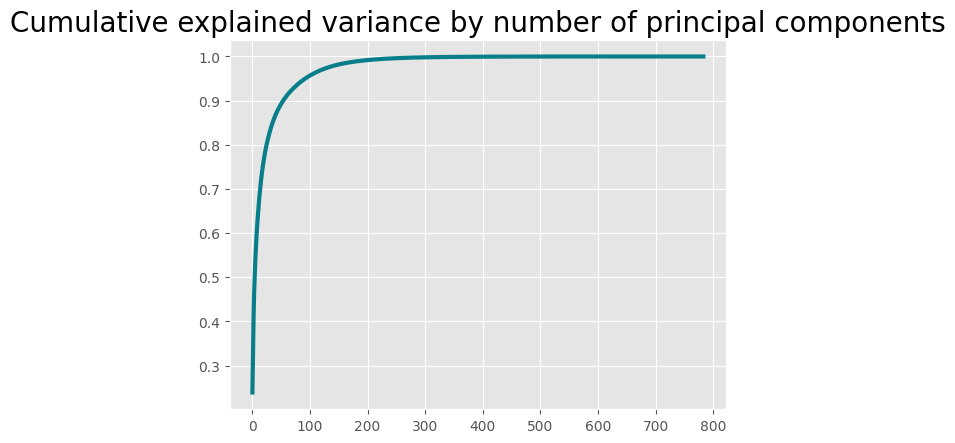

In [ ]:
# X = qqq.iloc[:, 0: 784]
mean = X.mean()
X = X.fillna(mean)


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA().fit(X_train_scaled)
plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()


In [ ]:


loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_),
    columns=[f'PC{i}' for i in range(1, len(X.columns) + 1)],
    index=X.columns
)
loadings.head()


PC1       PC2       PC3       PC4       PC5       PC6  \
Macro_CPIAUCSL  0.059435  0.534621 -0.079509 -0.031703  0.211659 -0.014926   
Macro_GDP       0.050612  0.562633 -0.161476 -0.041562  0.292603 -0.030785   
Macro_INDPRO   -0.313690  0.215450 -0.363998 -0.059323  0.327877 -0.033212   
Macro_MICH     -0.036935  0.251376  0.527442  0.034781 -0.206980  0.103986   
Macro_PCEPI     0.070818 -0.191211  0.305210 -0.398695  0.020361  0.009656   

                     PC7       PC8       PC9      PC10  ...         PC775  \
Macro_CPIAUCSL -0.011203  0.033893  0.045325  0.035105  ...  0.000000e+00   
Macro_GDP      -0.081400  0.070931  0.013190  0.055648  ... -1.724912e-30   
Macro_INDPRO   -0.190879  0.092800  0.066471  0.095783  ... -4.829024e-32   
Macro_MICH      0.121964  0.130386 -0.076689 -0.043779  ...  7.417441e-31   
Macro_PCEPI     0.092398 -0.019133 -0.191342 -0.068361  ... -8.851154e-31   

                       PC776         PC777         PC778         PC779  \
Macro_CPIAUCSL -0.000000e+00 -0.000000e+00 -0.000000e+00 -0.000000e+00   
Macro_GDP       3.450529e-32 -9.437017e-31 -6.140439e-31 -1.681150e-30   
Macro_INDPRO    1.925110e-30 -3.459862e-31 -2.803607e-31 -5.150954e-31   
Macro_MICH      2.505523e-31  5.038322e-31 -4.708908e-31  1.509155e-31   
Macro_PCEPI    -6.583865e-31 -1.664013e-30 -1.126967e-30 -1.345637e-30   

                       PC780         PC781         PC782         PC783  \
Macro_CPIAUCSL -0.000000e+00 -0.000000e+00 -0.000000e+00 -0.000000e+00   
Macro_GDP      -1.418106e-31  2.434040e-32 -2.931128e-33  4.441958e-32   
Macro_INDPRO   -1.800901e-32  3.759588e-33  1.686593e-33 -6.938309e-33   
Macro_MICH      4.254120e-32 -1.092133e-32 -2.039432e-33 -1.603885e-32   
Macro_PCEPI    -4.008244e-32  1.672017e-32  2.973453e-33  1.501902e-32   

                       PC784  
Macro_CPIAUCSL -0.000000e+00  
Macro_GDP      -1.074826e-32  
Macro_INDPRO    5.332734e-33  
Macro_MICH      1.291030e-32  
Macro_PCEPI    -1.436095e-32  

[5 rows x 784 columns]

In [ ]:
loadings['abs'] = abs(loadings['PC1'])
pc1_loadings = loadings.sort_values(by='abs', ascending=False)[['PC1']].iloc[0:15]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']



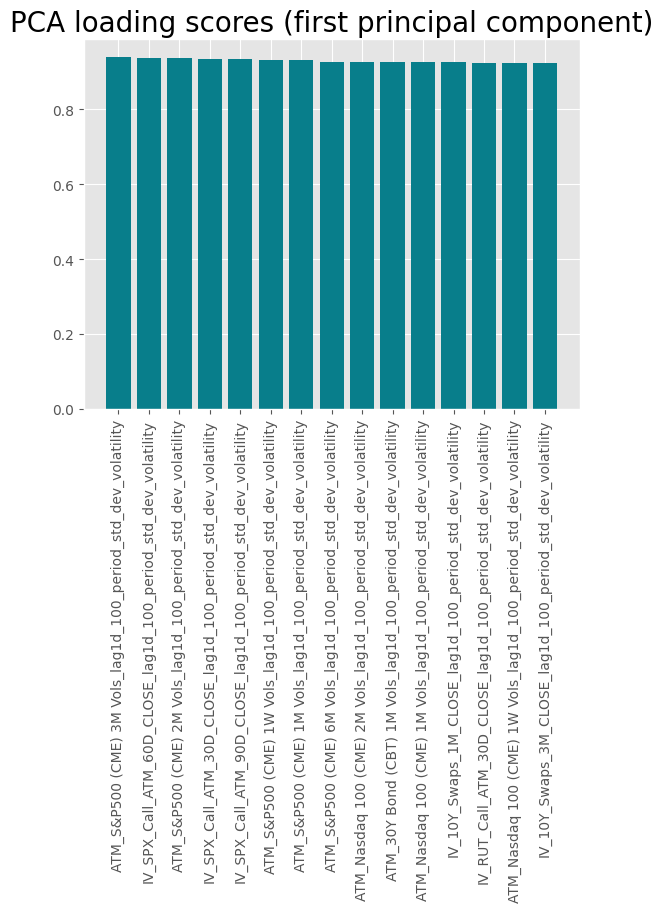

In [ ]:
plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()


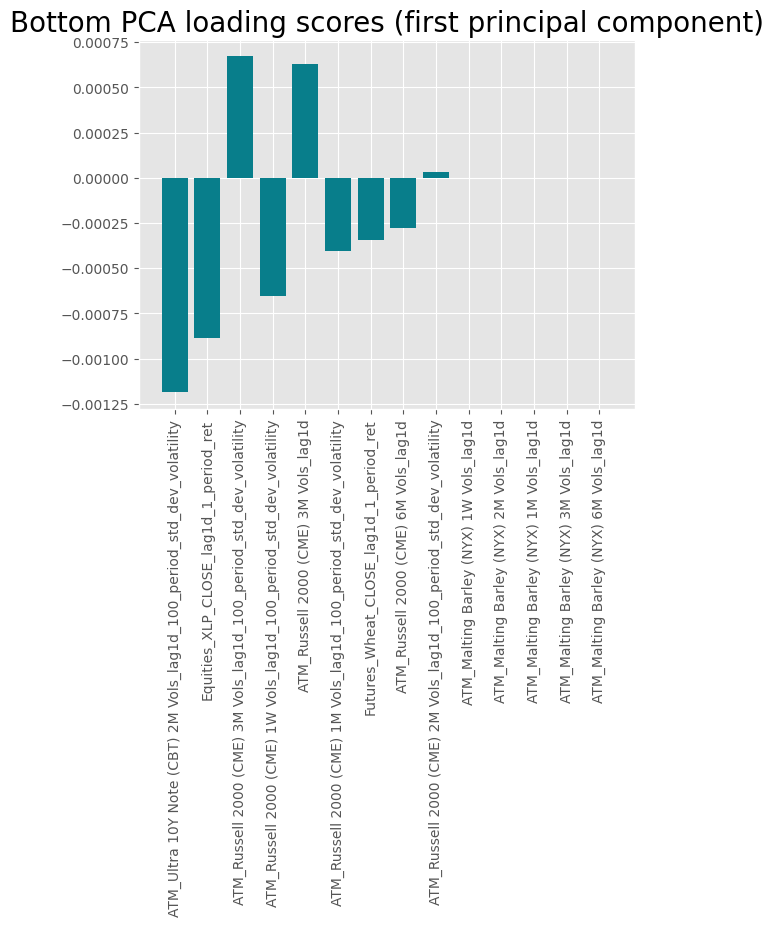

In [ ]:
loadings['abs'] = abs(loadings['PC1'])
pc1_loadings = loadings.sort_values(by='abs', ascending=False)[['PC1']].iloc[770:]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('Bottom PCA loading scores (first principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()

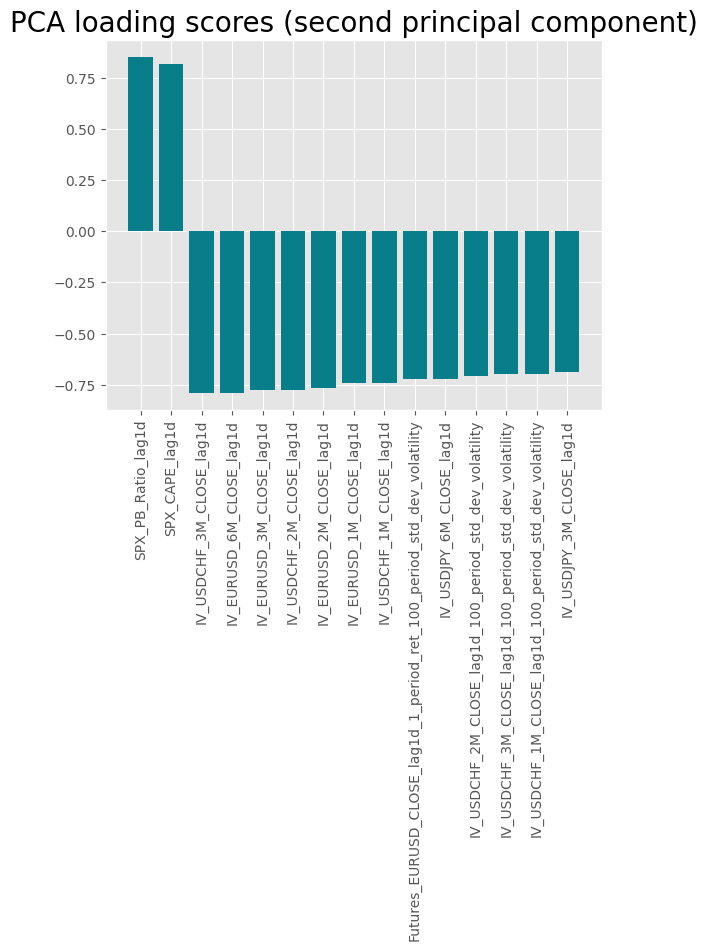

In [ ]:
loadings['abs2'] = abs(loadings['PC2'])
pc1_loadings = loadings.sort_values(by='abs2', ascending=False)[['PC2']].iloc[0:15]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (second principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()

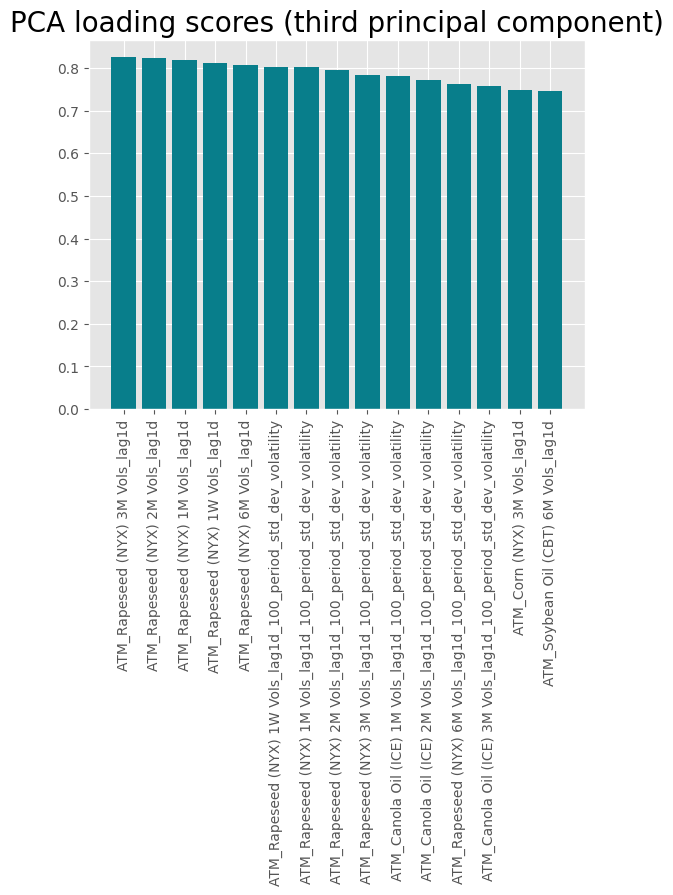

In [ ]:
loadings['abs3'] = abs(loadings['PC3'])
pc1_loadings = loadings.sort_values(by='abs3', ascending=False)[['PC3']].iloc[0:15]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (third principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()

<Axes: >

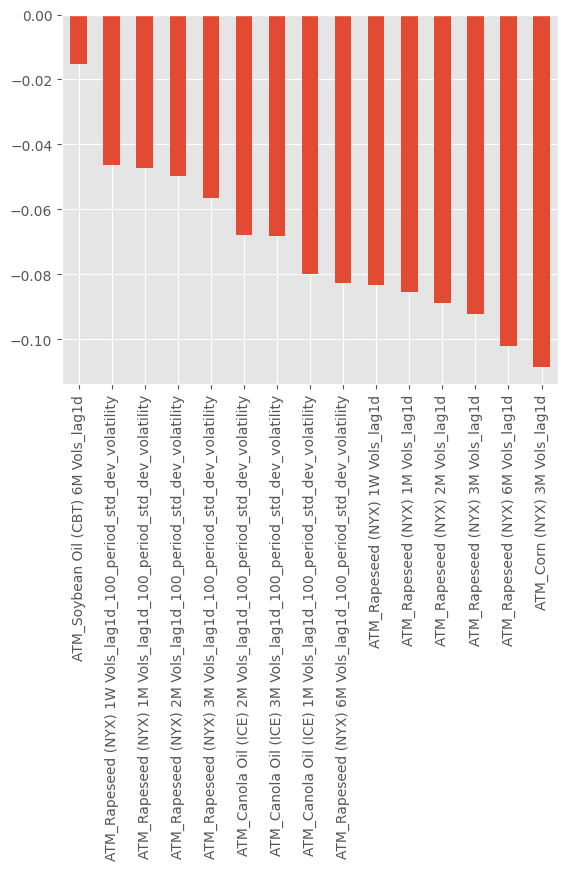

In [ ]:
pc1_attribute = pc1_loadings.Attribute

corr_pc1 = X.corr().loc[pc1_attribute, 'rv_22d_lead(22+1)d']
corr_pc1 = corr_pc1.sort_values(ascending=False)
corr_pc1.plot(kind = 'bar')


In [ ]:
pc2_attribute = loadings.sort_values(by='abs2', ascending=False)[['PC2']].iloc[0:15]
pc2_attribute = pc2_attribute.index
X.corr().loc[pc2_attribute, 'rv_22d_lead(22+1)d']

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['rv_22d_lead(22+1)d'], label='rv_22d_lead(22+1)d', color='blue')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Plot')
plt.legend()
plt.grid(True)